In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [2]:
df = pd.read_excel('/Users/yolanda/Downloads/excel_file1.xlsx')
df.set_index('year_month', inplace=True)

v = pd.read_excel('/Users/yolanda/Documents/Priority compartments/Grootfontein/master spreadsheets for compartment per cluster/cluster_2.xlsx')
v.set_index('year_month', inplace=True)
w = pd.read_excel('/Users/yolanda/Documents/Priority compartments/Grootfontein/master spreadsheets for compartment per cluster/cluster_4.xlsx')
w.set_index('year_month', inplace=True)
z = pd.read_excel('/Users/yolanda/Documents/Priority compartments/Grootfontein/master spreadsheets for compartment per cluster/cluster_5.xlsx')
z.set_index('year_month', inplace=True)
o = pd.read_excel('/Users/yolanda/Documents/Priority compartments/Grootfontein/master spreadsheets for compartment per cluster/cluster_7.xlsx')
o.set_index('year_month', inplace=True)

In [3]:
df['Abstraction'] = w['Usage']
df['D4N0065'] = v[' D4N0065']
df['D4N0111'] = v[' D4N0111']
df['D4N0122'] = v[' D4N0122']
df['D4N0066'] = v[' D4N0066']
df['D4N0115'] = z[' D4N0115']
df['D4N0116'] = v[' D4N0116']

In [4]:
df

Temperature  Precipitation  Discharge  Abstraction  \
year_month                                                       
1950-01-01        23.90           95.9        NaN          NaN   
1950-02-01        25.10           52.8        NaN          NaN   
1950-03-01        23.75           71.4        NaN          NaN   
1950-04-01        19.65           58.6        NaN          NaN   
1950-05-01        14.60           27.7        NaN          NaN   
...                 ...            ...        ...          ...   
2019-08-01          NaN            NaN        NaN          NaN   
2019-09-01          NaN            NaN        NaN          NaN   
2019-10-01          NaN            NaN        NaN          NaN   
2019-11-01          NaN            NaN        NaN          NaN   
2019-12-01          NaN            NaN        NaN          NaN   

            scenario_usage  scenario_precip100  scenario_precip200  \
year_month                                                           
1950-01-01             NaN                95.9                95.9   
1950-02-01             NaN                52.8                52.8   
1950-03-01             NaN                71.4                71.4   
1950-04-01             NaN                58.6                58.6   
1950-05-01             NaN                27.7                27.7   
...                    ...                 ...                 ...   
2019-08-01             0.0                 0.0                 0.0   
2019-09-01             0.0                 0.0                 0.0   
2019-10-01             0.0                 0.0                 0.0   
2019-11-01             0.0                 0.0                 0.0   
2019-12-01             0.0                 0.0                 0.0   

            scenario_preciphalf  precip_trend  trend_scenario100  \
year_month                                                         
1950-01-01                47.95           NaN                NaN   
1950-02-01                26.40           NaN                NaN   
1950-03-01                35.70           NaN                NaN   
1950-04-01                29.30           NaN                NaN   
1950-05-01                13.85           NaN                NaN   
...                         ...           ...                ...   
2019-08-01                 0.00           NaN                NaN   
2019-09-01                 0.00           NaN                NaN   
2019-10-01                 0.00           NaN                NaN   
2019-11-01                 0.00           NaN                NaN   
2019-12-01                 0.00           NaN                NaN   

            trend_scenario200  trend_scenariohalf  D4N0065  D4N0111  D4N0122  \
year_month                                                                     
1950-01-01                NaN                 NaN      NaN      NaN      NaN   
1950-02-01                NaN                 NaN      NaN      NaN      NaN   
1950-03-01                NaN                 NaN      NaN      NaN      NaN   
1950-04-01                NaN                 NaN      NaN      NaN      NaN   
1950-05-01                NaN                 NaN      NaN      NaN      NaN   
...                       ...                 ...      ...      ...      ...   
2019-08-01                NaN                 NaN      NaN      NaN      NaN   
2019-09-01                NaN                 NaN      NaN      NaN      NaN   
2019-10-01                NaN                 NaN      NaN      NaN      NaN   
2019-11-01                NaN                 NaN      NaN      NaN      NaN   
2019-12-01                NaN                 NaN      NaN      NaN      NaN   

            D4N0037  D4N0115  D4N0116  
year_month                             
1950-01-01      NaN      NaN      NaN  
1950-02-01      NaN      NaN      NaN  
1950-03-01      NaN      NaN      NaN  
1950-04-01      NaN      NaN      NaN  
1950-05-01      NaN      NaN      NaN  
...             ...      ...      ..

In [5]:
df = df[['D4N0065' ,'D4N0122' ,'D4N0066','D4N0115','D4N0116' ,'Temperature' ,'precip_trend' ,'Discharge' ,'Abstraction']]

In [6]:
df

D4N0065  D4N0122  D4N0037  D4N0115  D4N0116  Temperature  \
year_month                                                             
1950-01-01      NaN      NaN      NaN      NaN      NaN        23.90   
1950-02-01      NaN      NaN      NaN      NaN      NaN        25.10   
1950-03-01      NaN      NaN      NaN      NaN      NaN        23.75   
1950-04-01      NaN      NaN      NaN      NaN      NaN        19.65   
1950-05-01      NaN      NaN      NaN      NaN      NaN        14.60   
...             ...      ...      ...      ...      ...          ...   
2019-08-01      NaN      NaN      NaN      NaN      NaN          NaN   
2019-09-01      NaN      NaN      NaN      NaN      NaN          NaN   
2019-10-01      NaN      NaN      NaN      NaN      NaN          NaN   
2019-11-01      NaN      NaN      NaN      NaN      NaN          NaN   
2019-12-01      NaN      NaN      NaN      NaN      NaN          NaN   

            precip_trend  Discharge  Abstraction  
year_month                                        
1950-01-01           NaN        NaN          NaN  
1950-02-01           NaN        NaN          NaN  
1950-03-01           NaN        NaN          NaN  
1950-04-01           NaN        NaN          NaN  
1950-05-01           NaN        NaN          NaN  
...                  ...        ...          ...  
2019-08-01           NaN        NaN          NaN  
2019-09-01           NaN        NaN          NaN  
2019-10-01           NaN        NaN          NaN  
2019-11-01           NaN        NaN          NaN  
2019-12-01           NaN        NaN          NaN  

[840 rows x 9 columns]

In [7]:
f = lambda x: -x; 
gwls = df[['D4N0065' ,'D4N0122' ,'D4N0066','D4N0115','D4N0116' ]].apply(f, axis=1)

#### checking when each varibale starts and ends 

In [8]:
result_dict = {}
def check_date(column):
    x = column.notnull()
    print(type(column[x]))
    result_dict[column.name] = [column[x].head(1).index[0], 
    column[x].tail(1).index[0]]
    
gwls.apply(check_date)
dates = pd.DataFrame(result_dict)
dates

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


D4N0065    D4N0122    D4N0037    D4N0115    D4N0116
0 1975-06-01 1975-05-01 1973-08-01 1975-05-01 1975-05-01
1 2000-02-01 2003-11-01 2012-02-01 2005-03-01 2005-01-01

#### Limiting period based on minimum start of all 6 bh's and maximum finish of all 6 bh's

In [9]:

gwls = gwls[gwls.index > '1975-02-01']  
gwls = gwls[gwls.index < '2012-03-01']  

#### These boreholes are the onles with less that 32% missing data. 

Text(0, 0.5, 'Groundwater levels')

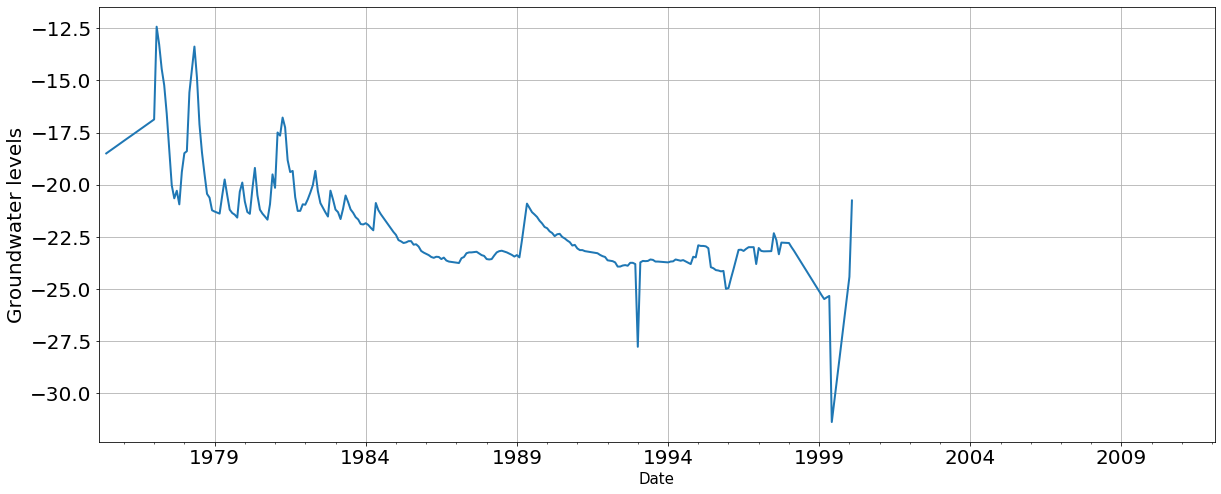

In [10]:
#visual illustration just to show all groundwater levels 

gwls['D4N0065'].plot(figsize=(20,8), linewidth=2, fontsize = 20, grid=True);
plt.xlabel("Date",fontsize=15)
plt.ylabel("Groundwater levels",fontsize=20)


In [11]:
gwls['Temperature'] = df['Temperature']
gwls['precip_trend'] = df['precip_trend']
gwls['Discharge'] = df['Discharge']
gwls['Abstraction'] = df['Abstraction']
gwls

D4N0065  D4N0122    D4N0037  D4N0115  D4N0116  Temperature  \
year_month                                                                
1975-03-01       NaN      NaN -19.080000      NaN      NaN        20.65   
1975-04-01       NaN      NaN -16.830000      NaN      NaN        17.80   
1975-05-01       NaN   -19.09 -16.500000   -13.18    -1.41        15.30   
1975-06-01 -18.50000   -18.71 -16.600000   -11.60    -1.83        12.10   
1975-07-01 -18.41569   -18.94 -16.785000   -11.73    -2.27        11.85   
...              ...      ...        ...      ...      ...          ...   
2011-10-01       NaN      NaN -30.700000      NaN      NaN        19.30   
2011-11-01       NaN      NaN -30.069891      NaN      NaN        21.50   
2011-12-01       NaN      NaN -29.460109      NaN      NaN        22.00   
2012-01-01       NaN      NaN -28.830000      NaN      NaN        23.35   
2012-02-01       NaN      NaN -28.850000      NaN      NaN        22.70   

            precip_trend  Discharge   Abstraction  
year_month                                         
1975-03-01     75.387500      0.488  1.665429e+05  
1975-04-01     74.191667      0.730  1.665429e+05  
1975-05-01     76.900000      1.032  1.665429e+05  
1975-06-01     83.904167      0.938  1.665429e+05  
1975-07-01     89.433333      0.872  1.665429e+05  
...                  ...        ...           ...  
2011-10-01     44.183333      0.644  2.424806e+06  
2011-11-01     38.333333      0.633  2.424806e+06  
2011-12-01     35.783333      0.629  2.424806e+06  
2012-01-01     34.008333      0.612  2.417254e+06  
2012-02-01     33.908333      0.588  2.417254e+06  

[444 rows x 9 columns]

### Reframing length of dataset based on bhid D4N0834 start and end dates 

In [12]:
pima = gwls.filter(['D4N0065', 'Temperature', 'precip_trend', 'Discharge', 'Abstraction'])
pima = pima[pima.index > '1975-05-01']  
pima = pima[pima.index < '1998-03-01'] 

In [13]:
pima.apply(lambda x: sum(x.isnull()), axis=0)

D4N0065          0
Temperature     11
precip_trend     0
Discharge       65
Abstraction      0
dtype: int64

#### Interpolating independant varibales only 

In [14]:
pima['Discharge']= pima['Discharge'].interpolate(limit_direction='both', method='time').mask(pima.bfill().isna())
pima['precip_trend']= pima['precip_trend'].interpolate(limit_direction='both', method='time').mask(pima.bfill().isna())
pima['Temperature']= pima['Temperature'].interpolate(limit_direction='both', method='time').mask(pima.bfill().isna())

In [15]:
#pima.to_excel('/Users/yolanda/Downloads/BHID_D4N0065.xlsx')

#### Calculating start and end dates for new dataframa

In [16]:
result_dict = {}
def check_date(column):
    x = column.notnull()
    print(type(column[x]))
    result_dict[column.name] = [column[x].head(1).index[0], 
    column[x].tail(1).index[0]]
    
pima.apply(check_date)
dates = pd.DataFrame(result_dict)
dates

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


D4N0065 Temperature precip_trend  Discharge Abstraction
0 1975-06-01  1975-06-01   1975-06-01 1975-06-01  1975-06-01
1 1998-02-01  1998-02-01   1998-02-01 1998-02-01  1998-02-01

### Mutual information stats

In [17]:
from sklearn.feature_selection import mutual_info_regression

In [22]:
X = pima[['Temperature', 'precip_trend', 'Discharge','Abstraction']] # Features
y = pima[['D4N0065']] # 'D4N0834', 'D4N0111' ,'D4N0122' ,'D4N0066','D4N0115','D4N0110' 

In [23]:
mi = mutual_info_regression(X, y)
mi /= np.max(mi)

mi = pd.Series(mi)
mi.index = X.columns
mi.sort_values(ascending=False)
mi

/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Temperature     0.042556
precip_trend    0.310484
Discharge       0.683766
Abstraction     1.000000
dtype: float64

## LAG TESTING 

In [20]:
precip834  = pima.filter(['D4N0065', 'precip_trend'])
discha834  = pima.filter(['D4N0065', 'Discharge'])
temp834    = pima.filter(['D4N0065', 'Temperature'])
abstr834   = pima.filter(['D4N0065', 'Abstraction'])

In [21]:
lags = range(1, 24)  # 2year lag

# precip_trend
precip0834 = precip834.assign(**{ '{} (t-{})'.format([ 'precip_trend'], t): precip834[[ 'precip_trend']].shift(t) for t in lags for col in precip834})
# disharge
discha0834 = discha834.assign(**{ '{} (t-{})'.format([ 'Discharge'], t): discha834[[ 'Discharge']].shift(t) for t in lags for col in discha834})
# temperature
temp0834 = temp834.assign(**{ '{} (t-{})'.format([ 'Temperature'], t): temp834[[ 'Temperature']].shift(t) for t in lags for col in temp834})
# abstraction
abstr0834 = abstr834.assign(**{ '{} (t-{})'.format([ 'Abstraction'], t): abstr834[[ 'Abstraction']].shift(t) for t in lags for col in abstr834})

## Cross Correlation

- degree of similarity between two time series in different times or space 
- lag is considred since time is under investigation

### Rainfall

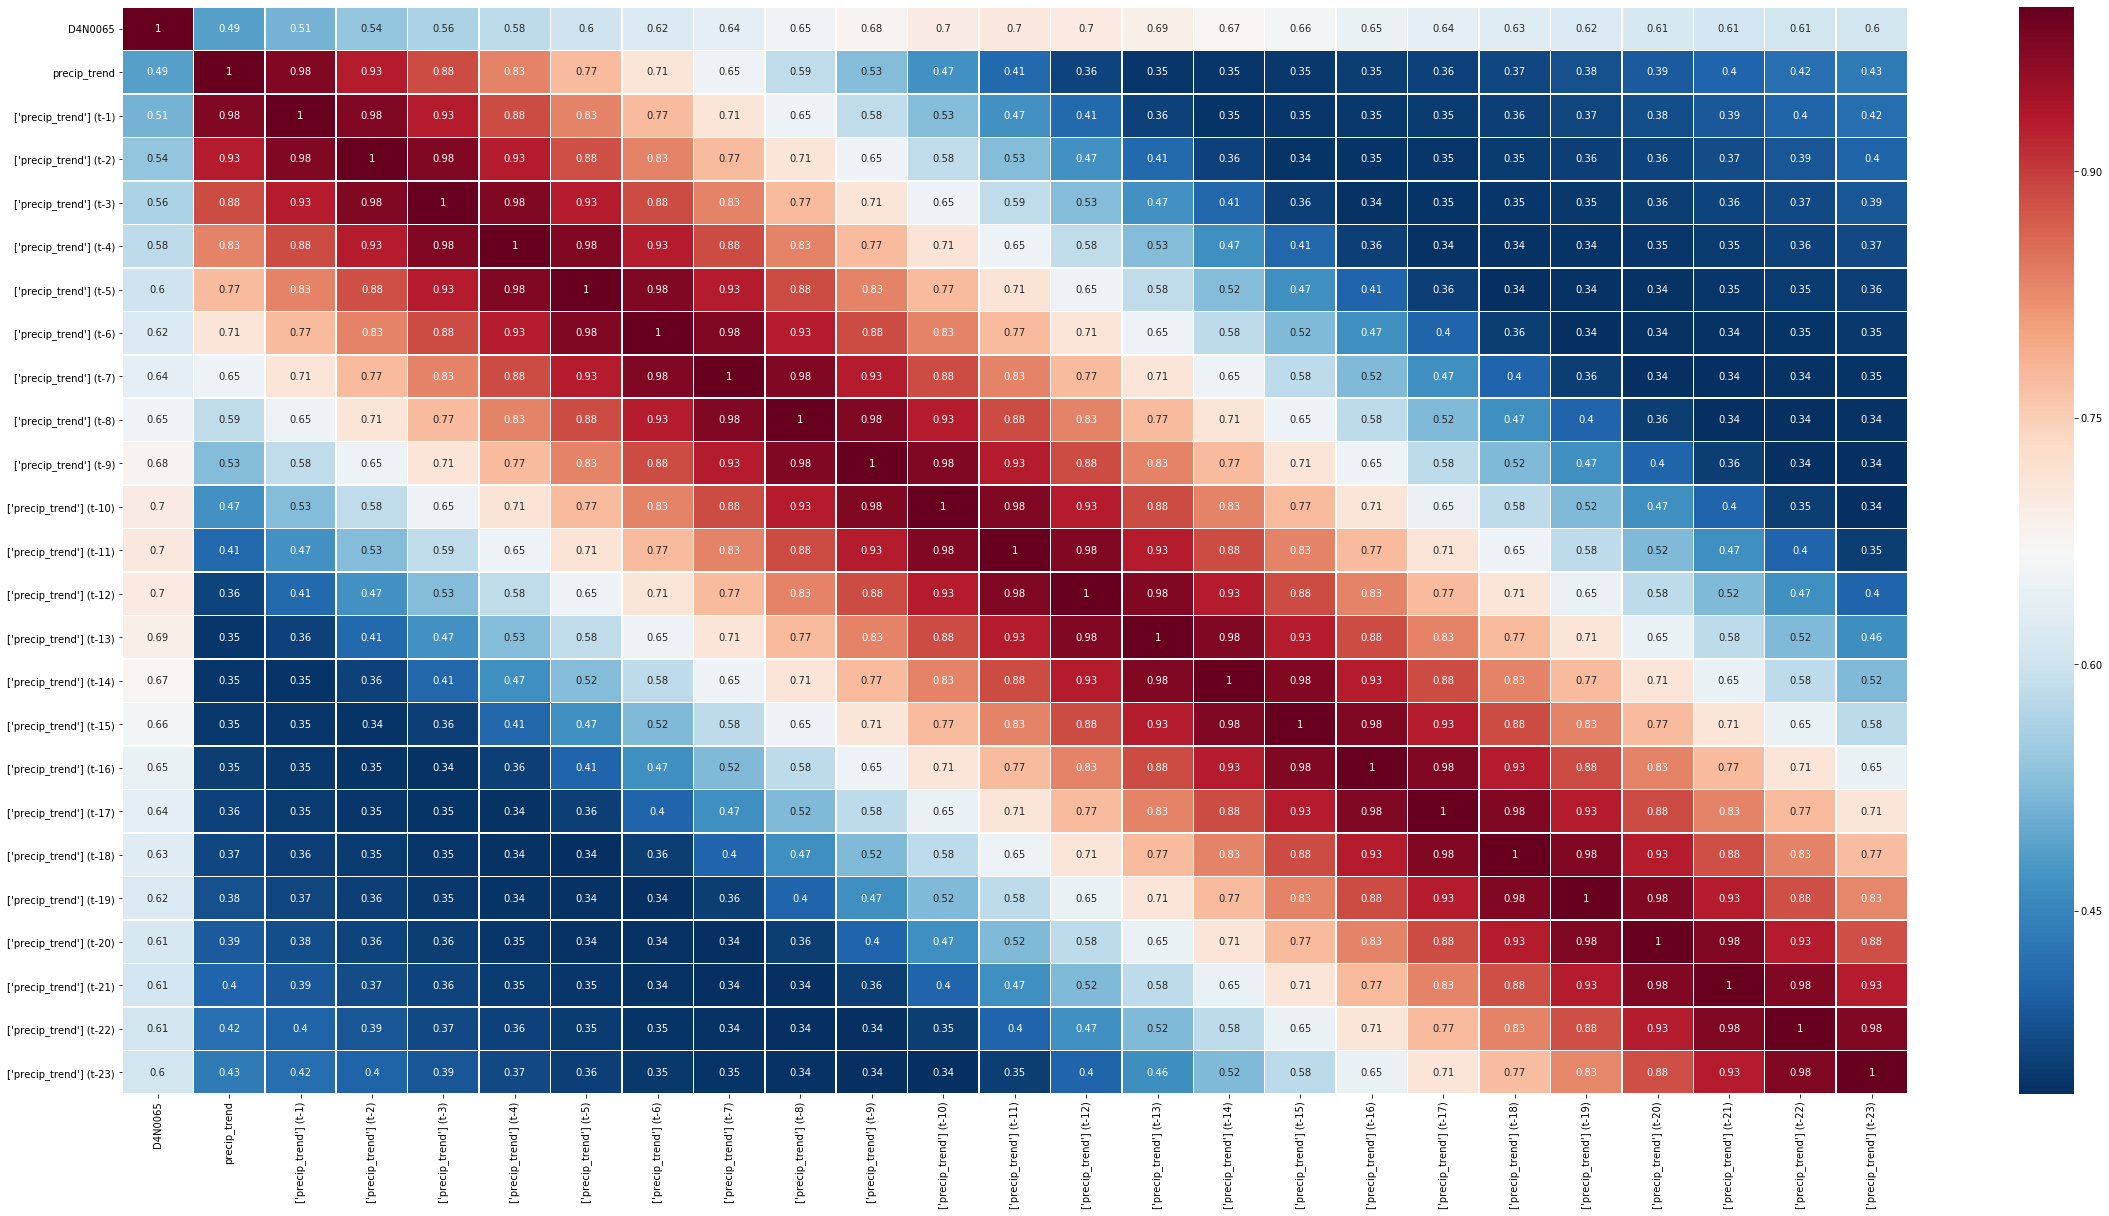

In [24]:
# precip0834 , 0111, 0122 , 0037, 0115, 0110

import seaborn as sns
corrm1 = precip0834.corr(method = 'spearman')
corrm2 = precip0834.corr(method = 'pearson')
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(40,20))         # Sample figsize in inches

sns.heatmap(corrm2, 
            xticklabels=corrm2.columns,
            yticklabels=corrm2.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

#A co-efficient close to 1 means that there’s a very strong positive correlation between the two variables.
#In our case, the maroon shows very strong correlations. 
#The diagonal line is the correlation of the variables to themselves — so they’ll obviously be 1.
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

### Temperature

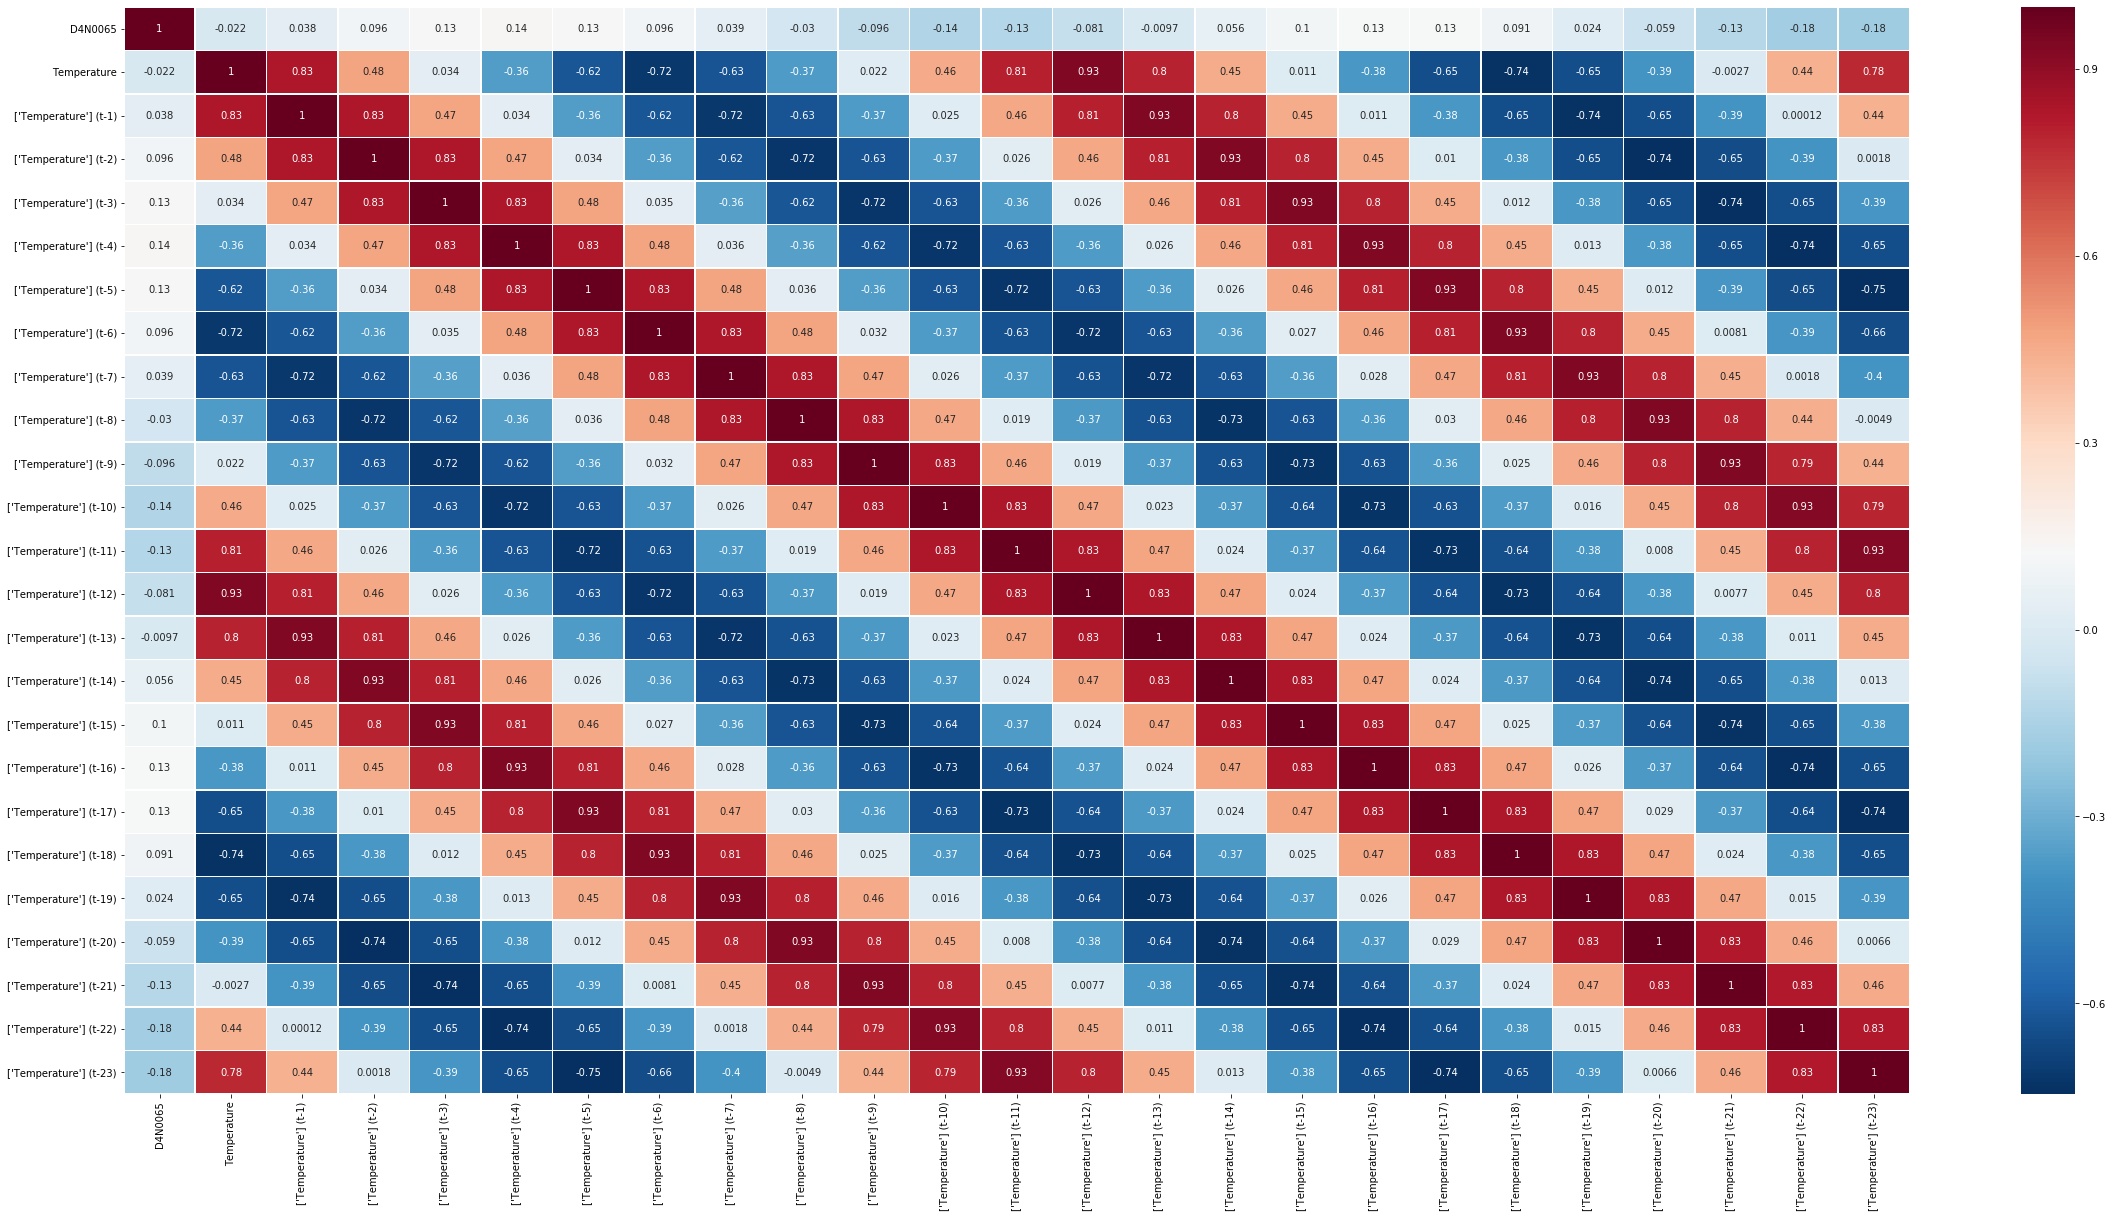

In [25]:
# temp0834 , 0111, 0122 , 0037, 0115, 0110

import seaborn as sns
corrm1 = temp0834.corr(method = 'spearman')
corrm2 = temp0834.corr(method = 'pearson')
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(40,20))         # Sample figsize in inches

sns.heatmap(corrm2, 
            xticklabels=corrm2.columns,
            yticklabels=corrm2.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

#A co-efficient close to 1 means that there’s a very strong positive correlation between the two variables.
#In our case, the maroon shows very strong correlations. 
#The diagonal line is the correlation of the variables to themselves — so they’ll obviously be 1.
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

#### Shifting variables based on lag variables 

In [41]:
pima['Temperature (t-5)'] = pima.Temperature.shift(3)
pima['precip_trend (t-16)'] = pima.precip_trend.shift(2)
pima

D4N0065  Temperature  precip_trend  Discharge   Abstraction  \
year_month                                                                  
1975-06-01 -18.500000        12.10     83.904167      0.938  1.665429e+05   
1975-07-01 -18.415690        11.85     89.433333      0.872  1.665429e+05   
1975-08-01 -18.328569        14.30     93.183333      0.814  1.665429e+05   
1975-09-01 -18.241448        19.80     93.183333      0.809  1.665429e+05   
1975-10-01 -18.157138        21.10     92.108333      0.608  1.665429e+05   
...               ...          ...           ...        ...           ...   
1997-10-01 -22.780000        18.55     36.125000      0.517  1.638955e+06   
1997-11-01 -22.786739        20.15     33.925000      0.507  1.638955e+06   
1997-12-01 -22.793261        22.70     33.316667      0.503  1.638955e+06   
1998-01-01 -22.800000        21.30     33.208333      0.476  1.639675e+06   
1998-02-01 -22.996675        21.50     33.000000      0.462  1.639675e+06   

            Temperature (t-5)  precip_trend (t-16)  
year_month                                          
1975-06-01                NaN                  NaN  
1975-07-01                NaN                  NaN  
1975-08-01                NaN            83.904167  
1975-09-01              12.10            89.433333  
1975-10-01              11.85            93.183333  
...                       ...                  ...  
1997-10-01              10.50            41.266667  
1997-11-01              13.95            40.083333  
1997-12-01              16.75            36.125000  
1998-01-01              18.55            33.925000  
1998-02-01              20.15            33.316667  

[273 rows x 7 columns]

In [42]:
X = pima[['Temperature (t-5)', 'precip_trend (t-16)', 'Discharge','Abstraction']] # Features
y = pima[['D4N0065']] # 'D4N0834', 'D4N0111' ,'D4N0122' ,'D4N0066','D4N0115','D4N0110' 

In [43]:
X.fillna(0, inplace=True)
y.fillna(0, inplace=True)

/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [44]:
mi = mutual_info_regression(X, y)
mi /= np.max(mi)

mi = pd.Series(mi)
mi.index = X.columns
mi.sort_values(ascending=False)
mi

/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Temperature (t-5)      0.022191
precip_trend (t-16)    0.370601
Discharge              0.683301
Abstraction            1.000000
dtype: float64

### Auto and Cross corr plots combined 

In [45]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [46]:
rainfall = X['precip_trend (t-16)']
temperature = X['Temperature (t-5)']
discharge = X['Discharge']
usage =  X['Abstraction']
bhid =  y['D4N0065']

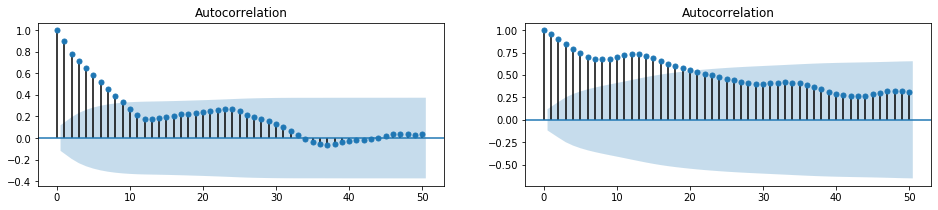

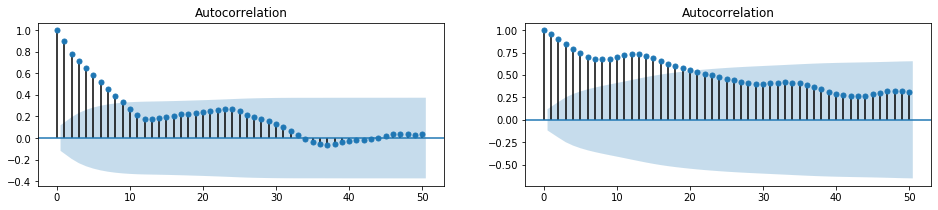

In [47]:
fig, axes = plt.subplots(1,2,figsize=(16,3))
plot_acf(rainfall.tolist(), lags=50, ax=axes[0])
plot_acf(bhid.tolist(), lags=50, ax=axes[1])

Checking if target variable is auto correlated.
Auto-corr (similarity between observations as a function of the lag time)

- plot looks like a sigmoid funtion (hint for seasonality)

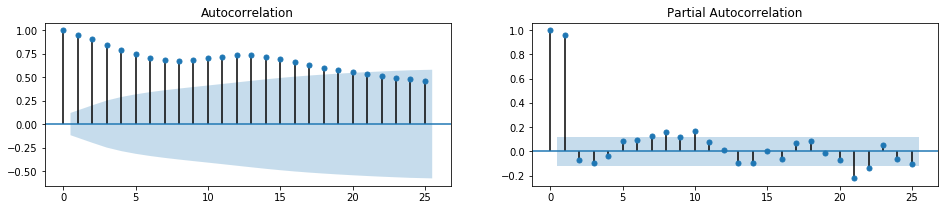

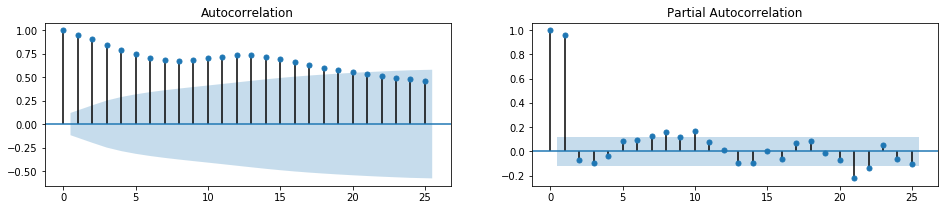

In [48]:
fig, axes = plt.subplots(1,2,figsize=(16,3))
plot_acf(bhid, lags=25, ax=axes[0])
plot_pacf(bhid, lags=25, ax=axes[1])

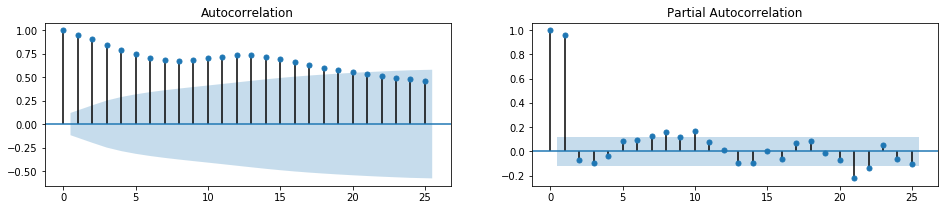

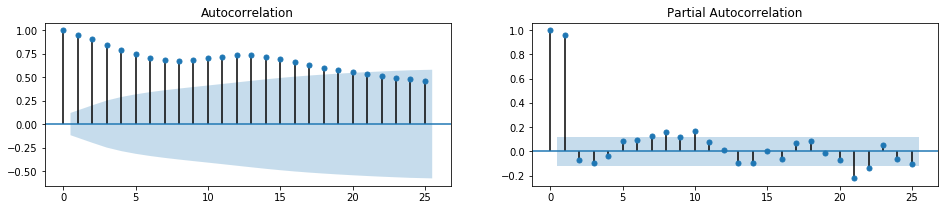

In [49]:
fig, axes = plt.subplots(1,2,figsize=(16,3))
plot_acf(bhid, lags=25, ax=axes[0])
plot_pacf(bhid, lags=25, ax=axes[1])

#### To check whether data is stationary we use Augmented Dickey-Fuller (ADF) Test

For time series modeling, data needs to be stationary — if there is a trend in the data we need to get rid of it. 

#### BHID

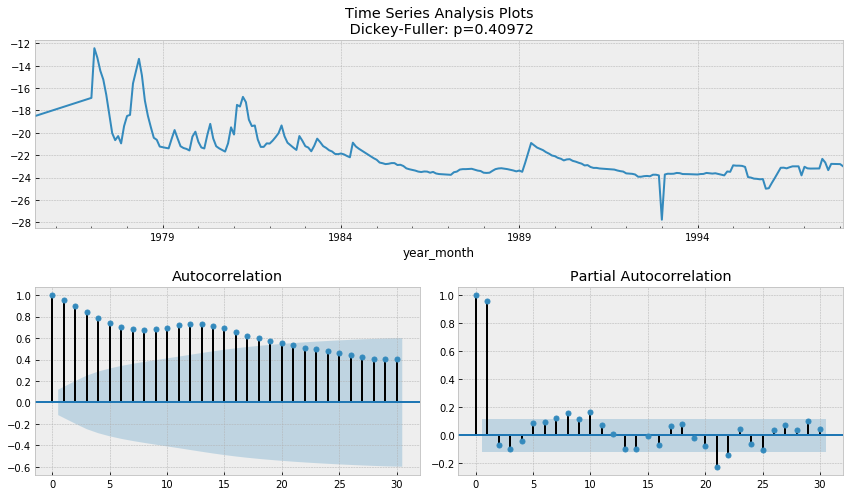

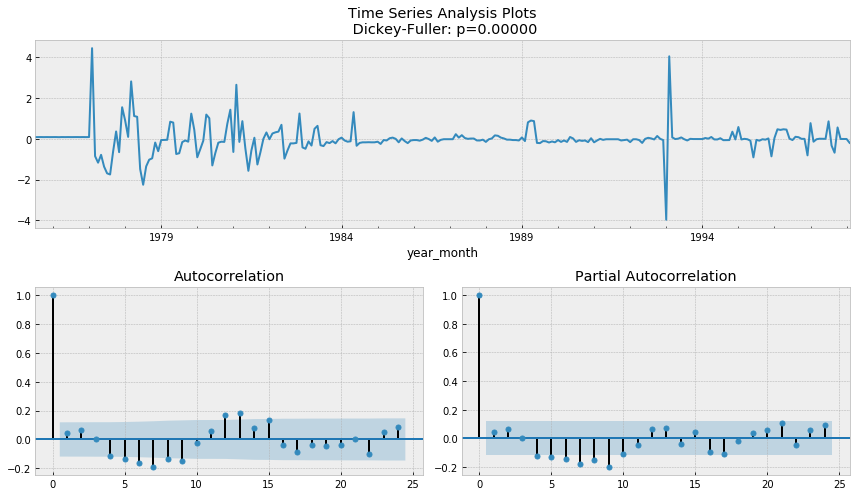

In [50]:
In [2]: import statsmodels.api as sm
import statsmodels.tsa.api as smt

def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
	    
	    if not isinstance(y, pd.Series):
	        y = pd.Series(y)
	        
	    with plt.style.context(style='bmh'):
	        fig = plt.figure(figsize=figsize)
	        layout = (2,2)
	        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
	        acf_ax = plt.subplot2grid(layout, (1,0))
	        pacf_ax = plt.subplot2grid(layout, (1,1))
	        
	        y.plot(ax=ts_ax)
	        p_value = sm.tsa.stattools.adfuller(y)[1]
	        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
	        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
	        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
	        plt.tight_layout()
	        
tsplot(bhid, lags=30)

# Take the first difference to remove to make the process stationary
D4N0122_diff = bhid - bhid.shift(1)

tsplot(D4N0122_diff[1:], lags=24)

#### Rainfall

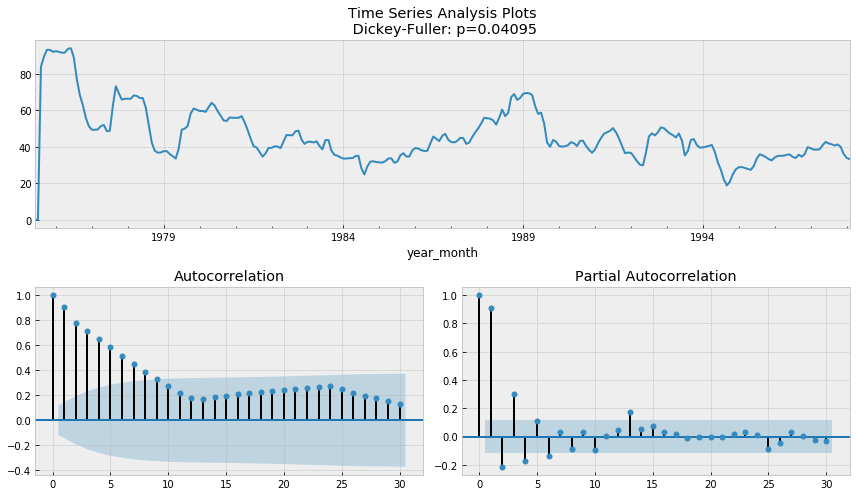

In [51]:
import statsmodels.tsa.api as smt

def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
	    
	    if not isinstance(y, pd.Series):
	        y = pd.Series(y)
	        
	    with plt.style.context(style='bmh'):
	        fig = plt.figure(figsize=figsize)
	        layout = (2,2)
	        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
	        acf_ax = plt.subplot2grid(layout, (1,0))
	        pacf_ax = plt.subplot2grid(layout, (1,1))
	        
	        y.plot(ax=ts_ax)
	        p_value = sm.tsa.stattools.adfuller(y)[1]
	        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
	        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
	        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
	        plt.tight_layout()
	        
tsplot(rainfall, lags=30)

#### Temp

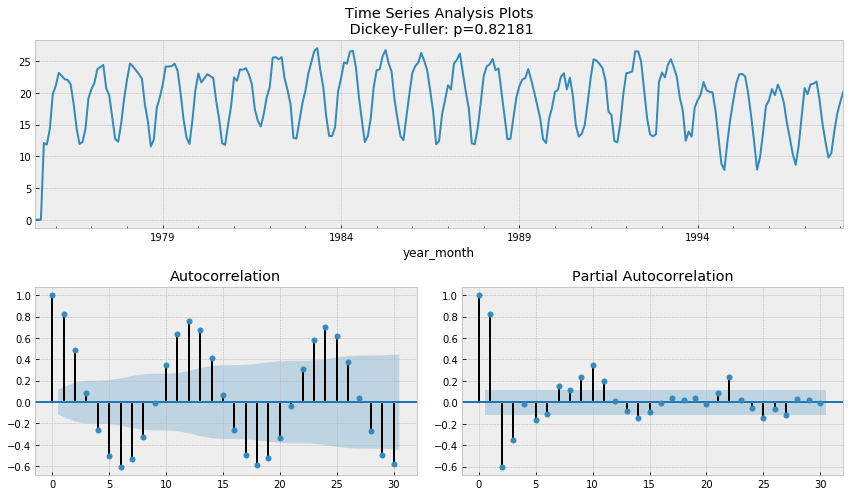

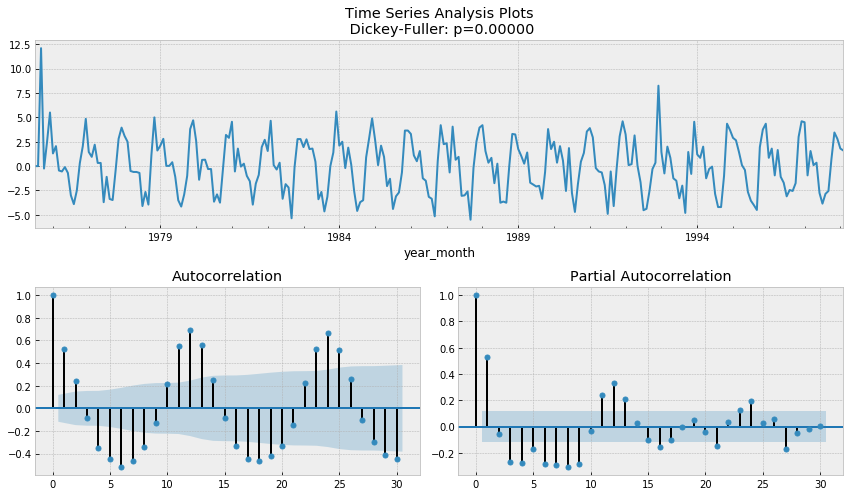

In [52]:
import statsmodels.tsa.api as smt

def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
	    
	    if not isinstance(y, pd.Series):
	        y = pd.Series(y)
	        
	    with plt.style.context(style='bmh'):
	        fig = plt.figure(figsize=figsize)
	        layout = (2,2)
	        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
	        acf_ax = plt.subplot2grid(layout, (1,0))
	        pacf_ax = plt.subplot2grid(layout, (1,1))
	        
	        y.plot(ax=ts_ax)
	        p_value = sm.tsa.stattools.adfuller(y)[1]
	        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
	        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
	        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
	        plt.tight_layout()
	        
tsplot(temperature, lags=30)

#Take the first difference to remove to make the process stationary
temp_diff = temperature - temperature.shift(1)


tsplot(temp_diff[1:], lags=30)


#### Discharge

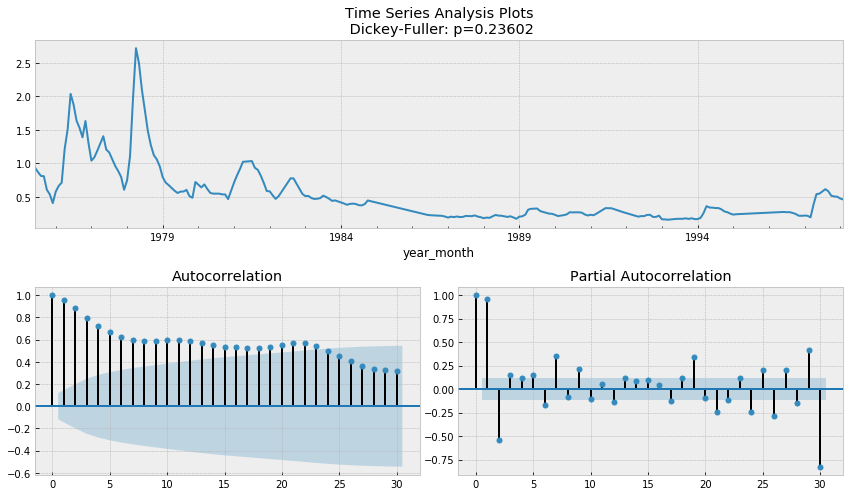

In [53]:
import statsmodels.tsa.api as smt

def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
	    
	    if not isinstance(y, pd.Series):
	        y = pd.Series(y)
	        
	    with plt.style.context(style='bmh'):
	        fig = plt.figure(figsize=figsize)
	        layout = (2,2)
	        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
	        acf_ax = plt.subplot2grid(layout, (1,0))
	        pacf_ax = plt.subplot2grid(layout, (1,1))
	        
	        y.plot(ax=ts_ax)
	        p_value = sm.tsa.stattools.adfuller(y)[1]
	        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
	        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
	        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
	        plt.tight_layout()
	        
tsplot(discharge, lags=30)

#### Usage

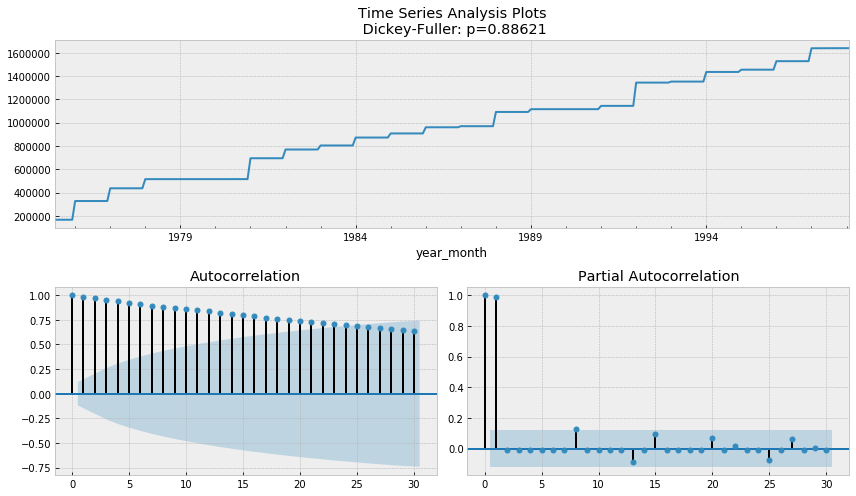

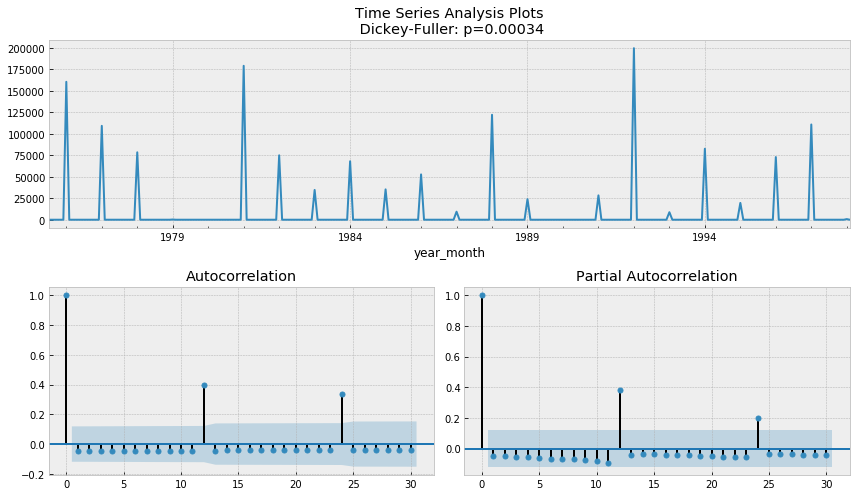

In [54]:
import statsmodels.tsa.api as smt

def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
	    
	    if not isinstance(y, pd.Series):
	        y = pd.Series(y)
	        
	    with plt.style.context(style='bmh'):
	        fig = plt.figure(figsize=figsize)
	        layout = (2,2)
	        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
	        acf_ax = plt.subplot2grid(layout, (1,0))
	        pacf_ax = plt.subplot2grid(layout, (1,1))
	        
	        y.plot(ax=ts_ax)
	        p_value = sm.tsa.stattools.adfuller(y)[1]
	        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
	        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
	        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
	        plt.tight_layout()
	        
tsplot(usage, lags=30)

#Take the first difference to remove to make the process stationary
usage_diff = usage - usage.shift(1)


tsplot(usage_diff[1:], lags=30)



### Differenced dataframe (poor model results)

In [55]:
pima_diff = pd.DataFrame({'D4N0122': D4N0122_diff ,'Temperature': temp_diff,  'Rainfall': rainfall,  'Discharge': discharge, 'Abstraction': usage_diff}, columns=['D4N0122','Temperature','precip_trend','Discharge', 'Abstraction'])
pima_diff.apply(lambda x: sum(x.isnull()), axis=0)

D4N0122           1
Temperature       1
precip_trend    273
Discharge         0
Abstraction       1
dtype: int64

In [56]:
#X = pima_diff[['Temperature', 'Discharge','Abstraction']] # Features
#y = pima_diff[['D4N0834']] # 'D4N0834', 'D4N0111' ,'D4N0122' ,'D4N0066','D4N0115','D4N0110' 

### Visual illustration to help select train and test data

Text(0, 0.5, 'Groundwater levels')

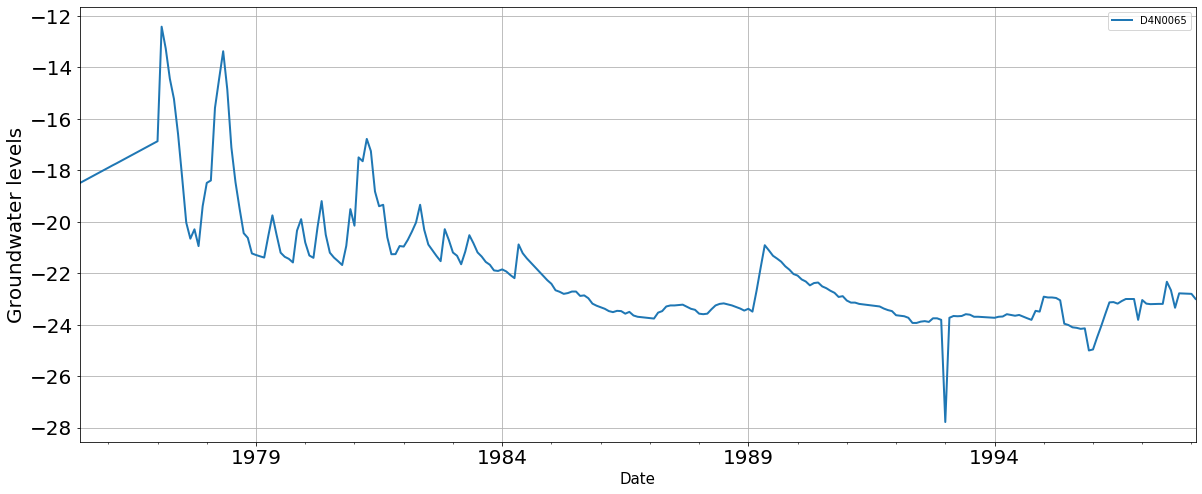

In [57]:
pima[['D4N0065']].plot(figsize=(20,8), linewidth=2, fontsize = 20, grid=True);
plt.xlabel("Date",fontsize=15)
plt.ylabel("Groundwater levels",fontsize=20)


### Model Parameters

In [58]:
pima['precip_trend_log'] = 1 +np.log1p(pima['precip_trend (t-16)'])
pima['Temperature_log'] = 1 +np.log1p(pima['Temperature (t-5)'])
pima['Discharge_log'] = 1 + np.log1p(pima['Discharge'])
pima['Abstraction_log'] = 1 + np.log1p(pima['Abstraction'])

In [59]:
pima

D4N0065  Temperature  precip_trend  Discharge   Abstraction  \
year_month                                                                  
1975-06-01 -18.500000        12.10     83.904167      0.938  1.665429e+05   
1975-07-01 -18.415690        11.85     89.433333      0.872  1.665429e+05   
1975-08-01 -18.328569        14.30     93.183333      0.814  1.665429e+05   
1975-09-01 -18.241448        19.80     93.183333      0.809  1.665429e+05   
1975-10-01 -18.157138        21.10     92.108333      0.608  1.665429e+05   
...               ...          ...           ...        ...           ...   
1997-10-01 -22.780000        18.55     36.125000      0.517  1.638955e+06   
1997-11-01 -22.786739        20.15     33.925000      0.507  1.638955e+06   
1997-12-01 -22.793261        22.70     33.316667      0.503  1.638955e+06   
1998-01-01 -22.800000        21.30     33.208333      0.476  1.639675e+06   
1998-02-01 -22.996675        21.50     33.000000      0.462  1.639675e+06   

            Temperature (t-5)  precip_trend (t-16)  precip_trend_log  \
year_month                                                             
1975-06-01                NaN                  NaN               NaN   
1975-07-01                NaN                  NaN               NaN   
1975-08-01                NaN            83.904167          5.441523   
1975-09-01              12.10            89.433333          5.504613   
1975-10-01              11.85            93.183333          5.545243   
...                       ...                  ...               ...   
1997-10-01              10.50            41.266667          4.743999   
1997-11-01              13.95            40.083333          4.715603   
1997-12-01              16.75            36.125000          4.614291   
1998-01-01              18.55            33.925000          4.553203   
1998-02-01              20.15            33.316667          4.535631   

            Temperature_log  Discharge_log  Abstraction_log  
year_month                                                   
1975-06-01              NaN       1.661657        13.023014  
1975-07-01              NaN       1.627007        13.023014  
1975-08-01              NaN       1.595534        13.023014  
1975-09-01         3.572612       1.592774        13.023014  
1975-10-01         3.553344       1.474991        13.023014  
...                     ...            ...              ...  
1997-10-01         3.442347       1.416735        15.309570  
1997-11-01         3.704711       1.410121        15.309570  
1997-12-01         3.876386       1.407463        15.309570  
1998-01-01         3.972975       1.389336        15.310009  
1998-02-01         4.051640       1.379805        15.310009  

[273 rows x 11 columns]

In [60]:
for obs in range(1,5):
    pima["t_" + str(obs)] = pima.D4N0065.shift(obs)
pima.fillna(0, inplace=True)

In [61]:
pima

D4N0065  Temperature  precip_trend  Discharge   Abstraction  \
year_month                                                                  
1975-06-01 -18.500000        12.10     83.904167      0.938  1.665429e+05   
1975-07-01 -18.415690        11.85     89.433333      0.872  1.665429e+05   
1975-08-01 -18.328569        14.30     93.183333      0.814  1.665429e+05   
1975-09-01 -18.241448        19.80     93.183333      0.809  1.665429e+05   
1975-10-01 -18.157138        21.10     92.108333      0.608  1.665429e+05   
...               ...          ...           ...        ...           ...   
1997-10-01 -22.780000        18.55     36.125000      0.517  1.638955e+06   
1997-11-01 -22.786739        20.15     33.925000      0.507  1.638955e+06   
1997-12-01 -22.793261        22.70     33.316667      0.503  1.638955e+06   
1998-01-01 -22.800000        21.30     33.208333      0.476  1.639675e+06   
1998-02-01 -22.996675        21.50     33.000000      0.462  1.639675e+06   

            Temperature (t-5)  precip_trend (t-16)  precip_trend_log  \
year_month                                                             
1975-06-01               0.00             0.000000          0.000000   
1975-07-01               0.00             0.000000          0.000000   
1975-08-01               0.00            83.904167          5.441523   
1975-09-01              12.10            89.433333          5.504613   
1975-10-01              11.85            93.183333          5.545243   
...                       ...                  ...               ...   
1997-10-01              10.50            41.266667          4.743999   
1997-11-01              13.95            40.083333          4.715603   
1997-12-01              16.75            36.125000          4.614291   
1998-01-01              18.55            33.925000          4.553203   
1998-02-01              20.15            33.316667          4.535631   

            Temperature_log  Discharge_log  Abstraction_log        t_1  \
year_month                                                               
1975-06-01         0.000000       1.661657        13.023014   0.000000   
1975-07-01         0.000000       1.627007        13.023014 -18.500000   
1975-08-01         0.000000       1.595534        13.023014 -18.415690   
1975-09-01         3.572612       1.592774        13.023014 -18.328569   
1975-10-01         3.553344       1.474991        13.023014 -18.241448   
...                     ...            ...              ...        ...   
1997-10-01         3.442347       1.416735        15.309570 -23.340000   
1997-11-01         3.704711       1.410121        15.309570 -22.780000   
1997-12-01         3.876386       1.407463        15.309570 -22.786739   
1998-01-01         3.972975       1.389336        15.310009 -22.793261   
1998-02-01         4.051640       1.379805        15.310009 -22.800000   

                  t_2        t_3    t_4  
year_month                               
1975-06-01   0.000000   0.000000   0.00  
1975-07-01   0.000000   0.000000   0.00  
1975-08-01 -18.500000   0.000000   0.00  
1975-09-01 -18.415690 -18.500000   0.00  
1975-10-01 -18.328569 -18.415690 -18.50  
...               ...        ...    ...  
1997-10-01 -22.660000 -22.330000 -23.19  
1997-11-01 -23.340000 -22.660000 -22.33  
1997-12-01 -22.780000 -23.340000 -22.66  
1998-01-01 -22.786739 -22.780000 -23.34  
1998-02-01 -22.793261 -22.786739 -22.78  

[273 rows x 15 columns]

In [62]:
pima.shape

(273, 15)

In [63]:
pima1  = pima[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2','D4N0065']]
scaler = StandardScaler()
pima1  = pd.DataFrame(scaler.fit_transform(pima1), columns=pima1.columns, index=pima1.index)

### All variables

In [64]:
X = pima1[['Temperature_log','precip_trend_log' ,'Discharge_log','Abstraction_log' ,'t_1', 't_2']]
y = pima1['D4N0065']

mi = mutual_info_regression(X, y)
mi /= np.max(mi)

mi = pd.Series(mi)
mi.index = X.columns
mi.sort_values(ascending=False)
mi

Temperature_log     0.026391
precip_trend_log    0.249858
Discharge_log       0.454943
Abstraction_log     0.650722
t_1                 1.000000
t_2                 0.762186
dtype: float64

In [65]:
X = pima1[['Discharge_log' ,'precip_trend_log' ,'Discharge_log','Abstraction_log' ,'t_1', 't_2']].values
y = pima1['D4N0065'].values
y = y.reshape(-1,1)

In [66]:
from sklearn.model_selection import TimeSeriesSplit
tss = TimeSeriesSplit(n_splits = 5)
for train_index, test_index in tss.split(X):
    X_train, X_test = X[train_index, :], X[test_index,:]
    y_train, y_test = y[train_index], y[test_index]
    
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(228, 6) (228, 1)
(45, 6) (45, 1)


In [67]:
def forecast(model, test_forecast, gwl, steps_ahead):
    y_pred = []
    current_output = gwl
    for step in range(steps_ahead):
        #print(test_forecast[step])
        input_test = np.concatenate([test_forecast[step][:-1], [current_output]])
        #input_test = [test_forecast[0][0][:-1], gwl]
        #print(input_test)
        pred = model.predict(input_test.reshape(1,1,6))
        y_pred.append(pred[0][0])
        #print(pred)
        current_output = pred[0][0]
    return y_pred

### LSTM

In [71]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import GRU, LSTM
from tensorflow.keras.optimizers import Adam

In [72]:
from sklearn.metrics import *
import numpy as np
import csv  

# rounding off
Round = 3      

train_pred = []
test_pred  = []

fields = ['Iteration_No', 'mse_lstm', 'rmse_lstm', 'r2_lstm','mae_lstm'] 
csvfile = open('Summary.csv', 'w') 
csvwriter = csv.writer(csvfile)  
csvwriter.writerow(fields) 

for fold in range(1,11):
    print(f'Running fold {fold}')
    print(X_train.shape)


    check = ModelCheckpoint('model.h5', verbose=1, save_best_only=True)

    early = EarlyStopping(patience=100)

    optimizer = Adam(lr=0.00001)
    model = Sequential()
    model.add(LSTM(50, input_shape=(1, 6)))
    model.add(Dropout(0.1))

    model.add(Dense(1))

    model.compile(loss='mse', optimizer='rmsprop', metrics=['mse'])

    X_t_reshaped   = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_val_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

    history = model.fit(X_t_reshaped, 
                    y_train, 
                    validation_data=(X_val_reshaped, y_test),
                    epochs=1000, 
                    batch_size=96, 
                    verbose=1, callbacks=[check, early])
    X_val_reshaped = X_val_reshaped.reshape(45, 6)

    #running function
    gwl = -0.81759381
    test_forecast = X_test
    steps_ahead = 45
    y_pred = forecast(model, test_forecast, gwl, steps_ahead)
    y_pred = np.array(y_pred)
    
    #metrics for test
    y_lstm = y_pred
    test_pred.append(y_lstm)
    mse_lstm = mean_squared_error(y_test, y_lstm)
    rmse_lstm = np.sqrt(mse_lstm)
    r2_lstm = r2_score(y_test, y_lstm)
    mae_lstm = mean_absolute_error(y_test, y_lstm)

    #metrics train 
    train     = model.predict(X_t_reshaped)
    train_pred.append(train)
    msetrain  = mean_squared_error(y_train, train)
    rmsetrain = np.sqrt(msetrain)
    mae_train = mean_absolute_error(y_train, train)
    r2train   = r2_score(y_train, train)
    
    csvwriter.writerow([f'Iteration_{fold}',round(mse_lstm,Round), round(rmse_lstm,Round), round(r2_lstm,Round),round(mae_lstm,Round)]) 

csvfile.close()
summary= pd.read_csv('Summary.csv')
    

Running fold 1
(228, 6)
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 228 samples, validate on 45 samples
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/1000
 96/228 [===========>..................] - ETA: 2s - loss: 0.9254 - mean_squared_error: 0.9254
Epoch 00001: val_loss improved from inf to 0.39808, saving model to model.h5
228/228 [==============================] - 2s 10ms/sample - loss: 0.9801 - mean_squared_error: 0.9801 - val_loss: 0.3981 - val_mean_squared_error: 0.3981
Epoch 2/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.6959 - mean_squared_error: 0.6959
Epoch 00002: val_loss improved from 0.39808 to 0.36061, saving model to model.h5
228/228 [==============================] - 0s 228us/sample - loss: 0.8411 - mean_squared_error: 0.8411 - val_loss: 0.3606 - val_mean_squared_error: 0.3606
Epoch 3/1000
 96/228 [===========>..

Epoch 23/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.2324 - mean_squared_error: 0.2324
Epoch 00023: val_loss improved from 0.05119 to 0.04833, saving model to model.h5
228/228 [==============================] - 0s 245us/sample - loss: 0.1520 - mean_squared_error: 0.1520 - val_loss: 0.0483 - val_mean_squared_error: 0.0483
Epoch 24/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1117 - mean_squared_error: 0.1117
Epoch 00024: val_loss improved from 0.04833 to 0.04587, saving model to model.h5
228/228 [==============================] - 0s 225us/sample - loss: 0.1460 - mean_squared_error: 0.1460 - val_loss: 0.0459 - val_mean_squared_error: 0.0459
Epoch 25/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1010 - mean_squared_error: 0.1010
Epoch 00025: val_loss improved from 0.04587 to 0.04348, saving model to model.h5
228/228 [==============================] - 0s 201us/sample - loss: 0.1486 - mean_squared_error: 0.1486 - val_loss: 0.043

Epoch 47/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0958 - mean_squared_error: 0.0958
Epoch 00047: val_loss improved from 0.03519 to 0.03474, saving model to model.h5
228/228 [==============================] - 0s 187us/sample - loss: 0.1215 - mean_squared_error: 0.1215 - val_loss: 0.0347 - val_mean_squared_error: 0.0347
Epoch 48/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1480 - mean_squared_error: 0.1480
Epoch 00048: val_loss improved from 0.03474 to 0.03464, saving model to model.h5
228/228 [==============================] - 0s 213us/sample - loss: 0.1210 - mean_squared_error: 0.1210 - val_loss: 0.0346 - val_mean_squared_error: 0.0346
Epoch 49/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0662 - mean_squared_error: 0.0662
Epoch 00049: val_loss improved from 0.03464 to 0.03426, saving model to model.h5
228/228 [==============================] - 0s 300us/sample - loss: 0.1182 - mean_squared_error: 0.1182 - val_loss: 0.034

 96/228 [===========>..................] - ETA: 0s - loss: 0.0954 - mean_squared_error: 0.0954
Epoch 00071: val_loss did not improve from 0.03045
228/228 [==============================] - 0s 138us/sample - loss: 0.1067 - mean_squared_error: 0.1067 - val_loss: 0.0306 - val_mean_squared_error: 0.0306
Epoch 72/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0630 - mean_squared_error: 0.0630
Epoch 00072: val_loss did not improve from 0.03045
228/228 [==============================] - 0s 149us/sample - loss: 0.1012 - mean_squared_error: 0.1012 - val_loss: 0.0311 - val_mean_squared_error: 0.0311
Epoch 73/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0810 - mean_squared_error: 0.0810
Epoch 00073: val_loss improved from 0.03045 to 0.03014, saving model to model.h5
228/228 [==============================] - 0s 331us/sample - loss: 0.1057 - mean_squared_error: 0.1057 - val_loss: 0.0301 - val_mean_squared_error: 0.0301
Epoch 74/1000
 96/228 [===========>....

Epoch 96/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1197 - mean_squared_error: 0.1197
Epoch 00096: val_loss improved from 0.02726 to 0.02689, saving model to model.h5
228/228 [==============================] - 0s 195us/sample - loss: 0.0895 - mean_squared_error: 0.0895 - val_loss: 0.0269 - val_mean_squared_error: 0.0269
Epoch 97/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0859 - mean_squared_error: 0.0859
Epoch 00097: val_loss did not improve from 0.02689
228/228 [==============================] - 0s 212us/sample - loss: 0.0970 - mean_squared_error: 0.0970 - val_loss: 0.0269 - val_mean_squared_error: 0.0269
Epoch 98/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0578 - mean_squared_error: 0.0578
Epoch 00098: val_loss improved from 0.02689 to 0.02686, saving model to model.h5
228/228 [==============================] - 0s 204us/sample - loss: 0.0971 - mean_squared_error: 0.0971 - val_loss: 0.0269 - val_mean_squared_error: 0.

 96/228 [===========>..................] - ETA: 0s - loss: 0.0526 - mean_squared_error: 0.0526
Epoch 00121: val_loss did not improve from 0.02566
228/228 [==============================] - 0s 151us/sample - loss: 0.0934 - mean_squared_error: 0.0934 - val_loss: 0.0269 - val_mean_squared_error: 0.0269
Epoch 122/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0695 - mean_squared_error: 0.0695
Epoch 00122: val_loss did not improve from 0.02566
228/228 [==============================] - 0s 326us/sample - loss: 0.0944 - mean_squared_error: 0.0944 - val_loss: 0.0264 - val_mean_squared_error: 0.0264
Epoch 123/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0754 - mean_squared_error: 0.0754
Epoch 00123: val_loss did not improve from 0.02566
228/228 [==============================] - 0s 150us/sample - loss: 0.0904 - mean_squared_error: 0.0904 - val_loss: 0.0262 - val_mean_squared_error: 0.0262
Epoch 124/1000
 96/228 [===========>..................] - ETA: 0s -

Epoch 147/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1008 - mean_squared_error: 0.1008
Epoch 00147: val_loss did not improve from 0.02461
228/228 [==============================] - 0s 117us/sample - loss: 0.0840 - mean_squared_error: 0.0840 - val_loss: 0.0248 - val_mean_squared_error: 0.0248
Epoch 148/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0462 - mean_squared_error: 0.0462
Epoch 00148: val_loss did not improve from 0.02461
228/228 [==============================] - 0s 154us/sample - loss: 0.0797 - mean_squared_error: 0.0797 - val_loss: 0.0266 - val_mean_squared_error: 0.0266
Epoch 149/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0485 - mean_squared_error: 0.0485
Epoch 00149: val_loss did not improve from 0.02461
228/228 [==============================] - 0s 151us/sample - loss: 0.0840 - mean_squared_error: 0.0840 - val_loss: 0.0285 - val_mean_squared_error: 0.0285
Epoch 150/1000
 96/228 [===========>................

Epoch 173/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0878 - mean_squared_error: 0.0878
Epoch 00173: val_loss did not improve from 0.02448
228/228 [==============================] - 0s 151us/sample - loss: 0.0860 - mean_squared_error: 0.0860 - val_loss: 0.0259 - val_mean_squared_error: 0.0259
Epoch 174/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0516 - mean_squared_error: 0.0516
Epoch 00174: val_loss did not improve from 0.02448
228/228 [==============================] - 0s 146us/sample - loss: 0.0831 - mean_squared_error: 0.0831 - val_loss: 0.0247 - val_mean_squared_error: 0.0247
Epoch 175/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0716 - mean_squared_error: 0.0716
Epoch 00175: val_loss improved from 0.02448 to 0.02434, saving model to model.h5
228/228 [==============================] - 0s 225us/sample - loss: 0.0862 - mean_squared_error: 0.0862 - val_loss: 0.0243 - val_mean_squared_error: 0.0243
Epoch 176/1000
 96/228

Epoch 199/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0449 - mean_squared_error: 0.0449
Epoch 00199: val_loss did not improve from 0.02392
228/228 [==============================] - 0s 141us/sample - loss: 0.0765 - mean_squared_error: 0.0765 - val_loss: 0.0251 - val_mean_squared_error: 0.0251
Epoch 200/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0948 - mean_squared_error: 0.0948
Epoch 00200: val_loss did not improve from 0.02392
228/228 [==============================] - 0s 161us/sample - loss: 0.0846 - mean_squared_error: 0.0846 - val_loss: 0.0241 - val_mean_squared_error: 0.0241
Epoch 201/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0884 - mean_squared_error: 0.0884
Epoch 00201: val_loss did not improve from 0.02392
228/228 [==============================] - 0s 157us/sample - loss: 0.0864 - mean_squared_error: 0.0864 - val_loss: 0.0240 - val_mean_squared_error: 0.0240
Epoch 202/1000
 96/228 [===========>................

Epoch 225/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0501 - mean_squared_error: 0.0501
Epoch 00225: val_loss did not improve from 0.02374
228/228 [==============================] - 0s 121us/sample - loss: 0.0838 - mean_squared_error: 0.0838 - val_loss: 0.0246 - val_mean_squared_error: 0.0246
Epoch 226/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1289 - mean_squared_error: 0.1289
Epoch 00226: val_loss did not improve from 0.02374
228/228 [==============================] - 0s 136us/sample - loss: 0.0821 - mean_squared_error: 0.0821 - val_loss: 0.0243 - val_mean_squared_error: 0.0243
Epoch 227/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0464 - mean_squared_error: 0.0464
Epoch 00227: val_loss did not improve from 0.02374
228/228 [==============================] - 0s 141us/sample - loss: 0.0843 - mean_squared_error: 0.0843 - val_loss: 0.0241 - val_mean_squared_error: 0.0241
Epoch 228/1000
 96/228 [===========>................

Epoch 251/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0811 - mean_squared_error: 0.0811
Epoch 00251: val_loss did not improve from 0.02343
228/228 [==============================] - 0s 124us/sample - loss: 0.0768 - mean_squared_error: 0.0768 - val_loss: 0.0247 - val_mean_squared_error: 0.0247
Epoch 252/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1223 - mean_squared_error: 0.1223
Epoch 00252: val_loss did not improve from 0.02343
228/228 [==============================] - 0s 181us/sample - loss: 0.0763 - mean_squared_error: 0.0763 - val_loss: 0.0238 - val_mean_squared_error: 0.0238
Epoch 253/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0352 - mean_squared_error: 0.0352
Epoch 00253: val_loss did not improve from 0.02343
228/228 [==============================] - 0s 149us/sample - loss: 0.0854 - mean_squared_error: 0.0854 - val_loss: 0.0256 - val_mean_squared_error: 0.0256
Epoch 254/1000
 96/228 [===========>................

Epoch 277/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0679 - mean_squared_error: 0.0679
Epoch 00277: val_loss did not improve from 0.02343
228/228 [==============================] - 0s 144us/sample - loss: 0.0767 - mean_squared_error: 0.0767 - val_loss: 0.0243 - val_mean_squared_error: 0.0243
Epoch 278/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0308 - mean_squared_error: 0.0308
Epoch 00278: val_loss did not improve from 0.02343
228/228 [==============================] - 0s 132us/sample - loss: 0.0753 - mean_squared_error: 0.0753 - val_loss: 0.0252 - val_mean_squared_error: 0.0252
Epoch 279/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1314 - mean_squared_error: 0.1314
Epoch 00279: val_loss did not improve from 0.02343
228/228 [==============================] - 0s 133us/sample - loss: 0.0824 - mean_squared_error: 0.0824 - val_loss: 0.0243 - val_mean_squared_error: 0.0243
Epoch 280/1000
 96/228 [===========>................

Epoch 303/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0830 - mean_squared_error: 0.0830
Epoch 00303: val_loss did not improve from 0.02343
228/228 [==============================] - 0s 176us/sample - loss: 0.0825 - mean_squared_error: 0.0825 - val_loss: 0.0238 - val_mean_squared_error: 0.0238
Epoch 304/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1133 - mean_squared_error: 0.1133
Epoch 00304: val_loss did not improve from 0.02343
228/228 [==============================] - 0s 203us/sample - loss: 0.0752 - mean_squared_error: 0.0752 - val_loss: 0.0240 - val_mean_squared_error: 0.0240
Epoch 305/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0998 - mean_squared_error: 0.0998
Epoch 00305: val_loss did not improve from 0.02343
228/228 [==============================] - 0s 122us/sample - loss: 0.0803 - mean_squared_error: 0.0803 - val_loss: 0.0236 - val_mean_squared_error: 0.0236
Epoch 306/1000
 96/228 [===========>................

Epoch 329/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1205 - mean_squared_error: 0.1205
Epoch 00329: val_loss did not improve from 0.02343
228/228 [==============================] - 0s 122us/sample - loss: 0.0796 - mean_squared_error: 0.0796 - val_loss: 0.0239 - val_mean_squared_error: 0.0239
Epoch 330/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0330 - mean_squared_error: 0.0330
Epoch 00330: val_loss did not improve from 0.02343
228/228 [==============================] - 0s 121us/sample - loss: 0.0765 - mean_squared_error: 0.0765 - val_loss: 0.0244 - val_mean_squared_error: 0.0244
Epoch 331/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0411 - mean_squared_error: 0.0411
Epoch 00331: val_loss did not improve from 0.02343
228/228 [==============================] - 0s 127us/sample - loss: 0.0748 - mean_squared_error: 0.0748 - val_loss: 0.0240 - val_mean_squared_error: 0.0240
Epoch 332/1000
 96/228 [===========>................

 96/228 [===========>..................] - ETA: 0s - loss: 0.5582 - mean_squared_error: 0.5582
Epoch 00006: val_loss improved from 0.24300 to 0.22016, saving model to model.h5
228/228 [==============================] - 0s 208us/sample - loss: 0.4704 - mean_squared_error: 0.4704 - val_loss: 0.2202 - val_mean_squared_error: 0.2202
Epoch 7/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.4908 - mean_squared_error: 0.4908
Epoch 00007: val_loss improved from 0.22016 to 0.19881, saving model to model.h5
228/228 [==============================] - 0s 190us/sample - loss: 0.4160 - mean_squared_error: 0.4160 - val_loss: 0.1988 - val_mean_squared_error: 0.1988
Epoch 8/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.3947 - mean_squared_error: 0.3947
Epoch 00008: val_loss improved from 0.19881 to 0.17867, saving model to model.h5
228/228 [==============================] - 0s 176us/sample - loss: 0.3906 - mean_squared_error: 0.3906 - val_loss: 0.1787 - val_mean_squ

Epoch 30/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1274 - mean_squared_error: 0.1274
Epoch 00030: val_loss improved from 0.04016 to 0.04011, saving model to model.h5
228/228 [==============================] - 0s 197us/sample - loss: 0.1393 - mean_squared_error: 0.1393 - val_loss: 0.0401 - val_mean_squared_error: 0.0401
Epoch 31/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0827 - mean_squared_error: 0.0827
Epoch 00031: val_loss improved from 0.04011 to 0.03985, saving model to model.h5
228/228 [==============================] - 0s 188us/sample - loss: 0.1383 - mean_squared_error: 0.1383 - val_loss: 0.0398 - val_mean_squared_error: 0.0398
Epoch 32/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1825 - mean_squared_error: 0.1825
Epoch 00032: val_loss improved from 0.03985 to 0.03897, saving model to model.h5
228/228 [==============================] - 0s 176us/sample - loss: 0.1324 - mean_squared_error: 0.1324 - val_loss: 0.039

 96/228 [===========>..................] - ETA: 0s - loss: 0.1502 - mean_squared_error: 0.1502
Epoch 00054: val_loss improved from 0.03283 to 0.03281, saving model to model.h5
228/228 [==============================] - 0s 192us/sample - loss: 0.1172 - mean_squared_error: 0.1172 - val_loss: 0.0328 - val_mean_squared_error: 0.0328
Epoch 55/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0633 - mean_squared_error: 0.0633
Epoch 00055: val_loss improved from 0.03281 to 0.03264, saving model to model.h5
228/228 [==============================] - 0s 267us/sample - loss: 0.1075 - mean_squared_error: 0.1075 - val_loss: 0.0326 - val_mean_squared_error: 0.0326
Epoch 56/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1512 - mean_squared_error: 0.1512
Epoch 00056: val_loss improved from 0.03264 to 0.03252, saving model to model.h5
228/228 [==============================] - 0s 309us/sample - loss: 0.1082 - mean_squared_error: 0.1082 - val_loss: 0.0325 - val_mean_s

 96/228 [===========>..................] - ETA: 0s - loss: 0.1123 - mean_squared_error: 0.1123
Epoch 00078: val_loss improved from 0.02790 to 0.02754, saving model to model.h5
228/228 [==============================] - 0s 185us/sample - loss: 0.1010 - mean_squared_error: 0.1010 - val_loss: 0.0275 - val_mean_squared_error: 0.0275
Epoch 79/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1145 - mean_squared_error: 0.1145
Epoch 00079: val_loss did not improve from 0.02754
228/228 [==============================] - 0s 142us/sample - loss: 0.1034 - mean_squared_error: 0.1034 - val_loss: 0.0275 - val_mean_squared_error: 0.0275
Epoch 80/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1214 - mean_squared_error: 0.1214
Epoch 00080: val_loss improved from 0.02754 to 0.02735, saving model to model.h5
228/228 [==============================] - 0s 271us/sample - loss: 0.1007 - mean_squared_error: 0.1007 - val_loss: 0.0274 - val_mean_squared_error: 0.0274
Epoch 81/

 96/228 [===========>..................] - ETA: 0s - loss: 0.0968 - mean_squared_error: 0.0968
Epoch 00102: val_loss improved from 0.02530 to 0.02525, saving model to model.h5
228/228 [==============================] - 0s 188us/sample - loss: 0.0936 - mean_squared_error: 0.0936 - val_loss: 0.0253 - val_mean_squared_error: 0.0253
Epoch 103/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0764 - mean_squared_error: 0.0764
Epoch 00103: val_loss did not improve from 0.02525
228/228 [==============================] - 0s 139us/sample - loss: 0.0953 - mean_squared_error: 0.0953 - val_loss: 0.0253 - val_mean_squared_error: 0.0253
Epoch 104/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1239 - mean_squared_error: 0.1239
Epoch 00104: val_loss improved from 0.02525 to 0.02520, saving model to model.h5
228/228 [==============================] - 0s 213us/sample - loss: 0.0882 - mean_squared_error: 0.0882 - val_loss: 0.0252 - val_mean_squared_error: 0.0252
Epoch 1

Epoch 127/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1323 - mean_squared_error: 0.1323
Epoch 00127: val_loss did not improve from 0.02416
228/228 [==============================] - 0s 127us/sample - loss: 0.0891 - mean_squared_error: 0.0891 - val_loss: 0.0244 - val_mean_squared_error: 0.0244
Epoch 128/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0680 - mean_squared_error: 0.0680
Epoch 00128: val_loss improved from 0.02416 to 0.02406, saving model to model.h5
228/228 [==============================] - 0s 198us/sample - loss: 0.0871 - mean_squared_error: 0.0871 - val_loss: 0.0241 - val_mean_squared_error: 0.0241
Epoch 129/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1471 - mean_squared_error: 0.1471
Epoch 00129: val_loss improved from 0.02406 to 0.02403, saving model to model.h5
228/228 [==============================] - 0s 282us/sample - loss: 0.0876 - mean_squared_error: 0.0876 - val_loss: 0.0240 - val_mean_squared_error:

Epoch 153/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0765 - mean_squared_error: 0.0765
Epoch 00153: val_loss did not improve from 0.02383
228/228 [==============================] - 0s 129us/sample - loss: 0.0856 - mean_squared_error: 0.0856 - val_loss: 0.0247 - val_mean_squared_error: 0.0247
Epoch 154/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0545 - mean_squared_error: 0.0545
Epoch 00154: val_loss did not improve from 0.02383
228/228 [==============================] - 0s 136us/sample - loss: 0.0796 - mean_squared_error: 0.0796 - val_loss: 0.0251 - val_mean_squared_error: 0.0251
Epoch 155/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0824 - mean_squared_error: 0.0824
Epoch 00155: val_loss did not improve from 0.02383
228/228 [==============================] - 0s 126us/sample - loss: 0.0767 - mean_squared_error: 0.0767 - val_loss: 0.0244 - val_mean_squared_error: 0.0244
Epoch 156/1000
 96/228 [===========>................

Epoch 179/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0826 - mean_squared_error: 0.0826
Epoch 00179: val_loss did not improve from 0.02346
228/228 [==============================] - 0s 129us/sample - loss: 0.0784 - mean_squared_error: 0.0784 - val_loss: 0.0242 - val_mean_squared_error: 0.0242
Epoch 180/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0560 - mean_squared_error: 0.0560
Epoch 00180: val_loss did not improve from 0.02346
228/228 [==============================] - 0s 126us/sample - loss: 0.0809 - mean_squared_error: 0.0809 - val_loss: 0.0239 - val_mean_squared_error: 0.0239
Epoch 181/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1102 - mean_squared_error: 0.1102
Epoch 00181: val_loss did not improve from 0.02346
228/228 [==============================] - 0s 131us/sample - loss: 0.0821 - mean_squared_error: 0.0821 - val_loss: 0.0237 - val_mean_squared_error: 0.0237
Epoch 182/1000
 96/228 [===========>................

Epoch 205/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0384 - mean_squared_error: 0.0384
Epoch 00205: val_loss did not improve from 0.02342
228/228 [==============================] - 0s 139us/sample - loss: 0.0826 - mean_squared_error: 0.0826 - val_loss: 0.0251 - val_mean_squared_error: 0.0251
Epoch 206/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1167 - mean_squared_error: 0.1167
Epoch 00206: val_loss did not improve from 0.02342
228/228 [==============================] - 0s 196us/sample - loss: 0.0841 - mean_squared_error: 0.0841 - val_loss: 0.0239 - val_mean_squared_error: 0.0239
Epoch 207/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1356 - mean_squared_error: 0.1356
Epoch 00207: val_loss did not improve from 0.02342
228/228 [==============================] - 0s 116us/sample - loss: 0.0845 - mean_squared_error: 0.0845 - val_loss: 0.0242 - val_mean_squared_error: 0.0242
Epoch 208/1000
 96/228 [===========>................

Epoch 231/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1009 - mean_squared_error: 0.1009
Epoch 00231: val_loss did not improve from 0.02336
228/228 [==============================] - 0s 138us/sample - loss: 0.0831 - mean_squared_error: 0.0831 - val_loss: 0.0239 - val_mean_squared_error: 0.0239
Epoch 232/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0308 - mean_squared_error: 0.0308
Epoch 00232: val_loss did not improve from 0.02336
228/228 [==============================] - 0s 137us/sample - loss: 0.0793 - mean_squared_error: 0.0793 - val_loss: 0.0238 - val_mean_squared_error: 0.0238
Epoch 233/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0351 - mean_squared_error: 0.0351
Epoch 00233: val_loss did not improve from 0.02336
228/228 [==============================] - 0s 211us/sample - loss: 0.0779 - mean_squared_error: 0.0779 - val_loss: 0.0242 - val_mean_squared_error: 0.0242
Epoch 234/1000
 96/228 [===========>................

Epoch 257/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0711 - mean_squared_error: 0.0711
Epoch 00257: val_loss did not improve from 0.02336
228/228 [==============================] - 0s 148us/sample - loss: 0.0790 - mean_squared_error: 0.0790 - val_loss: 0.0236 - val_mean_squared_error: 0.0236
Epoch 258/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0970 - mean_squared_error: 0.0970
Epoch 00258: val_loss did not improve from 0.02336
228/228 [==============================] - 0s 126us/sample - loss: 0.0785 - mean_squared_error: 0.0785 - val_loss: 0.0235 - val_mean_squared_error: 0.0235
Epoch 259/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0953 - mean_squared_error: 0.0953
Epoch 00259: val_loss did not improve from 0.02336
228/228 [==============================] - 0s 125us/sample - loss: 0.0764 - mean_squared_error: 0.0764 - val_loss: 0.0237 - val_mean_squared_error: 0.0237
Epoch 260/1000
 96/228 [===========>................

Epoch 283/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0939 - mean_squared_error: 0.0939
Epoch 00283: val_loss did not improve from 0.02336
228/228 [==============================] - 0s 116us/sample - loss: 0.0808 - mean_squared_error: 0.0808 - val_loss: 0.0238 - val_mean_squared_error: 0.0238
Epoch 284/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0397 - mean_squared_error: 0.0397
Epoch 00284: val_loss did not improve from 0.02336
228/228 [==============================] - 0s 123us/sample - loss: 0.0798 - mean_squared_error: 0.0798 - val_loss: 0.0241 - val_mean_squared_error: 0.0241
Epoch 285/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0988 - mean_squared_error: 0.0988
Epoch 00285: val_loss did not improve from 0.02336
228/228 [==============================] - 0s 115us/sample - loss: 0.0776 - mean_squared_error: 0.0776 - val_loss: 0.0250 - val_mean_squared_error: 0.0250
Epoch 286/1000
 96/228 [===========>................

Epoch 309/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0582 - mean_squared_error: 0.0582
Epoch 00309: val_loss did not improve from 0.02336
228/228 [==============================] - 0s 120us/sample - loss: 0.0822 - mean_squared_error: 0.0822 - val_loss: 0.0240 - val_mean_squared_error: 0.0240
Epoch 310/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0876 - mean_squared_error: 0.0876
Epoch 00310: val_loss did not improve from 0.02336
228/228 [==============================] - 0s 117us/sample - loss: 0.0760 - mean_squared_error: 0.0760 - val_loss: 0.0237 - val_mean_squared_error: 0.0237
Epoch 311/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0383 - mean_squared_error: 0.0383
Epoch 00311: val_loss did not improve from 0.02336
228/228 [==============================] - 0s 114us/sample - loss: 0.0746 - mean_squared_error: 0.0746 - val_loss: 0.0241 - val_mean_squared_error: 0.0241
Epoch 312/1000
 96/228 [===========>................

 96/228 [===========>..................] - ETA: 0s - loss: 0.1906 - mean_squared_error: 0.1906
Epoch 00018: val_loss improved from 0.05110 to 0.04731, saving model to model.h5
228/228 [==============================] - 0s 208us/sample - loss: 0.1654 - mean_squared_error: 0.1654 - val_loss: 0.0473 - val_mean_squared_error: 0.0473
Epoch 19/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.2059 - mean_squared_error: 0.2059
Epoch 00019: val_loss improved from 0.04731 to 0.04438, saving model to model.h5
228/228 [==============================] - 0s 218us/sample - loss: 0.1534 - mean_squared_error: 0.1534 - val_loss: 0.0444 - val_mean_squared_error: 0.0444
Epoch 20/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1923 - mean_squared_error: 0.1923
Epoch 00020: val_loss improved from 0.04438 to 0.04223, saving model to model.h5
228/228 [==============================] - 0s 192us/sample - loss: 0.1521 - mean_squared_error: 0.1521 - val_loss: 0.0422 - val_mean_s

Epoch 42/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0837 - mean_squared_error: 0.0837
Epoch 00042: val_loss improved from 0.03421 to 0.03404, saving model to model.h5
228/228 [==============================] - 0s 206us/sample - loss: 0.1188 - mean_squared_error: 0.1188 - val_loss: 0.0340 - val_mean_squared_error: 0.0340
Epoch 43/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1835 - mean_squared_error: 0.1835
Epoch 00043: val_loss improved from 0.03404 to 0.03359, saving model to model.h5
228/228 [==============================] - 0s 209us/sample - loss: 0.1186 - mean_squared_error: 0.1186 - val_loss: 0.0336 - val_mean_squared_error: 0.0336
Epoch 44/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1117 - mean_squared_error: 0.1117
Epoch 00044: val_loss improved from 0.03359 to 0.03334, saving model to model.h5
228/228 [==============================] - 0s 198us/sample - loss: 0.1162 - mean_squared_error: 0.1162 - val_loss: 0.033

Epoch 66/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0432 - mean_squared_error: 0.0432
Epoch 00066: val_loss improved from 0.02908 to 0.02887, saving model to model.h5
228/228 [==============================] - 0s 211us/sample - loss: 0.1098 - mean_squared_error: 0.1098 - val_loss: 0.0289 - val_mean_squared_error: 0.0289
Epoch 67/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1116 - mean_squared_error: 0.1116
Epoch 00067: val_loss did not improve from 0.02887
228/228 [==============================] - 0s 134us/sample - loss: 0.1059 - mean_squared_error: 0.1059 - val_loss: 0.0290 - val_mean_squared_error: 0.0290
Epoch 68/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1392 - mean_squared_error: 0.1392
Epoch 00068: val_loss improved from 0.02887 to 0.02857, saving model to model.h5
228/228 [==============================] - 0s 265us/sample - loss: 0.0967 - mean_squared_error: 0.0967 - val_loss: 0.0286 - val_mean_squared_error: 0.

Epoch 91/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1305 - mean_squared_error: 0.1305
Epoch 00091: val_loss improved from 0.02612 to 0.02605, saving model to model.h5
228/228 [==============================] - 0s 194us/sample - loss: 0.0947 - mean_squared_error: 0.0947 - val_loss: 0.0260 - val_mean_squared_error: 0.0260
Epoch 92/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0568 - mean_squared_error: 0.0568
Epoch 00092: val_loss did not improve from 0.02605
228/228 [==============================] - 0s 231us/sample - loss: 0.0968 - mean_squared_error: 0.0968 - val_loss: 0.0264 - val_mean_squared_error: 0.0264
Epoch 93/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1233 - mean_squared_error: 0.1233
Epoch 00093: val_loss improved from 0.02605 to 0.02591, saving model to model.h5
228/228 [==============================] - 0s 406us/sample - loss: 0.0910 - mean_squared_error: 0.0910 - val_loss: 0.0259 - val_mean_squared_error: 0.

Epoch 116/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0582 - mean_squared_error: 0.0582
Epoch 00116: val_loss did not improve from 0.02471
228/228 [==============================] - 0s 123us/sample - loss: 0.0886 - mean_squared_error: 0.0886 - val_loss: 0.0261 - val_mean_squared_error: 0.0261
Epoch 117/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0562 - mean_squared_error: 0.0562
Epoch 00117: val_loss did not improve from 0.02471
228/228 [==============================] - 0s 187us/sample - loss: 0.0881 - mean_squared_error: 0.0881 - val_loss: 0.0251 - val_mean_squared_error: 0.0251
Epoch 118/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0784 - mean_squared_error: 0.0784
Epoch 00118: val_loss improved from 0.02471 to 0.02465, saving model to model.h5
228/228 [==============================] - 0s 203us/sample - loss: 0.0847 - mean_squared_error: 0.0847 - val_loss: 0.0247 - val_mean_squared_error: 0.0247
Epoch 119/1000
 96/228

Epoch 142/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0995 - mean_squared_error: 0.0995
Epoch 00142: val_loss improved from 0.02418 to 0.02413, saving model to model.h5
228/228 [==============================] - 0s 269us/sample - loss: 0.0775 - mean_squared_error: 0.0775 - val_loss: 0.0241 - val_mean_squared_error: 0.0241
Epoch 143/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1106 - mean_squared_error: 0.1106
Epoch 00143: val_loss improved from 0.02413 to 0.02396, saving model to model.h5
228/228 [==============================] - 0s 192us/sample - loss: 0.0813 - mean_squared_error: 0.0813 - val_loss: 0.0240 - val_mean_squared_error: 0.0240
Epoch 144/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1366 - mean_squared_error: 0.1366
Epoch 00144: val_loss did not improve from 0.02396
228/228 [==============================] - 0s 106us/sample - loss: 0.0861 - mean_squared_error: 0.0861 - val_loss: 0.0241 - val_mean_squared_error:

Epoch 168/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0761 - mean_squared_error: 0.0761
Epoch 00168: val_loss did not improve from 0.02362
228/228 [==============================] - 0s 123us/sample - loss: 0.0821 - mean_squared_error: 0.0821 - val_loss: 0.0240 - val_mean_squared_error: 0.0240
Epoch 169/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0785 - mean_squared_error: 0.0785
Epoch 00169: val_loss did not improve from 0.02362
228/228 [==============================] - 0s 109us/sample - loss: 0.0759 - mean_squared_error: 0.0759 - val_loss: 0.0244 - val_mean_squared_error: 0.0244
Epoch 170/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0797 - mean_squared_error: 0.0797
Epoch 00170: val_loss did not improve from 0.02362
228/228 [==============================] - 0s 120us/sample - loss: 0.0813 - mean_squared_error: 0.0813 - val_loss: 0.0237 - val_mean_squared_error: 0.0237
Epoch 171/1000
 96/228 [===========>................

Epoch 194/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0862 - mean_squared_error: 0.0862
Epoch 00194: val_loss did not improve from 0.02346
228/228 [==============================] - 0s 116us/sample - loss: 0.0781 - mean_squared_error: 0.0781 - val_loss: 0.0235 - val_mean_squared_error: 0.0235
Epoch 195/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0899 - mean_squared_error: 0.0899
Epoch 00195: val_loss did not improve from 0.02346
228/228 [==============================] - 0s 114us/sample - loss: 0.0801 - mean_squared_error: 0.0801 - val_loss: 0.0239 - val_mean_squared_error: 0.0239
Epoch 196/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0442 - mean_squared_error: 0.0442
Epoch 00196: val_loss did not improve from 0.02346
228/228 [==============================] - 0s 119us/sample - loss: 0.0779 - mean_squared_error: 0.0779 - val_loss: 0.0238 - val_mean_squared_error: 0.0238
Epoch 197/1000
 96/228 [===========>................

Epoch 220/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0788 - mean_squared_error: 0.0788
Epoch 00220: val_loss did not improve from 0.02346
228/228 [==============================] - 0s 143us/sample - loss: 0.0743 - mean_squared_error: 0.0743 - val_loss: 0.0245 - val_mean_squared_error: 0.0245
Epoch 221/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0596 - mean_squared_error: 0.0596
Epoch 00221: val_loss did not improve from 0.02346
228/228 [==============================] - 0s 117us/sample - loss: 0.0802 - mean_squared_error: 0.0802 - val_loss: 0.0241 - val_mean_squared_error: 0.0241
Epoch 222/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0418 - mean_squared_error: 0.0418
Epoch 00222: val_loss did not improve from 0.02346
228/228 [==============================] - 0s 128us/sample - loss: 0.0804 - mean_squared_error: 0.0804 - val_loss: 0.0238 - val_mean_squared_error: 0.0238
Epoch 223/1000
 96/228 [===========>................

Epoch 246/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0655 - mean_squared_error: 0.0655
Epoch 00246: val_loss did not improve from 0.02342
228/228 [==============================] - 0s 254us/sample - loss: 0.0719 - mean_squared_error: 0.0719 - val_loss: 0.0238 - val_mean_squared_error: 0.0238
Epoch 247/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0593 - mean_squared_error: 0.0593
Epoch 00247: val_loss did not improve from 0.02342
228/228 [==============================] - 0s 173us/sample - loss: 0.0759 - mean_squared_error: 0.0759 - val_loss: 0.0235 - val_mean_squared_error: 0.0235
Epoch 248/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0844 - mean_squared_error: 0.0844
Epoch 00248: val_loss did not improve from 0.02342
228/228 [==============================] - 0s 158us/sample - loss: 0.0797 - mean_squared_error: 0.0797 - val_loss: 0.0242 - val_mean_squared_error: 0.0242
Epoch 249/1000
 96/228 [===========>................

Epoch 272/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0722 - mean_squared_error: 0.0722
Epoch 00272: val_loss did not improve from 0.02338
228/228 [==============================] - 0s 143us/sample - loss: 0.0803 - mean_squared_error: 0.0803 - val_loss: 0.0239 - val_mean_squared_error: 0.0239
Epoch 273/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1185 - mean_squared_error: 0.1185
Epoch 00273: val_loss did not improve from 0.02338
228/228 [==============================] - 0s 160us/sample - loss: 0.0779 - mean_squared_error: 0.0779 - val_loss: 0.0242 - val_mean_squared_error: 0.0242
Epoch 274/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0468 - mean_squared_error: 0.0468
Epoch 00274: val_loss did not improve from 0.02338
228/228 [==============================] - 0s 190us/sample - loss: 0.0764 - mean_squared_error: 0.0764 - val_loss: 0.0247 - val_mean_squared_error: 0.0247
Epoch 275/1000
 96/228 [===========>................

Epoch 298/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0562 - mean_squared_error: 0.0562
Epoch 00298: val_loss did not improve from 0.02338
228/228 [==============================] - 0s 121us/sample - loss: 0.0737 - mean_squared_error: 0.0737 - val_loss: 0.0235 - val_mean_squared_error: 0.0235
Epoch 299/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1074 - mean_squared_error: 0.1074
Epoch 00299: val_loss did not improve from 0.02338
228/228 [==============================] - 0s 110us/sample - loss: 0.0766 - mean_squared_error: 0.0766 - val_loss: 0.0237 - val_mean_squared_error: 0.0237
Epoch 300/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1127 - mean_squared_error: 0.1127
Epoch 00300: val_loss did not improve from 0.02338
228/228 [==============================] - 0s 149us/sample - loss: 0.0762 - mean_squared_error: 0.0762 - val_loss: 0.0242 - val_mean_squared_error: 0.0242
Epoch 301/1000
 96/228 [===========>................

Epoch 324/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0740 - mean_squared_error: 0.0740
Epoch 00324: val_loss did not improve from 0.02338
228/228 [==============================] - 0s 118us/sample - loss: 0.0767 - mean_squared_error: 0.0767 - val_loss: 0.0241 - val_mean_squared_error: 0.0241
Epoch 325/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0384 - mean_squared_error: 0.0384
Epoch 00325: val_loss did not improve from 0.02338
228/228 [==============================] - 0s 116us/sample - loss: 0.0718 - mean_squared_error: 0.0718 - val_loss: 0.0250 - val_mean_squared_error: 0.0250
Epoch 326/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0843 - mean_squared_error: 0.0843
Epoch 00326: val_loss did not improve from 0.02338
228/228 [==============================] - 0s 114us/sample - loss: 0.0793 - mean_squared_error: 0.0793 - val_loss: 0.0243 - val_mean_squared_error: 0.0243
Epoch 327/1000
 96/228 [===========>................

Epoch 350/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1032 - mean_squared_error: 0.1032
Epoch 00350: val_loss did not improve from 0.02338
228/228 [==============================] - 0s 121us/sample - loss: 0.0794 - mean_squared_error: 0.0794 - val_loss: 0.0236 - val_mean_squared_error: 0.0236
Epoch 351/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0508 - mean_squared_error: 0.0508
Epoch 00351: val_loss did not improve from 0.02338
228/228 [==============================] - 0s 112us/sample - loss: 0.0779 - mean_squared_error: 0.0779 - val_loss: 0.0236 - val_mean_squared_error: 0.0236
Epoch 352/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0302 - mean_squared_error: 0.0302
Epoch 00352: val_loss did not improve from 0.02338
228/228 [==============================] - 0s 112us/sample - loss: 0.0788 - mean_squared_error: 0.0788 - val_loss: 0.0237 - val_mean_squared_error: 0.0237
Epoch 353/1000
 96/228 [===========>................

Epoch 10/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.5970 - mean_squared_error: 0.5970
Epoch 00010: val_loss improved from 0.24643 to 0.22480, saving model to model.h5
228/228 [==============================] - 0s 219us/sample - loss: 0.4694 - mean_squared_error: 0.4694 - val_loss: 0.2248 - val_mean_squared_error: 0.2248
Epoch 11/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.5517 - mean_squared_error: 0.5517
Epoch 00011: val_loss improved from 0.22480 to 0.20319, saving model to model.h5
228/228 [==============================] - 0s 178us/sample - loss: 0.4282 - mean_squared_error: 0.4282 - val_loss: 0.2032 - val_mean_squared_error: 0.2032
Epoch 12/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.2999 - mean_squared_error: 0.2999
Epoch 00012: val_loss improved from 0.20319 to 0.18390, saving model to model.h5
228/228 [==============================] - 0s 168us/sample - loss: 0.3998 - mean_squared_error: 0.3998 - val_loss: 0.183

Epoch 34/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1694 - mean_squared_error: 0.1694
Epoch 00034: val_loss improved from 0.03678 to 0.03647, saving model to model.h5
228/228 [==============================] - 0s 245us/sample - loss: 0.1348 - mean_squared_error: 0.1348 - val_loss: 0.0365 - val_mean_squared_error: 0.0365
Epoch 35/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1750 - mean_squared_error: 0.1750
Epoch 00035: val_loss improved from 0.03647 to 0.03624, saving model to model.h5
228/228 [==============================] - 0s 177us/sample - loss: 0.1283 - mean_squared_error: 0.1283 - val_loss: 0.0362 - val_mean_squared_error: 0.0362
Epoch 36/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1418 - mean_squared_error: 0.1418
Epoch 00036: val_loss improved from 0.03624 to 0.03599, saving model to model.h5
228/228 [==============================] - 0s 182us/sample - loss: 0.1344 - mean_squared_error: 0.1344 - val_loss: 0.036

Epoch 58/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0939 - mean_squared_error: 0.0939
Epoch 00058: val_loss improved from 0.03180 to 0.03152, saving model to model.h5
228/228 [==============================] - 0s 181us/sample - loss: 0.1108 - mean_squared_error: 0.1108 - val_loss: 0.0315 - val_mean_squared_error: 0.0315
Epoch 59/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0889 - mean_squared_error: 0.0889
Epoch 00059: val_loss improved from 0.03152 to 0.03143, saving model to model.h5
228/228 [==============================] - 0s 228us/sample - loss: 0.1141 - mean_squared_error: 0.1141 - val_loss: 0.0314 - val_mean_squared_error: 0.0314
Epoch 60/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1293 - mean_squared_error: 0.1293
Epoch 00060: val_loss improved from 0.03143 to 0.03117, saving model to model.h5
228/228 [==============================] - 0s 185us/sample - loss: 0.1105 - mean_squared_error: 0.1105 - val_loss: 0.031

 96/228 [===========>..................] - ETA: 0s - loss: 0.0731 - mean_squared_error: 0.0731
Epoch 00082: val_loss improved from 0.02821 to 0.02798, saving model to model.h5
228/228 [==============================] - 0s 220us/sample - loss: 0.1023 - mean_squared_error: 0.1023 - val_loss: 0.0280 - val_mean_squared_error: 0.0280
Epoch 83/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1455 - mean_squared_error: 0.1455
Epoch 00083: val_loss improved from 0.02798 to 0.02773, saving model to model.h5
228/228 [==============================] - 0s 191us/sample - loss: 0.0993 - mean_squared_error: 0.0993 - val_loss: 0.0277 - val_mean_squared_error: 0.0277
Epoch 84/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1396 - mean_squared_error: 0.1396
Epoch 00084: val_loss improved from 0.02773 to 0.02772, saving model to model.h5
228/228 [==============================] - 0s 283us/sample - loss: 0.1035 - mean_squared_error: 0.1035 - val_loss: 0.0277 - val_mean_s

Epoch 107/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1542 - mean_squared_error: 0.1542
Epoch 00107: val_loss did not improve from 0.02605
228/228 [==============================] - 0s 164us/sample - loss: 0.0960 - mean_squared_error: 0.0960 - val_loss: 0.0262 - val_mean_squared_error: 0.0262
Epoch 108/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1527 - mean_squared_error: 0.1527
Epoch 00108: val_loss did not improve from 0.02605
228/228 [==============================] - 0s 142us/sample - loss: 0.0912 - mean_squared_error: 0.0912 - val_loss: 0.0261 - val_mean_squared_error: 0.0261
Epoch 109/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0870 - mean_squared_error: 0.0870
Epoch 00109: val_loss improved from 0.02605 to 0.02576, saving model to model.h5
228/228 [==============================] - 0s 213us/sample - loss: 0.0926 - mean_squared_error: 0.0926 - val_loss: 0.0258 - val_mean_squared_error: 0.0258
Epoch 110/1000
 96/228

Epoch 133/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1464 - mean_squared_error: 0.1464
Epoch 00133: val_loss improved from 0.02523 to 0.02493, saving model to model.h5
228/228 [==============================] - 0s 191us/sample - loss: 0.0871 - mean_squared_error: 0.0871 - val_loss: 0.0249 - val_mean_squared_error: 0.0249
Epoch 134/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1143 - mean_squared_error: 0.1143
Epoch 00134: val_loss did not improve from 0.02493
228/228 [==============================] - 0s 118us/sample - loss: 0.0882 - mean_squared_error: 0.0882 - val_loss: 0.0260 - val_mean_squared_error: 0.0260
Epoch 135/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1644 - mean_squared_error: 0.1644
Epoch 00135: val_loss did not improve from 0.02493
228/228 [==============================] - 0s 137us/sample - loss: 0.0963 - mean_squared_error: 0.0963 - val_loss: 0.0256 - val_mean_squared_error: 0.0256
Epoch 136/1000
 96/228

Epoch 159/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1042 - mean_squared_error: 0.1042
Epoch 00159: val_loss improved from 0.02439 to 0.02421, saving model to model.h5
228/228 [==============================] - 0s 185us/sample - loss: 0.0847 - mean_squared_error: 0.0847 - val_loss: 0.0242 - val_mean_squared_error: 0.0242
Epoch 160/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0521 - mean_squared_error: 0.0521
Epoch 00160: val_loss did not improve from 0.02421
228/228 [==============================] - 0s 115us/sample - loss: 0.0853 - mean_squared_error: 0.0853 - val_loss: 0.0255 - val_mean_squared_error: 0.0255
Epoch 161/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1139 - mean_squared_error: 0.1139
Epoch 00161: val_loss did not improve from 0.02421
228/228 [==============================] - 0s 108us/sample - loss: 0.0848 - mean_squared_error: 0.0848 - val_loss: 0.0245 - val_mean_squared_error: 0.0245
Epoch 162/1000
 96/228

Epoch 185/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0934 - mean_squared_error: 0.0934
Epoch 00185: val_loss did not improve from 0.02337
228/228 [==============================] - 0s 128us/sample - loss: 0.0768 - mean_squared_error: 0.0768 - val_loss: 0.0237 - val_mean_squared_error: 0.0237
Epoch 186/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1275 - mean_squared_error: 0.1275
Epoch 00186: val_loss did not improve from 0.02337
228/228 [==============================] - 0s 109us/sample - loss: 0.0886 - mean_squared_error: 0.0886 - val_loss: 0.0235 - val_mean_squared_error: 0.0235
Epoch 187/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0572 - mean_squared_error: 0.0572
Epoch 00187: val_loss did not improve from 0.02337
228/228 [==============================] - 0s 117us/sample - loss: 0.0761 - mean_squared_error: 0.0761 - val_loss: 0.0246 - val_mean_squared_error: 0.0246
Epoch 188/1000
 96/228 [===========>................

Epoch 211/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1032 - mean_squared_error: 0.1032
Epoch 00211: val_loss did not improve from 0.02337
228/228 [==============================] - 0s 110us/sample - loss: 0.0846 - mean_squared_error: 0.0846 - val_loss: 0.0244 - val_mean_squared_error: 0.0244
Epoch 212/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1197 - mean_squared_error: 0.1197
Epoch 00212: val_loss did not improve from 0.02337
228/228 [==============================] - 0s 101us/sample - loss: 0.0745 - mean_squared_error: 0.0745 - val_loss: 0.0244 - val_mean_squared_error: 0.0244
Epoch 213/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0400 - mean_squared_error: 0.0400
Epoch 00213: val_loss did not improve from 0.02337
228/228 [==============================] - 0s 106us/sample - loss: 0.0766 - mean_squared_error: 0.0766 - val_loss: 0.0246 - val_mean_squared_error: 0.0246
Epoch 214/1000
 96/228 [===========>................

Epoch 237/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0797 - mean_squared_error: 0.0797
Epoch 00237: val_loss did not improve from 0.02310
228/228 [==============================] - 0s 169us/sample - loss: 0.0798 - mean_squared_error: 0.0798 - val_loss: 0.0246 - val_mean_squared_error: 0.0246
Epoch 238/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0759 - mean_squared_error: 0.0759
Epoch 00238: val_loss did not improve from 0.02310
228/228 [==============================] - 0s 118us/sample - loss: 0.0829 - mean_squared_error: 0.0829 - val_loss: 0.0232 - val_mean_squared_error: 0.0232
Epoch 239/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1212 - mean_squared_error: 0.1212
Epoch 00239: val_loss did not improve from 0.02310
228/228 [==============================] - 0s 110us/sample - loss: 0.0862 - mean_squared_error: 0.0862 - val_loss: 0.0239 - val_mean_squared_error: 0.0239
Epoch 240/1000
 96/228 [===========>................

Epoch 263/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0407 - mean_squared_error: 0.0407
Epoch 00263: val_loss did not improve from 0.02303
228/228 [==============================] - 0s 128us/sample - loss: 0.0764 - mean_squared_error: 0.0764 - val_loss: 0.0254 - val_mean_squared_error: 0.0254
Epoch 264/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1259 - mean_squared_error: 0.1259
Epoch 00264: val_loss did not improve from 0.02303
228/228 [==============================] - 0s 120us/sample - loss: 0.0784 - mean_squared_error: 0.0784 - val_loss: 0.0240 - val_mean_squared_error: 0.0240
Epoch 265/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0476 - mean_squared_error: 0.0476
Epoch 00265: val_loss did not improve from 0.02303
228/228 [==============================] - 0s 116us/sample - loss: 0.0777 - mean_squared_error: 0.0777 - val_loss: 0.0242 - val_mean_squared_error: 0.0242
Epoch 266/1000
 96/228 [===========>................

Epoch 289/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1347 - mean_squared_error: 0.1347
Epoch 00289: val_loss improved from 0.02303 to 0.02301, saving model to model.h5
228/228 [==============================] - 0s 198us/sample - loss: 0.0804 - mean_squared_error: 0.0804 - val_loss: 0.0230 - val_mean_squared_error: 0.0230
Epoch 290/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0331 - mean_squared_error: 0.0331
Epoch 00290: val_loss did not improve from 0.02301
228/228 [==============================] - 0s 104us/sample - loss: 0.0741 - mean_squared_error: 0.0741 - val_loss: 0.0235 - val_mean_squared_error: 0.0235
Epoch 291/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0378 - mean_squared_error: 0.0378
Epoch 00291: val_loss did not improve from 0.02301
228/228 [==============================] - 0s 105us/sample - loss: 0.0805 - mean_squared_error: 0.0805 - val_loss: 0.0243 - val_mean_squared_error: 0.0243
Epoch 292/1000
 96/228

Epoch 315/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0780 - mean_squared_error: 0.0780
Epoch 00315: val_loss did not improve from 0.02301
228/228 [==============================] - 0s 143us/sample - loss: 0.0780 - mean_squared_error: 0.0780 - val_loss: 0.0239 - val_mean_squared_error: 0.0239
Epoch 316/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1279 - mean_squared_error: 0.1279
Epoch 00316: val_loss did not improve from 0.02301
228/228 [==============================] - 0s 154us/sample - loss: 0.0821 - mean_squared_error: 0.0821 - val_loss: 0.0236 - val_mean_squared_error: 0.0236
Epoch 317/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0713 - mean_squared_error: 0.0713
Epoch 00317: val_loss did not improve from 0.02301
228/228 [==============================] - 0s 135us/sample - loss: 0.0748 - mean_squared_error: 0.0748 - val_loss: 0.0239 - val_mean_squared_error: 0.0239
Epoch 318/1000
 96/228 [===========>................

Epoch 341/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0923 - mean_squared_error: 0.0923
Epoch 00341: val_loss did not improve from 0.02301
228/228 [==============================] - 0s 122us/sample - loss: 0.0786 - mean_squared_error: 0.0786 - val_loss: 0.0242 - val_mean_squared_error: 0.0242
Epoch 342/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1070 - mean_squared_error: 0.1070
Epoch 00342: val_loss did not improve from 0.02301
228/228 [==============================] - 0s 114us/sample - loss: 0.0738 - mean_squared_error: 0.0738 - val_loss: 0.0250 - val_mean_squared_error: 0.0250
Epoch 343/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0397 - mean_squared_error: 0.0397
Epoch 00343: val_loss did not improve from 0.02301
228/228 [==============================] - 0s 115us/sample - loss: 0.0806 - mean_squared_error: 0.0806 - val_loss: 0.0258 - val_mean_squared_error: 0.0258
Epoch 344/1000
 96/228 [===========>................

Epoch 367/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0860 - mean_squared_error: 0.0860
Epoch 00367: val_loss did not improve from 0.02301
228/228 [==============================] - 0s 116us/sample - loss: 0.0789 - mean_squared_error: 0.0789 - val_loss: 0.0233 - val_mean_squared_error: 0.0233
Epoch 368/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1104 - mean_squared_error: 0.1104
Epoch 00368: val_loss did not improve from 0.02301
228/228 [==============================] - 0s 107us/sample - loss: 0.0735 - mean_squared_error: 0.0735 - val_loss: 0.0231 - val_mean_squared_error: 0.0231
Epoch 369/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0534 - mean_squared_error: 0.0534
Epoch 00369: val_loss did not improve from 0.02301
228/228 [==============================] - 0s 121us/sample - loss: 0.0776 - mean_squared_error: 0.0776 - val_loss: 0.0234 - val_mean_squared_error: 0.0234
Epoch 370/1000
 96/228 [===========>................

Epoch 4/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.7123 - mean_squared_error: 0.7123
Epoch 00004: val_loss improved from 0.35241 to 0.32308, saving model to model.h5
228/228 [==============================] - 0s 174us/sample - loss: 0.6831 - mean_squared_error: 0.6831 - val_loss: 0.3231 - val_mean_squared_error: 0.3231
Epoch 5/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.4474 - mean_squared_error: 0.4474
Epoch 00005: val_loss improved from 0.32308 to 0.29873, saving model to model.h5
228/228 [==============================] - 0s 170us/sample - loss: 0.6281 - mean_squared_error: 0.6281 - val_loss: 0.2987 - val_mean_squared_error: 0.2987
Epoch 6/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.5815 - mean_squared_error: 0.5815
Epoch 00006: val_loss improved from 0.29873 to 0.27533, saving model to model.h5
228/228 [==============================] - 0s 180us/sample - loss: 0.5677 - mean_squared_error: 0.5677 - val_loss: 0.2753 -

Epoch 28/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1860 - mean_squared_error: 0.1860
Epoch 00028: val_loss improved from 0.04412 to 0.04301, saving model to model.h5
228/228 [==============================] - 0s 174us/sample - loss: 0.1533 - mean_squared_error: 0.1533 - val_loss: 0.0430 - val_mean_squared_error: 0.0430
Epoch 29/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1674 - mean_squared_error: 0.1674
Epoch 00029: val_loss improved from 0.04301 to 0.04252, saving model to model.h5
228/228 [==============================] - 0s 176us/sample - loss: 0.1490 - mean_squared_error: 0.1490 - val_loss: 0.0425 - val_mean_squared_error: 0.0425
Epoch 30/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1146 - mean_squared_error: 0.1146
Epoch 00030: val_loss improved from 0.04252 to 0.04114, saving model to model.h5
228/228 [==============================] - 0s 174us/sample - loss: 0.1524 - mean_squared_error: 0.1524 - val_loss: 0.041

Epoch 52/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1761 - mean_squared_error: 0.1761
Epoch 00052: val_loss improved from 0.03431 to 0.03401, saving model to model.h5
228/228 [==============================] - 0s 182us/sample - loss: 0.1200 - mean_squared_error: 0.1200 - val_loss: 0.0340 - val_mean_squared_error: 0.0340
Epoch 53/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1439 - mean_squared_error: 0.1439
Epoch 00053: val_loss improved from 0.03401 to 0.03379, saving model to model.h5
228/228 [==============================] - 0s 168us/sample - loss: 0.1193 - mean_squared_error: 0.1193 - val_loss: 0.0338 - val_mean_squared_error: 0.0338
Epoch 54/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0797 - mean_squared_error: 0.0797
Epoch 00054: val_loss improved from 0.03379 to 0.03350, saving model to model.h5
228/228 [==============================] - 0s 186us/sample - loss: 0.1200 - mean_squared_error: 0.1200 - val_loss: 0.033

Epoch 76/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1253 - mean_squared_error: 0.1253
Epoch 00076: val_loss improved from 0.02881 to 0.02866, saving model to model.h5
228/228 [==============================] - 0s 197us/sample - loss: 0.1089 - mean_squared_error: 0.1089 - val_loss: 0.0287 - val_mean_squared_error: 0.0287
Epoch 77/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0691 - mean_squared_error: 0.0691
Epoch 00077: val_loss improved from 0.02866 to 0.02849, saving model to model.h5
228/228 [==============================] - 0s 215us/sample - loss: 0.1073 - mean_squared_error: 0.1073 - val_loss: 0.0285 - val_mean_squared_error: 0.0285
Epoch 78/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0799 - mean_squared_error: 0.0799
Epoch 00078: val_loss improved from 0.02849 to 0.02838, saving model to model.h5
228/228 [==============================] - 0s 175us/sample - loss: 0.1113 - mean_squared_error: 0.1113 - val_loss: 0.028

Epoch 101/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1078 - mean_squared_error: 0.1078
Epoch 00101: val_loss did not improve from 0.02602
228/228 [==============================] - 0s 129us/sample - loss: 0.0958 - mean_squared_error: 0.0958 - val_loss: 0.0263 - val_mean_squared_error: 0.0263
Epoch 102/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1331 - mean_squared_error: 0.1331
Epoch 00102: val_loss improved from 0.02602 to 0.02587, saving model to model.h5
228/228 [==============================] - 0s 172us/sample - loss: 0.0911 - mean_squared_error: 0.0911 - val_loss: 0.0259 - val_mean_squared_error: 0.0259
Epoch 103/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0824 - mean_squared_error: 0.0824
Epoch 00103: val_loss did not improve from 0.02587
228/228 [==============================] - 0s 210us/sample - loss: 0.0960 - mean_squared_error: 0.0960 - val_loss: 0.0262 - val_mean_squared_error: 0.0262
Epoch 104/1000
 96/228

 96/228 [===========>..................] - ETA: 0s - loss: 0.0855 - mean_squared_error: 0.0855
Epoch 00126: val_loss did not improve from 0.02475
228/228 [==============================] - 0s 118us/sample - loss: 0.0831 - mean_squared_error: 0.0831 - val_loss: 0.0251 - val_mean_squared_error: 0.0251
Epoch 127/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1379 - mean_squared_error: 0.1379
Epoch 00127: val_loss did not improve from 0.02475
228/228 [==============================] - 0s 121us/sample - loss: 0.0864 - mean_squared_error: 0.0864 - val_loss: 0.0249 - val_mean_squared_error: 0.0249
Epoch 128/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0889 - mean_squared_error: 0.0889
Epoch 00128: val_loss improved from 0.02475 to 0.02438, saving model to model.h5
228/228 [==============================] - 0s 173us/sample - loss: 0.0952 - mean_squared_error: 0.0952 - val_loss: 0.0244 - val_mean_squared_error: 0.0244
Epoch 129/1000
 96/228 [===========>.

Epoch 152/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1480 - mean_squared_error: 0.1480
Epoch 00152: val_loss did not improve from 0.02403
228/228 [==============================] - 0s 109us/sample - loss: 0.0854 - mean_squared_error: 0.0854 - val_loss: 0.0244 - val_mean_squared_error: 0.0244
Epoch 153/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0463 - mean_squared_error: 0.0463
Epoch 00153: val_loss did not improve from 0.02403
228/228 [==============================] - 0s 126us/sample - loss: 0.0785 - mean_squared_error: 0.0785 - val_loss: 0.0242 - val_mean_squared_error: 0.0242
Epoch 154/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0422 - mean_squared_error: 0.0422
Epoch 00154: val_loss did not improve from 0.02403
228/228 [==============================] - 0s 114us/sample - loss: 0.0836 - mean_squared_error: 0.0836 - val_loss: 0.0247 - val_mean_squared_error: 0.0247
Epoch 155/1000
 96/228 [===========>................

Epoch 178/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0426 - mean_squared_error: 0.0426
Epoch 00178: val_loss did not improve from 0.02373
228/228 [==============================] - 0s 137us/sample - loss: 0.0791 - mean_squared_error: 0.0791 - val_loss: 0.0250 - val_mean_squared_error: 0.0250
Epoch 179/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0409 - mean_squared_error: 0.0409
Epoch 00179: val_loss did not improve from 0.02373
228/228 [==============================] - 0s 118us/sample - loss: 0.0788 - mean_squared_error: 0.0788 - val_loss: 0.0255 - val_mean_squared_error: 0.0255
Epoch 180/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0976 - mean_squared_error: 0.0976
Epoch 00180: val_loss did not improve from 0.02373
228/228 [==============================] - 0s 117us/sample - loss: 0.0825 - mean_squared_error: 0.0825 - val_loss: 0.0238 - val_mean_squared_error: 0.0238
Epoch 181/1000
 96/228 [===========>................

Epoch 204/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0779 - mean_squared_error: 0.0779
Epoch 00204: val_loss did not improve from 0.02350
228/228 [==============================] - 0s 125us/sample - loss: 0.0831 - mean_squared_error: 0.0831 - val_loss: 0.0237 - val_mean_squared_error: 0.0237
Epoch 205/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0907 - mean_squared_error: 0.0907
Epoch 00205: val_loss did not improve from 0.02350
228/228 [==============================] - 0s 122us/sample - loss: 0.0790 - mean_squared_error: 0.0790 - val_loss: 0.0247 - val_mean_squared_error: 0.0247
Epoch 206/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0897 - mean_squared_error: 0.0897
Epoch 00206: val_loss did not improve from 0.02350
228/228 [==============================] - 0s 150us/sample - loss: 0.0782 - mean_squared_error: 0.0782 - val_loss: 0.0237 - val_mean_squared_error: 0.0237
Epoch 207/1000
 96/228 [===========>................

Epoch 230/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0864 - mean_squared_error: 0.0864
Epoch 00230: val_loss did not improve from 0.02349
228/228 [==============================] - 0s 116us/sample - loss: 0.0745 - mean_squared_error: 0.0745 - val_loss: 0.0250 - val_mean_squared_error: 0.0250
Epoch 231/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0530 - mean_squared_error: 0.0530
Epoch 00231: val_loss did not improve from 0.02349
228/228 [==============================] - 0s 139us/sample - loss: 0.0741 - mean_squared_error: 0.0741 - val_loss: 0.0242 - val_mean_squared_error: 0.0242
Epoch 232/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0457 - mean_squared_error: 0.0457
Epoch 00232: val_loss did not improve from 0.02349
228/228 [==============================] - 0s 116us/sample - loss: 0.0842 - mean_squared_error: 0.0842 - val_loss: 0.0237 - val_mean_squared_error: 0.0237
Epoch 233/1000
 96/228 [===========>................

Epoch 256/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1130 - mean_squared_error: 0.1130
Epoch 00256: val_loss did not improve from 0.02348
228/228 [==============================] - 0s 122us/sample - loss: 0.0725 - mean_squared_error: 0.0725 - val_loss: 0.0246 - val_mean_squared_error: 0.0246
Epoch 257/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1174 - mean_squared_error: 0.1174
Epoch 00257: val_loss did not improve from 0.02348
228/228 [==============================] - 0s 115us/sample - loss: 0.0783 - mean_squared_error: 0.0783 - val_loss: 0.0245 - val_mean_squared_error: 0.0245
Epoch 258/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1367 - mean_squared_error: 0.1367
Epoch 00258: val_loss did not improve from 0.02348
228/228 [==============================] - 0s 120us/sample - loss: 0.0810 - mean_squared_error: 0.0810 - val_loss: 0.0248 - val_mean_squared_error: 0.0248
Epoch 259/1000
 96/228 [===========>................

Epoch 282/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0745 - mean_squared_error: 0.0745
Epoch 00282: val_loss did not improve from 0.02335
228/228 [==============================] - 0s 114us/sample - loss: 0.0747 - mean_squared_error: 0.0747 - val_loss: 0.0234 - val_mean_squared_error: 0.0234
Epoch 283/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0355 - mean_squared_error: 0.0355
Epoch 00283: val_loss improved from 0.02335 to 0.02322, saving model to model.h5
228/228 [==============================] - 0s 213us/sample - loss: 0.0783 - mean_squared_error: 0.0783 - val_loss: 0.0232 - val_mean_squared_error: 0.0232
Epoch 284/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0753 - mean_squared_error: 0.0753
Epoch 00284: val_loss did not improve from 0.02322
228/228 [==============================] - 0s 133us/sample - loss: 0.0750 - mean_squared_error: 0.0750 - val_loss: 0.0241 - val_mean_squared_error: 0.0241
Epoch 285/1000
 96/228

Epoch 308/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1122 - mean_squared_error: 0.1122
Epoch 00308: val_loss did not improve from 0.02320
228/228 [==============================] - 0s 118us/sample - loss: 0.0748 - mean_squared_error: 0.0748 - val_loss: 0.0240 - val_mean_squared_error: 0.0240
Epoch 309/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0584 - mean_squared_error: 0.0584
Epoch 00309: val_loss did not improve from 0.02320
228/228 [==============================] - 0s 112us/sample - loss: 0.0734 - mean_squared_error: 0.0734 - val_loss: 0.0239 - val_mean_squared_error: 0.0239
Epoch 310/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0846 - mean_squared_error: 0.0846
Epoch 00310: val_loss did not improve from 0.02320
228/228 [==============================] - 0s 114us/sample - loss: 0.0794 - mean_squared_error: 0.0794 - val_loss: 0.0244 - val_mean_squared_error: 0.0244
Epoch 311/1000
 96/228 [===========>................

Epoch 334/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0560 - mean_squared_error: 0.0560
Epoch 00334: val_loss did not improve from 0.02320
228/228 [==============================] - 0s 140us/sample - loss: 0.0761 - mean_squared_error: 0.0761 - val_loss: 0.0243 - val_mean_squared_error: 0.0243
Epoch 335/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0823 - mean_squared_error: 0.0823
Epoch 00335: val_loss improved from 0.02320 to 0.02297, saving model to model.h5
228/228 [==============================] - 0s 185us/sample - loss: 0.0803 - mean_squared_error: 0.0803 - val_loss: 0.0230 - val_mean_squared_error: 0.0230
Epoch 336/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0592 - mean_squared_error: 0.0592
Epoch 00336: val_loss did not improve from 0.02297
228/228 [==============================] - 0s 161us/sample - loss: 0.0812 - mean_squared_error: 0.0812 - val_loss: 0.0235 - val_mean_squared_error: 0.0235
Epoch 337/1000
 96/228

Epoch 360/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0899 - mean_squared_error: 0.0899
Epoch 00360: val_loss did not improve from 0.02297
228/228 [==============================] - 0s 115us/sample - loss: 0.0808 - mean_squared_error: 0.0808 - val_loss: 0.0244 - val_mean_squared_error: 0.0244
Epoch 361/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0485 - mean_squared_error: 0.0485
Epoch 00361: val_loss did not improve from 0.02297
228/228 [==============================] - 0s 106us/sample - loss: 0.0778 - mean_squared_error: 0.0778 - val_loss: 0.0252 - val_mean_squared_error: 0.0252
Epoch 362/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0792 - mean_squared_error: 0.0792
Epoch 00362: val_loss did not improve from 0.02297
228/228 [==============================] - 0s 113us/sample - loss: 0.0755 - mean_squared_error: 0.0755 - val_loss: 0.0237 - val_mean_squared_error: 0.0237
Epoch 363/1000
 96/228 [===========>................

Epoch 386/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0750 - mean_squared_error: 0.0750
Epoch 00386: val_loss did not improve from 0.02297
228/228 [==============================] - 0s 156us/sample - loss: 0.0744 - mean_squared_error: 0.0744 - val_loss: 0.0235 - val_mean_squared_error: 0.0235
Epoch 387/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0411 - mean_squared_error: 0.0411
Epoch 00387: val_loss did not improve from 0.02297
228/228 [==============================] - 0s 158us/sample - loss: 0.0746 - mean_squared_error: 0.0746 - val_loss: 0.0245 - val_mean_squared_error: 0.0245
Epoch 388/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0932 - mean_squared_error: 0.0932
Epoch 00388: val_loss did not improve from 0.02297
228/228 [==============================] - 0s 137us/sample - loss: 0.0729 - mean_squared_error: 0.0729 - val_loss: 0.0236 - val_mean_squared_error: 0.0236
Epoch 389/1000
 96/228 [===========>................

Epoch 412/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0415 - mean_squared_error: 0.0415
Epoch 00412: val_loss did not improve from 0.02297
228/228 [==============================] - 0s 129us/sample - loss: 0.0777 - mean_squared_error: 0.0777 - val_loss: 0.0251 - val_mean_squared_error: 0.0251
Epoch 413/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0362 - mean_squared_error: 0.0362
Epoch 00413: val_loss did not improve from 0.02297
228/228 [==============================] - 0s 106us/sample - loss: 0.0803 - mean_squared_error: 0.0803 - val_loss: 0.0245 - val_mean_squared_error: 0.0245
Epoch 414/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0469 - mean_squared_error: 0.0469
Epoch 00414: val_loss did not improve from 0.02297
228/228 [==============================] - 0s 112us/sample - loss: 0.0754 - mean_squared_error: 0.0754 - val_loss: 0.0243 - val_mean_squared_error: 0.0243
Epoch 415/1000
 96/228 [===========>................

Epoch 3/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.9666 - mean_squared_error: 0.9666
Epoch 00003: val_loss improved from 0.44534 to 0.41207, saving model to model.h5
228/228 [==============================] - 0s 205us/sample - loss: 0.8518 - mean_squared_error: 0.8518 - val_loss: 0.4121 - val_mean_squared_error: 0.4121
Epoch 4/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.9616 - mean_squared_error: 0.9616
Epoch 00004: val_loss improved from 0.41207 to 0.38230, saving model to model.h5
228/228 [==============================] - 0s 225us/sample - loss: 0.7861 - mean_squared_error: 0.7861 - val_loss: 0.3823 - val_mean_squared_error: 0.3823
Epoch 5/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.9276 - mean_squared_error: 0.9276
Epoch 00005: val_loss improved from 0.38230 to 0.35550, saving model to model.h5
228/228 [==============================] - 0s 207us/sample - loss: 0.7285 - mean_squared_error: 0.7285 - val_loss: 0.3555 -

Epoch 27/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1350 - mean_squared_error: 0.1350
Epoch 00027: val_loss improved from 0.04797 to 0.04470, saving model to model.h5
228/228 [==============================] - 0s 198us/sample - loss: 0.1453 - mean_squared_error: 0.1453 - val_loss: 0.0447 - val_mean_squared_error: 0.0447
Epoch 28/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1507 - mean_squared_error: 0.1507
Epoch 00028: val_loss improved from 0.04470 to 0.04248, saving model to model.h5
228/228 [==============================] - 0s 181us/sample - loss: 0.1406 - mean_squared_error: 0.1406 - val_loss: 0.0425 - val_mean_squared_error: 0.0425
Epoch 29/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0987 - mean_squared_error: 0.0987
Epoch 00029: val_loss improved from 0.04248 to 0.04146, saving model to model.h5
228/228 [==============================] - 0s 193us/sample - loss: 0.1307 - mean_squared_error: 0.1307 - val_loss: 0.041

 96/228 [===========>..................] - ETA: 0s - loss: 0.0929 - mean_squared_error: 0.0929
Epoch 00051: val_loss improved from 0.03263 to 0.03246, saving model to model.h5
228/228 [==============================] - 0s 186us/sample - loss: 0.1212 - mean_squared_error: 0.1212 - val_loss: 0.0325 - val_mean_squared_error: 0.0325
Epoch 52/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0871 - mean_squared_error: 0.0871
Epoch 00052: val_loss improved from 0.03246 to 0.03215, saving model to model.h5
228/228 [==============================] - 0s 217us/sample - loss: 0.1159 - mean_squared_error: 0.1159 - val_loss: 0.0322 - val_mean_squared_error: 0.0322
Epoch 53/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1123 - mean_squared_error: 0.1123
Epoch 00053: val_loss improved from 0.03215 to 0.03215, saving model to model.h5
228/228 [==============================] - 0s 194us/sample - loss: 0.1171 - mean_squared_error: 0.1171 - val_loss: 0.0322 - val_mean_s

 96/228 [===========>..................] - ETA: 0s - loss: 0.0472 - mean_squared_error: 0.0472
Epoch 00075: val_loss did not improve from 0.02802
228/228 [==============================] - 0s 125us/sample - loss: 0.0957 - mean_squared_error: 0.0957 - val_loss: 0.0281 - val_mean_squared_error: 0.0281
Epoch 76/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0832 - mean_squared_error: 0.0832
Epoch 00076: val_loss improved from 0.02802 to 0.02788, saving model to model.h5
228/228 [==============================] - 0s 279us/sample - loss: 0.1012 - mean_squared_error: 0.1012 - val_loss: 0.0279 - val_mean_squared_error: 0.0279
Epoch 77/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1025 - mean_squared_error: 0.1025
Epoch 00077: val_loss improved from 0.02788 to 0.02754, saving model to model.h5
228/228 [==============================] - 0s 219us/sample - loss: 0.1044 - mean_squared_error: 0.1044 - val_loss: 0.0275 - val_mean_squared_error: 0.0275
Epoch 78/

Epoch 100/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0934 - mean_squared_error: 0.0934
Epoch 00100: val_loss did not improve from 0.02583
228/228 [==============================] - 0s 200us/sample - loss: 0.0918 - mean_squared_error: 0.0918 - val_loss: 0.0259 - val_mean_squared_error: 0.0259
Epoch 101/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1170 - mean_squared_error: 0.1170
Epoch 00101: val_loss did not improve from 0.02583
228/228 [==============================] - 0s 228us/sample - loss: 0.0951 - mean_squared_error: 0.0951 - val_loss: 0.0259 - val_mean_squared_error: 0.0259
Epoch 102/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0840 - mean_squared_error: 0.0840
Epoch 00102: val_loss did not improve from 0.02583
228/228 [==============================] - 0s 197us/sample - loss: 0.0917 - mean_squared_error: 0.0917 - val_loss: 0.0266 - val_mean_squared_error: 0.0266
Epoch 103/1000
 96/228 [===========>................

Epoch 126/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1509 - mean_squared_error: 0.1509
Epoch 00126: val_loss did not improve from 0.02427
228/228 [==============================] - 0s 120us/sample - loss: 0.0950 - mean_squared_error: 0.0950 - val_loss: 0.0244 - val_mean_squared_error: 0.0244
Epoch 127/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0906 - mean_squared_error: 0.0906
Epoch 00127: val_loss did not improve from 0.02427
228/228 [==============================] - 0s 168us/sample - loss: 0.0920 - mean_squared_error: 0.0920 - val_loss: 0.0252 - val_mean_squared_error: 0.0252
Epoch 128/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1020 - mean_squared_error: 0.1020
Epoch 00128: val_loss did not improve from 0.02427
228/228 [==============================] - 0s 142us/sample - loss: 0.0883 - mean_squared_error: 0.0883 - val_loss: 0.0245 - val_mean_squared_error: 0.0245
Epoch 129/1000
 96/228 [===========>................

Epoch 152/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0676 - mean_squared_error: 0.0676
Epoch 00152: val_loss did not improve from 0.02359
228/228 [==============================] - 0s 144us/sample - loss: 0.0823 - mean_squared_error: 0.0823 - val_loss: 0.0242 - val_mean_squared_error: 0.0242
Epoch 153/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0838 - mean_squared_error: 0.0838
Epoch 00153: val_loss did not improve from 0.02359
228/228 [==============================] - 0s 134us/sample - loss: 0.0861 - mean_squared_error: 0.0861 - val_loss: 0.0244 - val_mean_squared_error: 0.0244
Epoch 154/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0900 - mean_squared_error: 0.0900
Epoch 00154: val_loss did not improve from 0.02359
228/228 [==============================] - 0s 149us/sample - loss: 0.0796 - mean_squared_error: 0.0796 - val_loss: 0.0243 - val_mean_squared_error: 0.0243
Epoch 155/1000
 96/228 [===========>................

Epoch 178/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0592 - mean_squared_error: 0.0592
Epoch 00178: val_loss did not improve from 0.02344
228/228 [==============================] - 0s 138us/sample - loss: 0.0838 - mean_squared_error: 0.0838 - val_loss: 0.0244 - val_mean_squared_error: 0.0244
Epoch 179/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0547 - mean_squared_error: 0.0547
Epoch 00179: val_loss did not improve from 0.02344
228/228 [==============================] - 0s 116us/sample - loss: 0.0853 - mean_squared_error: 0.0853 - val_loss: 0.0236 - val_mean_squared_error: 0.0236
Epoch 180/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0610 - mean_squared_error: 0.0610
Epoch 00180: val_loss did not improve from 0.02344
228/228 [==============================] - 0s 127us/sample - loss: 0.0769 - mean_squared_error: 0.0769 - val_loss: 0.0248 - val_mean_squared_error: 0.0248
Epoch 181/1000
 96/228 [===========>................

Epoch 204/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0813 - mean_squared_error: 0.0813
Epoch 00204: val_loss did not improve from 0.02334
228/228 [==============================] - 0s 133us/sample - loss: 0.0810 - mean_squared_error: 0.0810 - val_loss: 0.0238 - val_mean_squared_error: 0.0238
Epoch 205/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0421 - mean_squared_error: 0.0421
Epoch 00205: val_loss did not improve from 0.02334
228/228 [==============================] - 0s 216us/sample - loss: 0.0777 - mean_squared_error: 0.0777 - val_loss: 0.0250 - val_mean_squared_error: 0.0250
Epoch 206/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1484 - mean_squared_error: 0.1484
Epoch 00206: val_loss did not improve from 0.02334
228/228 [==============================] - 0s 241us/sample - loss: 0.0857 - mean_squared_error: 0.0857 - val_loss: 0.0236 - val_mean_squared_error: 0.0236
Epoch 207/1000
 96/228 [===========>................

Epoch 230/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0668 - mean_squared_error: 0.0668
Epoch 00230: val_loss did not improve from 0.02334
228/228 [==============================] - 0s 185us/sample - loss: 0.0803 - mean_squared_error: 0.0803 - val_loss: 0.0247 - val_mean_squared_error: 0.0247
Epoch 231/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0477 - mean_squared_error: 0.0477
Epoch 00231: val_loss did not improve from 0.02334
228/228 [==============================] - 0s 237us/sample - loss: 0.0759 - mean_squared_error: 0.0759 - val_loss: 0.0248 - val_mean_squared_error: 0.0248
Epoch 232/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1100 - mean_squared_error: 0.1100
Epoch 00232: val_loss did not improve from 0.02334
228/228 [==============================] - 0s 140us/sample - loss: 0.0772 - mean_squared_error: 0.0772 - val_loss: 0.0236 - val_mean_squared_error: 0.0236
Epoch 233/1000
 96/228 [===========>................

Epoch 256/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0713 - mean_squared_error: 0.0713
Epoch 00256: val_loss did not improve from 0.02334
228/228 [==============================] - 0s 146us/sample - loss: 0.0789 - mean_squared_error: 0.0789 - val_loss: 0.0245 - val_mean_squared_error: 0.0245
Epoch 257/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0515 - mean_squared_error: 0.0515
Epoch 00257: val_loss did not improve from 0.02334
228/228 [==============================] - 0s 119us/sample - loss: 0.0794 - mean_squared_error: 0.0794 - val_loss: 0.0237 - val_mean_squared_error: 0.0237
Epoch 258/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0540 - mean_squared_error: 0.0540
Epoch 00258: val_loss did not improve from 0.02334
228/228 [==============================] - 0s 126us/sample - loss: 0.0727 - mean_squared_error: 0.0727 - val_loss: 0.0242 - val_mean_squared_error: 0.0242
Epoch 259/1000
 96/228 [===========>................

Epoch 282/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1090 - mean_squared_error: 0.1090
Epoch 00282: val_loss did not improve from 0.02334
228/228 [==============================] - 0s 225us/sample - loss: 0.0778 - mean_squared_error: 0.0778 - val_loss: 0.0235 - val_mean_squared_error: 0.0235
Epoch 283/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0811 - mean_squared_error: 0.0811
Epoch 00283: val_loss did not improve from 0.02334
228/228 [==============================] - 0s 217us/sample - loss: 0.0767 - mean_squared_error: 0.0767 - val_loss: 0.0236 - val_mean_squared_error: 0.0236
Epoch 284/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0805 - mean_squared_error: 0.0805
Epoch 00284: val_loss did not improve from 0.02334
228/228 [==============================] - 0s 133us/sample - loss: 0.0768 - mean_squared_error: 0.0768 - val_loss: 0.0246 - val_mean_squared_error: 0.0246
Epoch 285/1000
 96/228 [===========>................

228/228 [==============================] - 0s 387us/sample - loss: 0.2551 - mean_squared_error: 0.2551 - val_loss: 0.1507 - val_mean_squared_error: 0.1507
Epoch 17/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1763 - mean_squared_error: 0.1763
Epoch 00017: val_loss improved from 0.15068 to 0.13352, saving model to model.h5
228/228 [==============================] - 0s 565us/sample - loss: 0.2199 - mean_squared_error: 0.2199 - val_loss: 0.1335 - val_mean_squared_error: 0.1335
Epoch 18/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.2608 - mean_squared_error: 0.2608
Epoch 00018: val_loss improved from 0.13352 to 0.11998, saving model to model.h5
228/228 [==============================] - 0s 252us/sample - loss: 0.2149 - mean_squared_error: 0.2149 - val_loss: 0.1200 - val_mean_squared_error: 0.1200
Epoch 19/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.2133 - mean_squared_error: 0.2133
Epoch 00019: val_loss improved from 0.11998 to

Epoch 00040: val_loss improved from 0.03820 to 0.03771, saving model to model.h5
228/228 [==============================] - 0s 279us/sample - loss: 0.1285 - mean_squared_error: 0.1285 - val_loss: 0.0377 - val_mean_squared_error: 0.0377
Epoch 41/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.2023 - mean_squared_error: 0.2023
Epoch 00041: val_loss did not improve from 0.03771
228/228 [==============================] - 0s 212us/sample - loss: 0.1423 - mean_squared_error: 0.1423 - val_loss: 0.0378 - val_mean_squared_error: 0.0378
Epoch 42/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0888 - mean_squared_error: 0.0888
Epoch 00042: val_loss improved from 0.03771 to 0.03723, saving model to model.h5
228/228 [==============================] - 0s 365us/sample - loss: 0.1197 - mean_squared_error: 0.1197 - val_loss: 0.0372 - val_mean_squared_error: 0.0372
Epoch 43/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0771 - mean_squared_error: 0.

 96/228 [===========>..................] - ETA: 0s - loss: 0.0902 - mean_squared_error: 0.0902
Epoch 00064: val_loss improved from 0.03104 to 0.03085, saving model to model.h5
228/228 [==============================] - 0s 257us/sample - loss: 0.1128 - mean_squared_error: 0.1128 - val_loss: 0.0309 - val_mean_squared_error: 0.0309
Epoch 65/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1328 - mean_squared_error: 0.1328
Epoch 00065: val_loss improved from 0.03085 to 0.03058, saving model to model.h5
228/228 [==============================] - 0s 216us/sample - loss: 0.1128 - mean_squared_error: 0.1128 - val_loss: 0.0306 - val_mean_squared_error: 0.0306
Epoch 66/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1643 - mean_squared_error: 0.1643
Epoch 00066: val_loss improved from 0.03058 to 0.03041, saving model to model.h5
228/228 [==============================] - 0s 220us/sample - loss: 0.1157 - mean_squared_error: 0.1157 - val_loss: 0.0304 - val_mean_s

 96/228 [===========>..................] - ETA: 0s - loss: 0.1062 - mean_squared_error: 0.1062
Epoch 00088: val_loss did not improve from 0.02701
228/228 [==============================] - 0s 112us/sample - loss: 0.1032 - mean_squared_error: 0.1032 - val_loss: 0.0270 - val_mean_squared_error: 0.0270
Epoch 89/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1372 - mean_squared_error: 0.1372
Epoch 00089: val_loss improved from 0.02701 to 0.02680, saving model to model.h5
228/228 [==============================] - 0s 183us/sample - loss: 0.1087 - mean_squared_error: 0.1087 - val_loss: 0.0268 - val_mean_squared_error: 0.0268
Epoch 90/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1122 - mean_squared_error: 0.1122
Epoch 00090: val_loss improved from 0.02680 to 0.02667, saving model to model.h5
228/228 [==============================] - 0s 179us/sample - loss: 0.1045 - mean_squared_error: 0.1045 - val_loss: 0.0267 - val_mean_squared_error: 0.0267
Epoch 91/

Epoch 113/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1269 - mean_squared_error: 0.1269
Epoch 00113: val_loss improved from 0.02473 to 0.02468, saving model to model.h5
228/228 [==============================] - 0s 208us/sample - loss: 0.0925 - mean_squared_error: 0.0925 - val_loss: 0.0247 - val_mean_squared_error: 0.0247
Epoch 114/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0543 - mean_squared_error: 0.0543
Epoch 00114: val_loss improved from 0.02468 to 0.02453, saving model to model.h5
228/228 [==============================] - 0s 199us/sample - loss: 0.0876 - mean_squared_error: 0.0876 - val_loss: 0.0245 - val_mean_squared_error: 0.0245
Epoch 115/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0946 - mean_squared_error: 0.0946
Epoch 00115: val_loss did not improve from 0.02453
228/228 [==============================] - 0s 130us/sample - loss: 0.0928 - mean_squared_error: 0.0928 - val_loss: 0.0248 - val_mean_squared_error:

 96/228 [===========>..................] - ETA: 0s - loss: 0.0660 - mean_squared_error: 0.0660
Epoch 00138: val_loss did not improve from 0.02398
228/228 [==============================] - 0s 135us/sample - loss: 0.0819 - mean_squared_error: 0.0819 - val_loss: 0.0242 - val_mean_squared_error: 0.0242
Epoch 139/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0960 - mean_squared_error: 0.0960
Epoch 00139: val_loss improved from 0.02398 to 0.02392, saving model to model.h5
228/228 [==============================] - 0s 198us/sample - loss: 0.0857 - mean_squared_error: 0.0857 - val_loss: 0.0239 - val_mean_squared_error: 0.0239
Epoch 140/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1190 - mean_squared_error: 0.1190
Epoch 00140: val_loss did not improve from 0.02392
228/228 [==============================] - 0s 133us/sample - loss: 0.0890 - mean_squared_error: 0.0890 - val_loss: 0.0244 - val_mean_squared_error: 0.0244
Epoch 141/1000
 96/228 [===========>.

Epoch 164/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1212 - mean_squared_error: 0.1212
Epoch 00164: val_loss did not improve from 0.02341
228/228 [==============================] - 0s 134us/sample - loss: 0.0820 - mean_squared_error: 0.0820 - val_loss: 0.0236 - val_mean_squared_error: 0.0236
Epoch 165/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0798 - mean_squared_error: 0.0798
Epoch 00165: val_loss did not improve from 0.02341
228/228 [==============================] - 0s 150us/sample - loss: 0.0845 - mean_squared_error: 0.0845 - val_loss: 0.0237 - val_mean_squared_error: 0.0237
Epoch 166/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0879 - mean_squared_error: 0.0879
Epoch 00166: val_loss did not improve from 0.02341
228/228 [==============================] - 0s 141us/sample - loss: 0.0856 - mean_squared_error: 0.0856 - val_loss: 0.0235 - val_mean_squared_error: 0.0235
Epoch 167/1000
 96/228 [===========>................

Epoch 190/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0896 - mean_squared_error: 0.0896
Epoch 00190: val_loss did not improve from 0.02333
228/228 [==============================] - 0s 149us/sample - loss: 0.0864 - mean_squared_error: 0.0864 - val_loss: 0.0248 - val_mean_squared_error: 0.0248
Epoch 191/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0883 - mean_squared_error: 0.0883
Epoch 00191: val_loss did not improve from 0.02333
228/228 [==============================] - 0s 143us/sample - loss: 0.0816 - mean_squared_error: 0.0816 - val_loss: 0.0236 - val_mean_squared_error: 0.0236
Epoch 192/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1239 - mean_squared_error: 0.1239
Epoch 00192: val_loss did not improve from 0.02333
228/228 [==============================] - 0s 131us/sample - loss: 0.0822 - mean_squared_error: 0.0822 - val_loss: 0.0237 - val_mean_squared_error: 0.0237
Epoch 193/1000
 96/228 [===========>................

Epoch 216/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1321 - mean_squared_error: 0.1321
Epoch 00216: val_loss did not improve from 0.02328
228/228 [==============================] - 0s 138us/sample - loss: 0.0771 - mean_squared_error: 0.0771 - val_loss: 0.0238 - val_mean_squared_error: 0.0238
Epoch 217/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0894 - mean_squared_error: 0.0894
Epoch 00217: val_loss did not improve from 0.02328
228/228 [==============================] - 0s 375us/sample - loss: 0.0791 - mean_squared_error: 0.0791 - val_loss: 0.0241 - val_mean_squared_error: 0.0241
Epoch 218/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0325 - mean_squared_error: 0.0325
Epoch 00218: val_loss did not improve from 0.02328
228/228 [==============================] - 0s 157us/sample - loss: 0.0770 - mean_squared_error: 0.0770 - val_loss: 0.0239 - val_mean_squared_error: 0.0239
Epoch 219/1000
 96/228 [===========>................

Epoch 242/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0724 - mean_squared_error: 0.0724
Epoch 00242: val_loss did not improve from 0.02328
228/228 [==============================] - 0s 142us/sample - loss: 0.0786 - mean_squared_error: 0.0786 - val_loss: 0.0241 - val_mean_squared_error: 0.0241
Epoch 243/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1252 - mean_squared_error: 0.1252
Epoch 00243: val_loss did not improve from 0.02328
228/228 [==============================] - 0s 124us/sample - loss: 0.0775 - mean_squared_error: 0.0775 - val_loss: 0.0235 - val_mean_squared_error: 0.0235
Epoch 244/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0615 - mean_squared_error: 0.0615
Epoch 00244: val_loss did not improve from 0.02328
228/228 [==============================] - 0s 121us/sample - loss: 0.0783 - mean_squared_error: 0.0783 - val_loss: 0.0237 - val_mean_squared_error: 0.0237
Epoch 245/1000
 96/228 [===========>................

Epoch 268/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0288 - mean_squared_error: 0.0288
Epoch 00268: val_loss did not improve from 0.02328
228/228 [==============================] - 0s 123us/sample - loss: 0.0729 - mean_squared_error: 0.0729 - val_loss: 0.0242 - val_mean_squared_error: 0.0242
Epoch 269/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0762 - mean_squared_error: 0.0762
Epoch 00269: val_loss did not improve from 0.02328
228/228 [==============================] - 0s 114us/sample - loss: 0.0774 - mean_squared_error: 0.0774 - val_loss: 0.0239 - val_mean_squared_error: 0.0239
Epoch 270/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0847 - mean_squared_error: 0.0847
Epoch 00270: val_loss did not improve from 0.02328
228/228 [==============================] - 0s 129us/sample - loss: 0.0781 - mean_squared_error: 0.0781 - val_loss: 0.0234 - val_mean_squared_error: 0.0234
Epoch 271/1000
 96/228 [===========>................

Epoch 294/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1085 - mean_squared_error: 0.1085
Epoch 00294: val_loss did not improve from 0.02328
228/228 [==============================] - 0s 120us/sample - loss: 0.0813 - mean_squared_error: 0.0813 - val_loss: 0.0242 - val_mean_squared_error: 0.0242
Epoch 295/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0733 - mean_squared_error: 0.0733
Epoch 00295: val_loss did not improve from 0.02328
228/228 [==============================] - 0s 114us/sample - loss: 0.0846 - mean_squared_error: 0.0846 - val_loss: 0.0240 - val_mean_squared_error: 0.0240
Epoch 296/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0911 - mean_squared_error: 0.0911
Epoch 00296: val_loss did not improve from 0.02328
228/228 [==============================] - 0s 120us/sample - loss: 0.0765 - mean_squared_error: 0.0765 - val_loss: 0.0249 - val_mean_squared_error: 0.0249
Epoch 297/1000
 96/228 [===========>................

 96/228 [===========>..................] - ETA: 0s - loss: 0.1723 - mean_squared_error: 0.1723
Epoch 00017: val_loss improved from 0.09964 to 0.08740, saving model to model.h5
228/228 [==============================] - 0s 377us/sample - loss: 0.1797 - mean_squared_error: 0.1797 - val_loss: 0.0874 - val_mean_squared_error: 0.0874
Epoch 18/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1473 - mean_squared_error: 0.1473
Epoch 00018: val_loss improved from 0.08740 to 0.07797, saving model to model.h5
228/228 [==============================] - 0s 321us/sample - loss: 0.1656 - mean_squared_error: 0.1656 - val_loss: 0.0780 - val_mean_squared_error: 0.0780
Epoch 19/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.2567 - mean_squared_error: 0.2567
Epoch 00019: val_loss improved from 0.07797 to 0.07146, saving model to model.h5
228/228 [==============================] - 0s 273us/sample - loss: 0.1600 - mean_squared_error: 0.1600 - val_loss: 0.0715 - val_mean_s

Epoch 41/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1472 - mean_squared_error: 0.1472
Epoch 00041: val_loss improved from 0.03657 to 0.03611, saving model to model.h5
228/228 [==============================] - 0s 195us/sample - loss: 0.1244 - mean_squared_error: 0.1244 - val_loss: 0.0361 - val_mean_squared_error: 0.0361
Epoch 42/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1658 - mean_squared_error: 0.1658
Epoch 00042: val_loss improved from 0.03611 to 0.03558, saving model to model.h5
228/228 [==============================] - 0s 231us/sample - loss: 0.1245 - mean_squared_error: 0.1245 - val_loss: 0.0356 - val_mean_squared_error: 0.0356
Epoch 43/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1092 - mean_squared_error: 0.1092
Epoch 00043: val_loss improved from 0.03558 to 0.03548, saving model to model.h5
228/228 [==============================] - 0s 292us/sample - loss: 0.1262 - mean_squared_error: 0.1262 - val_loss: 0.035

 96/228 [===========>..................] - ETA: 0s - loss: 0.1134 - mean_squared_error: 0.1134
Epoch 00065: val_loss improved from 0.02976 to 0.02975, saving model to model.h5
228/228 [==============================] - 0s 198us/sample - loss: 0.1091 - mean_squared_error: 0.1091 - val_loss: 0.0298 - val_mean_squared_error: 0.0298
Epoch 66/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0994 - mean_squared_error: 0.0994
Epoch 00066: val_loss improved from 0.02975 to 0.02944, saving model to model.h5
228/228 [==============================] - 0s 202us/sample - loss: 0.1039 - mean_squared_error: 0.1039 - val_loss: 0.0294 - val_mean_squared_error: 0.0294
Epoch 67/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0855 - mean_squared_error: 0.0855
Epoch 00067: val_loss improved from 0.02944 to 0.02930, saving model to model.h5
228/228 [==============================] - 0s 193us/sample - loss: 0.1085 - mean_squared_error: 0.1085 - val_loss: 0.0293 - val_mean_s

Epoch 90/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1158 - mean_squared_error: 0.1158
Epoch 00090: val_loss improved from 0.02652 to 0.02637, saving model to model.h5
228/228 [==============================] - 0s 181us/sample - loss: 0.0982 - mean_squared_error: 0.0982 - val_loss: 0.0264 - val_mean_squared_error: 0.0264
Epoch 91/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1121 - mean_squared_error: 0.1121
Epoch 00091: val_loss did not improve from 0.02637
228/228 [==============================] - 0s 111us/sample - loss: 0.0911 - mean_squared_error: 0.0911 - val_loss: 0.0264 - val_mean_squared_error: 0.0264
Epoch 92/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0537 - mean_squared_error: 0.0537
Epoch 00092: val_loss did not improve from 0.02637
228/228 [==============================] - 0s 117us/sample - loss: 0.0945 - mean_squared_error: 0.0945 - val_loss: 0.0264 - val_mean_squared_error: 0.0264
Epoch 93/1000
 96/228 [==

Epoch 115/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0832 - mean_squared_error: 0.0832
Epoch 00115: val_loss improved from 0.02515 to 0.02491, saving model to model.h5
228/228 [==============================] - 0s 193us/sample - loss: 0.0911 - mean_squared_error: 0.0911 - val_loss: 0.0249 - val_mean_squared_error: 0.0249
Epoch 116/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0979 - mean_squared_error: 0.0979
Epoch 00116: val_loss did not improve from 0.02491
228/228 [==============================] - 0s 122us/sample - loss: 0.0869 - mean_squared_error: 0.0869 - val_loss: 0.0250 - val_mean_squared_error: 0.0250
Epoch 117/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0952 - mean_squared_error: 0.0952
Epoch 00117: val_loss did not improve from 0.02491
228/228 [==============================] - 0s 113us/sample - loss: 0.0865 - mean_squared_error: 0.0865 - val_loss: 0.0258 - val_mean_squared_error: 0.0258
Epoch 118/1000
 96/228

 96/228 [===========>..................] - ETA: 0s - loss: 0.1148 - mean_squared_error: 0.1148
Epoch 00140: val_loss did not improve from 0.02417
228/228 [==============================] - 0s 118us/sample - loss: 0.0838 - mean_squared_error: 0.0838 - val_loss: 0.0242 - val_mean_squared_error: 0.0242
Epoch 141/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0864 - mean_squared_error: 0.0864
Epoch 00141: val_loss improved from 0.02417 to 0.02399, saving model to model.h5
228/228 [==============================] - 0s 237us/sample - loss: 0.0839 - mean_squared_error: 0.0839 - val_loss: 0.0240 - val_mean_squared_error: 0.0240
Epoch 142/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0927 - mean_squared_error: 0.0927
Epoch 00142: val_loss did not improve from 0.02399
228/228 [==============================] - 0s 122us/sample - loss: 0.0812 - mean_squared_error: 0.0812 - val_loss: 0.0241 - val_mean_squared_error: 0.0241
Epoch 143/1000
 96/228 [===========>.

Epoch 166/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0508 - mean_squared_error: 0.0508
Epoch 00166: val_loss did not improve from 0.02352
228/228 [==============================] - 0s 161us/sample - loss: 0.0812 - mean_squared_error: 0.0812 - val_loss: 0.0242 - val_mean_squared_error: 0.0242
Epoch 167/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0910 - mean_squared_error: 0.0910
Epoch 00167: val_loss did not improve from 0.02352
228/228 [==============================] - 0s 141us/sample - loss: 0.0815 - mean_squared_error: 0.0815 - val_loss: 0.0238 - val_mean_squared_error: 0.0238
Epoch 168/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0903 - mean_squared_error: 0.0903
Epoch 00168: val_loss did not improve from 0.02352
228/228 [==============================] - 0s 149us/sample - loss: 0.0817 - mean_squared_error: 0.0817 - val_loss: 0.0241 - val_mean_squared_error: 0.0241
Epoch 169/1000
 96/228 [===========>................

Epoch 192/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0775 - mean_squared_error: 0.0775
Epoch 00192: val_loss did not improve from 0.02352
228/228 [==============================] - 0s 204us/sample - loss: 0.0807 - mean_squared_error: 0.0807 - val_loss: 0.0257 - val_mean_squared_error: 0.0257
Epoch 193/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1075 - mean_squared_error: 0.1075
Epoch 00193: val_loss did not improve from 0.02352
228/228 [==============================] - 0s 178us/sample - loss: 0.0870 - mean_squared_error: 0.0870 - val_loss: 0.0255 - val_mean_squared_error: 0.0255
Epoch 194/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0787 - mean_squared_error: 0.0787
Epoch 00194: val_loss did not improve from 0.02352
228/228 [==============================] - 0s 161us/sample - loss: 0.0801 - mean_squared_error: 0.0801 - val_loss: 0.0236 - val_mean_squared_error: 0.0236
Epoch 195/1000
 96/228 [===========>................

Epoch 218/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0729 - mean_squared_error: 0.0729
Epoch 00218: val_loss did not improve from 0.02340
228/228 [==============================] - 0s 170us/sample - loss: 0.0744 - mean_squared_error: 0.0744 - val_loss: 0.0235 - val_mean_squared_error: 0.0235
Epoch 219/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0798 - mean_squared_error: 0.0798
Epoch 00219: val_loss did not improve from 0.02340
228/228 [==============================] - 0s 154us/sample - loss: 0.0754 - mean_squared_error: 0.0754 - val_loss: 0.0241 - val_mean_squared_error: 0.0241
Epoch 220/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0703 - mean_squared_error: 0.0703
Epoch 00220: val_loss improved from 0.02340 to 0.02336, saving model to model.h5
228/228 [==============================] - 0s 239us/sample - loss: 0.0760 - mean_squared_error: 0.0760 - val_loss: 0.0234 - val_mean_squared_error: 0.0234
Epoch 221/1000
 96/228

Epoch 244/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0940 - mean_squared_error: 0.0940
Epoch 00244: val_loss did not improve from 0.02336
228/228 [==============================] - 0s 211us/sample - loss: 0.0814 - mean_squared_error: 0.0814 - val_loss: 0.0236 - val_mean_squared_error: 0.0236
Epoch 245/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0423 - mean_squared_error: 0.0423
Epoch 00245: val_loss did not improve from 0.02336
228/228 [==============================] - 0s 202us/sample - loss: 0.0765 - mean_squared_error: 0.0765 - val_loss: 0.0239 - val_mean_squared_error: 0.0239
Epoch 246/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0681 - mean_squared_error: 0.0681
Epoch 00246: val_loss did not improve from 0.02336
228/228 [==============================] - 0s 175us/sample - loss: 0.0767 - mean_squared_error: 0.0767 - val_loss: 0.0236 - val_mean_squared_error: 0.0236
Epoch 247/1000
 96/228 [===========>................

Epoch 270/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1004 - mean_squared_error: 0.1004
Epoch 00270: val_loss did not improve from 0.02336
228/228 [==============================] - 0s 147us/sample - loss: 0.0786 - mean_squared_error: 0.0786 - val_loss: 0.0239 - val_mean_squared_error: 0.0239
Epoch 271/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0538 - mean_squared_error: 0.0538
Epoch 00271: val_loss did not improve from 0.02336
228/228 [==============================] - 0s 131us/sample - loss: 0.0748 - mean_squared_error: 0.0748 - val_loss: 0.0250 - val_mean_squared_error: 0.0250
Epoch 272/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1157 - mean_squared_error: 0.1157
Epoch 00272: val_loss did not improve from 0.02336
228/228 [==============================] - 0s 119us/sample - loss: 0.0789 - mean_squared_error: 0.0789 - val_loss: 0.0239 - val_mean_squared_error: 0.0239
Epoch 273/1000
 96/228 [===========>................

Epoch 296/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1005 - mean_squared_error: 0.1005
Epoch 00296: val_loss did not improve from 0.02336
228/228 [==============================] - 0s 130us/sample - loss: 0.0770 - mean_squared_error: 0.0770 - val_loss: 0.0236 - val_mean_squared_error: 0.0236
Epoch 297/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0526 - mean_squared_error: 0.0526
Epoch 00297: val_loss did not improve from 0.02336
228/228 [==============================] - 0s 120us/sample - loss: 0.0793 - mean_squared_error: 0.0793 - val_loss: 0.0238 - val_mean_squared_error: 0.0238
Epoch 298/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1104 - mean_squared_error: 0.1104
Epoch 00298: val_loss did not improve from 0.02336
228/228 [==============================] - 0s 132us/sample - loss: 0.0736 - mean_squared_error: 0.0736 - val_loss: 0.0236 - val_mean_squared_error: 0.0236
Epoch 299/1000
 96/228 [===========>................

Epoch 2/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.8222 - mean_squared_error: 0.8222
Epoch 00002: val_loss improved from 0.42334 to 0.37645, saving model to model.h5
228/228 [==============================] - 0s 233us/sample - loss: 0.7793 - mean_squared_error: 0.7793 - val_loss: 0.3764 - val_mean_squared_error: 0.3764
Epoch 3/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.6760 - mean_squared_error: 0.6760
Epoch 00003: val_loss improved from 0.37645 to 0.34214, saving model to model.h5
228/228 [==============================] - 0s 216us/sample - loss: 0.6835 - mean_squared_error: 0.6835 - val_loss: 0.3421 - val_mean_squared_error: 0.3421
Epoch 4/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.6115 - mean_squared_error: 0.6115
Epoch 00004: val_loss improved from 0.34214 to 0.31241, saving model to model.h5
228/228 [==============================] - 0s 416us/sample - loss: 0.5931 - mean_squared_error: 0.5931 - val_loss: 0.3124 -

Epoch 26/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1397 - mean_squared_error: 0.1397
Epoch 00026: val_loss improved from 0.04358 to 0.04298, saving model to model.h5
228/228 [==============================] - 0s 290us/sample - loss: 0.1588 - mean_squared_error: 0.1588 - val_loss: 0.0430 - val_mean_squared_error: 0.0430
Epoch 27/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1866 - mean_squared_error: 0.1866
Epoch 00027: val_loss improved from 0.04298 to 0.04231, saving model to model.h5
228/228 [==============================] - 0s 303us/sample - loss: 0.1413 - mean_squared_error: 0.1413 - val_loss: 0.0423 - val_mean_squared_error: 0.0423
Epoch 28/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1267 - mean_squared_error: 0.1267
Epoch 00028: val_loss improved from 0.04231 to 0.04155, saving model to model.h5
228/228 [==============================] - 0s 250us/sample - loss: 0.1384 - mean_squared_error: 0.1384 - val_loss: 0.041

Epoch 50/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1429 - mean_squared_error: 0.1429
Epoch 00050: val_loss improved from 0.03315 to 0.03296, saving model to model.h5
228/228 [==============================] - 0s 284us/sample - loss: 0.1247 - mean_squared_error: 0.1247 - val_loss: 0.0330 - val_mean_squared_error: 0.0330
Epoch 51/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1306 - mean_squared_error: 0.1306
Epoch 00051: val_loss improved from 0.03296 to 0.03267, saving model to model.h5
228/228 [==============================] - 0s 241us/sample - loss: 0.1215 - mean_squared_error: 0.1215 - val_loss: 0.0327 - val_mean_squared_error: 0.0327
Epoch 52/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1201 - mean_squared_error: 0.1201
Epoch 00052: val_loss improved from 0.03267 to 0.03249, saving model to model.h5
228/228 [==============================] - 0s 222us/sample - loss: 0.1217 - mean_squared_error: 0.1217 - val_loss: 0.032

Epoch 74/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0705 - mean_squared_error: 0.0705
Epoch 00074: val_loss improved from 0.02841 to 0.02821, saving model to model.h5
228/228 [==============================] - 0s 382us/sample - loss: 0.0996 - mean_squared_error: 0.0996 - val_loss: 0.0282 - val_mean_squared_error: 0.0282
Epoch 75/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0660 - mean_squared_error: 0.0660
Epoch 00075: val_loss improved from 0.02821 to 0.02808, saving model to model.h5
228/228 [==============================] - 0s 236us/sample - loss: 0.1120 - mean_squared_error: 0.1120 - val_loss: 0.0281 - val_mean_squared_error: 0.0281
Epoch 76/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1132 - mean_squared_error: 0.1132
Epoch 00076: val_loss improved from 0.02808 to 0.02794, saving model to model.h5
228/228 [==============================] - 0s 205us/sample - loss: 0.1122 - mean_squared_error: 0.1122 - val_loss: 0.027

Epoch 99/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1117 - mean_squared_error: 0.1117
Epoch 00099: val_loss improved from 0.02602 to 0.02598, saving model to model.h5
228/228 [==============================] - 0s 209us/sample - loss: 0.0960 - mean_squared_error: 0.0960 - val_loss: 0.0260 - val_mean_squared_error: 0.0260
Epoch 100/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1295 - mean_squared_error: 0.1295
Epoch 00100: val_loss did not improve from 0.02598
228/228 [==============================] - 0s 138us/sample - loss: 0.1005 - mean_squared_error: 0.1005 - val_loss: 0.0261 - val_mean_squared_error: 0.0261
Epoch 101/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1123 - mean_squared_error: 0.1123
Epoch 00101: val_loss improved from 0.02598 to 0.02578, saving model to model.h5
228/228 [==============================] - 0s 205us/sample - loss: 0.1021 - mean_squared_error: 0.1021 - val_loss: 0.0258 - val_mean_squared_error: 

 96/228 [===========>..................] - ETA: 0s - loss: 0.0893 - mean_squared_error: 0.0893
Epoch 00124: val_loss did not improve from 0.02472
228/228 [==============================] - 0s 149us/sample - loss: 0.0889 - mean_squared_error: 0.0889 - val_loss: 0.0247 - val_mean_squared_error: 0.0247
Epoch 125/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0465 - mean_squared_error: 0.0465
Epoch 00125: val_loss improved from 0.02472 to 0.02457, saving model to model.h5
228/228 [==============================] - 0s 206us/sample - loss: 0.0950 - mean_squared_error: 0.0950 - val_loss: 0.0246 - val_mean_squared_error: 0.0246
Epoch 126/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0643 - mean_squared_error: 0.0643
Epoch 00126: val_loss did not improve from 0.02457
228/228 [==============================] - 0s 129us/sample - loss: 0.0920 - mean_squared_error: 0.0920 - val_loss: 0.0251 - val_mean_squared_error: 0.0251
Epoch 127/1000
 96/228 [===========>.

Epoch 150/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0917 - mean_squared_error: 0.0917
Epoch 00150: val_loss did not improve from 0.02411
228/228 [==============================] - 0s 166us/sample - loss: 0.0839 - mean_squared_error: 0.0839 - val_loss: 0.0251 - val_mean_squared_error: 0.0251
Epoch 151/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0835 - mean_squared_error: 0.0835
Epoch 00151: val_loss did not improve from 0.02411
228/228 [==============================] - 0s 133us/sample - loss: 0.0865 - mean_squared_error: 0.0865 - val_loss: 0.0243 - val_mean_squared_error: 0.0243
Epoch 152/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0628 - mean_squared_error: 0.0628
Epoch 00152: val_loss did not improve from 0.02411
228/228 [==============================] - 0s 166us/sample - loss: 0.0889 - mean_squared_error: 0.0889 - val_loss: 0.0251 - val_mean_squared_error: 0.0251
Epoch 153/1000
 96/228 [===========>................

Epoch 176/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0407 - mean_squared_error: 0.0407
Epoch 00176: val_loss did not improve from 0.02351
228/228 [==============================] - 0s 127us/sample - loss: 0.0842 - mean_squared_error: 0.0842 - val_loss: 0.0246 - val_mean_squared_error: 0.0246
Epoch 177/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1064 - mean_squared_error: 0.1064
Epoch 00177: val_loss did not improve from 0.02351
228/228 [==============================] - 0s 130us/sample - loss: 0.0850 - mean_squared_error: 0.0850 - val_loss: 0.0238 - val_mean_squared_error: 0.0238
Epoch 178/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0931 - mean_squared_error: 0.0931
Epoch 00178: val_loss did not improve from 0.02351
228/228 [==============================] - 0s 122us/sample - loss: 0.0790 - mean_squared_error: 0.0790 - val_loss: 0.0242 - val_mean_squared_error: 0.0242
Epoch 179/1000
 96/228 [===========>................

Epoch 202/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1082 - mean_squared_error: 0.1082
Epoch 00202: val_loss did not improve from 0.02351
228/228 [==============================] - 0s 139us/sample - loss: 0.0798 - mean_squared_error: 0.0798 - val_loss: 0.0245 - val_mean_squared_error: 0.0245
Epoch 203/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1034 - mean_squared_error: 0.1034
Epoch 00203: val_loss did not improve from 0.02351
228/228 [==============================] - 0s 125us/sample - loss: 0.0858 - mean_squared_error: 0.0858 - val_loss: 0.0246 - val_mean_squared_error: 0.0246
Epoch 204/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0917 - mean_squared_error: 0.0917
Epoch 00204: val_loss did not improve from 0.02351
228/228 [==============================] - 0s 115us/sample - loss: 0.0856 - mean_squared_error: 0.0856 - val_loss: 0.0236 - val_mean_squared_error: 0.0236
Epoch 205/1000
 96/228 [===========>................

Epoch 228/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0916 - mean_squared_error: 0.0916
Epoch 00228: val_loss did not improve from 0.02345
228/228 [==============================] - 0s 144us/sample - loss: 0.0828 - mean_squared_error: 0.0828 - val_loss: 0.0246 - val_mean_squared_error: 0.0246
Epoch 229/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0732 - mean_squared_error: 0.0732
Epoch 00229: val_loss did not improve from 0.02345
228/228 [==============================] - 0s 141us/sample - loss: 0.0763 - mean_squared_error: 0.0763 - val_loss: 0.0255 - val_mean_squared_error: 0.0255
Epoch 230/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1291 - mean_squared_error: 0.1291
Epoch 00230: val_loss did not improve from 0.02345
228/228 [==============================] - 0s 122us/sample - loss: 0.0811 - mean_squared_error: 0.0811 - val_loss: 0.0236 - val_mean_squared_error: 0.0236
Epoch 231/1000
 96/228 [===========>................

Epoch 254/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0512 - mean_squared_error: 0.0512
Epoch 00254: val_loss did not improve from 0.02341
228/228 [==============================] - 0s 137us/sample - loss: 0.0805 - mean_squared_error: 0.0805 - val_loss: 0.0251 - val_mean_squared_error: 0.0251
Epoch 255/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1131 - mean_squared_error: 0.1131
Epoch 00255: val_loss did not improve from 0.02341
228/228 [==============================] - 0s 135us/sample - loss: 0.0754 - mean_squared_error: 0.0754 - val_loss: 0.0244 - val_mean_squared_error: 0.0244
Epoch 256/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0455 - mean_squared_error: 0.0455
Epoch 00256: val_loss did not improve from 0.02341
228/228 [==============================] - 0s 130us/sample - loss: 0.0842 - mean_squared_error: 0.0842 - val_loss: 0.0237 - val_mean_squared_error: 0.0237
Epoch 257/1000
 96/228 [===========>................

Epoch 280/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0751 - mean_squared_error: 0.0751
Epoch 00280: val_loss did not improve from 0.02334
228/228 [==============================] - 0s 133us/sample - loss: 0.0786 - mean_squared_error: 0.0786 - val_loss: 0.0237 - val_mean_squared_error: 0.0237
Epoch 281/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0805 - mean_squared_error: 0.0805
Epoch 00281: val_loss did not improve from 0.02334
228/228 [==============================] - 0s 112us/sample - loss: 0.0752 - mean_squared_error: 0.0752 - val_loss: 0.0242 - val_mean_squared_error: 0.0242
Epoch 282/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0831 - mean_squared_error: 0.0831
Epoch 00282: val_loss did not improve from 0.02334
228/228 [==============================] - 0s 132us/sample - loss: 0.0764 - mean_squared_error: 0.0764 - val_loss: 0.0235 - val_mean_squared_error: 0.0235
Epoch 283/1000
 96/228 [===========>................

Epoch 306/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0703 - mean_squared_error: 0.0703
Epoch 00306: val_loss did not improve from 0.02334
228/228 [==============================] - 0s 138us/sample - loss: 0.0699 - mean_squared_error: 0.0699 - val_loss: 0.0240 - val_mean_squared_error: 0.0240
Epoch 307/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0431 - mean_squared_error: 0.0431
Epoch 00307: val_loss did not improve from 0.02334
228/228 [==============================] - 0s 113us/sample - loss: 0.0779 - mean_squared_error: 0.0779 - val_loss: 0.0240 - val_mean_squared_error: 0.0240
Epoch 308/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0263 - mean_squared_error: 0.0263
Epoch 00308: val_loss did not improve from 0.02334
228/228 [==============================] - 0s 132us/sample - loss: 0.0766 - mean_squared_error: 0.0766 - val_loss: 0.0246 - val_mean_squared_error: 0.0246
Epoch 309/1000
 96/228 [===========>................

Epoch 332/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1125 - mean_squared_error: 0.1125
Epoch 00332: val_loss did not improve from 0.02334
228/228 [==============================] - 0s 128us/sample - loss: 0.0745 - mean_squared_error: 0.0745 - val_loss: 0.0235 - val_mean_squared_error: 0.0235
Epoch 333/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0473 - mean_squared_error: 0.0473
Epoch 00333: val_loss did not improve from 0.02334
228/228 [==============================] - 0s 116us/sample - loss: 0.0778 - mean_squared_error: 0.0778 - val_loss: 0.0235 - val_mean_squared_error: 0.0235
Epoch 334/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0276 - mean_squared_error: 0.0276
Epoch 00334: val_loss did not improve from 0.02334
228/228 [==============================] - 0s 121us/sample - loss: 0.0747 - mean_squared_error: 0.0747 - val_loss: 0.0234 - val_mean_squared_error: 0.0234
Epoch 335/1000
 96/228 [===========>................

Epoch 358/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1063 - mean_squared_error: 0.1063
Epoch 00358: val_loss did not improve from 0.02334
228/228 [==============================] - 0s 133us/sample - loss: 0.0788 - mean_squared_error: 0.0788 - val_loss: 0.0239 - val_mean_squared_error: 0.0239
Epoch 359/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0936 - mean_squared_error: 0.0936
Epoch 00359: val_loss did not improve from 0.02334
228/228 [==============================] - 0s 130us/sample - loss: 0.0777 - mean_squared_error: 0.0777 - val_loss: 0.0235 - val_mean_squared_error: 0.0235
Epoch 360/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0851 - mean_squared_error: 0.0851
Epoch 00360: val_loss did not improve from 0.02334
228/228 [==============================] - 0s 149us/sample - loss: 0.0818 - mean_squared_error: 0.0818 - val_loss: 0.0242 - val_mean_squared_error: 0.0242
Epoch 361/1000
 96/228 [===========>................

 96/228 [===========>..................] - ETA: 0s - loss: 0.1003 - mean_squared_error: 0.1003
Epoch 00020: val_loss improved from 0.10489 to 0.09540, saving model to model.h5
228/228 [==============================] - 0s 210us/sample - loss: 0.1681 - mean_squared_error: 0.1681 - val_loss: 0.0954 - val_mean_squared_error: 0.0954
Epoch 21/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0916 - mean_squared_error: 0.0916
Epoch 00021: val_loss improved from 0.09540 to 0.08658, saving model to model.h5
228/228 [==============================] - 0s 190us/sample - loss: 0.1699 - mean_squared_error: 0.1699 - val_loss: 0.0866 - val_mean_squared_error: 0.0866
Epoch 22/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1610 - mean_squared_error: 0.1610
Epoch 00022: val_loss improved from 0.08658 to 0.07879, saving model to model.h5
228/228 [==============================] - 0s 194us/sample - loss: 0.1602 - mean_squared_error: 0.1602 - val_loss: 0.0788 - val_mean_s

Epoch 44/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1072 - mean_squared_error: 0.1072
Epoch 00044: val_loss improved from 0.04411 to 0.04288, saving model to model.h5
228/228 [==============================] - 0s 223us/sample - loss: 0.1300 - mean_squared_error: 0.1300 - val_loss: 0.0429 - val_mean_squared_error: 0.0429
Epoch 45/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1301 - mean_squared_error: 0.1301
Epoch 00045: val_loss improved from 0.04288 to 0.04223, saving model to model.h5
228/228 [==============================] - 0s 194us/sample - loss: 0.1257 - mean_squared_error: 0.1257 - val_loss: 0.0422 - val_mean_squared_error: 0.0422
Epoch 46/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1525 - mean_squared_error: 0.1525
Epoch 00046: val_loss did not improve from 0.04223
228/228 [==============================] - 0s 143us/sample - loss: 0.1333 - mean_squared_error: 0.1333 - val_loss: 0.0423 - val_mean_squared_error: 0.

 96/228 [===========>..................] - ETA: 0s - loss: 0.1336 - mean_squared_error: 0.1336
Epoch 00068: val_loss improved from 0.03324 to 0.03314, saving model to model.h5
228/228 [==============================] - 0s 254us/sample - loss: 0.1194 - mean_squared_error: 0.1194 - val_loss: 0.0331 - val_mean_squared_error: 0.0331
Epoch 69/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1106 - mean_squared_error: 0.1106
Epoch 00069: val_loss improved from 0.03314 to 0.03196, saving model to model.h5
228/228 [==============================] - 0s 215us/sample - loss: 0.1102 - mean_squared_error: 0.1102 - val_loss: 0.0320 - val_mean_squared_error: 0.0320
Epoch 70/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1078 - mean_squared_error: 0.1078
Epoch 00070: val_loss did not improve from 0.03196
228/228 [==============================] - 0s 118us/sample - loss: 0.1076 - mean_squared_error: 0.1076 - val_loss: 0.0320 - val_mean_squared_error: 0.0320
Epoch 71/

Epoch 93/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0847 - mean_squared_error: 0.0847
Epoch 00093: val_loss did not improve from 0.02764
228/228 [==============================] - 0s 134us/sample - loss: 0.1014 - mean_squared_error: 0.1014 - val_loss: 0.0279 - val_mean_squared_error: 0.0279
Epoch 94/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0560 - mean_squared_error: 0.0560
Epoch 00094: val_loss improved from 0.02764 to 0.02732, saving model to model.h5
228/228 [==============================] - 0s 196us/sample - loss: 0.0964 - mean_squared_error: 0.0964 - val_loss: 0.0273 - val_mean_squared_error: 0.0273
Epoch 95/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0743 - mean_squared_error: 0.0743
Epoch 00095: val_loss improved from 0.02732 to 0.02705, saving model to model.h5
228/228 [==============================] - 0s 191us/sample - loss: 0.0992 - mean_squared_error: 0.0992 - val_loss: 0.0271 - val_mean_squared_error: 0.

228/228 [==============================] - 0s 186us/sample - loss: 0.0845 - mean_squared_error: 0.0845 - val_loss: 0.0250 - val_mean_squared_error: 0.0250
Epoch 118/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0595 - mean_squared_error: 0.0595
Epoch 00118: val_loss improved from 0.02501 to 0.02496, saving model to model.h5
228/228 [==============================] - 0s 190us/sample - loss: 0.0918 - mean_squared_error: 0.0918 - val_loss: 0.0250 - val_mean_squared_error: 0.0250
Epoch 119/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1366 - mean_squared_error: 0.1366
Epoch 00119: val_loss did not improve from 0.02496
228/228 [==============================] - 0s 124us/sample - loss: 0.0912 - mean_squared_error: 0.0912 - val_loss: 0.0251 - val_mean_squared_error: 0.0251
Epoch 120/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0563 - mean_squared_error: 0.0563
Epoch 00120: val_loss improved from 0.02496 to 0.02490, saving model to m

 96/228 [===========>..................] - ETA: 0s - loss: 0.0709 - mean_squared_error: 0.0709
Epoch 00142: val_loss improved from 0.02422 to 0.02416, saving model to model.h5
228/228 [==============================] - 0s 194us/sample - loss: 0.0891 - mean_squared_error: 0.0891 - val_loss: 0.0242 - val_mean_squared_error: 0.0242
Epoch 143/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0744 - mean_squared_error: 0.0744
Epoch 00143: val_loss did not improve from 0.02416
228/228 [==============================] - 0s 122us/sample - loss: 0.0930 - mean_squared_error: 0.0930 - val_loss: 0.0242 - val_mean_squared_error: 0.0242
Epoch 144/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0912 - mean_squared_error: 0.0912
Epoch 00144: val_loss did not improve from 0.02416
228/228 [==============================] - 0s 162us/sample - loss: 0.0812 - mean_squared_error: 0.0812 - val_loss: 0.0243 - val_mean_squared_error: 0.0243
Epoch 145/1000
 96/228 [===========>.

Epoch 167/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0562 - mean_squared_error: 0.0562
Epoch 00167: val_loss did not improve from 0.02369
228/228 [==============================] - 0s 120us/sample - loss: 0.0832 - mean_squared_error: 0.0832 - val_loss: 0.0237 - val_mean_squared_error: 0.0237
Epoch 168/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0653 - mean_squared_error: 0.0653
Epoch 00168: val_loss did not improve from 0.02369
228/228 [==============================] - 0s 172us/sample - loss: 0.0824 - mean_squared_error: 0.0824 - val_loss: 0.0238 - val_mean_squared_error: 0.0238
Epoch 169/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1223 - mean_squared_error: 0.1223
Epoch 00169: val_loss did not improve from 0.02369
228/228 [==============================] - 0s 164us/sample - loss: 0.0848 - mean_squared_error: 0.0848 - val_loss: 0.0239 - val_mean_squared_error: 0.0239
Epoch 170/1000
 96/228 [===========>................

Epoch 193/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0660 - mean_squared_error: 0.0660
Epoch 00193: val_loss improved from 0.02340 to 0.02340, saving model to model.h5
228/228 [==============================] - 0s 198us/sample - loss: 0.0821 - mean_squared_error: 0.0821 - val_loss: 0.0234 - val_mean_squared_error: 0.0234
Epoch 194/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1300 - mean_squared_error: 0.1300
Epoch 00194: val_loss did not improve from 0.02340
228/228 [==============================] - 0s 130us/sample - loss: 0.0838 - mean_squared_error: 0.0838 - val_loss: 0.0234 - val_mean_squared_error: 0.0234
Epoch 195/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0663 - mean_squared_error: 0.0663
Epoch 00195: val_loss did not improve from 0.02340
228/228 [==============================] - 0s 131us/sample - loss: 0.0827 - mean_squared_error: 0.0827 - val_loss: 0.0238 - val_mean_squared_error: 0.0238
Epoch 196/1000
 96/228

Epoch 219/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1248 - mean_squared_error: 0.1248
Epoch 00219: val_loss did not improve from 0.02325
228/228 [==============================] - 0s 136us/sample - loss: 0.0847 - mean_squared_error: 0.0847 - val_loss: 0.0236 - val_mean_squared_error: 0.0236
Epoch 220/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1095 - mean_squared_error: 0.1095
Epoch 00220: val_loss did not improve from 0.02325
228/228 [==============================] - 0s 151us/sample - loss: 0.0780 - mean_squared_error: 0.0780 - val_loss: 0.0234 - val_mean_squared_error: 0.0234
Epoch 221/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0864 - mean_squared_error: 0.0864
Epoch 00221: val_loss did not improve from 0.02325
228/228 [==============================] - 0s 127us/sample - loss: 0.0758 - mean_squared_error: 0.0758 - val_loss: 0.0238 - val_mean_squared_error: 0.0238
Epoch 222/1000
 96/228 [===========>................

Epoch 245/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0578 - mean_squared_error: 0.0578
Epoch 00245: val_loss improved from 0.02317 to 0.02317, saving model to model.h5
228/228 [==============================] - 0s 183us/sample - loss: 0.0782 - mean_squared_error: 0.0782 - val_loss: 0.0232 - val_mean_squared_error: 0.0232
Epoch 246/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0488 - mean_squared_error: 0.0488
Epoch 00246: val_loss did not improve from 0.02317
228/228 [==============================] - 0s 112us/sample - loss: 0.0809 - mean_squared_error: 0.0809 - val_loss: 0.0240 - val_mean_squared_error: 0.0240
Epoch 247/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1314 - mean_squared_error: 0.1314
Epoch 00247: val_loss did not improve from 0.02317
228/228 [==============================] - 0s 116us/sample - loss: 0.0773 - mean_squared_error: 0.0773 - val_loss: 0.0236 - val_mean_squared_error: 0.0236
Epoch 248/1000
 96/228

Epoch 271/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0460 - mean_squared_error: 0.0460
Epoch 00271: val_loss did not improve from 0.02308
228/228 [==============================] - 0s 126us/sample - loss: 0.0777 - mean_squared_error: 0.0777 - val_loss: 0.0241 - val_mean_squared_error: 0.0241
Epoch 272/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0894 - mean_squared_error: 0.0894
Epoch 00272: val_loss did not improve from 0.02308
228/228 [==============================] - 0s 126us/sample - loss: 0.0847 - mean_squared_error: 0.0847 - val_loss: 0.0235 - val_mean_squared_error: 0.0235
Epoch 273/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0521 - mean_squared_error: 0.0521
Epoch 00273: val_loss did not improve from 0.02308
228/228 [==============================] - 0s 133us/sample - loss: 0.0763 - mean_squared_error: 0.0763 - val_loss: 0.0235 - val_mean_squared_error: 0.0235
Epoch 274/1000
 96/228 [===========>................

Epoch 297/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0982 - mean_squared_error: 0.0982
Epoch 00297: val_loss did not improve from 0.02308
228/228 [==============================] - 0s 132us/sample - loss: 0.0770 - mean_squared_error: 0.0770 - val_loss: 0.0233 - val_mean_squared_error: 0.0233
Epoch 298/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0464 - mean_squared_error: 0.0464
Epoch 00298: val_loss did not improve from 0.02308
228/228 [==============================] - 0s 125us/sample - loss: 0.0794 - mean_squared_error: 0.0794 - val_loss: 0.0236 - val_mean_squared_error: 0.0236
Epoch 299/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1045 - mean_squared_error: 0.1045
Epoch 00299: val_loss did not improve from 0.02308
228/228 [==============================] - 0s 126us/sample - loss: 0.0784 - mean_squared_error: 0.0784 - val_loss: 0.0234 - val_mean_squared_error: 0.0234
Epoch 300/1000
 96/228 [===========>................

Epoch 323/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0796 - mean_squared_error: 0.0796
Epoch 00323: val_loss did not improve from 0.02308
228/228 [==============================] - 0s 169us/sample - loss: 0.0787 - mean_squared_error: 0.0787 - val_loss: 0.0243 - val_mean_squared_error: 0.0243
Epoch 324/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0484 - mean_squared_error: 0.0484
Epoch 00324: val_loss did not improve from 0.02308
228/228 [==============================] - 0s 138us/sample - loss: 0.0748 - mean_squared_error: 0.0748 - val_loss: 0.0236 - val_mean_squared_error: 0.0236
Epoch 325/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0936 - mean_squared_error: 0.0936
Epoch 00325: val_loss did not improve from 0.02308
228/228 [==============================] - 0s 162us/sample - loss: 0.0758 - mean_squared_error: 0.0758 - val_loss: 0.0236 - val_mean_squared_error: 0.0236
Epoch 326/1000
 96/228 [===========>................

Epoch 349/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1018 - mean_squared_error: 0.1018
Epoch 00349: val_loss did not improve from 0.02308
228/228 [==============================] - 0s 119us/sample - loss: 0.0793 - mean_squared_error: 0.0793 - val_loss: 0.0236 - val_mean_squared_error: 0.0236
Epoch 350/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0790 - mean_squared_error: 0.0790
Epoch 00350: val_loss did not improve from 0.02308
228/228 [==============================] - 0s 110us/sample - loss: 0.0753 - mean_squared_error: 0.0753 - val_loss: 0.0241 - val_mean_squared_error: 0.0241
Epoch 351/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0496 - mean_squared_error: 0.0496
Epoch 00351: val_loss did not improve from 0.02308
228/228 [==============================] - 0s 117us/sample - loss: 0.0786 - mean_squared_error: 0.0786 - val_loss: 0.0243 - val_mean_squared_error: 0.0243
Epoch 352/1000
 96/228 [===========>................

In [73]:
summary

Iteration_No  mse_lstm  rmse_lstm  r2_lstm  mae_lstm
0   Iteration_1     0.026      0.160    0.588     0.125
1   Iteration_2     0.026      0.163    0.574     0.127
2   Iteration_3     0.024      0.156    0.606     0.123
3   Iteration_4     0.025      0.157    0.603     0.123
4   Iteration_5     0.023      0.153    0.623     0.119
5   Iteration_6     0.025      0.158    0.599     0.123
6   Iteration_7     0.024      0.156    0.607     0.122
7   Iteration_8     0.024      0.155    0.612     0.122
8   Iteration_9     0.025      0.157    0.604     0.123
9  Iteration_10     0.025      0.158    0.600     0.123

In [74]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]

train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']
train_iterations['actual'] = pima1.iloc[0:228, 6].values

Iteration1  Iteration2  Iteration3  Iteration4  Iteration5  Iteration6  \
0      1.408094    1.484776    1.486455    1.388400    1.379258    1.301453   
1      1.345638    1.418092    1.375330    1.403498    1.353797    1.205760   
2      1.531548    1.413199    1.425587    1.470557    1.366201    1.470820   
3      1.571660    1.453705    1.460754    1.506589    1.398407    1.509335   
4      1.588643    1.486890    1.488785    1.529782    1.442598    1.528962   
..          ...         ...         ...         ...         ...         ...   
223   -0.907431   -0.918594   -0.888330   -0.885537   -0.861165   -0.890997   
224   -0.897884   -0.908718   -0.880345   -0.877839   -0.854659   -0.884506   
225   -0.842536   -0.851529   -0.829785   -0.829341   -0.809730   -0.839374   
226   -0.775601   -0.781895   -0.768687   -0.770666   -0.755681   -0.785539   
227   -0.774800   -0.779265   -0.762981   -0.769876   -0.752776   -0.780005   

     Iteration7  Iteration8  Iteration9      Mean      Stdv       Max  \
0      1.439889    1.421111    1.416728  1.414018  0.053282  1.467301   
1      1.367486    1.423258    1.397528  1.365599  0.062111  1.427710   
2      1.451779    1.425472    1.485231  1.448933  0.045110  1.494043   
3      1.493780    1.454223    1.527541  1.486222  0.047673  1.533895   
4      1.537895    1.483837    1.571503  1.517655  0.043691  1.561347   
..          ...         ...         ...       ...       ...       ...   
223   -0.887918   -0.891454   -0.907992 -0.893269  0.015672 -0.877596   
224   -0.880862   -0.883716   -0.899990 -0.885391  0.014774 -0.870617   
225   -0.833388   -0.834631   -0.847898 -0.835357  0.011618 -0.823739   
226   -0.775408   -0.776170   -0.783438 -0.774787  0.008584 -0.766203   
227   -0.770140   -0.772635   -0.778997 -0.771275  0.008355 -0.762920   

          Min    actual  
0    1.360736  1.364841  
1    1.303487  1.400569  
2    1.403822  1.437489  
3    1.438549  1.474408  
4    1.473963  1.510137  
..        ...       ...  
223 -0.908941 -0.851496  
224 -0.900165 -0.834545  
225 -0.846975 -0.830307  
226 -0.783371 -0.792167  
227 -0.779630 -0.804672  

[228 rows x 14 columns]

In [75]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]

test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']
test_iterations['actual'] = pima1.iloc[228:273, 6].values

Iteration1  Iteration2  Iteration3  Iteration4  Iteration5  Iteration6  \
0    -0.802370   -0.806218   -0.784971   -0.802799   -0.781043   -0.805541   
1    -0.818348   -0.822790   -0.796201   -0.819809   -0.796431   -0.820744   
2    -0.808763   -0.818283   -0.782553   -0.815714   -0.790142   -0.813942   
3    -0.823054   -0.839171   -0.793467   -0.829903   -0.803582   -0.828948   
4    -0.862867   -0.876564   -0.832913   -0.863197   -0.834866   -0.861243   
5    -0.895530   -0.904857   -0.867819   -0.892236   -0.862693   -0.888923   
6    -0.820215   -0.830129   -0.797699   -0.816421   -0.783518   -0.811490   
7    -0.833782   -0.842323   -0.810980   -0.824155   -0.793382   -0.822265   
8    -0.670415   -0.682437   -0.652350   -0.666625   -0.633165   -0.662308   
9    -0.668423   -0.676772   -0.649591   -0.657622   -0.630553   -0.659012   
10   -0.667526   -0.675546   -0.648657   -0.656128   -0.629975   -0.658380   
11   -0.672365   -0.680275   -0.653332   -0.660935   -0.635118   -0.663551   
12   -0.694900   -0.701961   -0.675553   -0.683232   -0.657847   -0.685929   
13   -0.931663   -0.936232   -0.909989   -0.913408   -0.893183   -0.922591   
14   -0.952908   -0.962470   -0.935259   -0.942783   -0.916184   -0.946235   
15   -0.976338   -0.986126   -0.958360   -0.967500   -0.939981   -0.969700   
16   -0.983063   -0.992789   -0.964223   -0.975570   -0.947060   -0.976239   
17   -0.993800   -1.003143   -0.973587   -0.987156   -0.958093   -0.986605   
18   -0.989447   -0.998703   -0.968532   -0.983911   -0.954127   -0.982245   
19   -1.182410   -1.194261   -1.161828   -1.173027   -1.147237   -1.177805   
20   -1.184931   -1.199642   -1.167305   -1.181073   -1.151141   -1.180694   
21   -1.082763   -1.096682   -1.065680   -1.081055   -1.048818   -1.078914   
22   -0.971533   -0.983908   -0.954279   -0.969509   -0.937404   -0.968234   
23   -0.841589   -0.853526   -0.824999   -0.839473   -0.808048   -0.839171   
24   -0.706464   -0.718462   -0.690436   -0.704717   -0.674374   -0.704537   
25   -0.703367   -0.712171   -0.686187   -0.696911   -0.670134   -0.699551   
26   -0.721268   -0.729064   -0.703512   -0.713788   -0.687759   -0.717145   
27   -0.696418   -0.706536   -0.679428   -0.689193   -0.661907   -0.691697   
28   -0.684364   -0.694545   -0.666464   -0.675286   -0.647518   -0.677196   
29   -0.697013   -0.708606   -0.678233   -0.684430   -0.656262   -0.686714   
30   -0.687787   -0.702963   -0.670413   -0.676153   -0.648345   -0.679476   
31   -0.920088   -0.932216   -0.901805   -0.901186   -0.875462   -0.912569   
32   -0.729306   -0.749307   -0.712094   -0.724542   -0.689301   -0.722850   
33   -0.774051   -0.790400   -0.754508   -0.760564   -0.728567   -0.762839   
34   -0.654396   -0.663981   -0.643186   -0.659743   -0.633868   -0.666270   
35   -0.543698   -0.549496   -0.540998   -0.558361   -0.538281   -0.572184   
36   -0.530903   -0.538134   -0.531973   -0.543907   -0.526232   -0.560879   
37   -0.514968   -0.520793   -0.516195   -0.530423   -0.513388   -0.547516   
38   -0.217427   -0.226760   -0.217208   -0.246198   -0.220309   -0.247006   
39   -0.360498   -0.367144   -0.364770   -0.380281   -0.365711   -0.390982   
40   -0.601541   -0.606466   -0.602306   -0.608346   -0.596874   -0.630329   
41   -0.439593   -0.447373   -0.434736   -0.457045   -0.433358   -0.463036   
42   -0.462876   -0.465651   -0.456481   -0.479166   -0.459714   -0.485473   
43   -0.489500   -0.491105   -0.480196   -0.504481   -0.484360   -0.509363   
44   -0.502220   -0.503933   -0.491792   -0.516533   -0.495635   -0.520677   

    Iteration7  Iteration8  Iteration9      Mean      Stdv       Max  \
0    -0.794242   -0.797394   -0.800572 -0.797239  0.008431 -0.788808   
1    -0.806855   -0.810834   -0.813406 -0.811713  0.009517 -0.802196   
2    -0.795676   -0.798353   -0.799200 -0.802514  0.011639 -0.790875   
3    -0.807381   -0.807874   -0.809792 -0.815908  0.014096 -0.801812   
4    -0.843872   -0.845629   -0.849355 -0.852278  0.013

In [76]:
#transform train
a = pima1[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2']]
a = a.iloc[:228]
a ['simulated training'] = train_iterations['Mean'].values
train_inverse_trans = pd.DataFrame(scaler.inverse_transform(a))

#transform test
b = pima1[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2']]
b = b.iloc[228:273]
b ['simulated test'] =  test_iterations['Mean'].values
test_inverse_trans = pd.DataFrame(scaler.inverse_transform(b))

# neab
test_mean = pd.DataFrame(test_iterations['Mean'])
train_mean = pd.DataFrame(train_iterations['Mean'])
mean =  train_mean.append(test_mean, sort=True)

# standared deviation
test_stdv  = pd.DataFrame(test_iterations['Stdv'])
train_stdv = pd.DataFrame(train_iterations['Stdv'])
stdv =  train_stdv.append(test_stdv, sort=True)

# Min test+train
test_min = pd.DataFrame(test_iterations['Min'])
train_min= pd.DataFrame(train_iterations['Min'])
Min =  train_min.append(test_min, sort=True)

# Max train + test
test_max = pd.DataFrame(test_iterations['Max'])
train_max = pd.DataFrame(train_iterations['Max'])
Max =  train_max.append(test_max, sort=True)

print(mean.shape)
print(stdv.shape)
print(Min.shape)
print(Max.shape)

(273, 1)
(273, 1)
(273, 1)
(273, 1)


The model performance for the train set
-------------------------------------------
Mean squared error is: 0.074
Root mean squared error is: 0.271
Mean absolute error is: 0.146
R^2 score is:  0.931

The model performance for the test set
--------------------------------------
R^2 score is:  0.602
Mean squared error is: 0.025
Root mean squared error is: 0.157
Mean absolute error is: 0.123
Stdv    0.017
dtype: float32


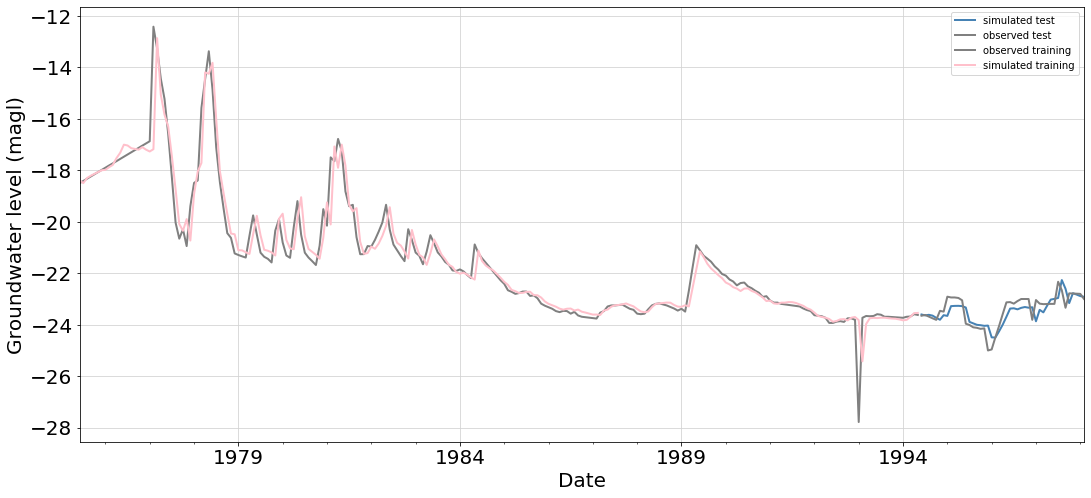

In [77]:
mse_lstm  = summary['mse_lstm'].mean(axis=0)
rmse_lstm = summary['rmse_lstm'].mean(axis=0)
mae_lstm  = summary['mae_lstm'].mean(axis=0)
r2_lstm   = summary['r2_lstm'].mean(axis=0)
stdv_lstm = stdv.mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_lstm, 3))
print("Mean squared error is:",round(mse_lstm,3))
print("Root mean squared error is:",round(rmse_lstm, 3))
print("Mean absolute error is:",round(mae_lstm,3))
print(round(stdv_lstm,3))



df1 = pd.DataFrame(test_inverse_trans[6].values, columns  = ['simulated test'],index  =pima.iloc[228:273].index)
df1['observed test']      = pima.iloc[228:273, 0].values

df2 = pd.DataFrame(pima.iloc[0:228, 0].values, columns = ['observed training'],index =pima.iloc[0:228].index)
df2['simulated training'] = train_inverse_trans[6].values

out_df = df2.append(df1, sort=True)

#plot
out_df['simulated test'].plot(color='steelblue', linewidth=2)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=2)
out_df['observed training'].plot(color='grey', linewidth=2)
out_df['simulated training'].plot(color='pink', linewidth=2)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(18,8)

In [78]:
y_lstm = out_df['simulated test']

### GRU

In [79]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import GRU
from tensorflow.keras.optimizers import Adam

In [80]:
from sklearn.metrics import *
import numpy as np
import csv  

# rounding off
Round = 3      

train_pred = []
test_pred  = []

fields = ['Iteration_No', 'mse_gru', 'rmse_gru', 'r2_gru','mae_gru'] 
csvfile = open('Summary.csv', 'w') 
csvwriter = csv.writer(csvfile)  
csvwriter.writerow(fields) 

for fold in range(1,11):
    print(f'Running fold {fold}')
    print(X_train.shape)


    check = ModelCheckpoint('model.h5', verbose=1, save_best_only=True)

    early = EarlyStopping(patience=100)

    optimizer = Adam(lr=0.00001)
    model = Sequential()
    model.add(GRU(20, input_shape=(1, 6)))
    model.add(Dropout(0.1))

    model.add(Dense(1))

    model.compile(loss='mse', optimizer='rmsprop', metrics=['mse'])

    X_t_reshaped   = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_val_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

    history = model.fit(X_t_reshaped, 
                    y_train, 
                    validation_data=(X_val_reshaped, y_test),
                    epochs=1000, 
                    batch_size=96, 
                    verbose=1, callbacks=[check, early])
    X_val_reshaped = X_val_reshaped.reshape(45, 6)

    #running function
    gwl = -0.81759381
    test_forecast = X_test
    steps_ahead = 45
    y_gru = forecast(model, test_forecast, gwl, steps_ahead)
    y_gru = np.array(y_gru)
    
    #metrics for test
    y_gru = y_gru
    test_pred.append(y_gru)
    mse_gru = mean_squared_error(y_test, y_gru)
    rmse_gru = np.sqrt(mse_gru)
    r2_gru = r2_score(y_test, y_gru)
    mae_gru = mean_absolute_error(y_test, y_gru)

    #metrics train 
    train     = model.predict(X_t_reshaped)
    train_pred.append(train)
    msetrain  = mean_squared_error(y_train, train)
    rmsetrain = np.sqrt(msetrain)
    mae_train = mean_absolute_error(y_train, train)
    r2train   = r2_score(y_train, train)
    
    csvwriter.writerow([f'Iteration_{fold}',round(mse_gru,Round), round(rmse_gru,Round), round(r2_gru,Round),round(mae_gru,Round)]) 

csvfile.close()
summary= pd.read_csv('Summary.csv')
    

Running fold 1
(228, 6)
Train on 228 samples, validate on 45 samples
Epoch 1/1000
 96/228 [===========>..................] - ETA: 3s - loss: 1.1599 - mean_squared_error: 1.1599
Epoch 00001: val_loss improved from inf to 0.59514, saving model to model.h5
228/228 [==============================] - 6s 24ms/sample - loss: 1.1266 - mean_squared_error: 1.1266 - val_loss: 0.5951 - val_mean_squared_error: 0.5951
Epoch 2/1000
 96/228 [===========>..................] - ETA: 0s - loss: 1.1918 - mean_squared_error: 1.1918
Epoch 00002: val_loss improved from 0.59514 to 0.53542, saving model to model.h5
228/228 [==============================] - 0s 398us/sample - loss: 0.9869 - mean_squared_error: 0.9869 - val_loss: 0.5354 - val_mean_squared_error: 0.5354
Epoch 3/1000
 96/228 [===========>..................] - ETA: 0s - loss: 1.0579 - mean_squared_error: 1.0579
Epoch 00003: val_loss improved from 0.53542 to 0.49013, saving model to model.h5
228/228 [==============================] - 0s 282us/sample 

Epoch 25/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.2500 - mean_squared_error: 0.2500
Epoch 00025: val_loss improved from 0.06501 to 0.06011, saving model to model.h5
228/228 [==============================] - 0s 206us/sample - loss: 0.1997 - mean_squared_error: 0.1997 - val_loss: 0.0601 - val_mean_squared_error: 0.0601
Epoch 26/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.2515 - mean_squared_error: 0.2515
Epoch 00026: val_loss improved from 0.06011 to 0.05558, saving model to model.h5
228/228 [==============================] - 0s 210us/sample - loss: 0.2044 - mean_squared_error: 0.2044 - val_loss: 0.0556 - val_mean_squared_error: 0.0556
Epoch 27/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1449 - mean_squared_error: 0.1449
Epoch 00027: val_loss improved from 0.05558 to 0.05214, saving model to model.h5
228/228 [==============================] - 0s 204us/sample - loss: 0.1780 - mean_squared_error: 0.1780 - val_loss: 0.052

Epoch 49/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0995 - mean_squared_error: 0.0995
Epoch 00049: val_loss improved from 0.03685 to 0.03639, saving model to model.h5
228/228 [==============================] - 0s 193us/sample - loss: 0.1278 - mean_squared_error: 0.1278 - val_loss: 0.0364 - val_mean_squared_error: 0.0364
Epoch 50/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0966 - mean_squared_error: 0.0966
Epoch 00050: val_loss improved from 0.03639 to 0.03618, saving model to model.h5
228/228 [==============================] - 0s 226us/sample - loss: 0.1413 - mean_squared_error: 0.1413 - val_loss: 0.0362 - val_mean_squared_error: 0.0362
Epoch 51/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1260 - mean_squared_error: 0.1260
Epoch 00051: val_loss improved from 0.03618 to 0.03587, saving model to model.h5
228/228 [==============================] - 0s 179us/sample - loss: 0.1453 - mean_squared_error: 0.1453 - val_loss: 0.035

Epoch 73/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1028 - mean_squared_error: 0.1028
Epoch 00073: val_loss improved from 0.03049 to 0.03047, saving model to model.h5
228/228 [==============================] - 0s 432us/sample - loss: 0.1177 - mean_squared_error: 0.1177 - val_loss: 0.0305 - val_mean_squared_error: 0.0305
Epoch 74/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0820 - mean_squared_error: 0.0820
Epoch 00074: val_loss improved from 0.03047 to 0.03022, saving model to model.h5
228/228 [==============================] - 0s 212us/sample - loss: 0.1196 - mean_squared_error: 0.1196 - val_loss: 0.0302 - val_mean_squared_error: 0.0302
Epoch 75/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1446 - mean_squared_error: 0.1446
Epoch 00075: val_loss improved from 0.03022 to 0.03003, saving model to model.h5
228/228 [==============================] - 0s 176us/sample - loss: 0.1182 - mean_squared_error: 0.1182 - val_loss: 0.030

 96/228 [===========>..................] - ETA: 0s - loss: 0.0601 - mean_squared_error: 0.0601
Epoch 00097: val_loss improved from 0.02698 to 0.02690, saving model to model.h5
228/228 [==============================] - 0s 253us/sample - loss: 0.1055 - mean_squared_error: 0.1055 - val_loss: 0.0269 - val_mean_squared_error: 0.0269
Epoch 98/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0727 - mean_squared_error: 0.0727
Epoch 00098: val_loss improved from 0.02690 to 0.02676, saving model to model.h5
228/228 [==============================] - 0s 174us/sample - loss: 0.1182 - mean_squared_error: 0.1182 - val_loss: 0.0268 - val_mean_squared_error: 0.0268
Epoch 99/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1300 - mean_squared_error: 0.1300
Epoch 00099: val_loss improved from 0.02676 to 0.02667, saving model to model.h5
228/228 [==============================] - 0s 163us/sample - loss: 0.0970 - mean_squared_error: 0.0970 - val_loss: 0.0267 - val_mean_s

Epoch 122/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0679 - mean_squared_error: 0.0679
Epoch 00122: val_loss improved from 0.02523 to 0.02502, saving model to model.h5
228/228 [==============================] - 0s 301us/sample - loss: 0.0960 - mean_squared_error: 0.0960 - val_loss: 0.0250 - val_mean_squared_error: 0.0250
Epoch 123/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1266 - mean_squared_error: 0.1266
Epoch 00123: val_loss did not improve from 0.02502
228/228 [==============================] - 0s 160us/sample - loss: 0.0963 - mean_squared_error: 0.0963 - val_loss: 0.0251 - val_mean_squared_error: 0.0251
Epoch 124/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0856 - mean_squared_error: 0.0856
Epoch 00124: val_loss did not improve from 0.02502
228/228 [==============================] - 0s 105us/sample - loss: 0.0855 - mean_squared_error: 0.0855 - val_loss: 0.0252 - val_mean_squared_error: 0.0252
Epoch 125/1000
 96/228

Epoch 148/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0557 - mean_squared_error: 0.0557
Epoch 00148: val_loss did not improve from 0.02454
228/228 [==============================] - 0s 121us/sample - loss: 0.0924 - mean_squared_error: 0.0924 - val_loss: 0.0252 - val_mean_squared_error: 0.0252
Epoch 149/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0682 - mean_squared_error: 0.0682
Epoch 00149: val_loss did not improve from 0.02454
228/228 [==============================] - 0s 94us/sample - loss: 0.0925 - mean_squared_error: 0.0925 - val_loss: 0.0259 - val_mean_squared_error: 0.0259
Epoch 150/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1504 - mean_squared_error: 0.1504
Epoch 00150: val_loss did not improve from 0.02454
228/228 [==============================] - 0s 100us/sample - loss: 0.0965 - mean_squared_error: 0.0965 - val_loss: 0.0247 - val_mean_squared_error: 0.0247
Epoch 151/1000
 96/228 [===========>.................

Epoch 174/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0968 - mean_squared_error: 0.0968
Epoch 00174: val_loss did not improve from 0.02363
228/228 [==============================] - 0s 105us/sample - loss: 0.0851 - mean_squared_error: 0.0851 - val_loss: 0.0238 - val_mean_squared_error: 0.0238
Epoch 175/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0714 - mean_squared_error: 0.0714
Epoch 00175: val_loss did not improve from 0.02363
228/228 [==============================] - 0s 107us/sample - loss: 0.0862 - mean_squared_error: 0.0862 - val_loss: 0.0243 - val_mean_squared_error: 0.0243
Epoch 176/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0518 - mean_squared_error: 0.0518
Epoch 00176: val_loss did not improve from 0.02363
228/228 [==============================] - 0s 97us/sample - loss: 0.0825 - mean_squared_error: 0.0825 - val_loss: 0.0245 - val_mean_squared_error: 0.0245
Epoch 177/1000
 96/228 [===========>.................

Epoch 200/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0952 - mean_squared_error: 0.0952
Epoch 00200: val_loss did not improve from 0.02308
228/228 [==============================] - 0s 107us/sample - loss: 0.0980 - mean_squared_error: 0.0980 - val_loss: 0.0233 - val_mean_squared_error: 0.0233
Epoch 201/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0899 - mean_squared_error: 0.0899
Epoch 00201: val_loss did not improve from 0.02308
228/228 [==============================] - 0s 146us/sample - loss: 0.0890 - mean_squared_error: 0.0890 - val_loss: 0.0232 - val_mean_squared_error: 0.0232
Epoch 202/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0575 - mean_squared_error: 0.0575
Epoch 00202: val_loss did not improve from 0.02308
228/228 [==============================] - 0s 97us/sample - loss: 0.1008 - mean_squared_error: 0.1008 - val_loss: 0.0239 - val_mean_squared_error: 0.0239
Epoch 203/1000
 96/228 [===========>.................

Epoch 226/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0565 - mean_squared_error: 0.0565
Epoch 00226: val_loss did not improve from 0.02308
228/228 [==============================] - 0s 101us/sample - loss: 0.0907 - mean_squared_error: 0.0907 - val_loss: 0.0249 - val_mean_squared_error: 0.0249
Epoch 227/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0817 - mean_squared_error: 0.0817
Epoch 00227: val_loss did not improve from 0.02308
228/228 [==============================] - 0s 219us/sample - loss: 0.0924 - mean_squared_error: 0.0924 - val_loss: 0.0244 - val_mean_squared_error: 0.0244
Epoch 228/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0863 - mean_squared_error: 0.0863
Epoch 00228: val_loss did not improve from 0.02308
228/228 [==============================] - 0s 171us/sample - loss: 0.0797 - mean_squared_error: 0.0797 - val_loss: 0.0241 - val_mean_squared_error: 0.0241
Epoch 229/1000
 96/228 [===========>................

Epoch 252/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0751 - mean_squared_error: 0.0751
Epoch 00252: val_loss did not improve from 0.02308
228/228 [==============================] - 0s 119us/sample - loss: 0.0814 - mean_squared_error: 0.0814 - val_loss: 0.0240 - val_mean_squared_error: 0.0240
Epoch 253/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0714 - mean_squared_error: 0.0714
Epoch 00253: val_loss did not improve from 0.02308
228/228 [==============================] - 0s 118us/sample - loss: 0.0790 - mean_squared_error: 0.0790 - val_loss: 0.0246 - val_mean_squared_error: 0.0246
Epoch 254/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0760 - mean_squared_error: 0.0760
Epoch 00254: val_loss did not improve from 0.02308
228/228 [==============================] - 0s 240us/sample - loss: 0.0775 - mean_squared_error: 0.0775 - val_loss: 0.0238 - val_mean_squared_error: 0.0238
Epoch 255/1000
 96/228 [===========>................

Epoch 278/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0799 - mean_squared_error: 0.0799
Epoch 00278: val_loss did not improve from 0.02308
228/228 [==============================] - 0s 109us/sample - loss: 0.0938 - mean_squared_error: 0.0938 - val_loss: 0.0247 - val_mean_squared_error: 0.0247
Epoch 279/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0927 - mean_squared_error: 0.0927
Epoch 00279: val_loss did not improve from 0.02308
228/228 [==============================] - 0s 113us/sample - loss: 0.0852 - mean_squared_error: 0.0852 - val_loss: 0.0244 - val_mean_squared_error: 0.0244
Epoch 280/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0913 - mean_squared_error: 0.0913
Epoch 00280: val_loss did not improve from 0.02308
228/228 [==============================] - 0s 104us/sample - loss: 0.0870 - mean_squared_error: 0.0870 - val_loss: 0.0234 - val_mean_squared_error: 0.0234
Epoch 281/1000
 96/228 [===========>................

 96/228 [===========>..................] - ETA: 0s - loss: 0.4291 - mean_squared_error: 0.4291
Epoch 00006: val_loss improved from 0.26371 to 0.23885, saving model to model.h5
228/228 [==============================] - 0s 184us/sample - loss: 0.4476 - mean_squared_error: 0.4476 - val_loss: 0.2388 - val_mean_squared_error: 0.2388
Epoch 7/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.3373 - mean_squared_error: 0.3373
Epoch 00007: val_loss improved from 0.23885 to 0.21598, saving model to model.h5
228/228 [==============================] - 0s 177us/sample - loss: 0.4325 - mean_squared_error: 0.4325 - val_loss: 0.2160 - val_mean_squared_error: 0.2160
Epoch 8/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.5312 - mean_squared_error: 0.5312
Epoch 00008: val_loss improved from 0.21598 to 0.19401, saving model to model.h5
228/228 [==============================] - 0s 174us/sample - loss: 0.4061 - mean_squared_error: 0.4061 - val_loss: 0.1940 - val_mean_squ

Epoch 30/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1771 - mean_squared_error: 0.1771
Epoch 00030: val_loss improved from 0.04329 to 0.04273, saving model to model.h5
228/228 [==============================] - 0s 180us/sample - loss: 0.1497 - mean_squared_error: 0.1497 - val_loss: 0.0427 - val_mean_squared_error: 0.0427
Epoch 31/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1965 - mean_squared_error: 0.1965
Epoch 00031: val_loss did not improve from 0.04273
228/228 [==============================] - 0s 96us/sample - loss: 0.1499 - mean_squared_error: 0.1499 - val_loss: 0.0430 - val_mean_squared_error: 0.0430
Epoch 32/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1678 - mean_squared_error: 0.1678
Epoch 00032: val_loss improved from 0.04273 to 0.04223, saving model to model.h5
228/228 [==============================] - 0s 194us/sample - loss: 0.1479 - mean_squared_error: 0.1479 - val_loss: 0.0422 - val_mean_squared_error: 0.0

Epoch 55/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1755 - mean_squared_error: 0.1755
Epoch 00055: val_loss did not improve from 0.03457
228/228 [==============================] - 0s 107us/sample - loss: 0.1389 - mean_squared_error: 0.1389 - val_loss: 0.0357 - val_mean_squared_error: 0.0357
Epoch 56/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1006 - mean_squared_error: 0.1006
Epoch 00056: val_loss improved from 0.03457 to 0.03372, saving model to model.h5
228/228 [==============================] - 0s 178us/sample - loss: 0.1345 - mean_squared_error: 0.1345 - val_loss: 0.0337 - val_mean_squared_error: 0.0337
Epoch 57/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1387 - mean_squared_error: 0.1387
Epoch 00057: val_loss improved from 0.03372 to 0.03258, saving model to model.h5
228/228 [==============================] - 0s 169us/sample - loss: 0.1520 - mean_squared_error: 0.1520 - val_loss: 0.0326 - val_mean_squared_error: 0.

Epoch 80/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0892 - mean_squared_error: 0.0892
Epoch 00080: val_loss did not improve from 0.02919
228/228 [==============================] - 0s 107us/sample - loss: 0.1152 - mean_squared_error: 0.1152 - val_loss: 0.0297 - val_mean_squared_error: 0.0297
Epoch 81/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1199 - mean_squared_error: 0.1199
Epoch 00081: val_loss improved from 0.02919 to 0.02905, saving model to model.h5
228/228 [==============================] - 0s 165us/sample - loss: 0.1206 - mean_squared_error: 0.1206 - val_loss: 0.0291 - val_mean_squared_error: 0.0291
Epoch 82/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1551 - mean_squared_error: 0.1551
Epoch 00082: val_loss improved from 0.02905 to 0.02852, saving model to model.h5
228/228 [==============================] - 0s 200us/sample - loss: 0.1329 - mean_squared_error: 0.1329 - val_loss: 0.0285 - val_mean_squared_error: 0.

Epoch 105/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1433 - mean_squared_error: 0.1433
Epoch 00105: val_loss did not improve from 0.02626
228/228 [==============================] - 0s 140us/sample - loss: 0.1052 - mean_squared_error: 0.1052 - val_loss: 0.0267 - val_mean_squared_error: 0.0267
Epoch 106/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1737 - mean_squared_error: 0.1737
Epoch 00106: val_loss did not improve from 0.02626
228/228 [==============================] - 0s 159us/sample - loss: 0.1061 - mean_squared_error: 0.1061 - val_loss: 0.0265 - val_mean_squared_error: 0.0265
Epoch 107/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1159 - mean_squared_error: 0.1159
Epoch 00107: val_loss improved from 0.02626 to 0.02607, saving model to model.h5
228/228 [==============================] - 0s 166us/sample - loss: 0.1015 - mean_squared_error: 0.1015 - val_loss: 0.0261 - val_mean_squared_error: 0.0261
Epoch 108/1000
 96/228

Epoch 130/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1148 - mean_squared_error: 0.1148
Epoch 00130: val_loss did not improve from 0.02491
228/228 [==============================] - 0s 99us/sample - loss: 0.1095 - mean_squared_error: 0.1095 - val_loss: 0.0252 - val_mean_squared_error: 0.0252
Epoch 131/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1634 - mean_squared_error: 0.1634
Epoch 00131: val_loss improved from 0.02491 to 0.02482, saving model to model.h5
228/228 [==============================] - 0s 188us/sample - loss: 0.1031 - mean_squared_error: 0.1031 - val_loss: 0.0248 - val_mean_squared_error: 0.0248
Epoch 132/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0709 - mean_squared_error: 0.0709
Epoch 00132: val_loss did not improve from 0.02482
228/228 [==============================] - 0s 101us/sample - loss: 0.0976 - mean_squared_error: 0.0976 - val_loss: 0.0249 - val_mean_squared_error: 0.0249
Epoch 133/1000
 96/228 

228/228 [==============================] - 0s 184us/sample - loss: 0.1073 - mean_squared_error: 0.1073 - val_loss: 0.0240 - val_mean_squared_error: 0.0240
Epoch 155/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0961 - mean_squared_error: 0.0961
Epoch 00155: val_loss did not improve from 0.02404
228/228 [==============================] - 0s 105us/sample - loss: 0.0940 - mean_squared_error: 0.0940 - val_loss: 0.0242 - val_mean_squared_error: 0.0242
Epoch 156/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1428 - mean_squared_error: 0.1428
Epoch 00156: val_loss did not improve from 0.02404
228/228 [==============================] - 0s 98us/sample - loss: 0.0950 - mean_squared_error: 0.0950 - val_loss: 0.0242 - val_mean_squared_error: 0.0242
Epoch 157/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1067 - mean_squared_error: 0.1067
Epoch 00157: val_loss improved from 0.02404 to 0.02401, saving model to model.h5
228/228 [==============

Epoch 180/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0861 - mean_squared_error: 0.0861
Epoch 00180: val_loss did not improve from 0.02352
228/228 [==============================] - 0s 122us/sample - loss: 0.0859 - mean_squared_error: 0.0859 - val_loss: 0.0235 - val_mean_squared_error: 0.0235
Epoch 181/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1140 - mean_squared_error: 0.1140
Epoch 00181: val_loss did not improve from 0.02352
228/228 [==============================] - 0s 109us/sample - loss: 0.0949 - mean_squared_error: 0.0949 - val_loss: 0.0236 - val_mean_squared_error: 0.0236
Epoch 182/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1123 - mean_squared_error: 0.1123
Epoch 00182: val_loss improved from 0.02352 to 0.02350, saving model to model.h5
228/228 [==============================] - 0s 168us/sample - loss: 0.1033 - mean_squared_error: 0.1033 - val_loss: 0.0235 - val_mean_squared_error: 0.0235
Epoch 183/1000
 96/228

 96/228 [===========>..................] - ETA: 0s - loss: 0.0575 - mean_squared_error: 0.0575
Epoch 00205: val_loss improved from 0.02323 to 0.02322, saving model to model.h5
228/228 [==============================] - 0s 185us/sample - loss: 0.0878 - mean_squared_error: 0.0878 - val_loss: 0.0232 - val_mean_squared_error: 0.0232
Epoch 206/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0539 - mean_squared_error: 0.0539
Epoch 00206: val_loss did not improve from 0.02322
228/228 [==============================] - 0s 105us/sample - loss: 0.0865 - mean_squared_error: 0.0865 - val_loss: 0.0238 - val_mean_squared_error: 0.0238
Epoch 207/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1083 - mean_squared_error: 0.1083
Epoch 00207: val_loss did not improve from 0.02322
228/228 [==============================] - 0s 100us/sample - loss: 0.0882 - mean_squared_error: 0.0882 - val_loss: 0.0234 - val_mean_squared_error: 0.0234
Epoch 208/1000
 96/228 [===========>.

Epoch 231/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1121 - mean_squared_error: 0.1121
Epoch 00231: val_loss did not improve from 0.02322
228/228 [==============================] - 0s 115us/sample - loss: 0.0930 - mean_squared_error: 0.0930 - val_loss: 0.0236 - val_mean_squared_error: 0.0236
Epoch 232/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0478 - mean_squared_error: 0.0478
Epoch 00232: val_loss did not improve from 0.02322
228/228 [==============================] - 0s 94us/sample - loss: 0.0863 - mean_squared_error: 0.0863 - val_loss: 0.0235 - val_mean_squared_error: 0.0235
Epoch 233/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1705 - mean_squared_error: 0.1705
Epoch 00233: val_loss did not improve from 0.02322
228/228 [==============================] - 0s 93us/sample - loss: 0.0879 - mean_squared_error: 0.0879 - val_loss: 0.0234 - val_mean_squared_error: 0.0234
Epoch 234/1000
 96/228 [===========>..................

Epoch 257/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0497 - mean_squared_error: 0.0497
Epoch 00257: val_loss did not improve from 0.02319
228/228 [==============================] - 0s 107us/sample - loss: 0.0898 - mean_squared_error: 0.0898 - val_loss: 0.0236 - val_mean_squared_error: 0.0236
Epoch 258/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1248 - mean_squared_error: 0.1248
Epoch 00258: val_loss did not improve from 0.02319
228/228 [==============================] - 0s 113us/sample - loss: 0.0850 - mean_squared_error: 0.0850 - val_loss: 0.0232 - val_mean_squared_error: 0.0232
Epoch 259/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0922 - mean_squared_error: 0.0922
Epoch 00259: val_loss did not improve from 0.02319
228/228 [==============================] - 0s 120us/sample - loss: 0.0821 - mean_squared_error: 0.0821 - val_loss: 0.0232 - val_mean_squared_error: 0.0232
Epoch 260/1000
 96/228 [===========>................

Epoch 283/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0718 - mean_squared_error: 0.0718
Epoch 00283: val_loss did not improve from 0.02309
228/228 [==============================] - 0s 140us/sample - loss: 0.0913 - mean_squared_error: 0.0913 - val_loss: 0.0232 - val_mean_squared_error: 0.0232
Epoch 284/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1263 - mean_squared_error: 0.1263
Epoch 00284: val_loss did not improve from 0.02309
228/228 [==============================] - 0s 127us/sample - loss: 0.0869 - mean_squared_error: 0.0869 - val_loss: 0.0233 - val_mean_squared_error: 0.0233
Epoch 285/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1028 - mean_squared_error: 0.1028
Epoch 00285: val_loss did not improve from 0.02309
228/228 [==============================] - 0s 99us/sample - loss: 0.0846 - mean_squared_error: 0.0846 - val_loss: 0.0233 - val_mean_squared_error: 0.0233
Epoch 286/1000
 96/228 [===========>.................

Epoch 309/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0785 - mean_squared_error: 0.0785
Epoch 00309: val_loss did not improve from 0.02305
228/228 [==============================] - 0s 122us/sample - loss: 0.0893 - mean_squared_error: 0.0893 - val_loss: 0.0231 - val_mean_squared_error: 0.0231
Epoch 310/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0678 - mean_squared_error: 0.0678
Epoch 00310: val_loss did not improve from 0.02305
228/228 [==============================] - 0s 102us/sample - loss: 0.0871 - mean_squared_error: 0.0871 - val_loss: 0.0232 - val_mean_squared_error: 0.0232
Epoch 311/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0435 - mean_squared_error: 0.0435
Epoch 00311: val_loss did not improve from 0.02305
228/228 [==============================] - 0s 100us/sample - loss: 0.0904 - mean_squared_error: 0.0904 - val_loss: 0.0241 - val_mean_squared_error: 0.0241
Epoch 312/1000
 96/228 [===========>................

Epoch 335/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0284 - mean_squared_error: 0.0284
Epoch 00335: val_loss did not improve from 0.02305
228/228 [==============================] - 0s 98us/sample - loss: 0.0820 - mean_squared_error: 0.0820 - val_loss: 0.0236 - val_mean_squared_error: 0.0236
Epoch 336/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0817 - mean_squared_error: 0.0817
Epoch 00336: val_loss did not improve from 0.02305
228/228 [==============================] - 0s 108us/sample - loss: 0.0876 - mean_squared_error: 0.0876 - val_loss: 0.0235 - val_mean_squared_error: 0.0235
Epoch 337/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0623 - mean_squared_error: 0.0623
Epoch 00337: val_loss did not improve from 0.02305
228/228 [==============================] - 0s 106us/sample - loss: 0.0822 - mean_squared_error: 0.0822 - val_loss: 0.0234 - val_mean_squared_error: 0.0234
Epoch 338/1000
 96/228 [===========>.................

Epoch 361/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1176 - mean_squared_error: 0.1176
Epoch 00361: val_loss did not improve from 0.02305
228/228 [==============================] - 0s 100us/sample - loss: 0.0760 - mean_squared_error: 0.0760 - val_loss: 0.0235 - val_mean_squared_error: 0.0235
Epoch 362/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0597 - mean_squared_error: 0.0597
Epoch 00362: val_loss did not improve from 0.02305
228/228 [==============================] - 0s 103us/sample - loss: 0.0829 - mean_squared_error: 0.0829 - val_loss: 0.0234 - val_mean_squared_error: 0.0234
Epoch 363/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0545 - mean_squared_error: 0.0545
Epoch 00363: val_loss did not improve from 0.02305
228/228 [==============================] - 0s 95us/sample - loss: 0.0798 - mean_squared_error: 0.0798 - val_loss: 0.0235 - val_mean_squared_error: 0.0235
Epoch 364/1000
 96/228 [===========>.................

Epoch 387/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0537 - mean_squared_error: 0.0537
Epoch 00387: val_loss did not improve from 0.02305
228/228 [==============================] - 0s 104us/sample - loss: 0.0915 - mean_squared_error: 0.0915 - val_loss: 0.0235 - val_mean_squared_error: 0.0235
Epoch 388/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1063 - mean_squared_error: 0.1063
Epoch 00388: val_loss did not improve from 0.02305
228/228 [==============================] - 0s 104us/sample - loss: 0.0896 - mean_squared_error: 0.0896 - val_loss: 0.0235 - val_mean_squared_error: 0.0235
Epoch 389/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0839 - mean_squared_error: 0.0839
Epoch 00389: val_loss did not improve from 0.02305
228/228 [==============================] - 0s 101us/sample - loss: 0.0795 - mean_squared_error: 0.0795 - val_loss: 0.0234 - val_mean_squared_error: 0.0234
Epoch 390/1000
 96/228 [===========>................

Epoch 14/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.4435 - mean_squared_error: 0.4435
Epoch 00014: val_loss improved from 0.12891 to 0.11254, saving model to model.h5
228/228 [==============================] - 0s 189us/sample - loss: 0.4192 - mean_squared_error: 0.4192 - val_loss: 0.1125 - val_mean_squared_error: 0.1125
Epoch 15/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.4517 - mean_squared_error: 0.4517
Epoch 00015: val_loss improved from 0.11254 to 0.09983, saving model to model.h5
228/228 [==============================] - 0s 207us/sample - loss: 0.3677 - mean_squared_error: 0.3677 - val_loss: 0.0998 - val_mean_squared_error: 0.0998
Epoch 16/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.3415 - mean_squared_error: 0.3415
Epoch 00016: val_loss improved from 0.09983 to 0.08812, saving model to model.h5
228/228 [==============================] - 0s 212us/sample - loss: 0.3446 - mean_squared_error: 0.3446 - val_loss: 0.088

Epoch 39/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.2199 - mean_squared_error: 0.2199
Epoch 00039: val_loss did not improve from 0.04178
228/228 [==============================] - 0s 132us/sample - loss: 0.1629 - mean_squared_error: 0.1629 - val_loss: 0.0420 - val_mean_squared_error: 0.0420
Epoch 40/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1173 - mean_squared_error: 0.1173
Epoch 00040: val_loss improved from 0.04178 to 0.04093, saving model to model.h5
228/228 [==============================] - 0s 223us/sample - loss: 0.1525 - mean_squared_error: 0.1525 - val_loss: 0.0409 - val_mean_squared_error: 0.0409
Epoch 41/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1453 - mean_squared_error: 0.1453
Epoch 00041: val_loss did not improve from 0.04093
228/228 [==============================] - 0s 133us/sample - loss: 0.1571 - mean_squared_error: 0.1571 - val_loss: 0.0414 - val_mean_squared_error: 0.0414
Epoch 42/1000
 96/228 [==

 96/228 [===========>..................] - ETA: 0s - loss: 0.1052 - mean_squared_error: 0.1052
Epoch 00063: val_loss improved from 0.03277 to 0.03243, saving model to model.h5
228/228 [==============================] - 0s 384us/sample - loss: 0.1254 - mean_squared_error: 0.1254 - val_loss: 0.0324 - val_mean_squared_error: 0.0324
Epoch 64/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1381 - mean_squared_error: 0.1381
Epoch 00064: val_loss improved from 0.03243 to 0.03187, saving model to model.h5
228/228 [==============================] - 0s 241us/sample - loss: 0.1395 - mean_squared_error: 0.1395 - val_loss: 0.0319 - val_mean_squared_error: 0.0319
Epoch 65/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0916 - mean_squared_error: 0.0916
Epoch 00065: val_loss improved from 0.03187 to 0.03165, saving model to model.h5
228/228 [==============================] - 0s 164us/sample - loss: 0.1331 - mean_squared_error: 0.1331 - val_loss: 0.0316 - val_mean_s

Epoch 87/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1791 - mean_squared_error: 0.1791
Epoch 00087: val_loss improved from 0.02760 to 0.02752, saving model to model.h5
228/228 [==============================] - 0s 182us/sample - loss: 0.1144 - mean_squared_error: 0.1144 - val_loss: 0.0275 - val_mean_squared_error: 0.0275
Epoch 88/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1541 - mean_squared_error: 0.1541
Epoch 00088: val_loss improved from 0.02752 to 0.02738, saving model to model.h5
228/228 [==============================] - 0s 223us/sample - loss: 0.1065 - mean_squared_error: 0.1065 - val_loss: 0.0274 - val_mean_squared_error: 0.0274
Epoch 89/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0506 - mean_squared_error: 0.0506
Epoch 00089: val_loss improved from 0.02738 to 0.02726, saving model to model.h5
228/228 [==============================] - 0s 170us/sample - loss: 0.1077 - mean_squared_error: 0.1077 - val_loss: 0.027

 96/228 [===========>..................] - ETA: 0s - loss: 0.0749 - mean_squared_error: 0.0749
Epoch 00111: val_loss improved from 0.02522 to 0.02503, saving model to model.h5
228/228 [==============================] - 0s 178us/sample - loss: 0.0926 - mean_squared_error: 0.0926 - val_loss: 0.0250 - val_mean_squared_error: 0.0250
Epoch 112/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1321 - mean_squared_error: 0.1321
Epoch 00112: val_loss did not improve from 0.02503
228/228 [==============================] - 0s 111us/sample - loss: 0.1027 - mean_squared_error: 0.1027 - val_loss: 0.0251 - val_mean_squared_error: 0.0251
Epoch 113/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1619 - mean_squared_error: 0.1619
Epoch 00113: val_loss did not improve from 0.02503
228/228 [==============================] - 0s 106us/sample - loss: 0.1092 - mean_squared_error: 0.1092 - val_loss: 0.0251 - val_mean_squared_error: 0.0251
Epoch 114/1000
 96/228 [===========>.

Epoch 136/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0778 - mean_squared_error: 0.0778
Epoch 00136: val_loss improved from 0.02413 to 0.02411, saving model to model.h5
228/228 [==============================] - 0s 259us/sample - loss: 0.0884 - mean_squared_error: 0.0884 - val_loss: 0.0241 - val_mean_squared_error: 0.0241
Epoch 137/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0608 - mean_squared_error: 0.0608
Epoch 00137: val_loss did not improve from 0.02411
228/228 [==============================] - 0s 120us/sample - loss: 0.1043 - mean_squared_error: 0.1043 - val_loss: 0.0243 - val_mean_squared_error: 0.0243
Epoch 138/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0980 - mean_squared_error: 0.0980
Epoch 00138: val_loss improved from 0.02411 to 0.02396, saving model to model.h5
228/228 [==============================] - 0s 195us/sample - loss: 0.0990 - mean_squared_error: 0.0990 - val_loss: 0.0240 - val_mean_squared_error:

Epoch 161/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1080 - mean_squared_error: 0.1080
Epoch 00161: val_loss improved from 0.02358 to 0.02352, saving model to model.h5
228/228 [==============================] - 0s 195us/sample - loss: 0.0904 - mean_squared_error: 0.0904 - val_loss: 0.0235 - val_mean_squared_error: 0.0235
Epoch 162/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0497 - mean_squared_error: 0.0497
Epoch 00162: val_loss did not improve from 0.02352
228/228 [==============================] - 0s 108us/sample - loss: 0.0947 - mean_squared_error: 0.0947 - val_loss: 0.0236 - val_mean_squared_error: 0.0236
Epoch 163/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0769 - mean_squared_error: 0.0769
Epoch 00163: val_loss did not improve from 0.02352
228/228 [==============================] - 0s 138us/sample - loss: 0.0845 - mean_squared_error: 0.0845 - val_loss: 0.0235 - val_mean_squared_error: 0.0235
Epoch 164/1000
 96/228

Epoch 187/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0938 - mean_squared_error: 0.0938
Epoch 00187: val_loss did not improve from 0.02346
228/228 [==============================] - 0s 90us/sample - loss: 0.0921 - mean_squared_error: 0.0921 - val_loss: 0.0240 - val_mean_squared_error: 0.0240
Epoch 188/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0797 - mean_squared_error: 0.0797
Epoch 00188: val_loss did not improve from 0.02346
228/228 [==============================] - 0s 83us/sample - loss: 0.0948 - mean_squared_error: 0.0948 - val_loss: 0.0237 - val_mean_squared_error: 0.0237
Epoch 189/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0597 - mean_squared_error: 0.0597
Epoch 00189: val_loss did not improve from 0.02346
228/228 [==============================] - 0s 86us/sample - loss: 0.0907 - mean_squared_error: 0.0907 - val_loss: 0.0235 - val_mean_squared_error: 0.0235
Epoch 190/1000
 96/228 [===========>..................]

Epoch 213/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0947 - mean_squared_error: 0.0947
Epoch 00213: val_loss did not improve from 0.02341
228/228 [==============================] - 0s 88us/sample - loss: 0.0847 - mean_squared_error: 0.0847 - val_loss: 0.0235 - val_mean_squared_error: 0.0235
Epoch 214/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0352 - mean_squared_error: 0.0352
Epoch 00214: val_loss did not improve from 0.02341
228/228 [==============================] - 0s 82us/sample - loss: 0.0856 - mean_squared_error: 0.0856 - val_loss: 0.0235 - val_mean_squared_error: 0.0235
Epoch 215/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0855 - mean_squared_error: 0.0855
Epoch 00215: val_loss did not improve from 0.02341
228/228 [==============================] - 0s 84us/sample - loss: 0.0846 - mean_squared_error: 0.0846 - val_loss: 0.0235 - val_mean_squared_error: 0.0235
Epoch 216/1000
 96/228 [===========>..................]

Epoch 239/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0895 - mean_squared_error: 0.0895
Epoch 00239: val_loss did not improve from 0.02328
228/228 [==============================] - 0s 93us/sample - loss: 0.0797 - mean_squared_error: 0.0797 - val_loss: 0.0237 - val_mean_squared_error: 0.0237
Epoch 240/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0850 - mean_squared_error: 0.0850
Epoch 00240: val_loss did not improve from 0.02328
228/228 [==============================] - 0s 114us/sample - loss: 0.0834 - mean_squared_error: 0.0834 - val_loss: 0.0234 - val_mean_squared_error: 0.0234
Epoch 241/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0910 - mean_squared_error: 0.0910
Epoch 00241: val_loss did not improve from 0.02328
228/228 [==============================] - 0s 83us/sample - loss: 0.0746 - mean_squared_error: 0.0746 - val_loss: 0.0234 - val_mean_squared_error: 0.0234
Epoch 242/1000
 96/228 [===========>..................

Epoch 265/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0732 - mean_squared_error: 0.0732
Epoch 00265: val_loss did not improve from 0.02328
228/228 [==============================] - 0s 94us/sample - loss: 0.1002 - mean_squared_error: 0.1002 - val_loss: 0.0237 - val_mean_squared_error: 0.0237
Epoch 266/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1355 - mean_squared_error: 0.1355
Epoch 00266: val_loss did not improve from 0.02328
228/228 [==============================] - 0s 91us/sample - loss: 0.0912 - mean_squared_error: 0.0912 - val_loss: 0.0239 - val_mean_squared_error: 0.0239
Epoch 267/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1512 - mean_squared_error: 0.1512
Epoch 00267: val_loss did not improve from 0.02328
228/228 [==============================] - 0s 90us/sample - loss: 0.0838 - mean_squared_error: 0.0838 - val_loss: 0.0241 - val_mean_squared_error: 0.0241
Epoch 268/1000
 96/228 [===========>..................]

Epoch 291/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0794 - mean_squared_error: 0.0794
Epoch 00291: val_loss did not improve from 0.02328
228/228 [==============================] - 0s 90us/sample - loss: 0.0903 - mean_squared_error: 0.0903 - val_loss: 0.0236 - val_mean_squared_error: 0.0236
Epoch 292/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0655 - mean_squared_error: 0.0655
Epoch 00292: val_loss did not improve from 0.02328
228/228 [==============================] - 0s 88us/sample - loss: 0.0820 - mean_squared_error: 0.0820 - val_loss: 0.0237 - val_mean_squared_error: 0.0237
Epoch 293/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1170 - mean_squared_error: 0.1170
Epoch 00293: val_loss did not improve from 0.02328
228/228 [==============================] - 0s 95us/sample - loss: 0.0785 - mean_squared_error: 0.0785 - val_loss: 0.0235 - val_mean_squared_error: 0.0235
Epoch 294/1000
 96/228 [===========>..................]

Epoch 317/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1082 - mean_squared_error: 0.1082
Epoch 00317: val_loss did not improve from 0.02328
228/228 [==============================] - 0s 91us/sample - loss: 0.0771 - mean_squared_error: 0.0771 - val_loss: 0.0238 - val_mean_squared_error: 0.0238
Epoch 318/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0802 - mean_squared_error: 0.0802
Epoch 00318: val_loss did not improve from 0.02328
228/228 [==============================] - 0s 131us/sample - loss: 0.0819 - mean_squared_error: 0.0819 - val_loss: 0.0238 - val_mean_squared_error: 0.0238
Epoch 319/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0501 - mean_squared_error: 0.0501
Epoch 00319: val_loss did not improve from 0.02328
228/228 [==============================] - 0s 94us/sample - loss: 0.0802 - mean_squared_error: 0.0802 - val_loss: 0.0237 - val_mean_squared_error: 0.0237
Epoch 320/1000
 96/228 [===========>..................

228/228 [==============================] - 0s 203us/sample - loss: 0.5356 - mean_squared_error: 0.5356 - val_loss: 0.1737 - val_mean_squared_error: 0.1737
Epoch 15/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.6568 - mean_squared_error: 0.6568
Epoch 00015: val_loss improved from 0.17367 to 0.15296, saving model to model.h5
228/228 [==============================] - 0s 169us/sample - loss: 0.4874 - mean_squared_error: 0.4874 - val_loss: 0.1530 - val_mean_squared_error: 0.1530
Epoch 16/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.5322 - mean_squared_error: 0.5322
Epoch 00016: val_loss improved from 0.15296 to 0.13444, saving model to model.h5
228/228 [==============================] - 0s 155us/sample - loss: 0.4253 - mean_squared_error: 0.4253 - val_loss: 0.1344 - val_mean_squared_error: 0.1344
Epoch 17/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.2936 - mean_squared_error: 0.2936
Epoch 00017: val_loss improved from 0.13444 to

 96/228 [===========>..................] - ETA: 0s - loss: 0.1049 - mean_squared_error: 0.1049
Epoch 00039: val_loss did not improve from 0.04274
228/228 [==============================] - 0s 88us/sample - loss: 0.1419 - mean_squared_error: 0.1419 - val_loss: 0.0491 - val_mean_squared_error: 0.0491
Epoch 40/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1349 - mean_squared_error: 0.1349
Epoch 00040: val_loss did not improve from 0.04274
228/228 [==============================] - 0s 90us/sample - loss: 0.1409 - mean_squared_error: 0.1409 - val_loss: 0.0463 - val_mean_squared_error: 0.0463
Epoch 41/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1252 - mean_squared_error: 0.1252
Epoch 00041: val_loss did not improve from 0.04274
228/228 [==============================] - 0s 115us/sample - loss: 0.1431 - mean_squared_error: 0.1431 - val_loss: 0.0440 - val_mean_squared_error: 0.0440
Epoch 42/1000
 96/228 [===========>..................] - ETA: 0s - loss

 96/228 [===========>..................] - ETA: 0s - loss: 0.1157 - mean_squared_error: 0.1157
Epoch 00064: val_loss did not improve from 0.03208
228/228 [==============================] - 0s 108us/sample - loss: 0.1146 - mean_squared_error: 0.1146 - val_loss: 0.0327 - val_mean_squared_error: 0.0327
Epoch 65/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1342 - mean_squared_error: 0.1342
Epoch 00065: val_loss did not improve from 0.03208
228/228 [==============================] - 0s 98us/sample - loss: 0.1163 - mean_squared_error: 0.1163 - val_loss: 0.0335 - val_mean_squared_error: 0.0335
Epoch 66/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1034 - mean_squared_error: 0.1034
Epoch 00066: val_loss did not improve from 0.03208
228/228 [==============================] - 0s 101us/sample - loss: 0.1064 - mean_squared_error: 0.1064 - val_loss: 0.0322 - val_mean_squared_error: 0.0322
Epoch 67/1000
 96/228 [===========>..................] - ETA: 0s - los

 96/228 [===========>..................] - ETA: 0s - loss: 0.0608 - mean_squared_error: 0.0608
Epoch 00089: val_loss did not improve from 0.02640
228/228 [==============================] - 0s 88us/sample - loss: 0.0988 - mean_squared_error: 0.0988 - val_loss: 0.0272 - val_mean_squared_error: 0.0272
Epoch 90/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0362 - mean_squared_error: 0.0362
Epoch 00090: val_loss did not improve from 0.02640
228/228 [==============================] - 0s 91us/sample - loss: 0.1038 - mean_squared_error: 0.1038 - val_loss: 0.0279 - val_mean_squared_error: 0.0279
Epoch 91/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1300 - mean_squared_error: 0.1300
Epoch 00091: val_loss did not improve from 0.02640
228/228 [==============================] - 0s 177us/sample - loss: 0.1102 - mean_squared_error: 0.1102 - val_loss: 0.0267 - val_mean_squared_error: 0.0267
Epoch 92/1000
 96/228 [===========>..................] - ETA: 0s - loss

 96/228 [===========>..................] - ETA: 0s - loss: 0.0978 - mean_squared_error: 0.0978
Epoch 00114: val_loss did not improve from 0.02488
228/228 [==============================] - 0s 89us/sample - loss: 0.0965 - mean_squared_error: 0.0965 - val_loss: 0.0250 - val_mean_squared_error: 0.0250
Epoch 115/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1037 - mean_squared_error: 0.1037
Epoch 00115: val_loss improved from 0.02488 to 0.02464, saving model to model.h5
228/228 [==============================] - 0s 169us/sample - loss: 0.0997 - mean_squared_error: 0.0997 - val_loss: 0.0246 - val_mean_squared_error: 0.0246
Epoch 116/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1049 - mean_squared_error: 0.1049
Epoch 00116: val_loss did not improve from 0.02464
228/228 [==============================] - 0s 89us/sample - loss: 0.1008 - mean_squared_error: 0.1008 - val_loss: 0.0251 - val_mean_squared_error: 0.0251
Epoch 117/1000
 96/228 [===========>...

 96/228 [===========>..................] - ETA: 0s - loss: 0.1310 - mean_squared_error: 0.1310
Epoch 00139: val_loss did not improve from 0.02384
228/228 [==============================] - 0s 112us/sample - loss: 0.0889 - mean_squared_error: 0.0889 - val_loss: 0.0242 - val_mean_squared_error: 0.0242
Epoch 140/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0430 - mean_squared_error: 0.0430
Epoch 00140: val_loss did not improve from 0.02384
228/228 [==============================] - 0s 127us/sample - loss: 0.0904 - mean_squared_error: 0.0904 - val_loss: 0.0239 - val_mean_squared_error: 0.0239
Epoch 141/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0520 - mean_squared_error: 0.0520
Epoch 00141: val_loss did not improve from 0.02384
228/228 [==============================] - 0s 93us/sample - loss: 0.0873 - mean_squared_error: 0.0873 - val_loss: 0.0238 - val_mean_squared_error: 0.0238
Epoch 142/1000
 96/228 [===========>..................] - ETA: 0s - 

Epoch 165/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0640 - mean_squared_error: 0.0640
Epoch 00165: val_loss did not improve from 0.02350
228/228 [==============================] - 0s 104us/sample - loss: 0.0938 - mean_squared_error: 0.0938 - val_loss: 0.0239 - val_mean_squared_error: 0.0239
Epoch 166/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0808 - mean_squared_error: 0.0808
Epoch 00166: val_loss did not improve from 0.02350
228/228 [==============================] - 0s 99us/sample - loss: 0.0873 - mean_squared_error: 0.0873 - val_loss: 0.0240 - val_mean_squared_error: 0.0240
Epoch 167/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0768 - mean_squared_error: 0.0768
Epoch 00167: val_loss did not improve from 0.02350
228/228 [==============================] - 0s 91us/sample - loss: 0.0876 - mean_squared_error: 0.0876 - val_loss: 0.0235 - val_mean_squared_error: 0.0235
Epoch 168/1000
 96/228 [===========>..................

Epoch 191/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1043 - mean_squared_error: 0.1043
Epoch 00191: val_loss improved from 0.02342 to 0.02326, saving model to model.h5
228/228 [==============================] - 0s 234us/sample - loss: 0.0951 - mean_squared_error: 0.0951 - val_loss: 0.0233 - val_mean_squared_error: 0.0233
Epoch 192/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0884 - mean_squared_error: 0.0884
Epoch 00192: val_loss did not improve from 0.02326
228/228 [==============================] - 0s 113us/sample - loss: 0.0885 - mean_squared_error: 0.0885 - val_loss: 0.0246 - val_mean_squared_error: 0.0246
Epoch 193/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0904 - mean_squared_error: 0.0904
Epoch 00193: val_loss improved from 0.02326 to 0.02309, saving model to model.h5
228/228 [==============================] - 0s 192us/sample - loss: 0.0921 - mean_squared_error: 0.0921 - val_loss: 0.0231 - val_mean_squared_error:

Epoch 217/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0888 - mean_squared_error: 0.0888
Epoch 00217: val_loss improved from 0.02303 to 0.02302, saving model to model.h5
228/228 [==============================] - 0s 162us/sample - loss: 0.0906 - mean_squared_error: 0.0906 - val_loss: 0.0230 - val_mean_squared_error: 0.0230
Epoch 218/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0927 - mean_squared_error: 0.0927
Epoch 00218: val_loss did not improve from 0.02302
228/228 [==============================] - 0s 88us/sample - loss: 0.0854 - mean_squared_error: 0.0854 - val_loss: 0.0233 - val_mean_squared_error: 0.0233
Epoch 219/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1346 - mean_squared_error: 0.1346
Epoch 00219: val_loss did not improve from 0.02302
228/228 [==============================] - 0s 94us/sample - loss: 0.0826 - mean_squared_error: 0.0826 - val_loss: 0.0231 - val_mean_squared_error: 0.0231
Epoch 220/1000
 96/228 [

Epoch 243/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0694 - mean_squared_error: 0.0694
Epoch 00243: val_loss did not improve from 0.02301
228/228 [==============================] - 0s 88us/sample - loss: 0.0863 - mean_squared_error: 0.0863 - val_loss: 0.0231 - val_mean_squared_error: 0.0231
Epoch 244/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0866 - mean_squared_error: 0.0866
Epoch 00244: val_loss did not improve from 0.02301
228/228 [==============================] - 0s 85us/sample - loss: 0.0891 - mean_squared_error: 0.0891 - val_loss: 0.0231 - val_mean_squared_error: 0.0231
Epoch 245/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0836 - mean_squared_error: 0.0836
Epoch 00245: val_loss did not improve from 0.02301
228/228 [==============================] - 0s 93us/sample - loss: 0.0840 - mean_squared_error: 0.0840 - val_loss: 0.0230 - val_mean_squared_error: 0.0230
Epoch 246/1000
 96/228 [===========>..................]

Epoch 269/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0869 - mean_squared_error: 0.0869
Epoch 00269: val_loss did not improve from 0.02291
228/228 [==============================] - 0s 110us/sample - loss: 0.0845 - mean_squared_error: 0.0845 - val_loss: 0.0235 - val_mean_squared_error: 0.0235
Epoch 270/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0569 - mean_squared_error: 0.0569
Epoch 00270: val_loss did not improve from 0.02291
228/228 [==============================] - 0s 130us/sample - loss: 0.0825 - mean_squared_error: 0.0825 - val_loss: 0.0234 - val_mean_squared_error: 0.0234
Epoch 271/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0832 - mean_squared_error: 0.0832
Epoch 00271: val_loss did not improve from 0.02291
228/228 [==============================] - 0s 99us/sample - loss: 0.0777 - mean_squared_error: 0.0777 - val_loss: 0.0232 - val_mean_squared_error: 0.0232
Epoch 272/1000
 96/228 [===========>.................

Epoch 295/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1029 - mean_squared_error: 0.1029
Epoch 00295: val_loss did not improve from 0.02291
228/228 [==============================] - 0s 90us/sample - loss: 0.0881 - mean_squared_error: 0.0881 - val_loss: 0.0232 - val_mean_squared_error: 0.0232
Epoch 296/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0873 - mean_squared_error: 0.0873
Epoch 00296: val_loss did not improve from 0.02291
228/228 [==============================] - 0s 99us/sample - loss: 0.0774 - mean_squared_error: 0.0774 - val_loss: 0.0231 - val_mean_squared_error: 0.0231
Epoch 297/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0501 - mean_squared_error: 0.0501
Epoch 00297: val_loss did not improve from 0.02291
228/228 [==============================] - 0s 90us/sample - loss: 0.0891 - mean_squared_error: 0.0891 - val_loss: 0.0235 - val_mean_squared_error: 0.0235
Epoch 298/1000
 96/228 [===========>..................]

 96/228 [===========>..................] - ETA: 0s - loss: 0.0855 - mean_squared_error: 0.0855
Epoch 00321: val_loss did not improve from 0.02291
228/228 [==============================] - 0s 92us/sample - loss: 0.0854 - mean_squared_error: 0.0854 - val_loss: 0.0233 - val_mean_squared_error: 0.0233
Epoch 322/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0942 - mean_squared_error: 0.0942
Epoch 00322: val_loss did not improve from 0.02291
228/228 [==============================] - 0s 92us/sample - loss: 0.0821 - mean_squared_error: 0.0821 - val_loss: 0.0234 - val_mean_squared_error: 0.0234
Epoch 323/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0947 - mean_squared_error: 0.0947
Epoch 00323: val_loss did not improve from 0.02291
228/228 [==============================] - 0s 92us/sample - loss: 0.0847 - mean_squared_error: 0.0847 - val_loss: 0.0237 - val_mean_squared_error: 0.0237
Epoch 324/1000
 96/228 [===========>..................] - ETA: 0s - lo

 96/228 [===========>..................] - ETA: 0s - loss: 0.1045 - mean_squared_error: 0.1045
Epoch 00347: val_loss did not improve from 0.02291
228/228 [==============================] - 0s 88us/sample - loss: 0.0787 - mean_squared_error: 0.0787 - val_loss: 0.0235 - val_mean_squared_error: 0.0235
Epoch 348/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0950 - mean_squared_error: 0.0950
Epoch 00348: val_loss did not improve from 0.02291
228/228 [==============================] - 0s 110us/sample - loss: 0.0969 - mean_squared_error: 0.0969 - val_loss: 0.0235 - val_mean_squared_error: 0.0235
Epoch 349/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0434 - mean_squared_error: 0.0434
Epoch 00349: val_loss did not improve from 0.02291
228/228 [==============================] - 0s 85us/sample - loss: 0.0807 - mean_squared_error: 0.0807 - val_loss: 0.0234 - val_mean_squared_error: 0.0234
Epoch 350/1000
 96/228 [===========>..................] - ETA: 0s - l

Epoch 21/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.2152 - mean_squared_error: 0.2152
Epoch 00021: val_loss improved from 0.11064 to 0.10190, saving model to model.h5
228/228 [==============================] - 0s 208us/sample - loss: 0.1891 - mean_squared_error: 0.1891 - val_loss: 0.1019 - val_mean_squared_error: 0.1019
Epoch 22/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1889 - mean_squared_error: 0.1889
Epoch 00022: val_loss improved from 0.10190 to 0.09298, saving model to model.h5
228/228 [==============================] - 0s 202us/sample - loss: 0.1891 - mean_squared_error: 0.1891 - val_loss: 0.0930 - val_mean_squared_error: 0.0930
Epoch 23/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.2183 - mean_squared_error: 0.2183
Epoch 00023: val_loss improved from 0.09298 to 0.08595, saving model to model.h5
228/228 [==============================] - 0s 252us/sample - loss: 0.1942 - mean_squared_error: 0.1942 - val_loss: 0.085

Epoch 45/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1743 - mean_squared_error: 0.1743
Epoch 00045: val_loss improved from 0.04486 to 0.04431, saving model to model.h5
228/228 [==============================] - 0s 313us/sample - loss: 0.1355 - mean_squared_error: 0.1355 - val_loss: 0.0443 - val_mean_squared_error: 0.0443
Epoch 46/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0957 - mean_squared_error: 0.0957
Epoch 00046: val_loss improved from 0.04431 to 0.04271, saving model to model.h5
228/228 [==============================] - 0s 256us/sample - loss: 0.1302 - mean_squared_error: 0.1302 - val_loss: 0.0427 - val_mean_squared_error: 0.0427
Epoch 47/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0949 - mean_squared_error: 0.0949
Epoch 00047: val_loss did not improve from 0.04271
228/228 [==============================] - 0s 172us/sample - loss: 0.1335 - mean_squared_error: 0.1335 - val_loss: 0.0431 - val_mean_squared_error: 0.

 96/228 [===========>..................] - ETA: 0s - loss: 0.0842 - mean_squared_error: 0.0842
Epoch 00069: val_loss improved from 0.03214 to 0.03181, saving model to model.h5
228/228 [==============================] - 0s 206us/sample - loss: 0.1198 - mean_squared_error: 0.1198 - val_loss: 0.0318 - val_mean_squared_error: 0.0318
Epoch 70/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1363 - mean_squared_error: 0.1363
Epoch 00070: val_loss did not improve from 0.03181
228/228 [==============================] - 0s 117us/sample - loss: 0.1172 - mean_squared_error: 0.1172 - val_loss: 0.0328 - val_mean_squared_error: 0.0328
Epoch 71/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1207 - mean_squared_error: 0.1207
Epoch 00071: val_loss did not improve from 0.03181
228/228 [==============================] - 0s 104us/sample - loss: 0.1143 - mean_squared_error: 0.1143 - val_loss: 0.0324 - val_mean_squared_error: 0.0324
Epoch 72/1000
 96/228 [===========>....

 96/228 [===========>..................] - ETA: 0s - loss: 0.1419 - mean_squared_error: 0.1419
Epoch 00094: val_loss improved from 0.02765 to 0.02763, saving model to model.h5
228/228 [==============================] - 0s 252us/sample - loss: 0.1099 - mean_squared_error: 0.1099 - val_loss: 0.0276 - val_mean_squared_error: 0.0276
Epoch 95/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1239 - mean_squared_error: 0.1239
Epoch 00095: val_loss improved from 0.02763 to 0.02753, saving model to model.h5
228/228 [==============================] - 0s 228us/sample - loss: 0.0989 - mean_squared_error: 0.0989 - val_loss: 0.0275 - val_mean_squared_error: 0.0275
Epoch 96/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0811 - mean_squared_error: 0.0811
Epoch 00096: val_loss improved from 0.02753 to 0.02701, saving model to model.h5
228/228 [==============================] - 0s 396us/sample - loss: 0.1071 - mean_squared_error: 0.1071 - val_loss: 0.0270 - val_mean_s

 96/228 [===========>..................] - ETA: 0s - loss: 0.0625 - mean_squared_error: 0.0625
Epoch 00119: val_loss did not improve from 0.02542
228/228 [==============================] - 0s 92us/sample - loss: 0.0979 - mean_squared_error: 0.0979 - val_loss: 0.0257 - val_mean_squared_error: 0.0257
Epoch 120/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0733 - mean_squared_error: 0.0733
Epoch 00120: val_loss did not improve from 0.02542
228/228 [==============================] - 0s 88us/sample - loss: 0.1109 - mean_squared_error: 0.1109 - val_loss: 0.0256 - val_mean_squared_error: 0.0256
Epoch 121/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1195 - mean_squared_error: 0.1195
Epoch 00121: val_loss did not improve from 0.02542
228/228 [==============================] - 0s 137us/sample - loss: 0.0982 - mean_squared_error: 0.0982 - val_loss: 0.0260 - val_mean_squared_error: 0.0260
Epoch 122/1000
 96/228 [===========>..................] - ETA: 0s - l

 96/228 [===========>..................] - ETA: 0s - loss: 0.0794 - mean_squared_error: 0.0794
Epoch 00144: val_loss did not improve from 0.02407
228/228 [==============================] - 0s 95us/sample - loss: 0.0900 - mean_squared_error: 0.0900 - val_loss: 0.0242 - val_mean_squared_error: 0.0242
Epoch 145/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1003 - mean_squared_error: 0.1003
Epoch 00145: val_loss did not improve from 0.02407
228/228 [==============================] - 0s 103us/sample - loss: 0.0993 - mean_squared_error: 0.0993 - val_loss: 0.0244 - val_mean_squared_error: 0.0244
Epoch 146/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1188 - mean_squared_error: 0.1188
Epoch 00146: val_loss did not improve from 0.02407
228/228 [==============================] - 0s 96us/sample - loss: 0.0947 - mean_squared_error: 0.0947 - val_loss: 0.0245 - val_mean_squared_error: 0.0245
Epoch 147/1000
 96/228 [===========>..................] - ETA: 0s - l

Epoch 170/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0979 - mean_squared_error: 0.0979
Epoch 00170: val_loss did not improve from 0.02373
228/228 [==============================] - 0s 133us/sample - loss: 0.0805 - mean_squared_error: 0.0805 - val_loss: 0.0239 - val_mean_squared_error: 0.0239
Epoch 171/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1006 - mean_squared_error: 0.1006
Epoch 00171: val_loss did not improve from 0.02373
228/228 [==============================] - 0s 106us/sample - loss: 0.0860 - mean_squared_error: 0.0860 - val_loss: 0.0239 - val_mean_squared_error: 0.0239
Epoch 172/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0622 - mean_squared_error: 0.0622
Epoch 00172: val_loss did not improve from 0.02373
228/228 [==============================] - 0s 111us/sample - loss: 0.0846 - mean_squared_error: 0.0846 - val_loss: 0.0239 - val_mean_squared_error: 0.0239
Epoch 173/1000
 96/228 [===========>................

Epoch 196/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0824 - mean_squared_error: 0.0824
Epoch 00196: val_loss did not improve from 0.02373
228/228 [==============================] - 0s 121us/sample - loss: 0.0967 - mean_squared_error: 0.0967 - val_loss: 0.0239 - val_mean_squared_error: 0.0239
Epoch 197/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0752 - mean_squared_error: 0.0752
Epoch 00197: val_loss did not improve from 0.02373
228/228 [==============================] - 0s 119us/sample - loss: 0.0881 - mean_squared_error: 0.0881 - val_loss: 0.0242 - val_mean_squared_error: 0.0242
Epoch 198/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1130 - mean_squared_error: 0.1130
Epoch 00198: val_loss did not improve from 0.02373
228/228 [==============================] - 0s 94us/sample - loss: 0.0911 - mean_squared_error: 0.0911 - val_loss: 0.0242 - val_mean_squared_error: 0.0242
Epoch 199/1000
 96/228 [===========>.................

Epoch 222/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0560 - mean_squared_error: 0.0560
Epoch 00222: val_loss did not improve from 0.02373
228/228 [==============================] - 0s 125us/sample - loss: 0.0926 - mean_squared_error: 0.0926 - val_loss: 0.0245 - val_mean_squared_error: 0.0245
Epoch 223/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0878 - mean_squared_error: 0.0878
Epoch 00223: val_loss did not improve from 0.02373
228/228 [==============================] - 0s 93us/sample - loss: 0.0847 - mean_squared_error: 0.0847 - val_loss: 0.0243 - val_mean_squared_error: 0.0243
Epoch 224/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0427 - mean_squared_error: 0.0427
Epoch 00224: val_loss did not improve from 0.02373
228/228 [==============================] - 0s 111us/sample - loss: 0.0830 - mean_squared_error: 0.0830 - val_loss: 0.0243 - val_mean_squared_error: 0.0243
Epoch 225/1000
 96/228 [===========>.................

Epoch 248/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1308 - mean_squared_error: 0.1308
Epoch 00248: val_loss did not improve from 0.02373
228/228 [==============================] - 0s 89us/sample - loss: 0.0942 - mean_squared_error: 0.0942 - val_loss: 0.0248 - val_mean_squared_error: 0.0248
Epoch 249/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0835 - mean_squared_error: 0.0835
Epoch 00249: val_loss did not improve from 0.02373
228/228 [==============================] - 0s 114us/sample - loss: 0.0784 - mean_squared_error: 0.0784 - val_loss: 0.0246 - val_mean_squared_error: 0.0246
Epoch 250/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0332 - mean_squared_error: 0.0332
Epoch 00250: val_loss did not improve from 0.02373
228/228 [==============================] - 0s 96us/sample - loss: 0.0838 - mean_squared_error: 0.0838 - val_loss: 0.0245 - val_mean_squared_error: 0.0245
Epoch 251/1000
 96/228 [===========>..................

 96/228 [===========>..................] - ETA: 0s - loss: 0.5874 - mean_squared_error: 0.5874
Epoch 00006: val_loss improved from 0.30571 to 0.27915, saving model to model.h5
228/228 [==============================] - 0s 155us/sample - loss: 0.6997 - mean_squared_error: 0.6997 - val_loss: 0.2792 - val_mean_squared_error: 0.2792
Epoch 7/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.6330 - mean_squared_error: 0.6330
Epoch 00007: val_loss improved from 0.27915 to 0.25298, saving model to model.h5
228/228 [==============================] - 0s 190us/sample - loss: 0.6568 - mean_squared_error: 0.6568 - val_loss: 0.2530 - val_mean_squared_error: 0.2530
Epoch 8/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.5921 - mean_squared_error: 0.5921
Epoch 00008: val_loss improved from 0.25298 to 0.22842, saving model to model.h5
228/228 [==============================] - 0s 153us/sample - loss: 0.6045 - mean_squared_error: 0.6045 - val_loss: 0.2284 - val_mean_squ

Epoch 30/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1162 - mean_squared_error: 0.1162
Epoch 00030: val_loss improved from 0.04781 to 0.04777, saving model to model.h5
228/228 [==============================] - 0s 159us/sample - loss: 0.1799 - mean_squared_error: 0.1799 - val_loss: 0.0478 - val_mean_squared_error: 0.0478
Epoch 31/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.2138 - mean_squared_error: 0.2138
Epoch 00031: val_loss did not improve from 0.04777
228/228 [==============================] - 0s 94us/sample - loss: 0.1626 - mean_squared_error: 0.1626 - val_loss: 0.0479 - val_mean_squared_error: 0.0479
Epoch 32/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0988 - mean_squared_error: 0.0988
Epoch 00032: val_loss improved from 0.04777 to 0.04772, saving model to model.h5
228/228 [==============================] - 0s 164us/sample - loss: 0.1563 - mean_squared_error: 0.1563 - val_loss: 0.0477 - val_mean_squared_error: 0.0

 96/228 [===========>..................] - ETA: 0s - loss: 0.1596 - mean_squared_error: 0.1596
Epoch 00054: val_loss improved from 0.03928 to 0.03881, saving model to model.h5
228/228 [==============================] - 0s 217us/sample - loss: 0.1408 - mean_squared_error: 0.1408 - val_loss: 0.0388 - val_mean_squared_error: 0.0388
Epoch 55/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1545 - mean_squared_error: 0.1545
Epoch 00055: val_loss improved from 0.03881 to 0.03854, saving model to model.h5
228/228 [==============================] - 0s 158us/sample - loss: 0.1314 - mean_squared_error: 0.1314 - val_loss: 0.0385 - val_mean_squared_error: 0.0385
Epoch 56/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1125 - mean_squared_error: 0.1125
Epoch 00056: val_loss improved from 0.03854 to 0.03841, saving model to model.h5
228/228 [==============================] - 0s 166us/sample - loss: 0.1346 - mean_squared_error: 0.1346 - val_loss: 0.0384 - val_mean_s

Epoch 79/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1178 - mean_squared_error: 0.1178
Epoch 00079: val_loss did not improve from 0.03203
228/228 [==============================] - 0s 86us/sample - loss: 0.1211 - mean_squared_error: 0.1211 - val_loss: 0.0324 - val_mean_squared_error: 0.0324
Epoch 80/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0933 - mean_squared_error: 0.0933
Epoch 00080: val_loss did not improve from 0.03203
228/228 [==============================] - 0s 89us/sample - loss: 0.1238 - mean_squared_error: 0.1238 - val_loss: 0.0323 - val_mean_squared_error: 0.0323
Epoch 81/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1245 - mean_squared_error: 0.1245
Epoch 00081: val_loss did not improve from 0.03203
228/228 [==============================] - 0s 134us/sample - loss: 0.1422 - mean_squared_error: 0.1422 - val_loss: 0.0323 - val_mean_squared_error: 0.0323
Epoch 82/1000
 96/228 [===========>..................] - 

 96/228 [===========>..................] - ETA: 0s - loss: 0.1341 - mean_squared_error: 0.1341
Epoch 00104: val_loss improved from 0.02885 to 0.02816, saving model to model.h5
228/228 [==============================] - 0s 170us/sample - loss: 0.1072 - mean_squared_error: 0.1072 - val_loss: 0.0282 - val_mean_squared_error: 0.0282
Epoch 105/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1130 - mean_squared_error: 0.1130
Epoch 00105: val_loss did not improve from 0.02816
228/228 [==============================] - 0s 96us/sample - loss: 0.1022 - mean_squared_error: 0.1022 - val_loss: 0.0285 - val_mean_squared_error: 0.0285
Epoch 106/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0870 - mean_squared_error: 0.0870
Epoch 00106: val_loss improved from 0.02816 to 0.02789, saving model to model.h5
228/228 [==============================] - 0s 150us/sample - loss: 0.1046 - mean_squared_error: 0.1046 - val_loss: 0.0279 - val_mean_squared_error: 0.0279
Epoch 10

 96/228 [===========>..................] - ETA: 0s - loss: 0.0672 - mean_squared_error: 0.0672
Epoch 00129: val_loss did not improve from 0.02645
228/228 [==============================] - 0s 112us/sample - loss: 0.0958 - mean_squared_error: 0.0958 - val_loss: 0.0276 - val_mean_squared_error: 0.0276
Epoch 130/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0659 - mean_squared_error: 0.0659
Epoch 00130: val_loss improved from 0.02645 to 0.02639, saving model to model.h5
228/228 [==============================] - 0s 185us/sample - loss: 0.0908 - mean_squared_error: 0.0908 - val_loss: 0.0264 - val_mean_squared_error: 0.0264
Epoch 131/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1170 - mean_squared_error: 0.1170
Epoch 00131: val_loss improved from 0.02639 to 0.02626, saving model to model.h5
228/228 [==============================] - 0s 193us/sample - loss: 0.1025 - mean_squared_error: 0.1025 - val_loss: 0.0263 - val_mean_squared_error: 0.0263
Epoch 1

Epoch 155/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0907 - mean_squared_error: 0.0907
Epoch 00155: val_loss did not improve from 0.02460
228/228 [==============================] - 0s 119us/sample - loss: 0.0981 - mean_squared_error: 0.0981 - val_loss: 0.0265 - val_mean_squared_error: 0.0265
Epoch 156/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1106 - mean_squared_error: 0.1106
Epoch 00156: val_loss did not improve from 0.02460
228/228 [==============================] - 0s 118us/sample - loss: 0.1049 - mean_squared_error: 0.1049 - val_loss: 0.0251 - val_mean_squared_error: 0.0251
Epoch 157/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0958 - mean_squared_error: 0.0958
Epoch 00157: val_loss did not improve from 0.02460
228/228 [==============================] - 0s 128us/sample - loss: 0.0881 - mean_squared_error: 0.0881 - val_loss: 0.0253 - val_mean_squared_error: 0.0253
Epoch 158/1000
 96/228 [===========>................

Epoch 181/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0943 - mean_squared_error: 0.0943
Epoch 00181: val_loss did not improve from 0.02452
228/228 [==============================] - 0s 126us/sample - loss: 0.0822 - mean_squared_error: 0.0822 - val_loss: 0.0252 - val_mean_squared_error: 0.0252
Epoch 182/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1338 - mean_squared_error: 0.1338
Epoch 00182: val_loss did not improve from 0.02452
228/228 [==============================] - 0s 132us/sample - loss: 0.0947 - mean_squared_error: 0.0947 - val_loss: 0.0262 - val_mean_squared_error: 0.0262
Epoch 183/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1013 - mean_squared_error: 0.1013
Epoch 00183: val_loss did not improve from 0.02452
228/228 [==============================] - 0s 121us/sample - loss: 0.0840 - mean_squared_error: 0.0840 - val_loss: 0.0251 - val_mean_squared_error: 0.0251
Epoch 184/1000
 96/228 [===========>................

Epoch 207/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0926 - mean_squared_error: 0.0926
Epoch 00207: val_loss did not improve from 0.02366
228/228 [==============================] - 0s 172us/sample - loss: 0.0937 - mean_squared_error: 0.0937 - val_loss: 0.0244 - val_mean_squared_error: 0.0244
Epoch 208/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0737 - mean_squared_error: 0.0737
Epoch 00208: val_loss did not improve from 0.02366
228/228 [==============================] - 0s 157us/sample - loss: 0.0829 - mean_squared_error: 0.0829 - val_loss: 0.0238 - val_mean_squared_error: 0.0238
Epoch 209/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0470 - mean_squared_error: 0.0470
Epoch 00209: val_loss did not improve from 0.02366
228/228 [==============================] - 0s 139us/sample - loss: 0.0894 - mean_squared_error: 0.0894 - val_loss: 0.0251 - val_mean_squared_error: 0.0251
Epoch 210/1000
 96/228 [===========>................

Epoch 233/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1069 - mean_squared_error: 0.1069
Epoch 00233: val_loss improved from 0.02337 to 0.02321, saving model to model.h5
228/228 [==============================] - 0s 263us/sample - loss: 0.0864 - mean_squared_error: 0.0864 - val_loss: 0.0232 - val_mean_squared_error: 0.0232
Epoch 234/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1330 - mean_squared_error: 0.1330
Epoch 00234: val_loss did not improve from 0.02321
228/228 [==============================] - 0s 160us/sample - loss: 0.0914 - mean_squared_error: 0.0914 - val_loss: 0.0233 - val_mean_squared_error: 0.0233
Epoch 235/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0519 - mean_squared_error: 0.0519
Epoch 00235: val_loss did not improve from 0.02321
228/228 [==============================] - 0s 225us/sample - loss: 0.0842 - mean_squared_error: 0.0842 - val_loss: 0.0238 - val_mean_squared_error: 0.0238
Epoch 236/1000
 96/228

 96/228 [===========>..................] - ETA: 0s - loss: 0.1041 - mean_squared_error: 0.1041
Epoch 00258: val_loss did not improve from 0.02284
228/228 [==============================] - 0s 144us/sample - loss: 0.0820 - mean_squared_error: 0.0820 - val_loss: 0.0243 - val_mean_squared_error: 0.0243
Epoch 259/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0372 - mean_squared_error: 0.0372
Epoch 00259: val_loss did not improve from 0.02284
228/228 [==============================] - 0s 170us/sample - loss: 0.0900 - mean_squared_error: 0.0900 - val_loss: 0.0234 - val_mean_squared_error: 0.0234
Epoch 260/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0780 - mean_squared_error: 0.0780
Epoch 00260: val_loss did not improve from 0.02284
228/228 [==============================] - 0s 139us/sample - loss: 0.0809 - mean_squared_error: 0.0809 - val_loss: 0.0235 - val_mean_squared_error: 0.0235
Epoch 261/1000
 96/228 [===========>..................] - ETA: 0s -

Epoch 284/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1097 - mean_squared_error: 0.1097
Epoch 00284: val_loss did not improve from 0.02284
228/228 [==============================] - 0s 146us/sample - loss: 0.0823 - mean_squared_error: 0.0823 - val_loss: 0.0240 - val_mean_squared_error: 0.0240
Epoch 285/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0499 - mean_squared_error: 0.0499
Epoch 00285: val_loss did not improve from 0.02284
228/228 [==============================] - 0s 145us/sample - loss: 0.0806 - mean_squared_error: 0.0806 - val_loss: 0.0264 - val_mean_squared_error: 0.0264
Epoch 286/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0384 - mean_squared_error: 0.0384
Epoch 00286: val_loss did not improve from 0.02284
228/228 [==============================] - 0s 163us/sample - loss: 0.0842 - mean_squared_error: 0.0842 - val_loss: 0.0260 - val_mean_squared_error: 0.0260
Epoch 287/1000
 96/228 [===========>................

Epoch 310/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1055 - mean_squared_error: 0.1055
Epoch 00310: val_loss did not improve from 0.02284
228/228 [==============================] - 0s 171us/sample - loss: 0.0855 - mean_squared_error: 0.0855 - val_loss: 0.0232 - val_mean_squared_error: 0.0232
Epoch 311/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0611 - mean_squared_error: 0.0611
Epoch 00311: val_loss did not improve from 0.02284
228/228 [==============================] - 0s 171us/sample - loss: 0.0810 - mean_squared_error: 0.0810 - val_loss: 0.0236 - val_mean_squared_error: 0.0236
Epoch 312/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0983 - mean_squared_error: 0.0983
Epoch 00312: val_loss did not improve from 0.02284
228/228 [==============================] - 0s 196us/sample - loss: 0.0850 - mean_squared_error: 0.0850 - val_loss: 0.0245 - val_mean_squared_error: 0.0245
Epoch 313/1000
 96/228 [===========>................

Epoch 336/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1260 - mean_squared_error: 0.1260
Epoch 00336: val_loss improved from 0.02284 to 0.02284, saving model to model.h5
228/228 [==============================] - 0s 312us/sample - loss: 0.0900 - mean_squared_error: 0.0900 - val_loss: 0.0228 - val_mean_squared_error: 0.0228
Epoch 337/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0832 - mean_squared_error: 0.0832
Epoch 00337: val_loss did not improve from 0.02284
228/228 [==============================] - 0s 272us/sample - loss: 0.0817 - mean_squared_error: 0.0817 - val_loss: 0.0242 - val_mean_squared_error: 0.0242
Epoch 338/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0922 - mean_squared_error: 0.0922
Epoch 00338: val_loss did not improve from 0.02284
228/228 [==============================] - 0s 361us/sample - loss: 0.0788 - mean_squared_error: 0.0788 - val_loss: 0.0229 - val_mean_squared_error: 0.0229
Epoch 339/1000
 96/228

Epoch 362/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0748 - mean_squared_error: 0.0748
Epoch 00362: val_loss did not improve from 0.02284
228/228 [==============================] - 0s 155us/sample - loss: 0.0738 - mean_squared_error: 0.0738 - val_loss: 0.0248 - val_mean_squared_error: 0.0248
Epoch 363/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0933 - mean_squared_error: 0.0933
Epoch 00363: val_loss did not improve from 0.02284
228/228 [==============================] - 0s 123us/sample - loss: 0.0826 - mean_squared_error: 0.0826 - val_loss: 0.0255 - val_mean_squared_error: 0.0255
Epoch 364/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0808 - mean_squared_error: 0.0808
Epoch 00364: val_loss did not improve from 0.02284
228/228 [==============================] - 0s 124us/sample - loss: 0.0780 - mean_squared_error: 0.0780 - val_loss: 0.0247 - val_mean_squared_error: 0.0247
Epoch 365/1000
 96/228 [===========>................

Epoch 388/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1257 - mean_squared_error: 0.1257
Epoch 00388: val_loss did not improve from 0.02274
228/228 [==============================] - 0s 131us/sample - loss: 0.0839 - mean_squared_error: 0.0839 - val_loss: 0.0234 - val_mean_squared_error: 0.0234
Epoch 389/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1191 - mean_squared_error: 0.1191
Epoch 00389: val_loss did not improve from 0.02274
228/228 [==============================] - 0s 133us/sample - loss: 0.0829 - mean_squared_error: 0.0829 - val_loss: 0.0230 - val_mean_squared_error: 0.0230
Epoch 390/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1302 - mean_squared_error: 0.1302
Epoch 00390: val_loss did not improve from 0.02274
228/228 [==============================] - 0s 118us/sample - loss: 0.0807 - mean_squared_error: 0.0807 - val_loss: 0.0233 - val_mean_squared_error: 0.0233
Epoch 391/1000
 96/228 [===========>................

Epoch 414/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1010 - mean_squared_error: 0.1010
Epoch 00414: val_loss did not improve from 0.02273
228/228 [==============================] - 0s 117us/sample - loss: 0.0877 - mean_squared_error: 0.0877 - val_loss: 0.0230 - val_mean_squared_error: 0.0230
Epoch 415/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0380 - mean_squared_error: 0.0380
Epoch 00415: val_loss did not improve from 0.02273
228/228 [==============================] - 0s 131us/sample - loss: 0.0764 - mean_squared_error: 0.0764 - val_loss: 0.0230 - val_mean_squared_error: 0.0230
Epoch 416/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1299 - mean_squared_error: 0.1299
Epoch 00416: val_loss did not improve from 0.02273
228/228 [==============================] - 0s 150us/sample - loss: 0.0765 - mean_squared_error: 0.0765 - val_loss: 0.0229 - val_mean_squared_error: 0.0229
Epoch 417/1000
 96/228 [===========>................

Epoch 440/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0571 - mean_squared_error: 0.0571
Epoch 00440: val_loss did not improve from 0.02273
228/228 [==============================] - 0s 116us/sample - loss: 0.0763 - mean_squared_error: 0.0763 - val_loss: 0.0229 - val_mean_squared_error: 0.0229
Epoch 441/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0941 - mean_squared_error: 0.0941
Epoch 00441: val_loss did not improve from 0.02273
228/228 [==============================] - 0s 107us/sample - loss: 0.0843 - mean_squared_error: 0.0843 - val_loss: 0.0229 - val_mean_squared_error: 0.0229
Epoch 442/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1364 - mean_squared_error: 0.1364
Epoch 00442: val_loss did not improve from 0.02273
228/228 [==============================] - 0s 142us/sample - loss: 0.0825 - mean_squared_error: 0.0825 - val_loss: 0.0230 - val_mean_squared_error: 0.0230
Epoch 443/1000
 96/228 [===========>................

Epoch 466/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1114 - mean_squared_error: 0.1114
Epoch 00466: val_loss did not improve from 0.02273
228/228 [==============================] - 0s 152us/sample - loss: 0.0807 - mean_squared_error: 0.0807 - val_loss: 0.0229 - val_mean_squared_error: 0.0229
Epoch 467/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0768 - mean_squared_error: 0.0768
Epoch 00467: val_loss did not improve from 0.02273
228/228 [==============================] - 0s 150us/sample - loss: 0.0828 - mean_squared_error: 0.0828 - val_loss: 0.0234 - val_mean_squared_error: 0.0234
Epoch 468/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0614 - mean_squared_error: 0.0614
Epoch 00468: val_loss did not improve from 0.02273
228/228 [==============================] - 0s 173us/sample - loss: 0.0765 - mean_squared_error: 0.0765 - val_loss: 0.0238 - val_mean_squared_error: 0.0238
Epoch 469/1000
 96/228 [===========>................

Epoch 492/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0368 - mean_squared_error: 0.0368
Epoch 00492: val_loss did not improve from 0.02273
228/228 [==============================] - 0s 114us/sample - loss: 0.0796 - mean_squared_error: 0.0796 - val_loss: 0.0244 - val_mean_squared_error: 0.0244
Epoch 493/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0451 - mean_squared_error: 0.0451
Epoch 00493: val_loss did not improve from 0.02273
228/228 [==============================] - 0s 133us/sample - loss: 0.0825 - mean_squared_error: 0.0825 - val_loss: 0.0236 - val_mean_squared_error: 0.0236
Epoch 494/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0532 - mean_squared_error: 0.0532
Epoch 00494: val_loss did not improve from 0.02273
228/228 [==============================] - 0s 118us/sample - loss: 0.0849 - mean_squared_error: 0.0849 - val_loss: 0.0232 - val_mean_squared_error: 0.0232
Epoch 495/1000
 96/228 [===========>................

 96/228 [===========>..................] - ETA: 0s - loss: 0.7110 - mean_squared_error: 0.7110
Epoch 00017: val_loss improved from 0.67434 to 0.62844, saving model to model.h5
228/228 [==============================] - 0s 219us/sample - loss: 0.7702 - mean_squared_error: 0.7702 - val_loss: 0.6284 - val_mean_squared_error: 0.6284
Epoch 18/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.7202 - mean_squared_error: 0.7202
Epoch 00018: val_loss improved from 0.62844 to 0.58953, saving model to model.h5
228/228 [==============================] - 0s 286us/sample - loss: 0.7268 - mean_squared_error: 0.7268 - val_loss: 0.5895 - val_mean_squared_error: 0.5895
Epoch 19/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.6523 - mean_squared_error: 0.6523
Epoch 00019: val_loss improved from 0.58953 to 0.54955, saving model to model.h5
228/228 [==============================] - 0s 188us/sample - loss: 0.6711 - mean_squared_error: 0.6711 - val_loss: 0.5496 - val_mean_s

Epoch 41/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1736 - mean_squared_error: 0.1736
Epoch 00041: val_loss improved from 0.07623 to 0.06862, saving model to model.h5
228/228 [==============================] - 0s 232us/sample - loss: 0.1485 - mean_squared_error: 0.1485 - val_loss: 0.0686 - val_mean_squared_error: 0.0686
Epoch 42/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1393 - mean_squared_error: 0.1393
Epoch 00042: val_loss improved from 0.06862 to 0.06478, saving model to model.h5
228/228 [==============================] - 0s 175us/sample - loss: 0.1465 - mean_squared_error: 0.1465 - val_loss: 0.0648 - val_mean_squared_error: 0.0648
Epoch 43/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1816 - mean_squared_error: 0.1816
Epoch 00043: val_loss improved from 0.06478 to 0.05973, saving model to model.h5
228/228 [==============================] - 0s 166us/sample - loss: 0.1368 - mean_squared_error: 0.1368 - val_loss: 0.059

 96/228 [===========>..................] - ETA: 0s - loss: 0.1025 - mean_squared_error: 0.1025
Epoch 00065: val_loss did not improve from 0.03316
228/228 [==============================] - 0s 106us/sample - loss: 0.1430 - mean_squared_error: 0.1430 - val_loss: 0.0334 - val_mean_squared_error: 0.0334
Epoch 66/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0888 - mean_squared_error: 0.0888
Epoch 00066: val_loss improved from 0.03316 to 0.03231, saving model to model.h5
228/228 [==============================] - 0s 170us/sample - loss: 0.1179 - mean_squared_error: 0.1179 - val_loss: 0.0323 - val_mean_squared_error: 0.0323
Epoch 67/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.2011 - mean_squared_error: 0.2011
Epoch 00067: val_loss improved from 0.03231 to 0.03172, saving model to model.h5
228/228 [==============================] - 0s 155us/sample - loss: 0.1259 - mean_squared_error: 0.1259 - val_loss: 0.0317 - val_mean_squared_error: 0.0317
Epoch 68/

Epoch 90/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1018 - mean_squared_error: 0.1018
Epoch 00090: val_loss improved from 0.02615 to 0.02576, saving model to model.h5
228/228 [==============================] - 0s 246us/sample - loss: 0.1121 - mean_squared_error: 0.1121 - val_loss: 0.0258 - val_mean_squared_error: 0.0258
Epoch 91/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1654 - mean_squared_error: 0.1654
Epoch 00091: val_loss improved from 0.02576 to 0.02573, saving model to model.h5
228/228 [==============================] - 0s 183us/sample - loss: 0.1136 - mean_squared_error: 0.1136 - val_loss: 0.0257 - val_mean_squared_error: 0.0257
Epoch 92/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1474 - mean_squared_error: 0.1474
Epoch 00092: val_loss did not improve from 0.02573
228/228 [==============================] - 0s 87us/sample - loss: 0.1173 - mean_squared_error: 0.1173 - val_loss: 0.0259 - val_mean_squared_error: 0.0

Epoch 115/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0831 - mean_squared_error: 0.0831
Epoch 00115: val_loss improved from 0.02353 to 0.02346, saving model to model.h5
228/228 [==============================] - 0s 166us/sample - loss: 0.1055 - mean_squared_error: 0.1055 - val_loss: 0.0235 - val_mean_squared_error: 0.0235
Epoch 116/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0989 - mean_squared_error: 0.0989
Epoch 00116: val_loss improved from 0.02346 to 0.02344, saving model to model.h5
228/228 [==============================] - 0s 187us/sample - loss: 0.1016 - mean_squared_error: 0.1016 - val_loss: 0.0234 - val_mean_squared_error: 0.0234
Epoch 117/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0765 - mean_squared_error: 0.0765
Epoch 00117: val_loss did not improve from 0.02344
228/228 [==============================] - 0s 94us/sample - loss: 0.0878 - mean_squared_error: 0.0878 - val_loss: 0.0234 - val_mean_squared_error: 

Epoch 140/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0627 - mean_squared_error: 0.0627
Epoch 00140: val_loss improved from 0.02272 to 0.02272, saving model to model.h5
228/228 [==============================] - 0s 226us/sample - loss: 0.0983 - mean_squared_error: 0.0983 - val_loss: 0.0227 - val_mean_squared_error: 0.0227
Epoch 141/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0551 - mean_squared_error: 0.0551
Epoch 00141: val_loss improved from 0.02272 to 0.02270, saving model to model.h5
228/228 [==============================] - 0s 205us/sample - loss: 0.1000 - mean_squared_error: 0.1000 - val_loss: 0.0227 - val_mean_squared_error: 0.0227
Epoch 142/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1363 - mean_squared_error: 0.1363
Epoch 00142: val_loss did not improve from 0.02270
228/228 [==============================] - 0s 115us/sample - loss: 0.0954 - mean_squared_error: 0.0954 - val_loss: 0.0227 - val_mean_squared_error:

 96/228 [===========>..................] - ETA: 0s - loss: 0.0872 - mean_squared_error: 0.0872
Epoch 00165: val_loss did not improve from 0.02242
228/228 [==============================] - 0s 95us/sample - loss: 0.0867 - mean_squared_error: 0.0867 - val_loss: 0.0225 - val_mean_squared_error: 0.0225
Epoch 166/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0815 - mean_squared_error: 0.0815
Epoch 00166: val_loss did not improve from 0.02242
228/228 [==============================] - 0s 157us/sample - loss: 0.0947 - mean_squared_error: 0.0947 - val_loss: 0.0225 - val_mean_squared_error: 0.0225
Epoch 167/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0668 - mean_squared_error: 0.0668
Epoch 00167: val_loss did not improve from 0.02242
228/228 [==============================] - 0s 123us/sample - loss: 0.0850 - mean_squared_error: 0.0850 - val_loss: 0.0226 - val_mean_squared_error: 0.0226
Epoch 168/1000
 96/228 [===========>..................] - ETA: 0s - 

Epoch 191/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0895 - mean_squared_error: 0.0895
Epoch 00191: val_loss did not improve from 0.02227
228/228 [==============================] - 0s 88us/sample - loss: 0.0966 - mean_squared_error: 0.0966 - val_loss: 0.0233 - val_mean_squared_error: 0.0233
Epoch 192/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1465 - mean_squared_error: 0.1465
Epoch 00192: val_loss did not improve from 0.02227
228/228 [==============================] - 0s 94us/sample - loss: 0.0950 - mean_squared_error: 0.0950 - val_loss: 0.0223 - val_mean_squared_error: 0.0223
Epoch 193/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1265 - mean_squared_error: 0.1265
Epoch 00193: val_loss did not improve from 0.02227
228/228 [==============================] - 0s 96us/sample - loss: 0.0905 - mean_squared_error: 0.0905 - val_loss: 0.0223 - val_mean_squared_error: 0.0223
Epoch 194/1000
 96/228 [===========>..................]

Epoch 217/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0995 - mean_squared_error: 0.0995
Epoch 00217: val_loss did not improve from 0.02227
228/228 [==============================] - 0s 86us/sample - loss: 0.0896 - mean_squared_error: 0.0896 - val_loss: 0.0227 - val_mean_squared_error: 0.0227
Epoch 218/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0708 - mean_squared_error: 0.0708
Epoch 00218: val_loss did not improve from 0.02227
228/228 [==============================] - 0s 87us/sample - loss: 0.0907 - mean_squared_error: 0.0907 - val_loss: 0.0229 - val_mean_squared_error: 0.0229
Epoch 219/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0913 - mean_squared_error: 0.0913
Epoch 00219: val_loss did not improve from 0.02227
228/228 [==============================] - 0s 88us/sample - loss: 0.0755 - mean_squared_error: 0.0755 - val_loss: 0.0227 - val_mean_squared_error: 0.0227
Epoch 220/1000
 96/228 [===========>..................]

Epoch 243/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1001 - mean_squared_error: 0.1001
Epoch 00243: val_loss did not improve from 0.02227
228/228 [==============================] - 0s 88us/sample - loss: 0.0883 - mean_squared_error: 0.0883 - val_loss: 0.0225 - val_mean_squared_error: 0.0225
Epoch 244/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0777 - mean_squared_error: 0.0777
Epoch 00244: val_loss did not improve from 0.02227
228/228 [==============================] - 0s 88us/sample - loss: 0.0721 - mean_squared_error: 0.0721 - val_loss: 0.0224 - val_mean_squared_error: 0.0224
Epoch 245/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1374 - mean_squared_error: 0.1374
Epoch 00245: val_loss did not improve from 0.02227
228/228 [==============================] - 0s 89us/sample - loss: 0.0863 - mean_squared_error: 0.0863 - val_loss: 0.0227 - val_mean_squared_error: 0.0227
Epoch 246/1000
 96/228 [===========>..................]

Epoch 269/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0937 - mean_squared_error: 0.0937
Epoch 00269: val_loss did not improve from 0.02227
228/228 [==============================] - 0s 87us/sample - loss: 0.0821 - mean_squared_error: 0.0821 - val_loss: 0.0228 - val_mean_squared_error: 0.0228
Epoch 270/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1321 - mean_squared_error: 0.1321
Epoch 00270: val_loss did not improve from 0.02227
228/228 [==============================] - 0s 88us/sample - loss: 0.0844 - mean_squared_error: 0.0844 - val_loss: 0.0228 - val_mean_squared_error: 0.0228
Epoch 271/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0852 - mean_squared_error: 0.0852
Epoch 00271: val_loss did not improve from 0.02227
228/228 [==============================] - 0s 116us/sample - loss: 0.0778 - mean_squared_error: 0.0778 - val_loss: 0.0227 - val_mean_squared_error: 0.0227
Epoch 272/1000
 96/228 [===========>..................

 96/228 [===========>..................] - ETA: 0s - loss: 0.8165 - mean_squared_error: 0.8165
Epoch 00008: val_loss improved from 0.60931 to 0.56835, saving model to model.h5
228/228 [==============================] - 0s 150us/sample - loss: 0.6253 - mean_squared_error: 0.6253 - val_loss: 0.5684 - val_mean_squared_error: 0.5684
Epoch 9/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.7428 - mean_squared_error: 0.7428
Epoch 00009: val_loss improved from 0.56835 to 0.52887, saving model to model.h5
228/228 [==============================] - 0s 150us/sample - loss: 0.5819 - mean_squared_error: 0.5819 - val_loss: 0.5289 - val_mean_squared_error: 0.5289
Epoch 10/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.4651 - mean_squared_error: 0.4651
Epoch 00010: val_loss improved from 0.52887 to 0.48951, saving model to model.h5
228/228 [==============================] - 0s 159us/sample - loss: 0.5251 - mean_squared_error: 0.5251 - val_loss: 0.4895 - val_mean_sq

Epoch 32/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.2443 - mean_squared_error: 0.2443
Epoch 00032: val_loss improved from 0.08188 to 0.07477, saving model to model.h5
228/228 [==============================] - 0s 207us/sample - loss: 0.1598 - mean_squared_error: 0.1598 - val_loss: 0.0748 - val_mean_squared_error: 0.0748
Epoch 33/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1563 - mean_squared_error: 0.1563
Epoch 00033: val_loss improved from 0.07477 to 0.07366, saving model to model.h5
228/228 [==============================] - 0s 187us/sample - loss: 0.1348 - mean_squared_error: 0.1348 - val_loss: 0.0737 - val_mean_squared_error: 0.0737
Epoch 34/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1049 - mean_squared_error: 0.1049
Epoch 00034: val_loss improved from 0.07366 to 0.06646, saving model to model.h5
228/228 [==============================] - 0s 184us/sample - loss: 0.1372 - mean_squared_error: 0.1372 - val_loss: 0.066

Epoch 57/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1612 - mean_squared_error: 0.1612
Epoch 00057: val_loss did not improve from 0.04193
228/228 [==============================] - 0s 91us/sample - loss: 0.1346 - mean_squared_error: 0.1346 - val_loss: 0.0442 - val_mean_squared_error: 0.0442
Epoch 58/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1200 - mean_squared_error: 0.1200
Epoch 00058: val_loss improved from 0.04193 to 0.04127, saving model to model.h5
228/228 [==============================] - 0s 160us/sample - loss: 0.1197 - mean_squared_error: 0.1197 - val_loss: 0.0413 - val_mean_squared_error: 0.0413
Epoch 59/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0814 - mean_squared_error: 0.0814
Epoch 00059: val_loss improved from 0.04127 to 0.04067, saving model to model.h5
228/228 [==============================] - 0s 154us/sample - loss: 0.1159 - mean_squared_error: 0.1159 - val_loss: 0.0407 - val_mean_squared_error: 0.0

Epoch 82/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0868 - mean_squared_error: 0.0868
Epoch 00082: val_loss improved from 0.03127 to 0.02899, saving model to model.h5
228/228 [==============================] - 0s 207us/sample - loss: 0.1063 - mean_squared_error: 0.1063 - val_loss: 0.0290 - val_mean_squared_error: 0.0290
Epoch 83/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1196 - mean_squared_error: 0.1196
Epoch 00083: val_loss did not improve from 0.02899
228/228 [==============================] - 0s 124us/sample - loss: 0.1124 - mean_squared_error: 0.1124 - val_loss: 0.0291 - val_mean_squared_error: 0.0291
Epoch 84/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1263 - mean_squared_error: 0.1263
Epoch 00084: val_loss improved from 0.02899 to 0.02776, saving model to model.h5
228/228 [==============================] - 0s 192us/sample - loss: 0.1137 - mean_squared_error: 0.1137 - val_loss: 0.0278 - val_mean_squared_error: 0.

 96/228 [===========>..................] - ETA: 0s - loss: 0.0420 - mean_squared_error: 0.0420
Epoch 00107: val_loss did not improve from 0.02497
228/228 [==============================] - 0s 111us/sample - loss: 0.1011 - mean_squared_error: 0.1011 - val_loss: 0.0261 - val_mean_squared_error: 0.0261
Epoch 108/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0616 - mean_squared_error: 0.0616
Epoch 00108: val_loss did not improve from 0.02497
228/228 [==============================] - 0s 113us/sample - loss: 0.0904 - mean_squared_error: 0.0904 - val_loss: 0.0264 - val_mean_squared_error: 0.0264
Epoch 109/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0986 - mean_squared_error: 0.0986
Epoch 00109: val_loss did not improve from 0.02497
228/228 [==============================] - 0s 110us/sample - loss: 0.0907 - mean_squared_error: 0.0907 - val_loss: 0.0271 - val_mean_squared_error: 0.0271
Epoch 110/1000
 96/228 [===========>..................] - ETA: 0s -

Epoch 133/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0692 - mean_squared_error: 0.0692
Epoch 00133: val_loss did not improve from 0.02397
228/228 [==============================] - 0s 138us/sample - loss: 0.0816 - mean_squared_error: 0.0816 - val_loss: 0.0240 - val_mean_squared_error: 0.0240
Epoch 134/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0616 - mean_squared_error: 0.0616
Epoch 00134: val_loss improved from 0.02397 to 0.02338, saving model to model.h5
228/228 [==============================] - 0s 243us/sample - loss: 0.0933 - mean_squared_error: 0.0933 - val_loss: 0.0234 - val_mean_squared_error: 0.0234
Epoch 135/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0663 - mean_squared_error: 0.0663
Epoch 00135: val_loss did not improve from 0.02338
228/228 [==============================] - 0s 139us/sample - loss: 0.1005 - mean_squared_error: 0.1005 - val_loss: 0.0240 - val_mean_squared_error: 0.0240
Epoch 136/1000
 96/228

Epoch 159/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0716 - mean_squared_error: 0.0716
Epoch 00159: val_loss improved from 0.02299 to 0.02277, saving model to model.h5
228/228 [==============================] - 0s 245us/sample - loss: 0.0886 - mean_squared_error: 0.0886 - val_loss: 0.0228 - val_mean_squared_error: 0.0228
Epoch 160/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0517 - mean_squared_error: 0.0517
Epoch 00160: val_loss improved from 0.02277 to 0.02276, saving model to model.h5
228/228 [==============================] - 0s 192us/sample - loss: 0.0854 - mean_squared_error: 0.0854 - val_loss: 0.0228 - val_mean_squared_error: 0.0228
Epoch 161/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0397 - mean_squared_error: 0.0397
Epoch 00161: val_loss did not improve from 0.02276
228/228 [==============================] - 0s 117us/sample - loss: 0.0873 - mean_squared_error: 0.0873 - val_loss: 0.0228 - val_mean_squared_error:

Epoch 185/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1306 - mean_squared_error: 0.1306
Epoch 00185: val_loss did not improve from 0.02276
228/228 [==============================] - 0s 118us/sample - loss: 0.0976 - mean_squared_error: 0.0976 - val_loss: 0.0228 - val_mean_squared_error: 0.0228
Epoch 186/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0590 - mean_squared_error: 0.0590
Epoch 00186: val_loss did not improve from 0.02276
228/228 [==============================] - 0s 151us/sample - loss: 0.0790 - mean_squared_error: 0.0790 - val_loss: 0.0228 - val_mean_squared_error: 0.0228
Epoch 187/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1271 - mean_squared_error: 0.1271
Epoch 00187: val_loss did not improve from 0.02276
228/228 [==============================] - 0s 187us/sample - loss: 0.0965 - mean_squared_error: 0.0965 - val_loss: 0.0230 - val_mean_squared_error: 0.0230
Epoch 188/1000
 96/228 [===========>................

Epoch 211/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0830 - mean_squared_error: 0.0830
Epoch 00211: val_loss did not improve from 0.02264
228/228 [==============================] - 0s 122us/sample - loss: 0.0843 - mean_squared_error: 0.0843 - val_loss: 0.0229 - val_mean_squared_error: 0.0229
Epoch 212/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0394 - mean_squared_error: 0.0394
Epoch 00212: val_loss did not improve from 0.02264
228/228 [==============================] - 0s 123us/sample - loss: 0.0798 - mean_squared_error: 0.0798 - val_loss: 0.0227 - val_mean_squared_error: 0.0227
Epoch 213/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0953 - mean_squared_error: 0.0953
Epoch 00213: val_loss did not improve from 0.02264
228/228 [==============================] - 0s 106us/sample - loss: 0.0821 - mean_squared_error: 0.0821 - val_loss: 0.0228 - val_mean_squared_error: 0.0228
Epoch 214/1000
 96/228 [===========>................

Epoch 237/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0654 - mean_squared_error: 0.0654
Epoch 00237: val_loss did not improve from 0.02264
228/228 [==============================] - 0s 147us/sample - loss: 0.0873 - mean_squared_error: 0.0873 - val_loss: 0.0230 - val_mean_squared_error: 0.0230
Epoch 238/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0856 - mean_squared_error: 0.0856
Epoch 00238: val_loss did not improve from 0.02264
228/228 [==============================] - 0s 105us/sample - loss: 0.0922 - mean_squared_error: 0.0922 - val_loss: 0.0230 - val_mean_squared_error: 0.0230
Epoch 239/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0476 - mean_squared_error: 0.0476
Epoch 00239: val_loss did not improve from 0.02264
228/228 [==============================] - 0s 144us/sample - loss: 0.0796 - mean_squared_error: 0.0796 - val_loss: 0.0229 - val_mean_squared_error: 0.0229
Epoch 240/1000
 96/228 [===========>................

Epoch 263/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1324 - mean_squared_error: 0.1324
Epoch 00263: val_loss did not improve from 0.02264
228/228 [==============================] - 0s 116us/sample - loss: 0.0897 - mean_squared_error: 0.0897 - val_loss: 0.0231 - val_mean_squared_error: 0.0231
Epoch 264/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0843 - mean_squared_error: 0.0843
Epoch 00264: val_loss did not improve from 0.02264
228/228 [==============================] - 0s 122us/sample - loss: 0.0838 - mean_squared_error: 0.0838 - val_loss: 0.0229 - val_mean_squared_error: 0.0229
Epoch 265/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0839 - mean_squared_error: 0.0839
Epoch 00265: val_loss did not improve from 0.02264
228/228 [==============================] - 0s 118us/sample - loss: 0.0880 - mean_squared_error: 0.0880 - val_loss: 0.0230 - val_mean_squared_error: 0.0230
Epoch 266/1000
 96/228 [===========>................

Epoch 289/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0715 - mean_squared_error: 0.0715
Epoch 00289: val_loss did not improve from 0.02264
228/228 [==============================] - 0s 107us/sample - loss: 0.0801 - mean_squared_error: 0.0801 - val_loss: 0.0252 - val_mean_squared_error: 0.0252
Epoch 290/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0697 - mean_squared_error: 0.0697
Epoch 00290: val_loss did not improve from 0.02264
228/228 [==============================] - 0s 113us/sample - loss: 0.0878 - mean_squared_error: 0.0878 - val_loss: 0.0239 - val_mean_squared_error: 0.0239
Epoch 291/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0963 - mean_squared_error: 0.0963
Epoch 00291: val_loss did not improve from 0.02264
228/228 [==============================] - 0s 112us/sample - loss: 0.0834 - mean_squared_error: 0.0834 - val_loss: 0.0232 - val_mean_squared_error: 0.0232
Epoch 292/1000
 96/228 [===========>................

Epoch 10/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.2283 - mean_squared_error: 0.2283
Epoch 00010: val_loss improved from 0.09670 to 0.08574, saving model to model.h5
228/228 [==============================] - 0s 185us/sample - loss: 0.2233 - mean_squared_error: 0.2233 - val_loss: 0.0857 - val_mean_squared_error: 0.0857
Epoch 11/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.2273 - mean_squared_error: 0.2273
Epoch 00011: val_loss improved from 0.08574 to 0.07852, saving model to model.h5
228/228 [==============================] - 0s 180us/sample - loss: 0.2136 - mean_squared_error: 0.2136 - val_loss: 0.0785 - val_mean_squared_error: 0.0785
Epoch 12/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1863 - mean_squared_error: 0.1863
Epoch 00012: val_loss improved from 0.07852 to 0.07083, saving model to model.h5
228/228 [==============================] - 0s 207us/sample - loss: 0.2099 - mean_squared_error: 0.2099 - val_loss: 0.070

 96/228 [===========>..................] - ETA: 0s - loss: 0.1087 - mean_squared_error: 0.1087
Epoch 00034: val_loss improved from 0.03723 to 0.03569, saving model to model.h5
228/228 [==============================] - 0s 174us/sample - loss: 0.1365 - mean_squared_error: 0.1365 - val_loss: 0.0357 - val_mean_squared_error: 0.0357
Epoch 35/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1102 - mean_squared_error: 0.1102
Epoch 00035: val_loss did not improve from 0.03569
228/228 [==============================] - 0s 103us/sample - loss: 0.1272 - mean_squared_error: 0.1272 - val_loss: 0.0359 - val_mean_squared_error: 0.0359
Epoch 36/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1855 - mean_squared_error: 0.1855
Epoch 00036: val_loss did not improve from 0.03569
228/228 [==============================] - 0s 116us/sample - loss: 0.1296 - mean_squared_error: 0.1296 - val_loss: 0.0360 - val_mean_squared_error: 0.0360
Epoch 37/1000
 96/228 [===========>....

Epoch 59/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1061 - mean_squared_error: 0.1061
Epoch 00059: val_loss did not improve from 0.02739
228/228 [==============================] - 0s 167us/sample - loss: 0.1261 - mean_squared_error: 0.1261 - val_loss: 0.0275 - val_mean_squared_error: 0.0275
Epoch 60/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1081 - mean_squared_error: 0.1081
Epoch 00060: val_loss improved from 0.02739 to 0.02693, saving model to model.h5
228/228 [==============================] - 0s 199us/sample - loss: 0.1033 - mean_squared_error: 0.1033 - val_loss: 0.0269 - val_mean_squared_error: 0.0269
Epoch 61/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0855 - mean_squared_error: 0.0855
Epoch 00061: val_loss did not improve from 0.02693
228/228 [==============================] - 0s 143us/sample - loss: 0.1092 - mean_squared_error: 0.1092 - val_loss: 0.0274 - val_mean_squared_error: 0.0274
Epoch 62/1000
 96/228 [==

Epoch 84/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0777 - mean_squared_error: 0.0777
Epoch 00084: val_loss did not improve from 0.02370
228/228 [==============================] - 0s 90us/sample - loss: 0.1138 - mean_squared_error: 0.1138 - val_loss: 0.0237 - val_mean_squared_error: 0.0237
Epoch 85/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1230 - mean_squared_error: 0.1230
Epoch 00085: val_loss improved from 0.02370 to 0.02366, saving model to model.h5
228/228 [==============================] - 0s 178us/sample - loss: 0.0970 - mean_squared_error: 0.0970 - val_loss: 0.0237 - val_mean_squared_error: 0.0237
Epoch 86/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1094 - mean_squared_error: 0.1094
Epoch 00086: val_loss improved from 0.02366 to 0.02358, saving model to model.h5
228/228 [==============================] - 0s 187us/sample - loss: 0.1169 - mean_squared_error: 0.1169 - val_loss: 0.0236 - val_mean_squared_error: 0.0

Epoch 109/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1477 - mean_squared_error: 0.1477
Epoch 00109: val_loss improved from 0.02299 to 0.02296, saving model to model.h5
228/228 [==============================] - 0s 196us/sample - loss: 0.0931 - mean_squared_error: 0.0931 - val_loss: 0.0230 - val_mean_squared_error: 0.0230
Epoch 110/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1061 - mean_squared_error: 0.1061
Epoch 00110: val_loss improved from 0.02296 to 0.02293, saving model to model.h5
228/228 [==============================] - 0s 190us/sample - loss: 0.0990 - mean_squared_error: 0.0990 - val_loss: 0.0229 - val_mean_squared_error: 0.0229
Epoch 111/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1024 - mean_squared_error: 0.1024
Epoch 00111: val_loss improved from 0.02293 to 0.02289, saving model to model.h5
228/228 [==============================] - 0s 236us/sample - loss: 0.0940 - mean_squared_error: 0.0940 - val_loss: 0.

 96/228 [===========>..................] - ETA: 0s - loss: 0.0731 - mean_squared_error: 0.0731
Epoch 00134: val_loss did not improve from 0.02269
228/228 [==============================] - 0s 88us/sample - loss: 0.0947 - mean_squared_error: 0.0947 - val_loss: 0.0236 - val_mean_squared_error: 0.0236
Epoch 135/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0837 - mean_squared_error: 0.0837
Epoch 00135: val_loss improved from 0.02269 to 0.02267, saving model to model.h5
228/228 [==============================] - 0s 165us/sample - loss: 0.0875 - mean_squared_error: 0.0875 - val_loss: 0.0227 - val_mean_squared_error: 0.0227
Epoch 136/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0697 - mean_squared_error: 0.0697
Epoch 00136: val_loss did not improve from 0.02267
228/228 [==============================] - 0s 83us/sample - loss: 0.0904 - mean_squared_error: 0.0904 - val_loss: 0.0230 - val_mean_squared_error: 0.0230
Epoch 137/1000
 96/228 [===========>...

Epoch 160/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0508 - mean_squared_error: 0.0508
Epoch 00160: val_loss did not improve from 0.02263
228/228 [==============================] - 0s 89us/sample - loss: 0.0901 - mean_squared_error: 0.0901 - val_loss: 0.0229 - val_mean_squared_error: 0.0229
Epoch 161/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0964 - mean_squared_error: 0.0964
Epoch 00161: val_loss did not improve from 0.02263
228/228 [==============================] - 0s 93us/sample - loss: 0.0810 - mean_squared_error: 0.0810 - val_loss: 0.0228 - val_mean_squared_error: 0.0228
Epoch 162/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0642 - mean_squared_error: 0.0642
Epoch 00162: val_loss did not improve from 0.02263
228/228 [==============================] - 0s 151us/sample - loss: 0.0939 - mean_squared_error: 0.0939 - val_loss: 0.0238 - val_mean_squared_error: 0.0238
Epoch 163/1000
 96/228 [===========>..................

Epoch 186/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1252 - mean_squared_error: 0.1252
Epoch 00186: val_loss did not improve from 0.02246
228/228 [==============================] - 0s 138us/sample - loss: 0.0863 - mean_squared_error: 0.0863 - val_loss: 0.0231 - val_mean_squared_error: 0.0231
Epoch 187/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1166 - mean_squared_error: 0.1166
Epoch 00187: val_loss did not improve from 0.02246
228/228 [==============================] - 0s 106us/sample - loss: 0.0899 - mean_squared_error: 0.0899 - val_loss: 0.0238 - val_mean_squared_error: 0.0238
Epoch 188/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1025 - mean_squared_error: 0.1025
Epoch 00188: val_loss did not improve from 0.02246
228/228 [==============================] - 0s 92us/sample - loss: 0.0953 - mean_squared_error: 0.0953 - val_loss: 0.0239 - val_mean_squared_error: 0.0239
Epoch 189/1000
 96/228 [===========>.................

Epoch 212/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1155 - mean_squared_error: 0.1155
Epoch 00212: val_loss did not improve from 0.02246
228/228 [==============================] - 0s 111us/sample - loss: 0.0820 - mean_squared_error: 0.0820 - val_loss: 0.0235 - val_mean_squared_error: 0.0235
Epoch 213/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1304 - mean_squared_error: 0.1304
Epoch 00213: val_loss did not improve from 0.02246
228/228 [==============================] - 0s 110us/sample - loss: 0.0899 - mean_squared_error: 0.0899 - val_loss: 0.0229 - val_mean_squared_error: 0.0229
Epoch 214/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0993 - mean_squared_error: 0.0993
Epoch 00214: val_loss did not improve from 0.02246
228/228 [==============================] - 0s 104us/sample - loss: 0.0899 - mean_squared_error: 0.0899 - val_loss: 0.0237 - val_mean_squared_error: 0.0237
Epoch 215/1000
 96/228 [===========>................

Epoch 238/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0736 - mean_squared_error: 0.0736
Epoch 00238: val_loss did not improve from 0.02246
228/228 [==============================] - 0s 96us/sample - loss: 0.0924 - mean_squared_error: 0.0924 - val_loss: 0.0239 - val_mean_squared_error: 0.0239
Epoch 239/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0388 - mean_squared_error: 0.0388
Epoch 00239: val_loss did not improve from 0.02246
228/228 [==============================] - 0s 87us/sample - loss: 0.0870 - mean_squared_error: 0.0870 - val_loss: 0.0247 - val_mean_squared_error: 0.0247
Epoch 240/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0437 - mean_squared_error: 0.0437
Epoch 00240: val_loss did not improve from 0.02246
228/228 [==============================] - 0s 97us/sample - loss: 0.0844 - mean_squared_error: 0.0844 - val_loss: 0.0244 - val_mean_squared_error: 0.0244
Epoch 241/1000
 96/228 [===========>..................]

Epoch 264/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0815 - mean_squared_error: 0.0815
Epoch 00264: val_loss did not improve from 0.02246
228/228 [==============================] - 0s 91us/sample - loss: 0.0794 - mean_squared_error: 0.0794 - val_loss: 0.0231 - val_mean_squared_error: 0.0231
Epoch 265/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0859 - mean_squared_error: 0.0859
Epoch 00265: val_loss did not improve from 0.02246
228/228 [==============================] - 0s 138us/sample - loss: 0.0834 - mean_squared_error: 0.0834 - val_loss: 0.0244 - val_mean_squared_error: 0.0244
Epoch 266/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0471 - mean_squared_error: 0.0471
Epoch 00266: val_loss did not improve from 0.02246
228/228 [==============================] - 0s 249us/sample - loss: 0.0742 - mean_squared_error: 0.0742 - val_loss: 0.0236 - val_mean_squared_error: 0.0236
Epoch 267/1000
 96/228 [===========>.................

 96/228 [===========>..................] - ETA: 0s - loss: 0.1526 - mean_squared_error: 0.1526
Epoch 00017: val_loss improved from 0.05288 to 0.05176, saving model to model.h5
228/228 [==============================] - 0s 240us/sample - loss: 0.1614 - mean_squared_error: 0.1614 - val_loss: 0.0518 - val_mean_squared_error: 0.0518
Epoch 18/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1461 - mean_squared_error: 0.1461
Epoch 00018: val_loss improved from 0.05176 to 0.05074, saving model to model.h5
228/228 [==============================] - 0s 225us/sample - loss: 0.1453 - mean_squared_error: 0.1453 - val_loss: 0.0507 - val_mean_squared_error: 0.0507
Epoch 19/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.2037 - mean_squared_error: 0.2037
Epoch 00019: val_loss improved from 0.05074 to 0.04987, saving model to model.h5
228/228 [==============================] - 0s 281us/sample - loss: 0.1568 - mean_squared_error: 0.1568 - val_loss: 0.0499 - val_mean_s

Epoch 41/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1061 - mean_squared_error: 0.1061
Epoch 00041: val_loss improved from 0.03931 to 0.03887, saving model to model.h5
228/228 [==============================] - 0s 261us/sample - loss: 0.1304 - mean_squared_error: 0.1304 - val_loss: 0.0389 - val_mean_squared_error: 0.0389
Epoch 42/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1621 - mean_squared_error: 0.1621
Epoch 00042: val_loss improved from 0.03887 to 0.03846, saving model to model.h5
228/228 [==============================] - 0s 221us/sample - loss: 0.1288 - mean_squared_error: 0.1288 - val_loss: 0.0385 - val_mean_squared_error: 0.0385
Epoch 43/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1846 - mean_squared_error: 0.1846
Epoch 00043: val_loss improved from 0.03846 to 0.03817, saving model to model.h5
228/228 [==============================] - 0s 212us/sample - loss: 0.1303 - mean_squared_error: 0.1303 - val_loss: 0.038

Epoch 65/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1111 - mean_squared_error: 0.1111
Epoch 00065: val_loss improved from 0.03234 to 0.03194, saving model to model.h5
228/228 [==============================] - 0s 272us/sample - loss: 0.1025 - mean_squared_error: 0.1025 - val_loss: 0.0319 - val_mean_squared_error: 0.0319
Epoch 66/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1200 - mean_squared_error: 0.1200
Epoch 00066: val_loss improved from 0.03194 to 0.03157, saving model to model.h5
228/228 [==============================] - 0s 290us/sample - loss: 0.1129 - mean_squared_error: 0.1129 - val_loss: 0.0316 - val_mean_squared_error: 0.0316
Epoch 67/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1315 - mean_squared_error: 0.1315
Epoch 00067: val_loss improved from 0.03157 to 0.03111, saving model to model.h5
228/228 [==============================] - 0s 311us/sample - loss: 0.1088 - mean_squared_error: 0.1088 - val_loss: 0.031

Epoch 89/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0874 - mean_squared_error: 0.0874
Epoch 00089: val_loss improved from 0.02791 to 0.02777, saving model to model.h5
228/228 [==============================] - 0s 227us/sample - loss: 0.0908 - mean_squared_error: 0.0908 - val_loss: 0.0278 - val_mean_squared_error: 0.0278
Epoch 90/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1149 - mean_squared_error: 0.1149
Epoch 00090: val_loss improved from 0.02777 to 0.02760, saving model to model.h5
228/228 [==============================] - 0s 257us/sample - loss: 0.0947 - mean_squared_error: 0.0947 - val_loss: 0.0276 - val_mean_squared_error: 0.0276
Epoch 91/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1362 - mean_squared_error: 0.1362
Epoch 00091: val_loss improved from 0.02760 to 0.02745, saving model to model.h5
228/228 [==============================] - 0s 207us/sample - loss: 0.0935 - mean_squared_error: 0.0935 - val_loss: 0.027

Epoch 114/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0708 - mean_squared_error: 0.0708
Epoch 00114: val_loss did not improve from 0.02578
228/228 [==============================] - 0s 155us/sample - loss: 0.0988 - mean_squared_error: 0.0988 - val_loss: 0.0264 - val_mean_squared_error: 0.0264
Epoch 115/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0581 - mean_squared_error: 0.0581
Epoch 00115: val_loss did not improve from 0.02578
228/228 [==============================] - 0s 119us/sample - loss: 0.0986 - mean_squared_error: 0.0986 - val_loss: 0.0263 - val_mean_squared_error: 0.0263
Epoch 116/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1092 - mean_squared_error: 0.1092
Epoch 00116: val_loss did not improve from 0.02578
228/228 [==============================] - 0s 128us/sample - loss: 0.0990 - mean_squared_error: 0.0990 - val_loss: 0.0260 - val_mean_squared_error: 0.0260
Epoch 117/1000
 96/228 [===========>................

Epoch 139/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0593 - mean_squared_error: 0.0593
Epoch 00139: val_loss did not improve from 0.02476
228/228 [==============================] - 0s 121us/sample - loss: 0.0790 - mean_squared_error: 0.0790 - val_loss: 0.0248 - val_mean_squared_error: 0.0248
Epoch 140/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0797 - mean_squared_error: 0.0797
Epoch 00140: val_loss improved from 0.02476 to 0.02472, saving model to model.h5
228/228 [==============================] - 0s 251us/sample - loss: 0.1019 - mean_squared_error: 0.1019 - val_loss: 0.0247 - val_mean_squared_error: 0.0247
Epoch 141/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0846 - mean_squared_error: 0.0846
Epoch 00141: val_loss did not improve from 0.02472
228/228 [==============================] - 0s 131us/sample - loss: 0.0872 - mean_squared_error: 0.0872 - val_loss: 0.0248 - val_mean_squared_error: 0.0248
Epoch 142/1000
 96/228

 96/228 [===========>..................] - ETA: 0s - loss: 0.1370 - mean_squared_error: 0.1370
Epoch 00164: val_loss did not improve from 0.02422
228/228 [==============================] - 0s 123us/sample - loss: 0.0879 - mean_squared_error: 0.0879 - val_loss: 0.0243 - val_mean_squared_error: 0.0243
Epoch 165/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0698 - mean_squared_error: 0.0698
Epoch 00165: val_loss did not improve from 0.02422
228/228 [==============================] - 0s 135us/sample - loss: 0.0852 - mean_squared_error: 0.0852 - val_loss: 0.0244 - val_mean_squared_error: 0.0244
Epoch 166/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0707 - mean_squared_error: 0.0707
Epoch 00166: val_loss improved from 0.02422 to 0.02413, saving model to model.h5
228/228 [==============================] - 0s 277us/sample - loss: 0.0940 - mean_squared_error: 0.0940 - val_loss: 0.0241 - val_mean_squared_error: 0.0241
Epoch 167/1000
 96/228 [===========>.

 96/228 [===========>..................] - ETA: 0s - loss: 0.1067 - mean_squared_error: 0.1067
Epoch 00189: val_loss improved from 0.02382 to 0.02381, saving model to model.h5
228/228 [==============================] - 0s 206us/sample - loss: 0.0871 - mean_squared_error: 0.0871 - val_loss: 0.0238 - val_mean_squared_error: 0.0238
Epoch 190/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0689 - mean_squared_error: 0.0689
Epoch 00190: val_loss did not improve from 0.02381
228/228 [==============================] - 0s 119us/sample - loss: 0.1013 - mean_squared_error: 0.1013 - val_loss: 0.0241 - val_mean_squared_error: 0.0241
Epoch 191/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0458 - mean_squared_error: 0.0458
Epoch 00191: val_loss did not improve from 0.02381
228/228 [==============================] - 0s 119us/sample - loss: 0.0790 - mean_squared_error: 0.0790 - val_loss: 0.0243 - val_mean_squared_error: 0.0243
Epoch 192/1000
 96/228 [===========>.

Epoch 215/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1305 - mean_squared_error: 0.1305
Epoch 00215: val_loss did not improve from 0.02366
228/228 [==============================] - 0s 136us/sample - loss: 0.0819 - mean_squared_error: 0.0819 - val_loss: 0.0238 - val_mean_squared_error: 0.0238
Epoch 216/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0684 - mean_squared_error: 0.0684
Epoch 00216: val_loss improved from 0.02366 to 0.02363, saving model to model.h5
228/228 [==============================] - 0s 264us/sample - loss: 0.0921 - mean_squared_error: 0.0921 - val_loss: 0.0236 - val_mean_squared_error: 0.0236
Epoch 217/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0630 - mean_squared_error: 0.0630
Epoch 00217: val_loss did not improve from 0.02363
228/228 [==============================] - 0s 151us/sample - loss: 0.0919 - mean_squared_error: 0.0919 - val_loss: 0.0242 - val_mean_squared_error: 0.0242
Epoch 218/1000
 96/228

Epoch 241/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0803 - mean_squared_error: 0.0803
Epoch 00241: val_loss did not improve from 0.02348
228/228 [==============================] - 0s 158us/sample - loss: 0.0905 - mean_squared_error: 0.0905 - val_loss: 0.0240 - val_mean_squared_error: 0.0240
Epoch 242/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0700 - mean_squared_error: 0.0700
Epoch 00242: val_loss did not improve from 0.02348
228/228 [==============================] - 0s 150us/sample - loss: 0.0832 - mean_squared_error: 0.0832 - val_loss: 0.0241 - val_mean_squared_error: 0.0241
Epoch 243/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0466 - mean_squared_error: 0.0466
Epoch 00243: val_loss did not improve from 0.02348
228/228 [==============================] - 0s 217us/sample - loss: 0.0851 - mean_squared_error: 0.0851 - val_loss: 0.0237 - val_mean_squared_error: 0.0237
Epoch 244/1000
 96/228 [===========>................

Epoch 267/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1323 - mean_squared_error: 0.1323
Epoch 00267: val_loss did not improve from 0.02348
228/228 [==============================] - 0s 118us/sample - loss: 0.0833 - mean_squared_error: 0.0833 - val_loss: 0.0236 - val_mean_squared_error: 0.0236
Epoch 268/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0443 - mean_squared_error: 0.0443
Epoch 00268: val_loss did not improve from 0.02348
228/228 [==============================] - 0s 110us/sample - loss: 0.0802 - mean_squared_error: 0.0802 - val_loss: 0.0243 - val_mean_squared_error: 0.0243
Epoch 269/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0578 - mean_squared_error: 0.0578
Epoch 00269: val_loss did not improve from 0.02348
228/228 [==============================] - 0s 113us/sample - loss: 0.0828 - mean_squared_error: 0.0828 - val_loss: 0.0242 - val_mean_squared_error: 0.0242
Epoch 270/1000
 96/228 [===========>................

Epoch 293/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0882 - mean_squared_error: 0.0882
Epoch 00293: val_loss did not improve from 0.02342
228/228 [==============================] - 0s 98us/sample - loss: 0.0841 - mean_squared_error: 0.0841 - val_loss: 0.0235 - val_mean_squared_error: 0.0235
Epoch 294/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0951 - mean_squared_error: 0.0951
Epoch 00294: val_loss improved from 0.02342 to 0.02328, saving model to model.h5
228/228 [==============================] - 0s 180us/sample - loss: 0.0796 - mean_squared_error: 0.0796 - val_loss: 0.0233 - val_mean_squared_error: 0.0233
Epoch 295/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0853 - mean_squared_error: 0.0853
Epoch 00295: val_loss did not improve from 0.02328
228/228 [==============================] - 0s 94us/sample - loss: 0.0796 - mean_squared_error: 0.0796 - val_loss: 0.0234 - val_mean_squared_error: 0.0234
Epoch 296/1000
 96/228 [

Epoch 319/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0775 - mean_squared_error: 0.0775
Epoch 00319: val_loss did not improve from 0.02322
228/228 [==============================] - 0s 130us/sample - loss: 0.0881 - mean_squared_error: 0.0881 - val_loss: 0.0235 - val_mean_squared_error: 0.0235
Epoch 320/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0737 - mean_squared_error: 0.0737
Epoch 00320: val_loss did not improve from 0.02322
228/228 [==============================] - 0s 128us/sample - loss: 0.0871 - mean_squared_error: 0.0871 - val_loss: 0.0238 - val_mean_squared_error: 0.0238
Epoch 321/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0785 - mean_squared_error: 0.0785
Epoch 00321: val_loss did not improve from 0.02322
228/228 [==============================] - 0s 176us/sample - loss: 0.0896 - mean_squared_error: 0.0896 - val_loss: 0.0236 - val_mean_squared_error: 0.0236
Epoch 322/1000
 96/228 [===========>................

Epoch 345/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1052 - mean_squared_error: 0.1052
Epoch 00345: val_loss did not improve from 0.02322
228/228 [==============================] - 0s 93us/sample - loss: 0.0794 - mean_squared_error: 0.0794 - val_loss: 0.0237 - val_mean_squared_error: 0.0237
Epoch 346/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0316 - mean_squared_error: 0.0316
Epoch 00346: val_loss did not improve from 0.02322
228/228 [==============================] - 0s 90us/sample - loss: 0.0868 - mean_squared_error: 0.0868 - val_loss: 0.0236 - val_mean_squared_error: 0.0236
Epoch 347/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0548 - mean_squared_error: 0.0548
Epoch 00347: val_loss did not improve from 0.02322
228/228 [==============================] - 0s 101us/sample - loss: 0.0821 - mean_squared_error: 0.0821 - val_loss: 0.0241 - val_mean_squared_error: 0.0241
Epoch 348/1000
 96/228 [===========>..................

Epoch 371/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1240 - mean_squared_error: 0.1240
Epoch 00371: val_loss did not improve from 0.02322
228/228 [==============================] - 0s 113us/sample - loss: 0.0787 - mean_squared_error: 0.0787 - val_loss: 0.0239 - val_mean_squared_error: 0.0239
Epoch 372/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0895 - mean_squared_error: 0.0895
Epoch 00372: val_loss did not improve from 0.02322
228/228 [==============================] - 0s 97us/sample - loss: 0.0761 - mean_squared_error: 0.0761 - val_loss: 0.0243 - val_mean_squared_error: 0.0243
Epoch 373/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0897 - mean_squared_error: 0.0897
Epoch 00373: val_loss did not improve from 0.02322
228/228 [==============================] - 0s 103us/sample - loss: 0.0742 - mean_squared_error: 0.0742 - val_loss: 0.0239 - val_mean_squared_error: 0.0239
Epoch 374/1000
 96/228 [===========>.................

Epoch 397/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0887 - mean_squared_error: 0.0887
Epoch 00397: val_loss did not improve from 0.02322
228/228 [==============================] - 0s 120us/sample - loss: 0.0745 - mean_squared_error: 0.0745 - val_loss: 0.0238 - val_mean_squared_error: 0.0238
Epoch 398/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0492 - mean_squared_error: 0.0492
Epoch 00398: val_loss did not improve from 0.02322
228/228 [==============================] - 0s 139us/sample - loss: 0.0771 - mean_squared_error: 0.0771 - val_loss: 0.0242 - val_mean_squared_error: 0.0242
Epoch 399/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0558 - mean_squared_error: 0.0558
Epoch 00399: val_loss did not improve from 0.02322
228/228 [==============================] - 0s 105us/sample - loss: 0.0794 - mean_squared_error: 0.0794 - val_loss: 0.0238 - val_mean_squared_error: 0.0238
Epoch 400/1000
 96/228 [===========>................

In [81]:
summary

Iteration_No  mse_gru  rmse_gru  r2_gru  mae_gru
0   Iteration_1    0.025     0.159   0.593    0.125
1   Iteration_2    0.023     0.153   0.623    0.117
2   Iteration_3    0.025     0.158   0.599    0.126
3   Iteration_4    0.024     0.153   0.621    0.119
4   Iteration_5    0.025     0.157   0.601    0.123
5   Iteration_6    0.024     0.154   0.616    0.119
6   Iteration_7    0.023     0.150   0.636    0.114
7   Iteration_8    0.023     0.151   0.631    0.115
8   Iteration_9    0.024     0.155   0.615    0.119
9  Iteration_10    0.024     0.155   0.611    0.123

In [82]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]

train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']
train_iterations['actual'] = pima1.iloc[0:228, 6].values

In [83]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]

test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']
test_iterations['actual'] = pima1.iloc[228:273, 6].values


In [84]:
#transform train
a = pima1[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2']]
a = a.iloc[:228]
a ['simulated training'] = train_iterations['Mean'].values
train_inverse_trans = pd.DataFrame(scaler.inverse_transform(a))


#transform test
b = pima1[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2']]
b = b.iloc[228:273]
b ['simulated test'] = test_iterations['Mean'].values
test_inverse_trans = pd.DataFrame(scaler.inverse_transform(b))

# neab
test_mean = pd.DataFrame(test_iterations['Mean'])
train_mean = pd.DataFrame(train_iterations['Mean'])
mean =  train_mean.append(test_mean, sort=True)

# standared deviation
test_stdv  = pd.DataFrame(test_iterations['Stdv'])
train_stdv = pd.DataFrame(train_iterations['Stdv'])
stdv =  train_stdv.append(test_stdv, sort=True)

# Min test+train
test_min = pd.DataFrame(test_iterations['Min'])
train_min= pd.DataFrame(train_iterations['Min'])
Min =  train_min.append(test_min, sort=True)

# Max train + test
test_max = pd.DataFrame(test_iterations['Max'])
train_max = pd.DataFrame(train_iterations['Max'])
Max =  train_max.append(test_max, sort=True)

The model performance for the train set
-------------------------------------------
Mean squared error is: 0.072
Root mean squared error is: 0.269
Mean absolute error is: 0.139
R^2 score is:  0.932

The model performance for the test set
--------------------------------------
R^2 score is:  0.615
Mean squared error is: 0.024
Root mean squared error is: 0.155
Mean absolute error is: 0.12


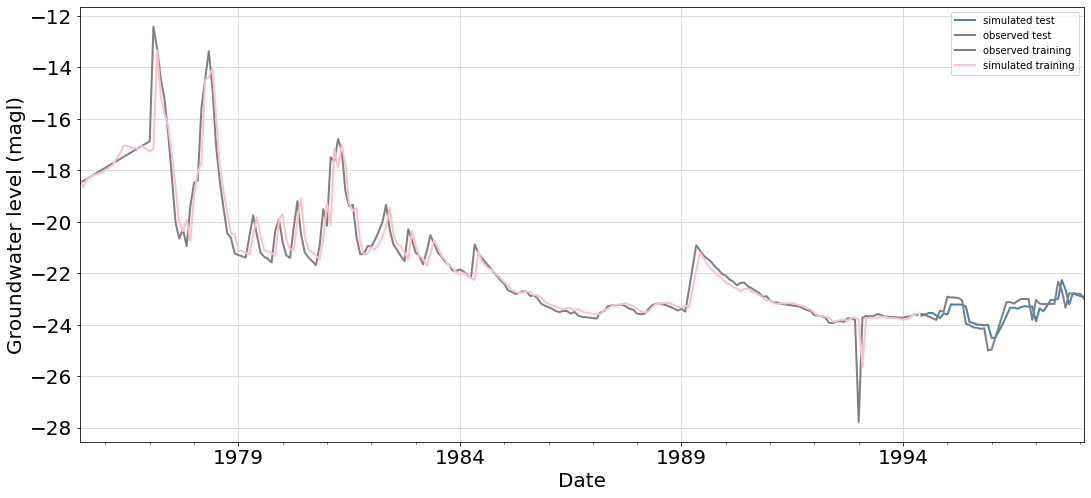

In [85]:
mse_gru = summary['mse_gru'].mean(axis=0)
rmse_gru= summary['rmse_gru'].mean(axis=0)
mae_gru = summary['mae_gru'].mean(axis=0)
r2_gru  = summary['r2_gru'].mean(axis=0)
stdv_gru= stdv.mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_gru, 3))
print("Mean squared error is:",round(mse_gru,3))
print("Root mean squared error is:",round(rmse_gru, 3))
print("Mean absolute error is:",round(mae_gru,3))


df1 = pd.DataFrame(test_inverse_trans[6].values, columns  = ['simulated test'],index  =pima.iloc[228:273].index)
df1['observed test']      = pima.iloc[228:273, 0] .values

df2 = pd.DataFrame(pima.iloc[0:228, 0].values, columns = ['observed training'],index =pima.iloc[0:228].index)
df2['simulated training'] = train_inverse_trans[6].values

out_df = df2.append(df1, sort=True)

#plot
out_df['simulated test'].plot(color='steelblue', linewidth=2)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=2)
out_df['observed training'].plot(color='grey', linewidth=2)
out_df['simulated training'].plot(color='pink', linewidth=2)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(18,8)

In [86]:
y_gru = out_df['simulated test']

### FFNN

In [87]:
from sklearn.metrics import *
import numpy as np
import csv  

# rounding off
Round = 3      

train_pred = []
test_pred  = []

fields = ['Iteration_No', 'mse_ff', 'rmse_ff', 'r2_ff','mae_ff'] 
csvfile = open('Summary.csv', 'w') 
csvwriter = csv.writer(csvfile)  
csvwriter.writerow(fields) 

for fold in range(1,11):
    print(f'Running fold {fold}')
    print(X_train.shape)


    check = ModelCheckpoint('model.h5', verbose=1, save_best_only=True)

    early = EarlyStopping(patience=100)

    # Add fully connected layer with a ReLU activation function
    model.add(Dense(units=32, activation='relu', input_shape=(1,6)))

    # Add fully connected layer with a ReLU activation function
    model.add(Dense(units=32, activation='relu'))

    # Add fully connected layer with no activation function
    model.add(Dense(units=1))
    #model.add(Flatten())

    # Compile neural network
    model.compile(loss='mse', optimizer='rmsprop', metrics=['mse'])

    X_t_reshaped   = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_val_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))


    history = model.fit(X_t_reshaped, 
                    y_train, 
                    validation_data=(X_val_reshaped, y_test),
                    epochs=1000, 
                    batch_size=96, 
                    verbose=1, callbacks=[check, early])
    
    X_val_reshaped = X_val_reshaped.reshape(45, 6)

    #running function
    gwl = -0.81759381
    test_forecast = X_test
    steps_ahead = 45
    y_ff = forecast(model, test_forecast, gwl, steps_ahead)
    y_ff = np.array(y_ff)

     #metrics for test
    y_ff = y_pred
    test_pred.append(y_ff)
    mse_ff = mean_squared_error(y_test, y_ff)
    rmse_ff = np.sqrt(mse_ff)
    r2_ff = r2_score(y_test, y_ff)
    mae_ff = mean_absolute_error(y_test, y_ff)

    #metrics train 
    train     = model.predict(X_t_reshaped)
    train_pred.append(train)
    msetrain  = mean_squared_error(y_train, train)
    rmsetrain = np.sqrt(msetrain)
    mae_train = mean_absolute_error(y_train, train)
    r2train   = r2_score(y_train, train)
    
    csvwriter.writerow([f'Iteration_{fold}',round(mse_ff,Round), round(rmse_ff,Round), round(r2_ff,Round),round(mae_ff,Round)]) 

csvfile.close()
summary= pd.read_csv('Summary.csv')  

Running fold 1
(228, 6)
Train on 228 samples, validate on 45 samples
Epoch 1/1000
 96/228 [===========>..................] - ETA: 4s - loss: 1.4865 - mean_squared_error: 1.4865
Epoch 00001: val_loss improved from inf to 0.14325, saving model to model.h5
228/228 [==============================] - 10s 43ms/sample - loss: 1.1246 - mean_squared_error: 1.1246 - val_loss: 0.1432 - val_mean_squared_error: 0.1432
Epoch 2/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.8571 - mean_squared_error: 0.8571
Epoch 00002: val_loss improved from 0.14325 to 0.07578, saving model to model.h5
228/228 [==============================] - 0s 256us/sample - loss: 0.8634 - mean_squared_error: 0.8634 - val_loss: 0.0758 - val_mean_squared_error: 0.0758
Epoch 3/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.6727 - mean_squared_error: 0.6727
Epoch 00003: val_loss improved from 0.07578 to 0.04293, saving model to model.h5
228/228 [==============================] - 0s 263us/sample

 96/228 [===========>..................] - ETA: 0s - loss: 0.0828 - mean_squared_error: 0.0828
Epoch 00026: val_loss improved from 0.02652 to 0.02642, saving model to model.h5
228/228 [==============================] - 0s 222us/sample - loss: 0.0844 - mean_squared_error: 0.0844 - val_loss: 0.0264 - val_mean_squared_error: 0.0264
Epoch 27/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0495 - mean_squared_error: 0.0495
Epoch 00027: val_loss improved from 0.02642 to 0.02590, saving model to model.h5
228/228 [==============================] - 0s 301us/sample - loss: 0.0819 - mean_squared_error: 0.0819 - val_loss: 0.0259 - val_mean_squared_error: 0.0259
Epoch 28/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1411 - mean_squared_error: 0.1411
Epoch 00028: val_loss improved from 0.02590 to 0.02589, saving model to model.h5
228/228 [==============================] - 0s 665us/sample - loss: 0.0860 - mean_squared_error: 0.0860 - val_loss: 0.0259 - val_mean_s

 96/228 [===========>..................] - ETA: 0s - loss: 0.0882 - mean_squared_error: 0.0882
Epoch 00051: val_loss did not improve from 0.02463
228/228 [==============================] - 0s 131us/sample - loss: 0.0957 - mean_squared_error: 0.0957 - val_loss: 0.0267 - val_mean_squared_error: 0.0267
Epoch 52/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0829 - mean_squared_error: 0.0829
Epoch 00052: val_loss did not improve from 0.02463
228/228 [==============================] - 0s 151us/sample - loss: 0.0824 - mean_squared_error: 0.0824 - val_loss: 0.0260 - val_mean_squared_error: 0.0260
Epoch 53/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0928 - mean_squared_error: 0.0928
Epoch 00053: val_loss did not improve from 0.02463
228/228 [==============================] - 0s 103us/sample - loss: 0.0787 - mean_squared_error: 0.0787 - val_loss: 0.0305 - val_mean_squared_error: 0.0305
Epoch 54/1000
 96/228 [===========>..................] - ETA: 0s - lo

 96/228 [===========>..................] - ETA: 0s - loss: 0.1312 - mean_squared_error: 0.1312
Epoch 00077: val_loss did not improve from 0.02463
228/228 [==============================] - 0s 116us/sample - loss: 0.0767 - mean_squared_error: 0.0767 - val_loss: 0.0255 - val_mean_squared_error: 0.0255
Epoch 78/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1090 - mean_squared_error: 0.1090
Epoch 00078: val_loss did not improve from 0.02463
228/228 [==============================] - 0s 113us/sample - loss: 0.0797 - mean_squared_error: 0.0797 - val_loss: 0.0257 - val_mean_squared_error: 0.0257
Epoch 79/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0525 - mean_squared_error: 0.0525
Epoch 00079: val_loss did not improve from 0.02463
228/228 [==============================] - 0s 110us/sample - loss: 0.0804 - mean_squared_error: 0.0804 - val_loss: 0.0262 - val_mean_squared_error: 0.0262
Epoch 80/1000
 96/228 [===========>..................] - ETA: 0s - lo

 96/228 [===========>..................] - ETA: 0s - loss: 0.0815 - mean_squared_error: 0.0815
Epoch 00103: val_loss did not improve from 0.02463
228/228 [==============================] - 0s 129us/sample - loss: 0.0767 - mean_squared_error: 0.0767 - val_loss: 0.0264 - val_mean_squared_error: 0.0264
Epoch 104/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1410 - mean_squared_error: 0.1410
Epoch 00104: val_loss did not improve from 0.02463
228/228 [==============================] - 0s 106us/sample - loss: 0.0847 - mean_squared_error: 0.0847 - val_loss: 0.0264 - val_mean_squared_error: 0.0264
Epoch 105/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0475 - mean_squared_error: 0.0475
Epoch 00105: val_loss did not improve from 0.02463
228/228 [==============================] - 0s 102us/sample - loss: 0.0763 - mean_squared_error: 0.0763 - val_loss: 0.0263 - val_mean_squared_error: 0.0263
Epoch 106/1000
 96/228 [===========>..................] - ETA: 0s -

Epoch 129/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0733 - mean_squared_error: 0.0733
Epoch 00129: val_loss did not improve from 0.02463
228/228 [==============================] - 0s 120us/sample - loss: 0.0769 - mean_squared_error: 0.0769 - val_loss: 0.0315 - val_mean_squared_error: 0.0315
Epoch 130/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0870 - mean_squared_error: 0.0870
Epoch 00130: val_loss did not improve from 0.02463
228/228 [==============================] - 0s 110us/sample - loss: 0.0785 - mean_squared_error: 0.0785 - val_loss: 0.0268 - val_mean_squared_error: 0.0268
Epoch 131/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0975 - mean_squared_error: 0.0975
Epoch 00131: val_loss did not improve from 0.02463
228/228 [==============================] - 0s 112us/sample - loss: 0.0790 - mean_squared_error: 0.0790 - val_loss: 0.0277 - val_mean_squared_error: 0.0277
Epoch 132/1000
 96/228 [===========>................

 96/228 [===========>..................] - ETA: 0s - loss: 0.0977 - mean_squared_error: 0.0977
Epoch 00009: val_loss improved from 0.03390 to 0.03159, saving model to model.h5
228/228 [==============================] - 0s 265us/sample - loss: 0.0941 - mean_squared_error: 0.0941 - val_loss: 0.0316 - val_mean_squared_error: 0.0316
Epoch 10/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0912 - mean_squared_error: 0.0912
Epoch 00010: val_loss improved from 0.03159 to 0.03027, saving model to model.h5
228/228 [==============================] - 0s 256us/sample - loss: 0.0901 - mean_squared_error: 0.0901 - val_loss: 0.0303 - val_mean_squared_error: 0.0303
Epoch 11/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0713 - mean_squared_error: 0.0713
Epoch 00011: val_loss did not improve from 0.03027
228/228 [==============================] - 0s 103us/sample - loss: 0.0938 - mean_squared_error: 0.0938 - val_loss: 0.0326 - val_mean_squared_error: 0.0326
Epoch 12/

Epoch 35/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1081 - mean_squared_error: 0.1081
Epoch 00035: val_loss did not improve from 0.02747
228/228 [==============================] - 0s 148us/sample - loss: 0.0843 - mean_squared_error: 0.0843 - val_loss: 0.0275 - val_mean_squared_error: 0.0275
Epoch 36/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0689 - mean_squared_error: 0.0689
Epoch 00036: val_loss did not improve from 0.02747
228/228 [==============================] - 0s 141us/sample - loss: 0.0929 - mean_squared_error: 0.0929 - val_loss: 0.0362 - val_mean_squared_error: 0.0362
Epoch 37/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0771 - mean_squared_error: 0.0771
Epoch 00037: val_loss improved from 0.02747 to 0.02722, saving model to model.h5
228/228 [==============================] - 0s 365us/sample - loss: 0.0759 - mean_squared_error: 0.0759 - val_loss: 0.0272 - val_mean_squared_error: 0.0272
Epoch 38/1000
 96/228 [==

Epoch 61/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0939 - mean_squared_error: 0.0939
Epoch 00061: val_loss did not improve from 0.02702
228/228 [==============================] - 0s 253us/sample - loss: 0.0941 - mean_squared_error: 0.0941 - val_loss: 0.0295 - val_mean_squared_error: 0.0295
Epoch 62/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0832 - mean_squared_error: 0.0832
Epoch 00062: val_loss did not improve from 0.02702
228/228 [==============================] - 0s 308us/sample - loss: 0.0812 - mean_squared_error: 0.0812 - val_loss: 0.0285 - val_mean_squared_error: 0.0285
Epoch 63/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0909 - mean_squared_error: 0.0909
Epoch 00063: val_loss did not improve from 0.02702
228/228 [==============================] - 0s 304us/sample - loss: 0.0831 - mean_squared_error: 0.0831 - val_loss: 0.0282 - val_mean_squared_error: 0.0282
Epoch 64/1000
 96/228 [===========>..................] 

 96/228 [===========>..................] - ETA: 0s - loss: 0.0894 - mean_squared_error: 0.0894
Epoch 00087: val_loss did not improve from 0.02702
228/228 [==============================] - 0s 170us/sample - loss: 0.0809 - mean_squared_error: 0.0809 - val_loss: 0.0419 - val_mean_squared_error: 0.0419
Epoch 88/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0861 - mean_squared_error: 0.0861
Epoch 00088: val_loss did not improve from 0.02702
228/228 [==============================] - 0s 236us/sample - loss: 0.0778 - mean_squared_error: 0.0778 - val_loss: 0.0286 - val_mean_squared_error: 0.0286
Epoch 89/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1079 - mean_squared_error: 0.1079
Epoch 00089: val_loss did not improve from 0.02702
228/228 [==============================] - 0s 230us/sample - loss: 0.0863 - mean_squared_error: 0.0863 - val_loss: 0.0293 - val_mean_squared_error: 0.0293
Epoch 90/1000
 96/228 [===========>..................] - ETA: 0s - lo

 96/228 [===========>..................] - ETA: 0s - loss: 0.1348 - mean_squared_error: 0.1348
Epoch 00113: val_loss did not improve from 0.02702
228/228 [==============================] - 0s 185us/sample - loss: 0.0793 - mean_squared_error: 0.0793 - val_loss: 0.0284 - val_mean_squared_error: 0.0284
Epoch 114/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0289 - mean_squared_error: 0.0289
Epoch 00114: val_loss did not improve from 0.02702
228/228 [==============================] - 0s 189us/sample - loss: 0.0770 - mean_squared_error: 0.0770 - val_loss: 0.0287 - val_mean_squared_error: 0.0287
Epoch 115/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0757 - mean_squared_error: 0.0757
Epoch 00115: val_loss did not improve from 0.02702
228/228 [==============================] - 0s 170us/sample - loss: 0.0750 - mean_squared_error: 0.0750 - val_loss: 0.0293 - val_mean_squared_error: 0.0293
Epoch 116/1000
 96/228 [===========>..................] - ETA: 0s -

Running fold 3
(228, 6)
Train on 228 samples, validate on 45 samples
Epoch 1/1000
 96/228 [===========>..................] - ETA: 5s - loss: 0.5174 - mean_squared_error: 0.5174
Epoch 00001: val_loss improved from inf to 0.55823, saving model to model.h5
228/228 [==============================] - 11s 46ms/sample - loss: 0.4387 - mean_squared_error: 0.4387 - val_loss: 0.5582 - val_mean_squared_error: 0.5582
Epoch 2/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.2804 - mean_squared_error: 0.2804
Epoch 00002: val_loss improved from 0.55823 to 0.50281, saving model to model.h5
228/228 [==============================] - 0s 440us/sample - loss: 0.2910 - mean_squared_error: 0.2910 - val_loss: 0.5028 - val_mean_squared_error: 0.5028
Epoch 3/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.2463 - mean_squared_error: 0.2463
Epoch 00003: val_loss improved from 0.50281 to 0.45931, saving model to model.h5
228/228 [==============================] - 0s 391us/sample

 96/228 [===========>..................] - ETA: 0s - loss: 0.0540 - mean_squared_error: 0.0540
Epoch 00025: val_loss did not improve from 0.02841
228/228 [==============================] - 0s 211us/sample - loss: 0.0720 - mean_squared_error: 0.0720 - val_loss: 0.0299 - val_mean_squared_error: 0.0299
Epoch 26/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0580 - mean_squared_error: 0.0580
Epoch 00026: val_loss did not improve from 0.02841
228/228 [==============================] - 0s 253us/sample - loss: 0.0763 - mean_squared_error: 0.0763 - val_loss: 0.0287 - val_mean_squared_error: 0.0287
Epoch 27/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1161 - mean_squared_error: 0.1161
Epoch 00027: val_loss did not improve from 0.02841
228/228 [==============================] - 0s 217us/sample - loss: 0.0740 - mean_squared_error: 0.0740 - val_loss: 0.0299 - val_mean_squared_error: 0.0299
Epoch 28/1000
 96/228 [===========>..................] - ETA: 0s - lo

Epoch 51/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0376 - mean_squared_error: 0.0376
Epoch 00051: val_loss did not improve from 0.02698
228/228 [==============================] - 0s 160us/sample - loss: 0.0754 - mean_squared_error: 0.0754 - val_loss: 0.0327 - val_mean_squared_error: 0.0327
Epoch 52/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0703 - mean_squared_error: 0.0703
Epoch 00052: val_loss did not improve from 0.02698
228/228 [==============================] - 0s 161us/sample - loss: 0.0856 - mean_squared_error: 0.0856 - val_loss: 0.0305 - val_mean_squared_error: 0.0305
Epoch 53/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0442 - mean_squared_error: 0.0442
Epoch 00053: val_loss did not improve from 0.02698
228/228 [==============================] - 0s 135us/sample - loss: 0.0731 - mean_squared_error: 0.0731 - val_loss: 0.0286 - val_mean_squared_error: 0.0286
Epoch 54/1000
 96/228 [===========>..................] 

 96/228 [===========>..................] - ETA: 0s - loss: 0.0415 - mean_squared_error: 0.0415
Epoch 00077: val_loss did not improve from 0.02698
228/228 [==============================] - 0s 185us/sample - loss: 0.0727 - mean_squared_error: 0.0727 - val_loss: 0.0304 - val_mean_squared_error: 0.0304
Epoch 78/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0563 - mean_squared_error: 0.0563
Epoch 00078: val_loss did not improve from 0.02698
228/228 [==============================] - 0s 155us/sample - loss: 0.0810 - mean_squared_error: 0.0810 - val_loss: 0.0305 - val_mean_squared_error: 0.0305
Epoch 79/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0750 - mean_squared_error: 0.0750
Epoch 00079: val_loss did not improve from 0.02698
228/228 [==============================] - 0s 163us/sample - loss: 0.0731 - mean_squared_error: 0.0731 - val_loss: 0.0302 - val_mean_squared_error: 0.0302
Epoch 80/1000
 96/228 [===========>..................] - ETA: 0s - lo

 96/228 [===========>..................] - ETA: 0s - loss: 0.0681 - mean_squared_error: 0.0681
Epoch 00103: val_loss did not improve from 0.02698
228/228 [==============================] - 0s 123us/sample - loss: 0.0804 - mean_squared_error: 0.0804 - val_loss: 0.0311 - val_mean_squared_error: 0.0311
Epoch 104/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0692 - mean_squared_error: 0.0692
Epoch 00104: val_loss did not improve from 0.02698
228/228 [==============================] - 0s 122us/sample - loss: 0.0810 - mean_squared_error: 0.0810 - val_loss: 0.0314 - val_mean_squared_error: 0.0314
Epoch 105/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0482 - mean_squared_error: 0.0482
Epoch 00105: val_loss did not improve from 0.02698
228/228 [==============================] - 0s 121us/sample - loss: 0.0796 - mean_squared_error: 0.0796 - val_loss: 0.0309 - val_mean_squared_error: 0.0309
Epoch 106/1000
 96/228 [===========>..................] - ETA: 0s -

Epoch 129/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0509 - mean_squared_error: 0.0509
Epoch 00129: val_loss did not improve from 0.02698
228/228 [==============================] - 0s 141us/sample - loss: 0.0837 - mean_squared_error: 0.0837 - val_loss: 0.0303 - val_mean_squared_error: 0.0303
Epoch 130/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0700 - mean_squared_error: 0.0700
Epoch 00130: val_loss did not improve from 0.02698
228/228 [==============================] - 0s 141us/sample - loss: 0.0725 - mean_squared_error: 0.0725 - val_loss: 0.0313 - val_mean_squared_error: 0.0313
Epoch 131/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0930 - mean_squared_error: 0.0930
Epoch 00131: val_loss did not improve from 0.02698
228/228 [==============================] - 0s 139us/sample - loss: 0.0794 - mean_squared_error: 0.0794 - val_loss: 0.0311 - val_mean_squared_error: 0.0311
Epoch 132/1000
 96/228 [===========>................

228/228 [==============================] - 0s 515us/sample - loss: 0.0732 - mean_squared_error: 0.0732 - val_loss: 0.0294 - val_mean_squared_error: 0.0294
Epoch 18/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0502 - mean_squared_error: 0.0502
Epoch 00018: val_loss improved from 0.02942 to 0.02813, saving model to model.h5
228/228 [==============================] - 0s 538us/sample - loss: 0.0709 - mean_squared_error: 0.0709 - val_loss: 0.0281 - val_mean_squared_error: 0.0281
Epoch 19/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0590 - mean_squared_error: 0.0590
Epoch 00019: val_loss did not improve from 0.02813
228/228 [==============================] - 0s 212us/sample - loss: 0.0954 - mean_squared_error: 0.0954 - val_loss: 0.0293 - val_mean_squared_error: 0.0293
Epoch 20/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0682 - mean_squared_error: 0.0682
Epoch 00020: val_loss did not improve from 0.02813
228/228 [================

Epoch 44/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1003 - mean_squared_error: 0.1003
Epoch 00044: val_loss did not improve from 0.02813
228/228 [==============================] - 0s 141us/sample - loss: 0.0966 - mean_squared_error: 0.0966 - val_loss: 0.0313 - val_mean_squared_error: 0.0313
Epoch 45/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0809 - mean_squared_error: 0.0809
Epoch 00045: val_loss did not improve from 0.02813
228/228 [==============================] - 0s 144us/sample - loss: 0.0775 - mean_squared_error: 0.0775 - val_loss: 0.0310 - val_mean_squared_error: 0.0310
Epoch 46/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0990 - mean_squared_error: 0.0990
Epoch 00046: val_loss did not improve from 0.02813
228/228 [==============================] - 0s 154us/sample - loss: 0.0874 - mean_squared_error: 0.0874 - val_loss: 0.0303 - val_mean_squared_error: 0.0303
Epoch 47/1000
 96/228 [===========>..................] 

 96/228 [===========>..................] - ETA: 0s - loss: 0.1240 - mean_squared_error: 0.1240
Epoch 00070: val_loss did not improve from 0.02813
228/228 [==============================] - 0s 133us/sample - loss: 0.0776 - mean_squared_error: 0.0776 - val_loss: 0.0309 - val_mean_squared_error: 0.0309
Epoch 71/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0785 - mean_squared_error: 0.0785
Epoch 00071: val_loss did not improve from 0.02813
228/228 [==============================] - 0s 145us/sample - loss: 0.0833 - mean_squared_error: 0.0833 - val_loss: 0.0315 - val_mean_squared_error: 0.0315
Epoch 72/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1010 - mean_squared_error: 0.1010
Epoch 00072: val_loss did not improve from 0.02813
228/228 [==============================] - 0s 133us/sample - loss: 0.0800 - mean_squared_error: 0.0800 - val_loss: 0.0348 - val_mean_squared_error: 0.0348
Epoch 73/1000
 96/228 [===========>..................] - ETA: 0s - lo

 96/228 [===========>..................] - ETA: 0s - loss: 0.0828 - mean_squared_error: 0.0828
Epoch 00096: val_loss did not improve from 0.02813
228/228 [==============================] - 0s 135us/sample - loss: 0.0668 - mean_squared_error: 0.0668 - val_loss: 0.0306 - val_mean_squared_error: 0.0306
Epoch 97/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0648 - mean_squared_error: 0.0648
Epoch 00097: val_loss did not improve from 0.02813
228/228 [==============================] - 0s 157us/sample - loss: 0.0880 - mean_squared_error: 0.0880 - val_loss: 0.0314 - val_mean_squared_error: 0.0314
Epoch 98/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0444 - mean_squared_error: 0.0444
Epoch 00098: val_loss did not improve from 0.02813
228/228 [==============================] - 0s 141us/sample - loss: 0.0797 - mean_squared_error: 0.0797 - val_loss: 0.0316 - val_mean_squared_error: 0.0316
Epoch 99/1000
 96/228 [===========>..................] - ETA: 0s - lo

Epoch 4/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0750 - mean_squared_error: 0.0750
Epoch 00004: val_loss improved from 0.03662 to 0.03285, saving model to model.h5
228/228 [==============================] - 0s 567us/sample - loss: 0.0990 - mean_squared_error: 0.0990 - val_loss: 0.0329 - val_mean_squared_error: 0.0329
Epoch 5/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1658 - mean_squared_error: 0.1658
Epoch 00005: val_loss did not improve from 0.03285
228/228 [==============================] - 0s 191us/sample - loss: 0.1025 - mean_squared_error: 0.1025 - val_loss: 0.0360 - val_mean_squared_error: 0.0360
Epoch 6/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1064 - mean_squared_error: 0.1064
Epoch 00006: val_loss improved from 0.03285 to 0.03196, saving model to model.h5
228/228 [==============================] - 0s 557us/sample - loss: 0.0836 - mean_squared_error: 0.0836 - val_loss: 0.0320 - val_mean_squared_error: 0.032

228/228 [==============================] - 0s 580us/sample - loss: 0.0797 - mean_squared_error: 0.0797 - val_loss: 0.0294 - val_mean_squared_error: 0.0294
Epoch 30/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0751 - mean_squared_error: 0.0751
Epoch 00030: val_loss did not improve from 0.02944
228/228 [==============================] - 0s 147us/sample - loss: 0.0762 - mean_squared_error: 0.0762 - val_loss: 0.0369 - val_mean_squared_error: 0.0369
Epoch 31/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0463 - mean_squared_error: 0.0463
Epoch 00031: val_loss did not improve from 0.02944
228/228 [==============================] - 0s 168us/sample - loss: 0.0821 - mean_squared_error: 0.0821 - val_loss: 0.0308 - val_mean_squared_error: 0.0308
Epoch 32/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0420 - mean_squared_error: 0.0420
Epoch 00032: val_loss did not improve from 0.02944
228/228 [==============================] - 0s 168us/sam

Epoch 56/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0616 - mean_squared_error: 0.0616
Epoch 00056: val_loss did not improve from 0.02912
228/228 [==============================] - 0s 206us/sample - loss: 0.0795 - mean_squared_error: 0.0795 - val_loss: 0.0303 - val_mean_squared_error: 0.0303
Epoch 57/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0834 - mean_squared_error: 0.0834
Epoch 00057: val_loss did not improve from 0.02912
228/228 [==============================] - 0s 236us/sample - loss: 0.0740 - mean_squared_error: 0.0740 - val_loss: 0.0330 - val_mean_squared_error: 0.0330
Epoch 58/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1264 - mean_squared_error: 0.1264
Epoch 00058: val_loss did not improve from 0.02912
228/228 [==============================] - 0s 157us/sample - loss: 0.0872 - mean_squared_error: 0.0872 - val_loss: 0.0322 - val_mean_squared_error: 0.0322
Epoch 59/1000
 96/228 [===========>..................] 

 96/228 [===========>..................] - ETA: 0s - loss: 0.0806 - mean_squared_error: 0.0806
Epoch 00082: val_loss did not improve from 0.02912
228/228 [==============================] - 0s 280us/sample - loss: 0.0748 - mean_squared_error: 0.0748 - val_loss: 0.0335 - val_mean_squared_error: 0.0335
Epoch 83/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1130 - mean_squared_error: 0.1130
Epoch 00083: val_loss did not improve from 0.02912
228/228 [==============================] - 0s 176us/sample - loss: 0.0864 - mean_squared_error: 0.0864 - val_loss: 0.0316 - val_mean_squared_error: 0.0316
Epoch 84/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0743 - mean_squared_error: 0.0743
Epoch 00084: val_loss did not improve from 0.02912
228/228 [==============================] - 0s 162us/sample - loss: 0.0718 - mean_squared_error: 0.0718 - val_loss: 0.0341 - val_mean_squared_error: 0.0341
Epoch 85/1000
 96/228 [===========>..................] - ETA: 0s - lo

 96/228 [===========>..................] - ETA: 0s - loss: 0.0455 - mean_squared_error: 0.0455
Epoch 00108: val_loss did not improve from 0.02912
228/228 [==============================] - 0s 276us/sample - loss: 0.0658 - mean_squared_error: 0.0658 - val_loss: 0.0586 - val_mean_squared_error: 0.0586
Epoch 109/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1675 - mean_squared_error: 0.1675
Epoch 00109: val_loss did not improve from 0.02912
228/228 [==============================] - 0s 162us/sample - loss: 0.1063 - mean_squared_error: 0.1063 - val_loss: 0.0311 - val_mean_squared_error: 0.0311
Epoch 110/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0632 - mean_squared_error: 0.0632
Epoch 00110: val_loss did not improve from 0.02912
228/228 [==============================] - 0s 164us/sample - loss: 0.0798 - mean_squared_error: 0.0798 - val_loss: 0.0309 - val_mean_squared_error: 0.0309
Epoch 111/1000
 96/228 [===========>..................] - ETA: 0s -

Epoch 134/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0571 - mean_squared_error: 0.0571
Epoch 00134: val_loss did not improve from 0.02912
228/228 [==============================] - 0s 230us/sample - loss: 0.0758 - mean_squared_error: 0.0758 - val_loss: 0.0456 - val_mean_squared_error: 0.0456
Epoch 135/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0430 - mean_squared_error: 0.0430
Epoch 00135: val_loss did not improve from 0.02912
228/228 [==============================] - 0s 344us/sample - loss: 0.0824 - mean_squared_error: 0.0824 - val_loss: 0.0327 - val_mean_squared_error: 0.0327
Epoch 136/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0970 - mean_squared_error: 0.0970
Epoch 00136: val_loss did not improve from 0.02912
228/228 [==============================] - 0s 162us/sample - loss: 0.1034 - mean_squared_error: 0.1034 - val_loss: 0.0324 - val_mean_squared_error: 0.0324
Epoch 137/1000
 96/228 [===========>................

Epoch 13/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0815 - mean_squared_error: 0.0815
Epoch 00013: val_loss did not improve from 0.03139
228/228 [==============================] - 0s 147us/sample - loss: 0.0747 - mean_squared_error: 0.0747 - val_loss: 0.0327 - val_mean_squared_error: 0.0327
Epoch 14/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0821 - mean_squared_error: 0.0821
Epoch 00014: val_loss did not improve from 0.03139
228/228 [==============================] - 0s 141us/sample - loss: 0.0716 - mean_squared_error: 0.0716 - val_loss: 0.0388 - val_mean_squared_error: 0.0388
Epoch 15/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1423 - mean_squared_error: 0.1423
Epoch 00015: val_loss did not improve from 0.03139
228/228 [==============================] - 0s 142us/sample - loss: 0.1011 - mean_squared_error: 0.1011 - val_loss: 0.0323 - val_mean_squared_error: 0.0323
Epoch 16/1000
 96/228 [===========>..................] 

 96/228 [===========>..................] - ETA: 0s - loss: 0.1291 - mean_squared_error: 0.1291
Epoch 00039: val_loss did not improve from 0.03139
228/228 [==============================] - 0s 164us/sample - loss: 0.0824 - mean_squared_error: 0.0824 - val_loss: 0.0321 - val_mean_squared_error: 0.0321
Epoch 40/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0492 - mean_squared_error: 0.0492
Epoch 00040: val_loss did not improve from 0.03139
228/228 [==============================] - 0s 154us/sample - loss: 0.0737 - mean_squared_error: 0.0737 - val_loss: 0.0322 - val_mean_squared_error: 0.0322
Epoch 41/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1160 - mean_squared_error: 0.1160
Epoch 00041: val_loss did not improve from 0.03139
228/228 [==============================] - 0s 157us/sample - loss: 0.0753 - mean_squared_error: 0.0753 - val_loss: 0.0327 - val_mean_squared_error: 0.0327
Epoch 42/1000
 96/228 [===========>..................] - ETA: 0s - lo

 96/228 [===========>..................] - ETA: 0s - loss: 0.1015 - mean_squared_error: 0.1015
Epoch 00065: val_loss did not improve from 0.03139
228/228 [==============================] - 0s 164us/sample - loss: 0.0782 - mean_squared_error: 0.0782 - val_loss: 0.0349 - val_mean_squared_error: 0.0349
Epoch 66/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0462 - mean_squared_error: 0.0462
Epoch 00066: val_loss did not improve from 0.03139
228/228 [==============================] - 0s 170us/sample - loss: 0.0850 - mean_squared_error: 0.0850 - val_loss: 0.0344 - val_mean_squared_error: 0.0344
Epoch 67/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0474 - mean_squared_error: 0.0474
Epoch 00067: val_loss did not improve from 0.03139
228/228 [==============================] - 0s 163us/sample - loss: 0.0803 - mean_squared_error: 0.0803 - val_loss: 0.0808 - val_mean_squared_error: 0.0808
Epoch 68/1000
 96/228 [===========>..................] - ETA: 0s - lo

 96/228 [===========>..................] - ETA: 0s - loss: 0.0939 - mean_squared_error: 0.0939
Epoch 00091: val_loss did not improve from 0.03139
228/228 [==============================] - 0s 168us/sample - loss: 0.0869 - mean_squared_error: 0.0869 - val_loss: 0.0502 - val_mean_squared_error: 0.0502
Epoch 92/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0816 - mean_squared_error: 0.0816
Epoch 00092: val_loss did not improve from 0.03139
228/228 [==============================] - 0s 197us/sample - loss: 0.0834 - mean_squared_error: 0.0834 - val_loss: 0.0319 - val_mean_squared_error: 0.0319
Epoch 93/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1419 - mean_squared_error: 0.1419
Epoch 00093: val_loss did not improve from 0.03139
228/228 [==============================] - 0s 246us/sample - loss: 0.0972 - mean_squared_error: 0.0972 - val_loss: 0.0966 - val_mean_squared_error: 0.0966
Epoch 94/1000
 96/228 [===========>..................] - ETA: 0s - lo

 96/228 [===========>..................] - ETA: 0s - loss: 0.0725 - mean_squared_error: 0.0725
Epoch 00012: val_loss improved from 0.03200 to 0.03108, saving model to model.h5
228/228 [==============================] - 0s 705us/sample - loss: 0.1041 - mean_squared_error: 0.1041 - val_loss: 0.0311 - val_mean_squared_error: 0.0311
Epoch 13/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1040 - mean_squared_error: 0.1040
Epoch 00013: val_loss did not improve from 0.03108
228/228 [==============================] - 0s 192us/sample - loss: 0.0784 - mean_squared_error: 0.0784 - val_loss: 0.0328 - val_mean_squared_error: 0.0328
Epoch 14/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0778 - mean_squared_error: 0.0778
Epoch 00014: val_loss did not improve from 0.03108
228/228 [==============================] - 0s 208us/sample - loss: 0.0714 - mean_squared_error: 0.0714 - val_loss: 0.0401 - val_mean_squared_error: 0.0401
Epoch 15/1000
 96/228 [===========>....

Epoch 38/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0712 - mean_squared_error: 0.0712
Epoch 00038: val_loss did not improve from 0.03004
228/228 [==============================] - 0s 165us/sample - loss: 0.0754 - mean_squared_error: 0.0754 - val_loss: 0.0346 - val_mean_squared_error: 0.0346
Epoch 39/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0825 - mean_squared_error: 0.0825
Epoch 00039: val_loss did not improve from 0.03004
228/228 [==============================] - 0s 175us/sample - loss: 0.0779 - mean_squared_error: 0.0779 - val_loss: 0.0316 - val_mean_squared_error: 0.0316
Epoch 40/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0977 - mean_squared_error: 0.0977
Epoch 00040: val_loss did not improve from 0.03004
228/228 [==============================] - 0s 159us/sample - loss: 0.0777 - mean_squared_error: 0.0777 - val_loss: 0.0425 - val_mean_squared_error: 0.0425
Epoch 41/1000
 96/228 [===========>..................] 

 96/228 [===========>..................] - ETA: 0s - loss: 0.1557 - mean_squared_error: 0.1557
Epoch 00064: val_loss did not improve from 0.03004
228/228 [==============================] - 0s 180us/sample - loss: 0.0967 - mean_squared_error: 0.0967 - val_loss: 0.0351 - val_mean_squared_error: 0.0351
Epoch 65/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0942 - mean_squared_error: 0.0942
Epoch 00065: val_loss did not improve from 0.03004
228/228 [==============================] - 0s 184us/sample - loss: 0.0809 - mean_squared_error: 0.0809 - val_loss: 0.0826 - val_mean_squared_error: 0.0826
Epoch 66/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1396 - mean_squared_error: 0.1396
Epoch 00066: val_loss did not improve from 0.03004
228/228 [==============================] - 0s 183us/sample - loss: 0.0882 - mean_squared_error: 0.0882 - val_loss: 0.0340 - val_mean_squared_error: 0.0340
Epoch 67/1000
 96/228 [===========>..................] - ETA: 0s - lo

 96/228 [===========>..................] - ETA: 0s - loss: 0.0889 - mean_squared_error: 0.0889
Epoch 00090: val_loss did not improve from 0.03004
228/228 [==============================] - 0s 304us/sample - loss: 0.0797 - mean_squared_error: 0.0797 - val_loss: 0.0320 - val_mean_squared_error: 0.0320
Epoch 91/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0806 - mean_squared_error: 0.0806
Epoch 00091: val_loss did not improve from 0.03004
228/228 [==============================] - 0s 245us/sample - loss: 0.0933 - mean_squared_error: 0.0933 - val_loss: 0.0353 - val_mean_squared_error: 0.0353
Epoch 92/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0917 - mean_squared_error: 0.0917
Epoch 00092: val_loss did not improve from 0.03004
228/228 [==============================] - 0s 248us/sample - loss: 0.0821 - mean_squared_error: 0.0821 - val_loss: 0.0321 - val_mean_squared_error: 0.0321
Epoch 93/1000
 96/228 [===========>..................] - ETA: 0s - lo

 96/228 [===========>..................] - ETA: 0s - loss: 0.0675 - mean_squared_error: 0.0675
Epoch 00116: val_loss did not improve from 0.03004
228/228 [==============================] - 0s 356us/sample - loss: 0.0742 - mean_squared_error: 0.0742 - val_loss: 0.0325 - val_mean_squared_error: 0.0325
Epoch 117/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0761 - mean_squared_error: 0.0761
Epoch 00117: val_loss did not improve from 0.03004
228/228 [==============================] - 0s 452us/sample - loss: 0.0808 - mean_squared_error: 0.0808 - val_loss: 0.0322 - val_mean_squared_error: 0.0322
Epoch 118/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1173 - mean_squared_error: 0.1173
Epoch 00118: val_loss did not improve from 0.03004
228/228 [==============================] - 0s 250us/sample - loss: 0.1005 - mean_squared_error: 0.1005 - val_loss: 0.0409 - val_mean_squared_error: 0.0409
Epoch 119/1000
 96/228 [===========>..................] - ETA: 0s -

Epoch 14/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0987 - mean_squared_error: 0.0987
Epoch 00014: val_loss did not improve from 0.03138
228/228 [==============================] - 0s 307us/sample - loss: 0.1133 - mean_squared_error: 0.1133 - val_loss: 0.0362 - val_mean_squared_error: 0.0362
Epoch 15/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1076 - mean_squared_error: 0.1076
Epoch 00015: val_loss did not improve from 0.03138
228/228 [==============================] - 0s 219us/sample - loss: 0.0930 - mean_squared_error: 0.0930 - val_loss: 0.0352 - val_mean_squared_error: 0.0352
Epoch 16/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1024 - mean_squared_error: 0.1024
Epoch 00016: val_loss did not improve from 0.03138
228/228 [==============================] - 0s 206us/sample - loss: 0.0726 - mean_squared_error: 0.0726 - val_loss: 0.0342 - val_mean_squared_error: 0.0342
Epoch 17/1000
 96/228 [===========>..................] 

 96/228 [===========>..................] - ETA: 0s - loss: 0.2085 - mean_squared_error: 0.2085
Epoch 00040: val_loss did not improve from 0.03138
228/228 [==============================] - 0s 237us/sample - loss: 0.1146 - mean_squared_error: 0.1146 - val_loss: 0.0371 - val_mean_squared_error: 0.0371
Epoch 41/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1242 - mean_squared_error: 0.1242
Epoch 00041: val_loss did not improve from 0.03138
228/228 [==============================] - 0s 239us/sample - loss: 0.0789 - mean_squared_error: 0.0789 - val_loss: 0.0329 - val_mean_squared_error: 0.0329
Epoch 42/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1005 - mean_squared_error: 0.1005
Epoch 00042: val_loss did not improve from 0.03138
228/228 [==============================] - 0s 219us/sample - loss: 0.0732 - mean_squared_error: 0.0732 - val_loss: 0.0330 - val_mean_squared_error: 0.0330
Epoch 43/1000
 96/228 [===========>..................] - ETA: 0s - lo

 96/228 [===========>..................] - ETA: 0s - loss: 0.0568 - mean_squared_error: 0.0568
Epoch 00066: val_loss did not improve from 0.03138
228/228 [==============================] - 0s 230us/sample - loss: 0.0715 - mean_squared_error: 0.0715 - val_loss: 0.0418 - val_mean_squared_error: 0.0418
Epoch 67/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1405 - mean_squared_error: 0.1405
Epoch 00067: val_loss did not improve from 0.03138
228/228 [==============================] - 0s 246us/sample - loss: 0.0829 - mean_squared_error: 0.0829 - val_loss: 0.0331 - val_mean_squared_error: 0.0331
Epoch 68/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1221 - mean_squared_error: 0.1221
Epoch 00068: val_loss did not improve from 0.03138
228/228 [==============================] - 0s 217us/sample - loss: 0.1030 - mean_squared_error: 0.1030 - val_loss: 0.0617 - val_mean_squared_error: 0.0617
Epoch 69/1000
 96/228 [===========>..................] - ETA: 0s - lo

 96/228 [===========>..................] - ETA: 0s - loss: 0.1428 - mean_squared_error: 0.1428
Epoch 00092: val_loss did not improve from 0.03138
228/228 [==============================] - 0s 285us/sample - loss: 0.1260 - mean_squared_error: 0.1260 - val_loss: 0.0333 - val_mean_squared_error: 0.0333
Epoch 93/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1022 - mean_squared_error: 0.1022
Epoch 00093: val_loss did not improve from 0.03138
228/228 [==============================] - 0s 218us/sample - loss: 0.0746 - mean_squared_error: 0.0746 - val_loss: 0.0338 - val_mean_squared_error: 0.0338
Epoch 94/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0675 - mean_squared_error: 0.0675
Epoch 00094: val_loss did not improve from 0.03138
228/228 [==============================] - 0s 227us/sample - loss: 0.0728 - mean_squared_error: 0.0728 - val_loss: 0.0405 - val_mean_squared_error: 0.0405
Epoch 95/1000
 96/228 [===========>..................] - ETA: 0s - lo

Epoch 15/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.5583 - mean_squared_error: 0.5583
Epoch 00015: val_loss did not improve from 0.03126
228/228 [==============================] - 0s 166us/sample - loss: 0.6298 - mean_squared_error: 0.6298 - val_loss: 0.0616 - val_mean_squared_error: 0.0616
Epoch 16/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.5878 - mean_squared_error: 0.5878
Epoch 00016: val_loss did not improve from 0.03126
228/228 [==============================] - 0s 240us/sample - loss: 0.5985 - mean_squared_error: 0.5985 - val_loss: 0.0370 - val_mean_squared_error: 0.0370
Epoch 17/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.4466 - mean_squared_error: 0.4466
Epoch 00017: val_loss did not improve from 0.03126
228/228 [==============================] - 0s 170us/sample - loss: 0.4621 - mean_squared_error: 0.4621 - val_loss: 0.0416 - val_mean_squared_error: 0.0416
Epoch 18/1000
 96/228 [===========>..................] 

 96/228 [===========>..................] - ETA: 0s - loss: 0.1288 - mean_squared_error: 0.1288
Epoch 00041: val_loss did not improve from 0.03126
228/228 [==============================] - 0s 174us/sample - loss: 0.0792 - mean_squared_error: 0.0792 - val_loss: 0.0322 - val_mean_squared_error: 0.0322
Epoch 42/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0924 - mean_squared_error: 0.0924
Epoch 00042: val_loss did not improve from 0.03126
228/228 [==============================] - 0s 168us/sample - loss: 0.0778 - mean_squared_error: 0.0778 - val_loss: 0.1168 - val_mean_squared_error: 0.1168
Epoch 43/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0772 - mean_squared_error: 0.0772
Epoch 00043: val_loss did not improve from 0.03126
228/228 [==============================] - 0s 162us/sample - loss: 0.1113 - mean_squared_error: 0.1113 - val_loss: 0.0358 - val_mean_squared_error: 0.0358
Epoch 44/1000
 96/228 [===========>..................] - ETA: 0s - lo

 96/228 [===========>..................] - ETA: 0s - loss: 0.0464 - mean_squared_error: 0.0464
Epoch 00067: val_loss did not improve from 0.03126
228/228 [==============================] - 0s 183us/sample - loss: 0.0792 - mean_squared_error: 0.0792 - val_loss: 0.1065 - val_mean_squared_error: 0.1065
Epoch 68/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0696 - mean_squared_error: 0.0696
Epoch 00068: val_loss did not improve from 0.03126
228/228 [==============================] - 0s 178us/sample - loss: 0.0879 - mean_squared_error: 0.0879 - val_loss: 0.0326 - val_mean_squared_error: 0.0326
Epoch 69/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0570 - mean_squared_error: 0.0570
Epoch 00069: val_loss did not improve from 0.03126
228/228 [==============================] - 0s 185us/sample - loss: 0.0848 - mean_squared_error: 0.0848 - val_loss: 0.0336 - val_mean_squared_error: 0.0336
Epoch 70/1000
 96/228 [===========>..................] - ETA: 0s - lo

 96/228 [===========>..................] - ETA: 0s - loss: 0.0893 - mean_squared_error: 0.0893
Epoch 00093: val_loss did not improve from 0.03126
228/228 [==============================] - 0s 170us/sample - loss: 0.0739 - mean_squared_error: 0.0739 - val_loss: 0.1008 - val_mean_squared_error: 0.1008
Epoch 94/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0975 - mean_squared_error: 0.0975
Epoch 00094: val_loss did not improve from 0.03126
228/228 [==============================] - 0s 181us/sample - loss: 0.0950 - mean_squared_error: 0.0950 - val_loss: 0.0431 - val_mean_squared_error: 0.0431
Epoch 95/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1430 - mean_squared_error: 0.1430
Epoch 00095: val_loss did not improve from 0.03126
228/228 [==============================] - 0s 172us/sample - loss: 0.1472 - mean_squared_error: 0.1472 - val_loss: 0.0352 - val_mean_squared_error: 0.0352
Epoch 96/1000
 96/228 [===========>..................] - ETA: 0s - lo

Epoch 9/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0934 - mean_squared_error: 0.0934
Epoch 00009: val_loss did not improve from 0.03384
228/228 [==============================] - 0s 176us/sample - loss: 0.0929 - mean_squared_error: 0.0929 - val_loss: 0.0340 - val_mean_squared_error: 0.0340
Epoch 10/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1305 - mean_squared_error: 0.1305
Epoch 00010: val_loss did not improve from 0.03384
228/228 [==============================] - 0s 289us/sample - loss: 0.1053 - mean_squared_error: 0.1053 - val_loss: 0.0407 - val_mean_squared_error: 0.0407
Epoch 11/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0547 - mean_squared_error: 0.0547
Epoch 00011: val_loss did not improve from 0.03384
228/228 [==============================] - 0s 213us/sample - loss: 0.0798 - mean_squared_error: 0.0798 - val_loss: 0.0600 - val_mean_squared_error: 0.0600
Epoch 12/1000
 96/228 [===========>..................] -

Epoch 35/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0576 - mean_squared_error: 0.0576
Epoch 00035: val_loss did not improve from 0.03313
228/228 [==============================] - 0s 205us/sample - loss: 0.0827 - mean_squared_error: 0.0827 - val_loss: 0.0972 - val_mean_squared_error: 0.0972
Epoch 36/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0997 - mean_squared_error: 0.0997
Epoch 00036: val_loss did not improve from 0.03313
228/228 [==============================] - 0s 260us/sample - loss: 0.0900 - mean_squared_error: 0.0900 - val_loss: 0.0334 - val_mean_squared_error: 0.0334
Epoch 37/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0965 - mean_squared_error: 0.0965
Epoch 00037: val_loss did not improve from 0.03313
228/228 [==============================] - 0s 236us/sample - loss: 0.0853 - mean_squared_error: 0.0853 - val_loss: 0.1087 - val_mean_squared_error: 0.1087
Epoch 38/1000
 96/228 [===========>..................] 

Epoch 61/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0886 - mean_squared_error: 0.0886
Epoch 00061: val_loss did not improve from 0.03299
228/228 [==============================] - 0s 205us/sample - loss: 0.0795 - mean_squared_error: 0.0795 - val_loss: 0.0367 - val_mean_squared_error: 0.0367
Epoch 62/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.1183 - mean_squared_error: 0.1183
Epoch 00062: val_loss did not improve from 0.03299
228/228 [==============================] - 0s 210us/sample - loss: 0.0854 - mean_squared_error: 0.0854 - val_loss: 0.0339 - val_mean_squared_error: 0.0339
Epoch 63/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0822 - mean_squared_error: 0.0822
Epoch 00063: val_loss did not improve from 0.03299
228/228 [==============================] - 0s 189us/sample - loss: 0.0941 - mean_squared_error: 0.0941 - val_loss: 0.0374 - val_mean_squared_error: 0.0374
Epoch 64/1000
 96/228 [===========>..................] 

Epoch 87/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0458 - mean_squared_error: 0.0458
Epoch 00087: val_loss did not improve from 0.03282
228/228 [==============================] - 0s 218us/sample - loss: 0.0698 - mean_squared_error: 0.0698 - val_loss: 0.0343 - val_mean_squared_error: 0.0343
Epoch 88/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0829 - mean_squared_error: 0.0829
Epoch 00088: val_loss did not improve from 0.03282
228/228 [==============================] - 0s 209us/sample - loss: 0.0891 - mean_squared_error: 0.0891 - val_loss: 0.0330 - val_mean_squared_error: 0.0330
Epoch 89/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0466 - mean_squared_error: 0.0466
Epoch 00089: val_loss did not improve from 0.03282
228/228 [==============================] - 0s 207us/sample - loss: 0.0742 - mean_squared_error: 0.0742 - val_loss: 0.0999 - val_mean_squared_error: 0.0999
Epoch 90/1000
 96/228 [===========>..................] 

Epoch 113/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0517 - mean_squared_error: 0.0517
Epoch 00113: val_loss did not improve from 0.03282
228/228 [==============================] - 0s 191us/sample - loss: 0.0764 - mean_squared_error: 0.0764 - val_loss: 0.0636 - val_mean_squared_error: 0.0636
Epoch 114/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0972 - mean_squared_error: 0.0972
Epoch 00114: val_loss did not improve from 0.03282
228/228 [==============================] - 0s 199us/sample - loss: 0.0861 - mean_squared_error: 0.0861 - val_loss: 0.0358 - val_mean_squared_error: 0.0358
Epoch 115/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0780 - mean_squared_error: 0.0780
Epoch 00115: val_loss did not improve from 0.03282
228/228 [==============================] - 0s 204us/sample - loss: 0.0962 - mean_squared_error: 0.0962 - val_loss: 0.0371 - val_mean_squared_error: 0.0371
Epoch 116/1000
 96/228 [===========>................

Epoch 139/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0269 - mean_squared_error: 0.0269
Epoch 00139: val_loss did not improve from 0.03282
228/228 [==============================] - 0s 200us/sample - loss: 0.0796 - mean_squared_error: 0.0796 - val_loss: 0.0338 - val_mean_squared_error: 0.0338
Epoch 140/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.2258 - mean_squared_error: 0.2258
Epoch 00140: val_loss did not improve from 0.03282
228/228 [==============================] - 0s 190us/sample - loss: 0.1232 - mean_squared_error: 0.1232 - val_loss: 0.0532 - val_mean_squared_error: 0.0532
Epoch 141/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0906 - mean_squared_error: 0.0906
Epoch 00141: val_loss did not improve from 0.03282
228/228 [==============================] - 0s 202us/sample - loss: 0.0901 - mean_squared_error: 0.0901 - val_loss: 0.0453 - val_mean_squared_error: 0.0453
Epoch 142/1000
 96/228 [===========>................

Epoch 165/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0558 - mean_squared_error: 0.0558
Epoch 00165: val_loss did not improve from 0.03282
228/228 [==============================] - 0s 196us/sample - loss: 0.0792 - mean_squared_error: 0.0792 - val_loss: 0.0385 - val_mean_squared_error: 0.0385
Epoch 166/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0802 - mean_squared_error: 0.0802
Epoch 00166: val_loss did not improve from 0.03282
228/228 [==============================] - 0s 198us/sample - loss: 0.0736 - mean_squared_error: 0.0736 - val_loss: 0.0391 - val_mean_squared_error: 0.0391
Epoch 167/1000
 96/228 [===========>..................] - ETA: 0s - loss: 0.0674 - mean_squared_error: 0.0674
Epoch 00167: val_loss did not improve from 0.03282
228/228 [==============================] - 0s 258us/sample - loss: 0.0797 - mean_squared_error: 0.0797 - val_loss: 0.0433 - val_mean_squared_error: 0.0433
Epoch 168/1000
 96/228 [===========>................

In [88]:
summary

Iteration_No  mse_ff  rmse_ff  r2_ff  mae_ff
0   Iteration_1   0.025    0.158    0.6   0.123
1   Iteration_2   0.025    0.158    0.6   0.123
2   Iteration_3   0.025    0.158    0.6   0.123
3   Iteration_4   0.025    0.158    0.6   0.123
4   Iteration_5   0.025    0.158    0.6   0.123
5   Iteration_6   0.025    0.158    0.6   0.123
6   Iteration_7   0.025    0.158    0.6   0.123
7   Iteration_8   0.025    0.158    0.6   0.123
8   Iteration_9   0.025    0.158    0.6   0.123
9  Iteration_10   0.025    0.158    0.6   0.123

In [89]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]

train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']
train_iterations['actual'] = pima1.iloc[0:228, 6].values

In [90]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]

test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']
test_iterations['actual'] = pima1.iloc[228:273, 6].values


In [91]:
#transform train
a = pima1[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2']]
a = a.iloc[:228]
a ['simulated training'] = train_iterations['Mean'].values
train_inverse_trans = pd.DataFrame(scaler.inverse_transform(a))


#transform test
b = pima1[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2']]
b = b.iloc[228:273]
b ['simulated test'] = test_iterations['Mean'].values
test_inverse_trans = pd.DataFrame(scaler.inverse_transform(b))

# neab
test_mean = pd.DataFrame(test_iterations['Mean'])
train_mean = pd.DataFrame(train_iterations['Mean'])
mean =  train_mean.append(test_mean, sort=True)

# standared deviation
test_stdv  = pd.DataFrame(test_iterations['Stdv'])
train_stdv = pd.DataFrame(train_iterations['Stdv'])
stdv =  train_stdv.append(test_stdv, sort=True)

# Min test+train
test_min = pd.DataFrame(test_iterations['Min'])
train_min= pd.DataFrame(train_iterations['Min'])
Min =  train_min.append(test_min, sort=True)

# Max train + test
test_max = pd.DataFrame(test_iterations['Max'])
train_max = pd.DataFrame(train_iterations['Max'])
Max =  train_max.append(test_max, sort=True)

The model performance for the train set
-------------------------------------------
Mean squared error is: 0.066
Root mean squared error is: 0.257
Mean absolute error is: 0.135
R^2 score is:  0.938

The model performance for the test set
--------------------------------------
R^2 score is:  0.6
Mean squared error is: 0.025
Root mean squared error is: 0.158
Mean absolute error is: 0.123


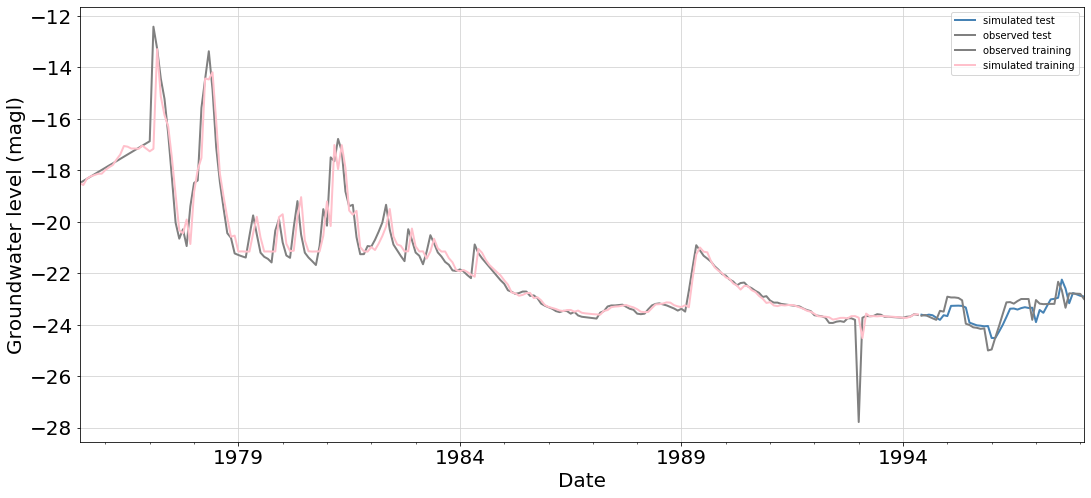

In [92]:
mse_ff = summary['mse_ff'].mean(axis=0)
rmse_ff= summary['rmse_ff'].mean(axis=0)
mae_ff = summary['mae_ff'].mean(axis=0)
r2_ff  = summary['r2_ff'].mean(axis=0)
stdv_ff= stdv.mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_ff, 3))
print("Mean squared error is:",round(mse_ff,3))
print("Root mean squared error is:",round(rmse_ff, 3))
print("Mean absolute error is:",round(mae_ff,3))


df1 = pd.DataFrame(test_inverse_trans[6].values, columns  = ['simulated test'],index  =pima.iloc[228:273].index)
df1['observed test']      = pima.iloc[228:273, 0] .values

df2 = pd.DataFrame(pima.iloc[0:228, 0].values, columns = ['observed training'],index =pima.iloc[0:228].index)
df2['simulated training'] = train_inverse_trans[6].values

out_df = df2.append(df1, sort=True)

#plot
out_df['simulated test'].plot(color='steelblue', linewidth=2)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=2)
out_df['observed training'].plot(color='grey', linewidth=2)
out_df['simulated training'].plot(color='pink', linewidth=2)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(18,8)

In [93]:
y_ff = out_df['simulated test']

## Static Models

In [96]:
pima2  = pima[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2','D4N0065']]

In [97]:
X = pima2[['Discharge_log' ,'precip_trend_log' ,'Discharge_log','Abstraction_log' ,'t_1', 't_2']].values
y = pima2['D4N0065'].values
y = y.reshape(-1,1)

In [98]:
from sklearn.model_selection import TimeSeriesSplit
tss = TimeSeriesSplit(n_splits = 5)
for train_index, test_index in tss.split(X):
    X_train, X_test = X[train_index, :], X[test_index,:]
    y_train, y_test = y[train_index], y[test_index]
    
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(228, 6) (228, 1)
(45, 6) (45, 1)


In [99]:
def forecast(model, test_forecast, gwl, steps_ahead):
    y_pred = []
    current_output = gwl
    for step in range(steps_ahead):
        #print(test_forecast[step])
        input_test = np.concatenate([test_forecast[step][:-1], [current_output]])
        #input_test = [test_forecast[0][0][:-1], gwl]
        #print(input_test)
        pred = model.fit(input_test.reshape(1,1,6))
        y_pred.append(pred[0][0])
        #print(pred)
        current_output = pred[0][0]
    return y_pred

### Decision Tree

In [100]:
from sklearn.metrics import *
import numpy as np
import csv  

from sklearn.tree import DecisionTreeRegressor

# rounding off
Round = 3      

train_pred = []
test_pred  = []

fields = ['Iteration_No', 'mse_dc', 'rmse_dc', 'r2_dc','mae_dc'] 
csvfile = open('Summary.csv', 'w') 
csvwriter = csv.writer(csvfile)  
csvwriter.writerow(fields) 

for fold in range(1,11):
    print(f'Running fold {fold}')
    print(X_train.shape)


    regressor = DecisionTreeRegressor(max_features='auto') #random state is so i get same results whenever i run the regressor
    regressor.fit(X_train,y_train)
    y_dc = regressor.predict(X_test)

    #metrics for test
    y_dc = y_dc
    test_pred.append(y_dc)
    mse_dc = mean_squared_error(y_test, y_dc)
    rmse_dc = np.sqrt(mse_dc)
    r2_dc = r2_score(y_test, y_dc)
    mae_dc = mean_absolute_error(y_test, y_dc)

    #metrics train 
    train     = regressor.predict(X_train)
    train_pred.append(train)
    msetrain  = mean_squared_error(y_train, train)
    rmsetrain = np.sqrt(msetrain)
    mae_train = mean_absolute_error(y_train, train)
    r2train   = r2_score(y_train, train)
    
    csvwriter.writerow([f'Iteration_{fold}',round(mse_dc,Round), round(rmse_dc,Round), round(r2_dc,Round),round(mae_dc,Round)]) 

csvfile.close()
summary= pd.read_csv('Summary.csv')
    

Running fold 1
(228, 6)
Running fold 2
(228, 6)
Running fold 3
(228, 6)
Running fold 4
(228, 6)
Running fold 5
(228, 6)
Running fold 6
(228, 6)
Running fold 7
(228, 6)
Running fold 8
(228, 6)
Running fold 9
(228, 6)
Running fold 10
(228, 6)


In [101]:
summary

Iteration_No  mse_dc  rmse_dc  r2_dc  mae_dc
0   Iteration_1   0.173    0.416  0.501   0.298
1   Iteration_2   0.173    0.415  0.501   0.294
2   Iteration_3   0.171    0.414  0.505   0.292
3   Iteration_4   0.167    0.409  0.516   0.293
4   Iteration_5   0.170    0.412  0.509   0.297
5   Iteration_6   0.185    0.430  0.466   0.309
6   Iteration_7   0.172    0.415  0.503   0.293
7   Iteration_8   0.169    0.411  0.511   0.294
8   Iteration_9   0.176    0.420  0.490   0.300
9  Iteration_10   0.166    0.407  0.521   0.291

In [102]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]
train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']
train_iterations['actual'] = pima1.iloc[0:228, 6].values

In [103]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]
test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']

The model performance for the train set
-------------------------------------------
Mean squared error is: 0.0
Root mean squared error is: 0.0
Mean absolute error is: 0.0
R^2 score is:  1.0

The model performance for the test set
--------------------------------------
R^2 score is:  0.502
Mean squared error is: 0.172
Root mean squared error is: 0.415
Mean absolute error is: 0.296


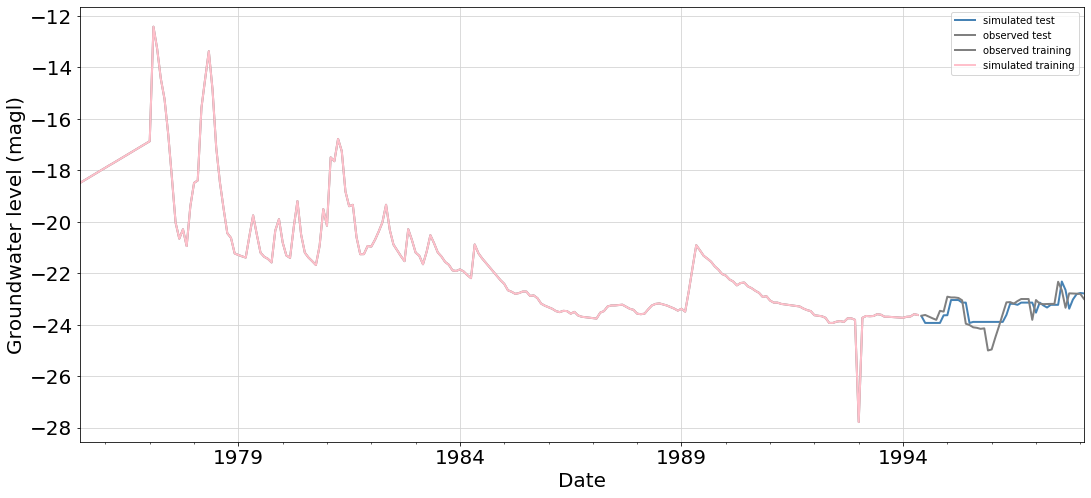

In [104]:
mse_dc = summary['mse_dc'].mean(axis=0)
rmse_dc = summary['rmse_dc'].mean(axis=0)
mae_dc = summary['mae_dc'].mean(axis=0)
r2_dc  = summary['r2_dc'].mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_dc, 3))
print("Mean squared error is:",round(mse_dc,3))
print("Root mean squared error is:",round(rmse_dc, 3))
print("Mean absolute error is:",round(mae_dc,3))




df1 = pd.DataFrame(test_iterations['Mean'].values, columns  = ['simulated test'],index  =pima.iloc[228:273].index)
df1['observed test']      = pima.iloc[228:273, 0] .values

df2 = pd.DataFrame(pima.iloc[0:228, 0].values, columns = ['observed training'],index =pima.iloc[0:228].index)
df2['simulated training'] = train_iterations['Mean'].values

out_df = df2.append(df1, sort=True)

#plot
out_df['simulated test'].plot(color='steelblue', linewidth=2)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=2)
out_df['observed training'].plot(color='grey', linewidth=2)
out_df['simulated training'].plot(color='pink', linewidth=2)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(18,8)

### SVR

In [105]:
from sklearn.svm import SVR

# rounding off
Round = 3      

train_pred = []
test_pred  = []

fields = ['Iteration_No', 'mse_svr', 'rmse_svr', 'r2_svr','mae_svr'] 
csvfile = open('Summary.csv', 'w') 
csvwriter = csv.writer(csvfile)  
csvwriter.writerow(fields) 

for fold in range(1,11):
    print(f'Running fold {fold}')
    print(X_train.shape)
    
    regressor = SVR(kernel='rbf', epsilon=0.1, C=1, degree=4 ,gamma='auto') 
    regressor.fit(X_train,y_train)
    y_svr = regressor.predict(X_test)

    #metrics for test
    y_svr = y_svr
    test_pred.append(y_svr)
    mse_svr = mean_squared_error(y_test, y_svr)
    rmse_svr = np.sqrt(mse_svr)
    r2_svr = r2_score(y_test, y_svr)
    mae_svr = mean_absolute_error(y_test, y_svr)

    #metrics train 
    train     = regressor.predict(X_train)
    train_pred.append(train)
    msetrain  = mean_squared_error(y_train, train)
    rmsetrain = np.sqrt(msetrain)
    mae_train = mean_absolute_error(y_train, train)
    r2train   = r2_score(y_train, train)
    
    csvwriter.writerow([f'Iteration_{fold}',round(mse_svr,Round), round(rmse_svr,Round), round(r2_svr,Round),round(mae_svr,Round)]) 

csvfile.close()
summary= pd.read_csv('Summary.csv')
    

Running fold 1
(228, 6)
Running fold 2
(228, 6)
Running fold 3
(228, 6)
Running fold 4
(228, 6)
Running fold 5
(228, 6)
Running fold 6
(228, 6)
Running fold 7
(228, 6)
Running fold 8
(228, 6)
Running fold 9
(228, 6)
Running fold 10
(228, 6)


/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

In [106]:
summary

Iteration_No  mse_svr  rmse_svr  r2_svr  mae_svr
0   Iteration_1    0.345     0.588   0.002    0.386
1   Iteration_2    0.345     0.588   0.002    0.386
2   Iteration_3    0.345     0.588   0.002    0.386
3   Iteration_4    0.345     0.588   0.002    0.386
4   Iteration_5    0.345     0.588   0.002    0.386
5   Iteration_6    0.345     0.588   0.002    0.386
6   Iteration_7    0.345     0.588   0.002    0.386
7   Iteration_8    0.345     0.588   0.002    0.386
8   Iteration_9    0.345     0.588   0.002    0.386
9  Iteration_10    0.345     0.588   0.002    0.386

In [107]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]
train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']
train_iterations['actual'] = pima1.iloc[0:228, 6].values

In [108]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]
test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']

The model performance for the train set
-------------------------------------------
Mean squared error is: 0.642
Root mean squared error is: 0.801
Mean absolute error is: 0.353
R^2 score is:  0.892

The model performance for the test set
--------------------------------------
R^2 score is:  0.002
Mean squared error is: 0.345
Root mean squared error is: 0.588
Mean absolute error is: 0.386


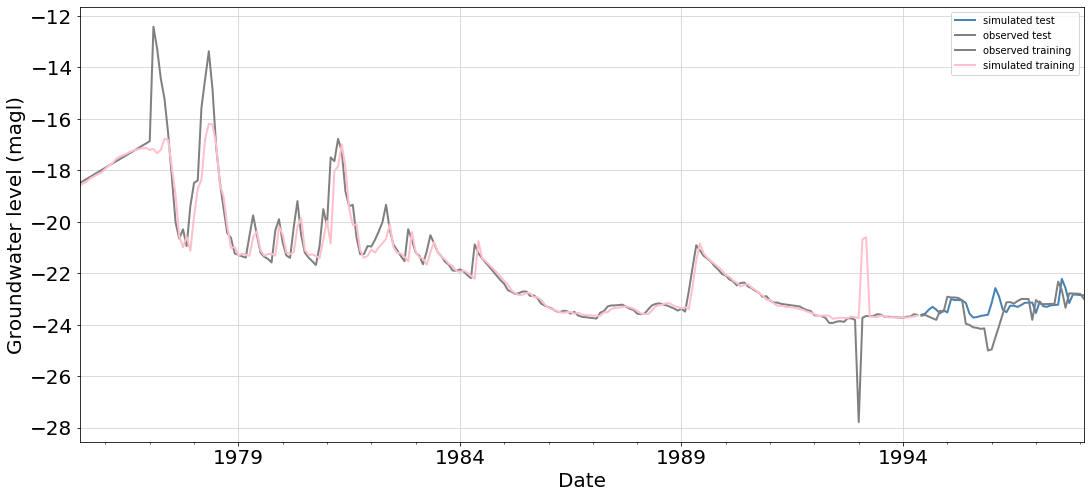

In [109]:
mse_svr  = summary['mse_svr'].mean(axis=0)
rmse_svr = summary['rmse_svr'].mean(axis=0)
mae_svr  = summary['mae_svr'].mean(axis=0)
r2_svr   = summary['r2_svr'].mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_svr, 3))
print("Mean squared error is:",round(mse_svr,3))
print("Root mean squared error is:",round(rmse_svr, 3))
print("Mean absolute error is:",round(mae_svr,3))



df1 = pd.DataFrame(test_iterations['Mean'].values, columns  = ['simulated test'],index  =pima.iloc[228:273].index)
df1['observed test']      = pima.iloc[228:273, 0] .values

df2 = pd.DataFrame(pima.iloc[0:228, 0].values, columns = ['observed training'],index =pima.iloc[0:228].index)
df2['simulated training'] = train_iterations['Mean'].values

out_df = df2.append(df1, sort=True)

#plot
out_df['simulated test'].plot(color='steelblue', linewidth=2)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=2)
out_df['observed training'].plot(color='grey', linewidth=2)
out_df['simulated training'].plot(color='pink', linewidth=2)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(18,8)

### GradientBoostingRegressor

In [110]:
from sklearn.ensemble import GradientBoostingRegressor

# rounding off
Round = 3      

train_pred = []
test_pred  = []

fields = ['Iteration_No', 'mse_gb', 'rmse_gb', 'r2_gb','mae_gb'] 
csvfile = open('Summary.csv', 'w') 
csvwriter = csv.writer(csvfile)  
csvwriter.writerow(fields) 

for fold in range(1,11):
    print(f'Running fold {fold}')
    print(X_train.shape)


    regressor = GradientBoostingRegressor()
    regressor.fit(X_train,y_train)
    y_gb = regressor.predict(X_test)

    #metrics for test
    y_gb = y_gb
    test_pred.append(y_gb)
    mse_gb = mean_squared_error(y_test, y_gb)
    rmse_gb = np.sqrt(mse_gb)
    r2_gb = r2_score(y_test, y_gb)
    mae_gb = mean_absolute_error(y_test, y_gb)

    #metrics train 
    train     = regressor.predict(X_train)
    train_pred.append(train)
    msetrain  = mean_squared_error(y_train, train)
    rmsetrain = np.sqrt(msetrain)
    mae_train = mean_absolute_error(y_train, train)
    r2train   = r2_score(y_train, train)
    
    csvwriter.writerow([f'Iteration_{fold}',round(mse_gb,Round), round(rmse_gb,Round), round(r2_gb,Round),round(mae_gb,Round)]) 

csvfile.close()
summary= pd.read_csv('Summary.csv')
    

Running fold 1
(228, 6)
Running fold 2
(228, 6)
Running fold 3
(228, 6)
Running fold 4
(228, 6)


/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

Running fold 5
(228, 6)
Running fold 6
(228, 6)
Running fold 7
(228, 6)
Running fold 8
(228, 6)


/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

Running fold 9
(228, 6)
Running fold 10
(228, 6)


/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [111]:
summary

Iteration_No  mse_gb  rmse_gb  r2_gb  mae_gb
0   Iteration_1   0.219    0.468  0.368   0.314
1   Iteration_2   0.250    0.500  0.278   0.328
2   Iteration_3   0.219    0.468  0.368   0.312
3   Iteration_4   0.219    0.468  0.368   0.311
4   Iteration_5   0.218    0.467  0.369   0.314
5   Iteration_6   0.247    0.497  0.285   0.325
6   Iteration_7   0.251    0.501  0.275   0.329
7   Iteration_8   0.219    0.468  0.368   0.311
8   Iteration_9   0.251    0.501  0.276   0.327
9  Iteration_10   0.251    0.501  0.275   0.329

In [112]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]
train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']
train_iterations['actual'] = pima1.iloc[0:228, 6].values

In [113]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]
test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']

The model performance for the train set
-------------------------------------------
Mean squared error is: 0.033
Root mean squared error is: 0.182
Mean absolute error is: 0.125
R^2 score is:  0.994

The model performance for the test set
--------------------------------------
R^2 score is:  0.323
Mean squared error is: 0.234
Root mean squared error is: 0.484
Mean absolute error is: 0.32


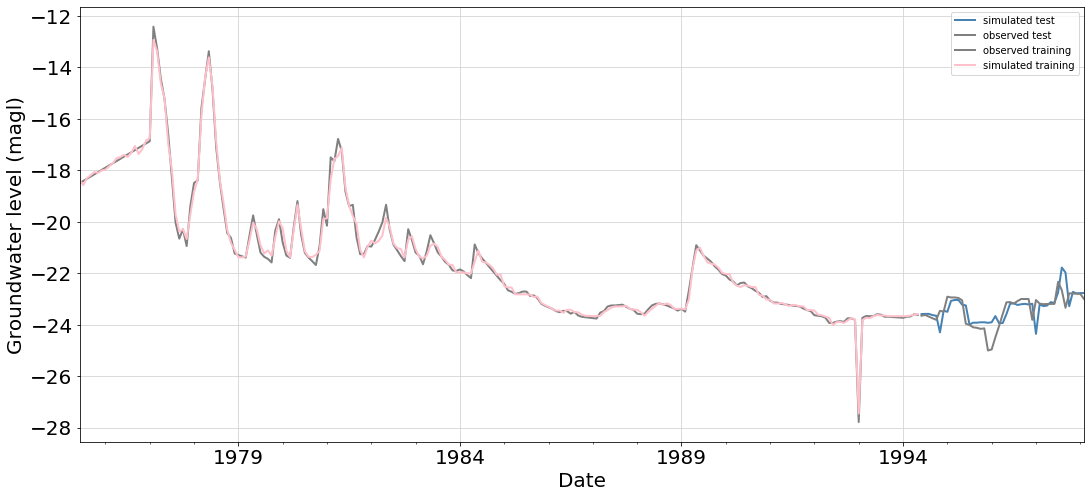

In [114]:
mse_gb  = summary['mse_gb'].mean(axis=0)
rmse_gb = summary['rmse_gb'].mean(axis=0)
mae_gb  = summary['mae_gb'].mean(axis=0)
r2_gb   = summary['r2_gb'].mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_gb, 3))
print("Mean squared error is:",round(mse_gb,3))
print("Root mean squared error is:",round(rmse_gb, 3))
print("Mean absolute error is:",round(mae_gb,3))



df1 = pd.DataFrame(test_iterations['Mean'].values, columns  = ['simulated test'],index  =pima.iloc[228:273].index)
df1['observed test']      = pima.iloc[228:273, 0] .values

df2 = pd.DataFrame(pima.iloc[0:228, 0].values, columns = ['observed training'],index =pima.iloc[0:228].index)
df2['simulated training'] = train_iterations['Mean'].values

out_df = df2.append(df1, sort=True)

#plot
out_df['simulated test'].plot(color='steelblue', linewidth=2)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=2)
out_df['observed training'].plot(color='grey', linewidth=2)
out_df['simulated training'].plot(color='pink', linewidth=2)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(18,8)

### Randon Forest

In [115]:
from sklearn.ensemble import RandomForestRegressor

# rounding off
Round = 3      

train_pred = []
test_pred  = []

fields = ['Iteration_No', 'mse_rf', 'rmse_rf', 'r2_rf','mae_rf'] 
csvfile = open('Summary.csv', 'w') 
csvwriter = csv.writer(csvfile)  
csvwriter.writerow(fields) 

for fold in range(1,11):
    print(f'Running fold {fold}')
    print(X_train.shape)



    rf = RandomForestRegressor(n_estimators=10)
    rf.fit(X_train, y_train)
    y_rf = rf.predict(X_test)

    #metrics for test
    y_rf= y_rf
    test_pred.append(y_rf)
    mse_rf= mean_squared_error(y_test, y_rf)
    rmse_rf= np.sqrt(mse_rf)
    r2_rf= r2_score(y_test, y_rf)
    mae_rf= mean_absolute_error(y_test, y_rf)

    #metrics train 
    train     = regressor.predict(X_train)
    train_pred.append(train)
    msetrain  = mean_squared_error(y_train, train)
    rmsetrain = np.sqrt(msetrain)
    mae_train = mean_absolute_error(y_train, train)
    r2train   = r2_score(y_train, train)
    
    csvwriter.writerow([f'Iteration_{fold}',round(mse_rf,Round), round(rmse_rf,Round), round(r2_rf,Round),round(mae_rf,Round)]) 

csvfile.close()
summary= pd.read_csv('Summary.csv')
    

Running fold 1
(228, 6)
Running fold 2
(228, 6)
Running fold 3
(228, 6)
Running fold 4
(228, 6)
Running fold 5
(228, 6)
Running fold 6
(228, 6)
Running fold 7
(228, 6)
Running fold 8
(228, 6)


/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/yolanda/opt/anaconda3/lib/python3.7/site-

Running fold 9
(228, 6)
Running fold 10
(228, 6)


/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [116]:
summary

Iteration_No  mse_rf  rmse_rf  r2_rf  mae_rf
0   Iteration_1   0.159    0.398  0.541   0.268
1   Iteration_2   0.221    0.470  0.363   0.318
2   Iteration_3   0.204    0.451  0.411   0.310
3   Iteration_4   0.197    0.444  0.431   0.326
4   Iteration_5   0.234    0.483  0.325   0.311
5   Iteration_6   0.160    0.400  0.538   0.270
6   Iteration_7   0.188    0.434  0.456   0.289
7   Iteration_8   0.231    0.481  0.331   0.315
8   Iteration_9   0.199    0.446  0.425   0.299
9  Iteration_10   0.257    0.507  0.258   0.344

In [117]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]
train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']
train_iterations['actual'] = pima1.iloc[0:228, 6].values

In [118]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]
test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']

The model performance for the train set
-------------------------------------------
Mean squared error is: 0.033
Root mean squared error is: 0.182
Mean absolute error is: 0.125
R^2 score is:  0.994

The model performance for the test set
--------------------------------------
R^2 score is:  0.408
Mean squared error is: 0.205
Root mean squared error is: 0.451
Mean absolute error is: 0.305


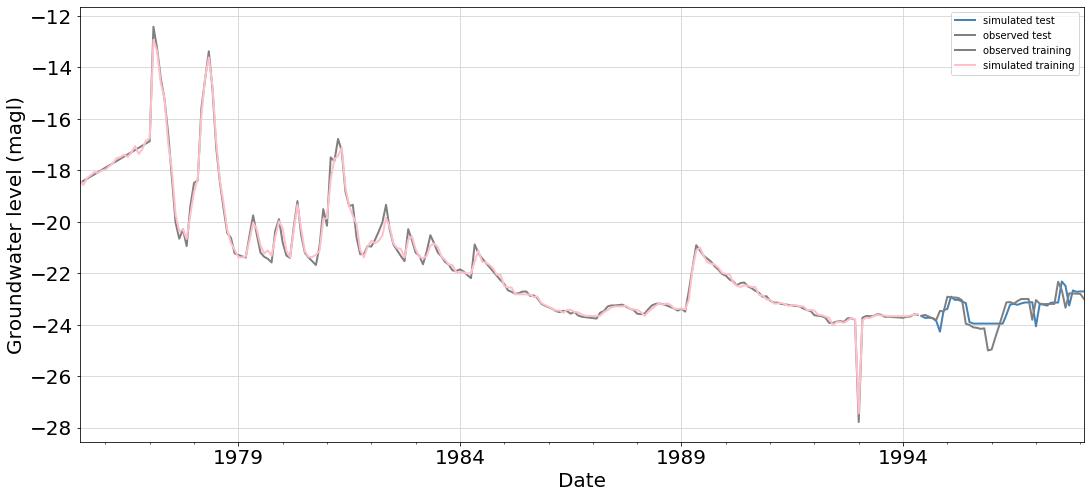

In [119]:
mse_rf  = summary['mse_rf'].mean(axis=0)
rmse_rf = summary['rmse_rf'].mean(axis=0)
mae_rf  = summary['mae_rf'].mean(axis=0)
r2_rf   = summary['r2_rf'].mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_rf, 3))
print("Mean squared error is:",round(mse_rf,3))
print("Root mean squared error is:",round(rmse_rf, 3))
print("Mean absolute error is:",round(mae_rf,3))



df1 = pd.DataFrame(test_iterations['Mean'].values, columns  = ['simulated test'],index  =pima.iloc[228:273].index)
df1['observed test']      = pima.iloc[228:273, 0] .values

df2 = pd.DataFrame(pima.iloc[0:228, 0].values, columns = ['observed training'],index =pima.iloc[0:228].index)
df2['simulated training'] = train_iterations['Mean'].values

out_df = df2.append(df1, sort=True)

#plot
out_df['simulated test'].plot(color='steelblue', linewidth=2)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=2)
out_df['observed training'].plot(color='grey', linewidth=2)
out_df['simulated training'].plot(color='pink', linewidth=2)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(18,8)

In [120]:
vs = pd.DataFrame(pima.iloc[228:273, 0] .values, columns = ['Observed'],index =pima.iloc[228:273].index)
vs['SVR'] = y_svr
vs['GB'] = y_gb
vs['RF'] = y_rf
vs['DC'] = y_dc
vs['LSTM'] = y_lstm
vs['GRU'] = y_gru
vs['FFNN'] = y_ff

Text(0, 0.5, 'Groundwater levels (magl)')

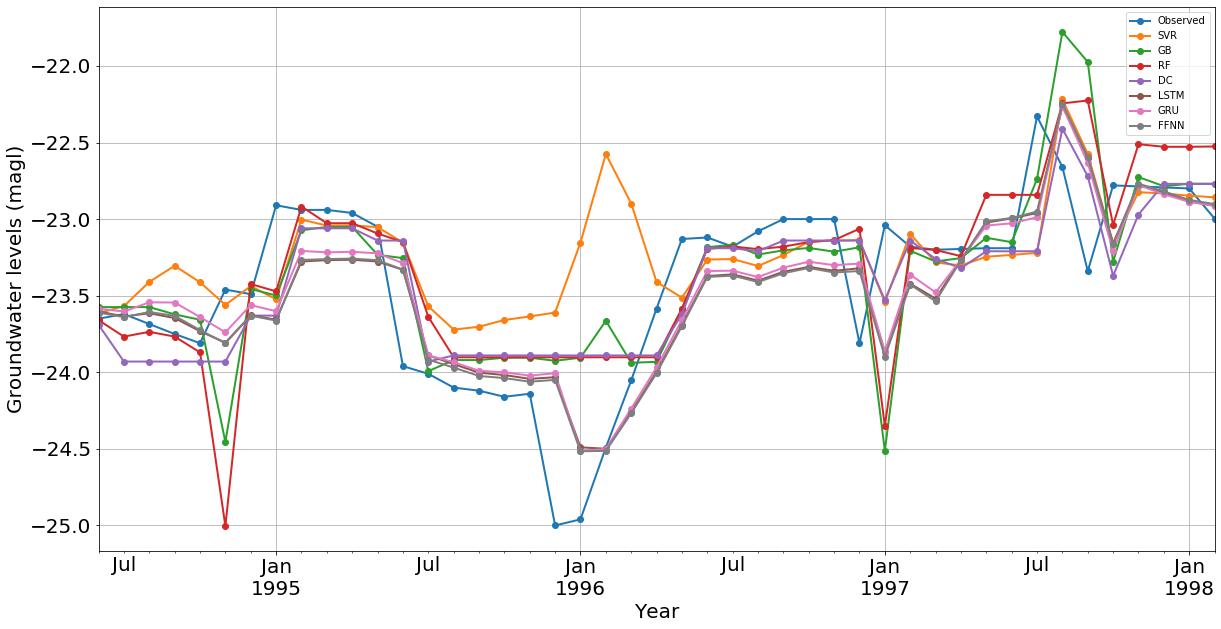

In [121]:
vs.plot(figsize=(20,10), linewidth=2, fontsize = 20, grid=True, marker='o')
plt.xlabel("Year",fontsize=20)
plt.ylabel("Groundwater levels (magl)",fontsize=20)